In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

In [3]:
df = pd.read_csv('../dataset/clean/sample_sorted.csv', header=0)

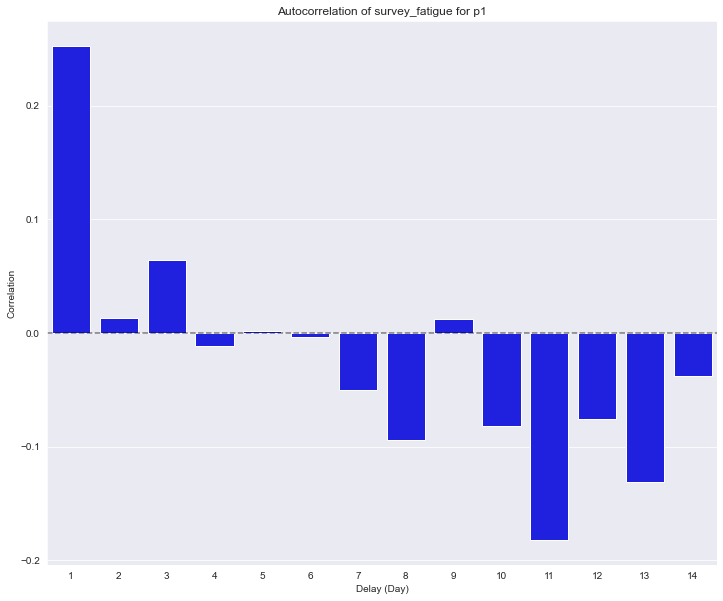

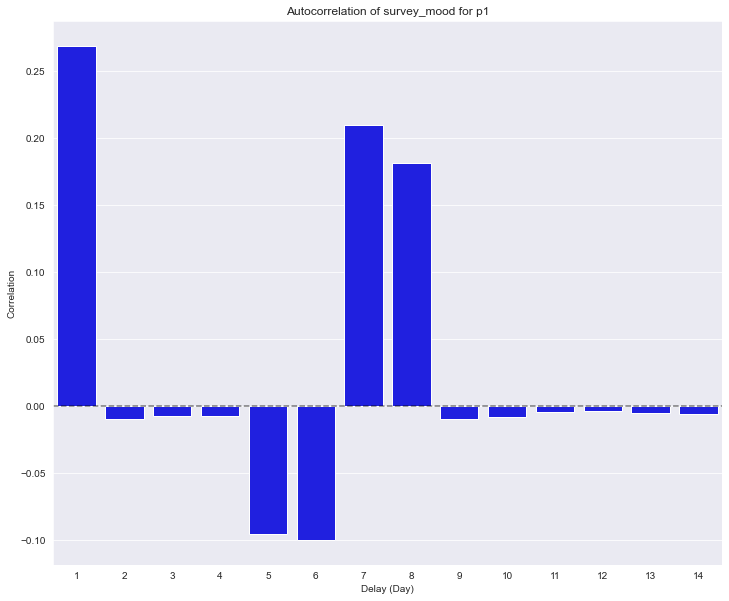

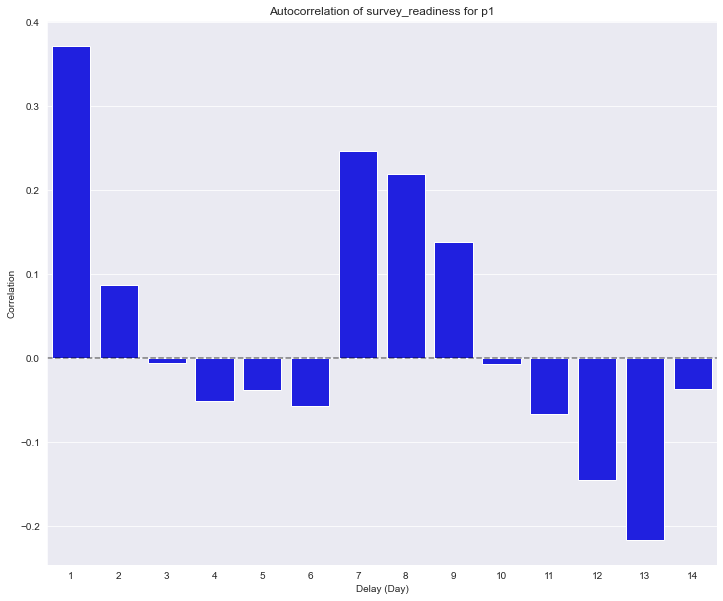

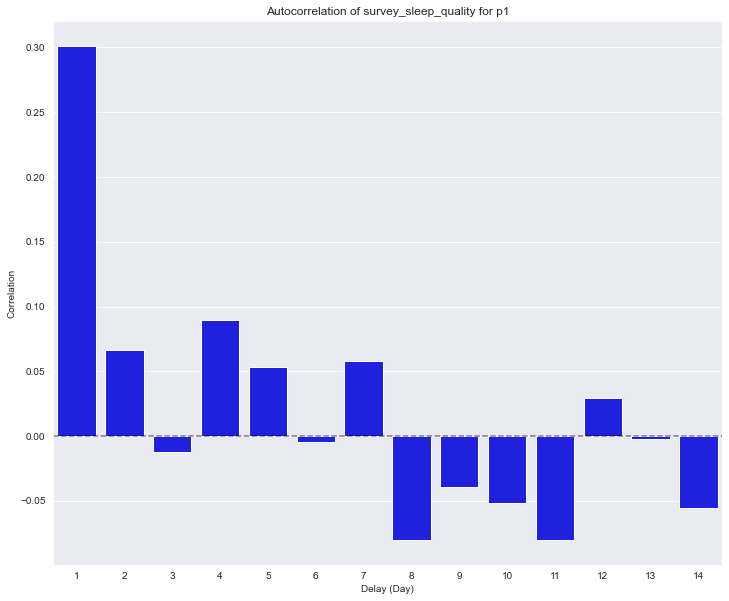

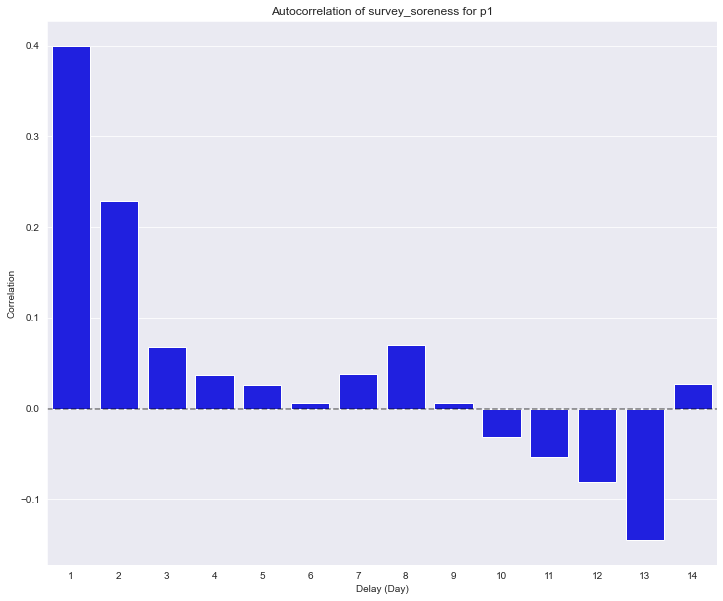

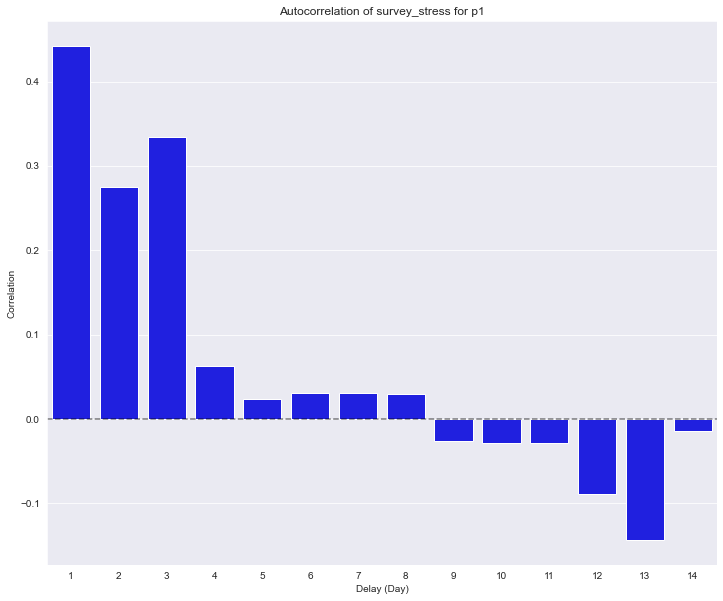

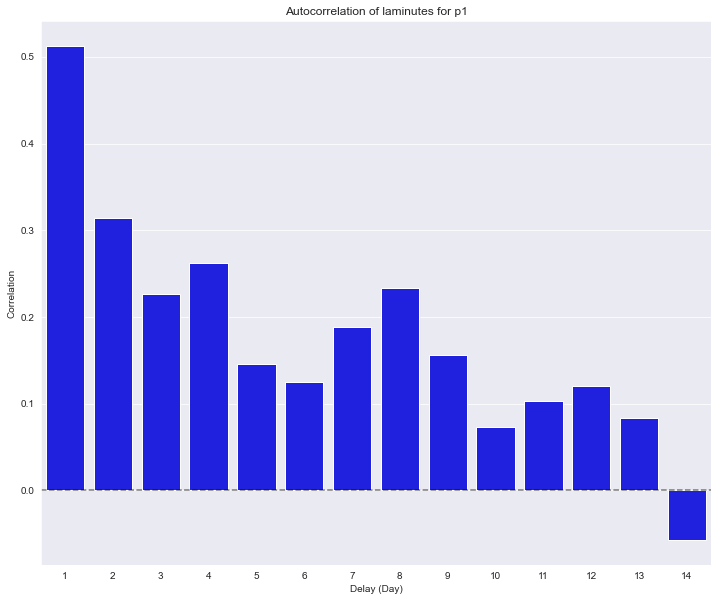

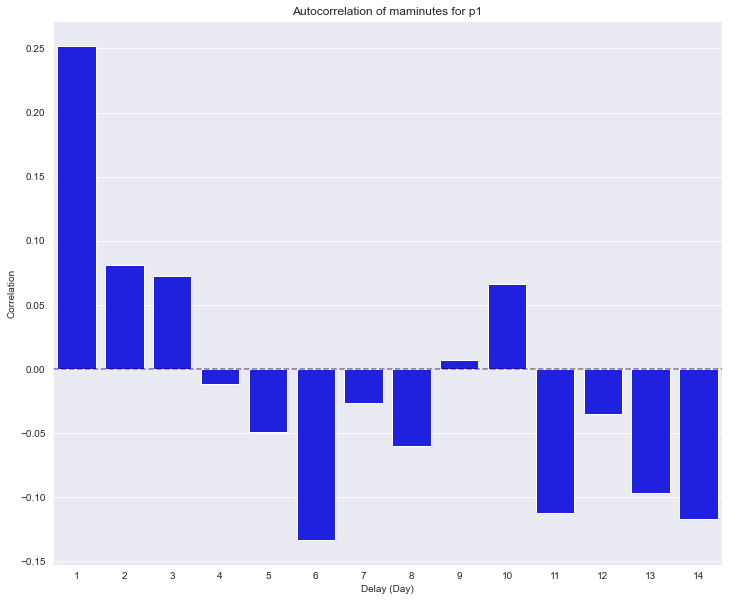

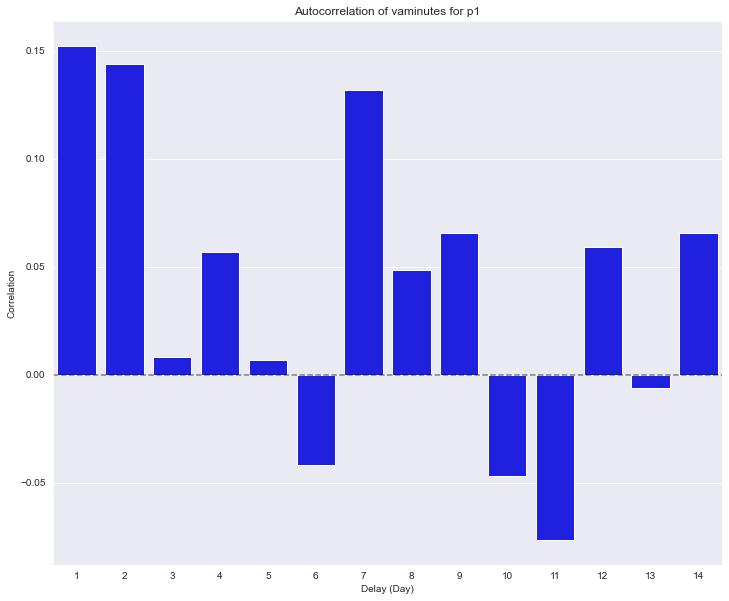

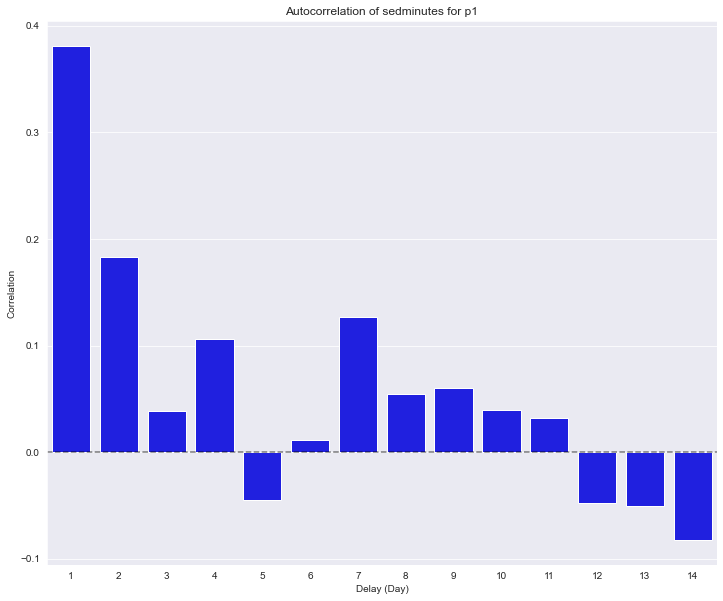

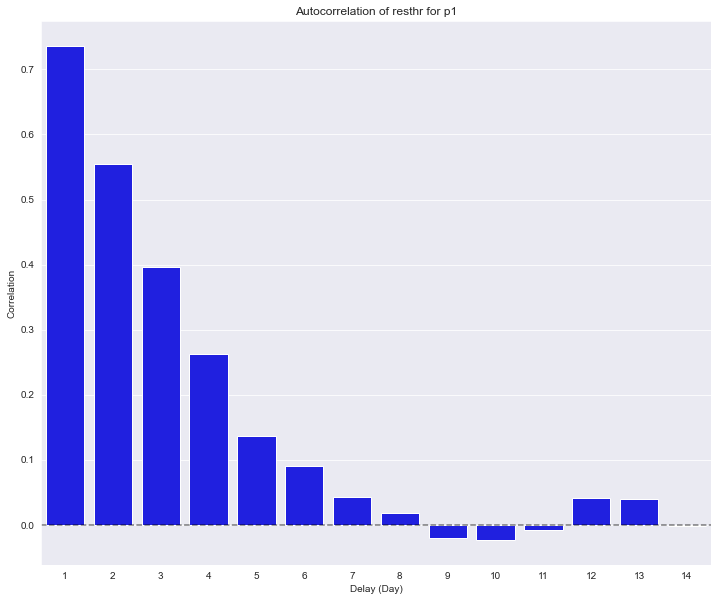

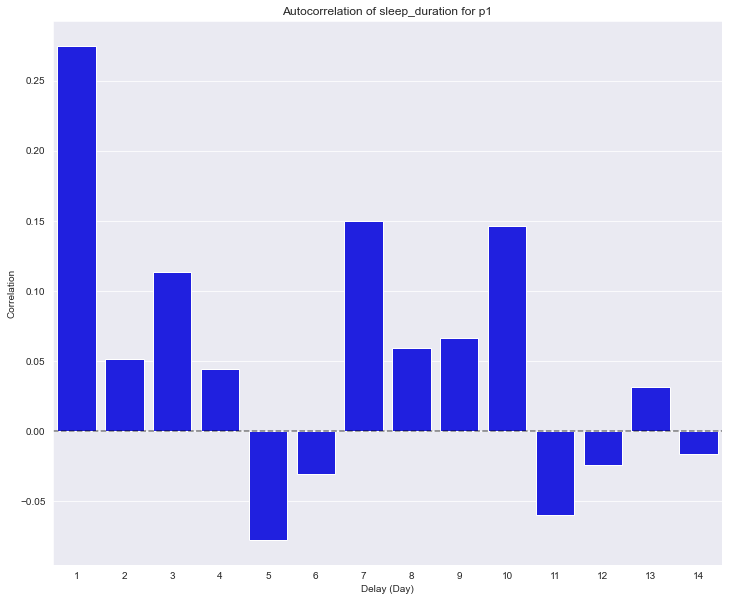

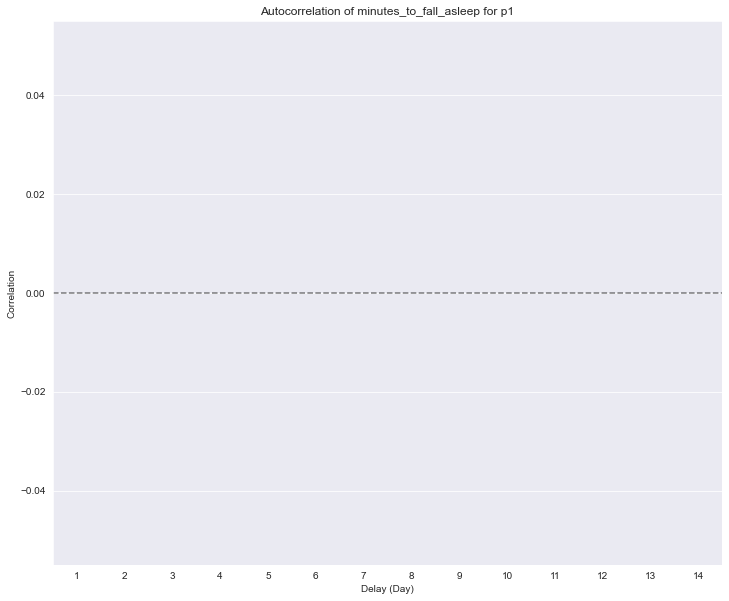

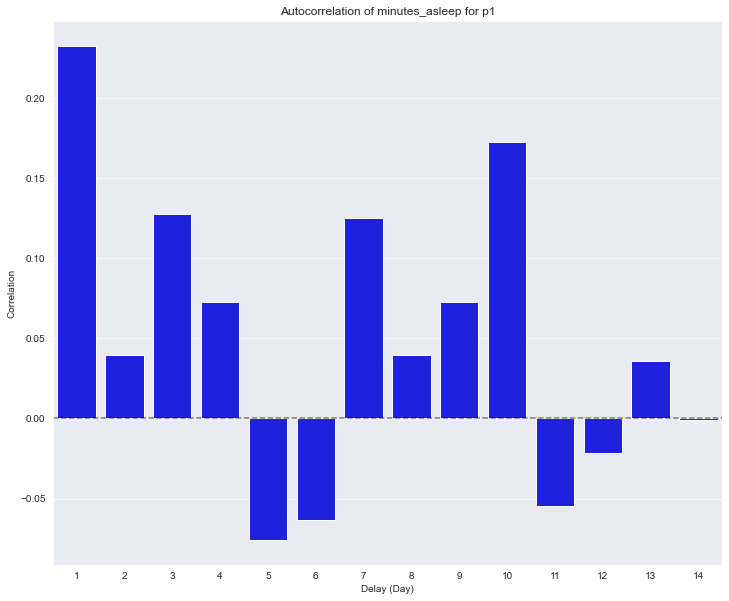

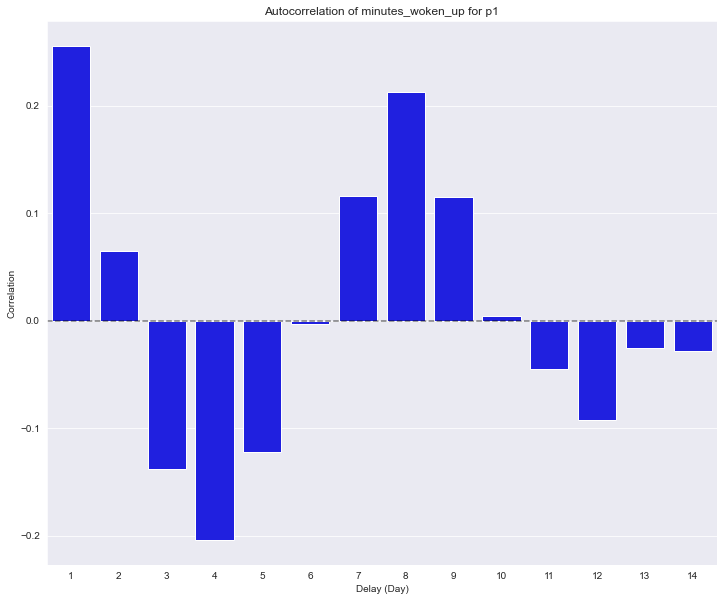

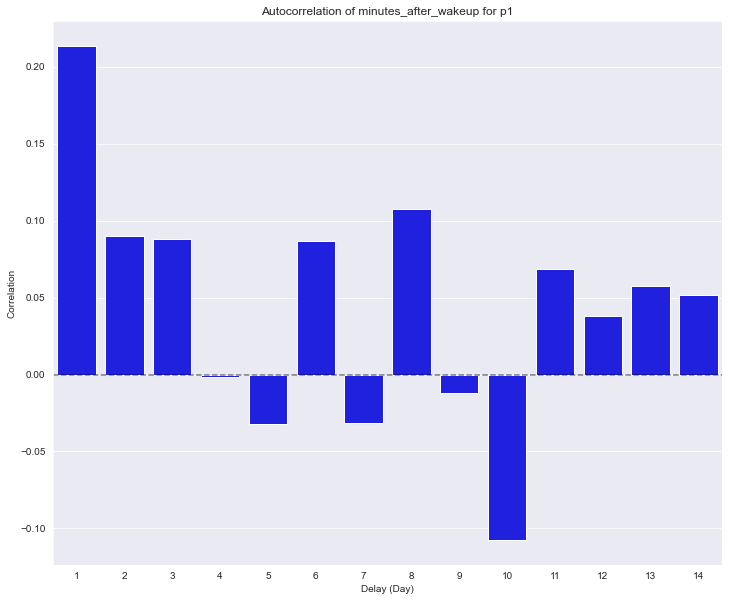

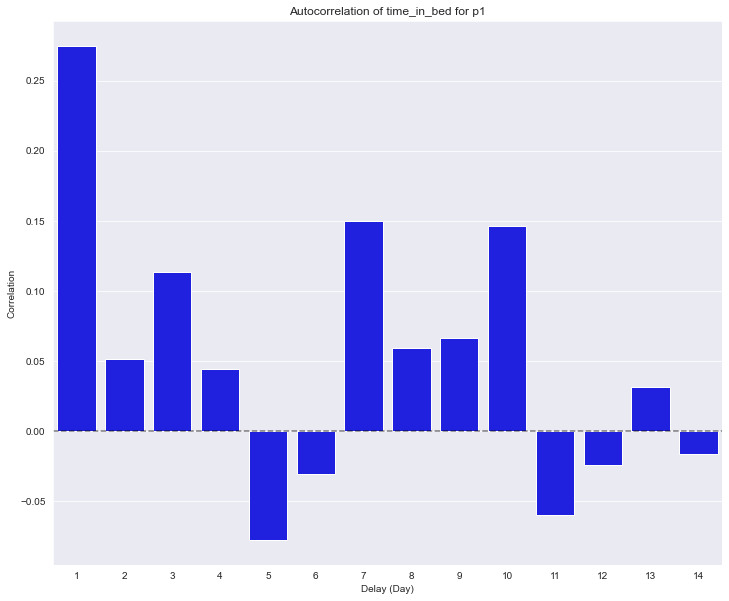

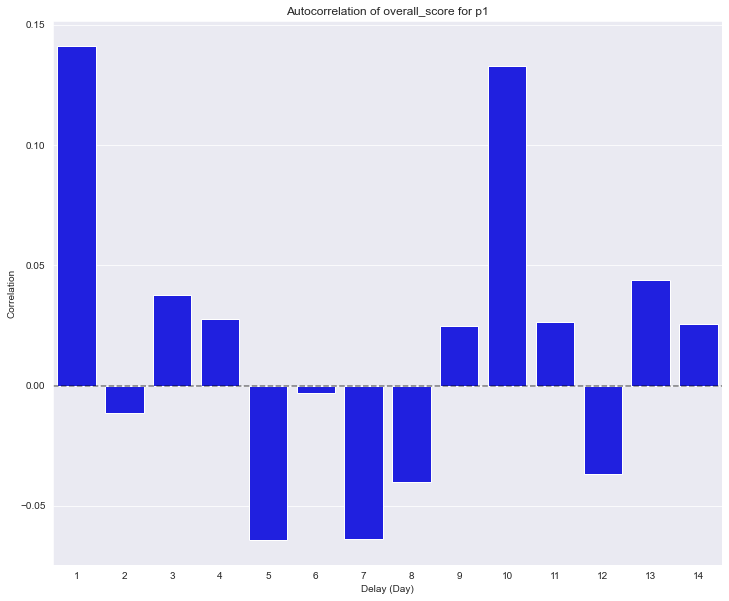

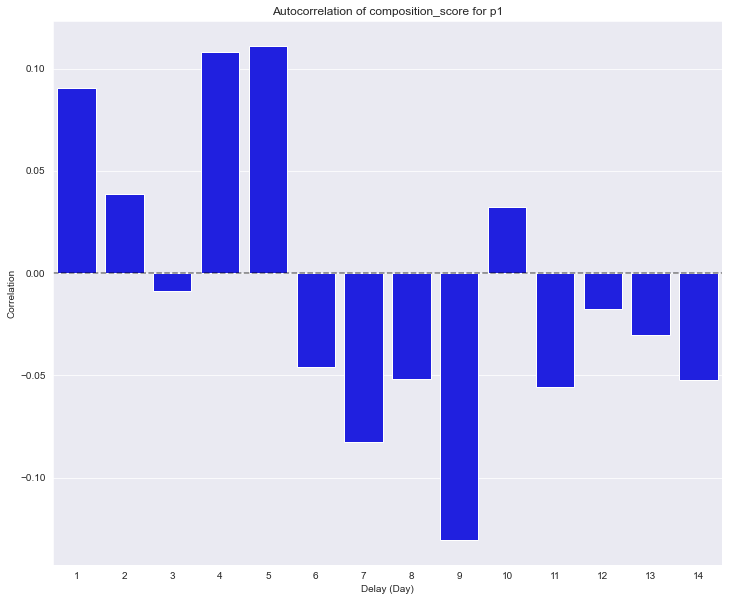

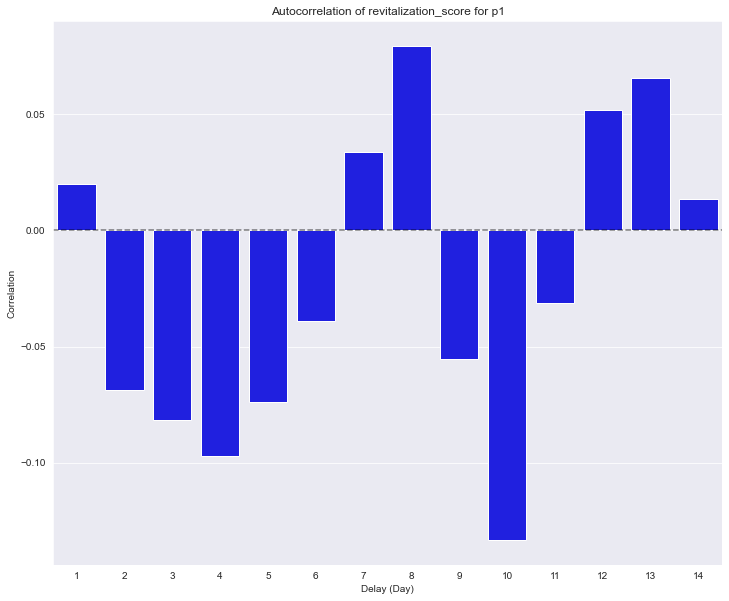

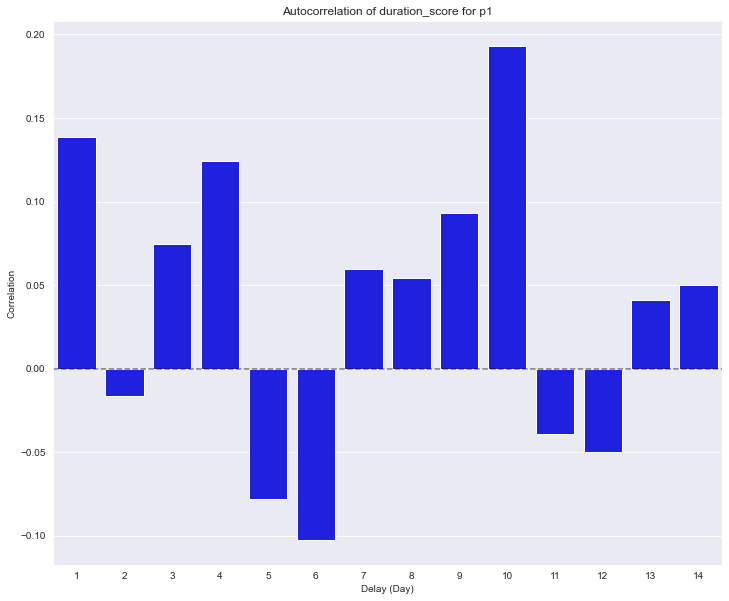

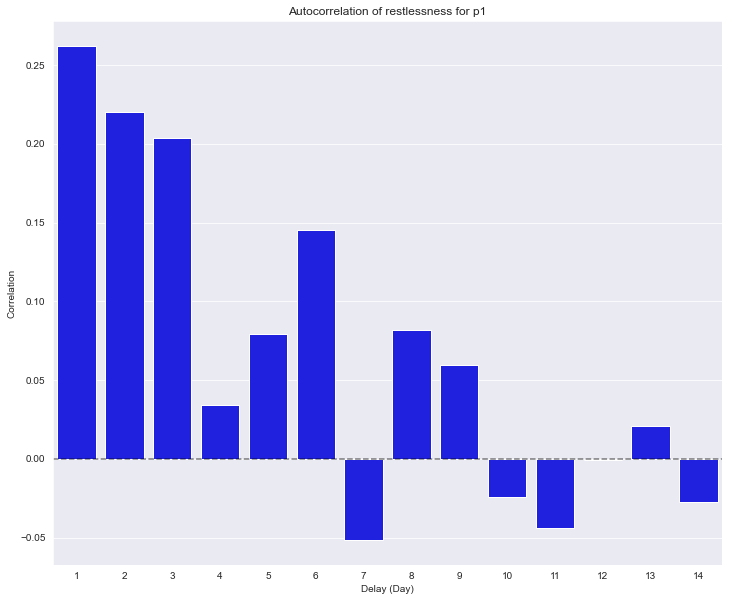

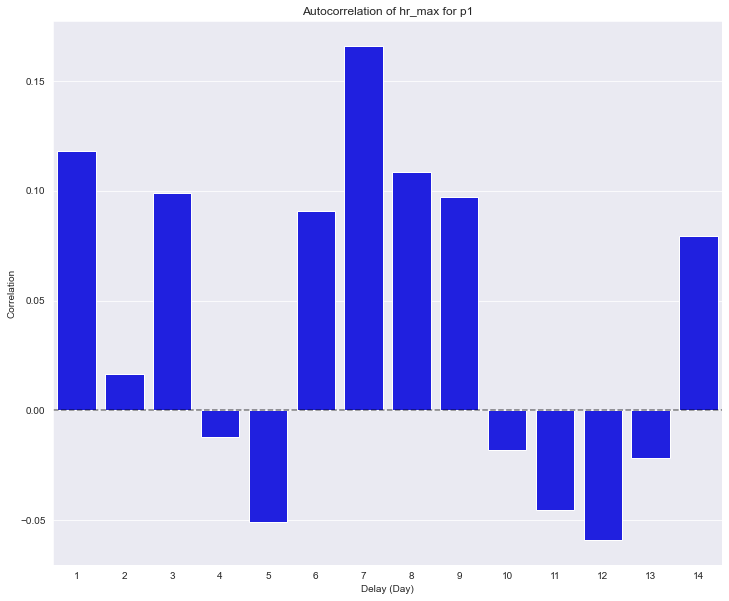

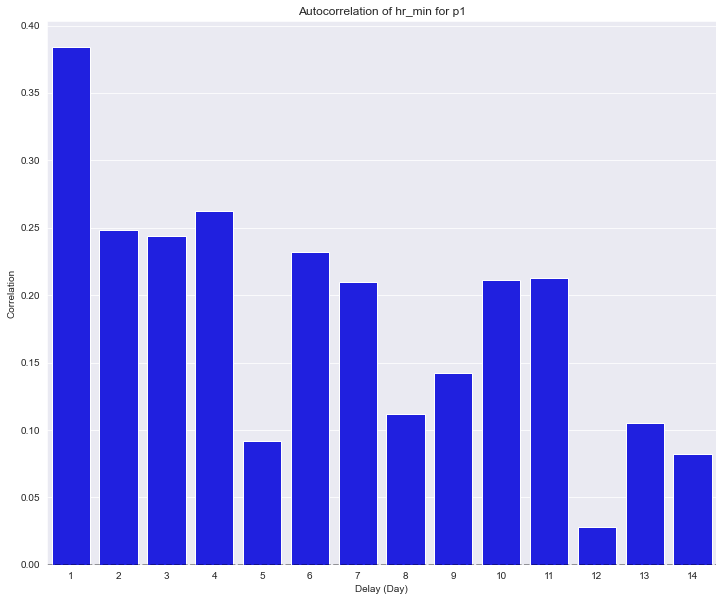

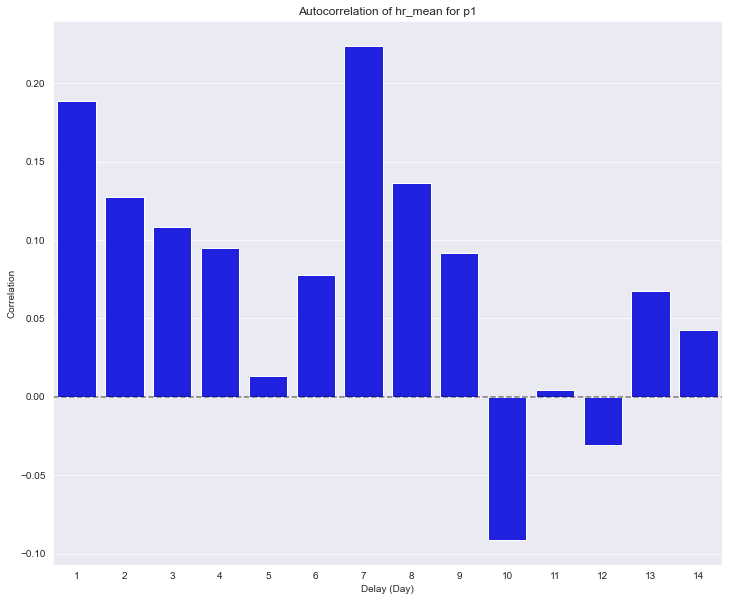

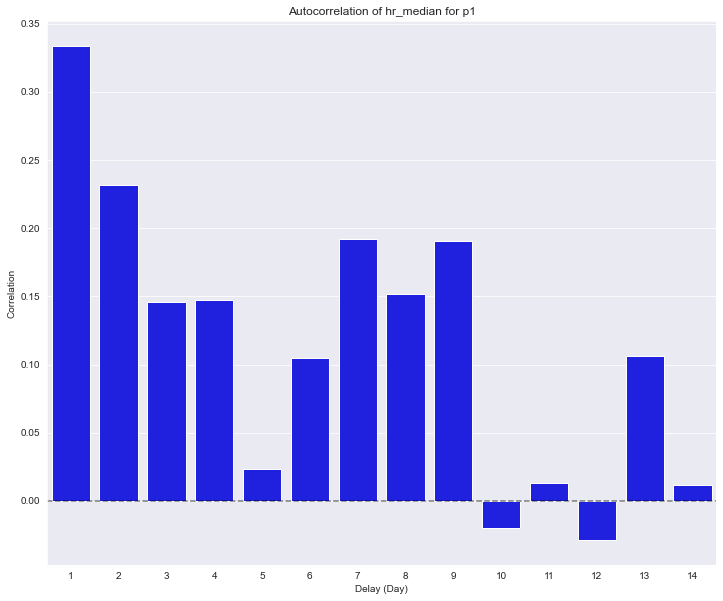

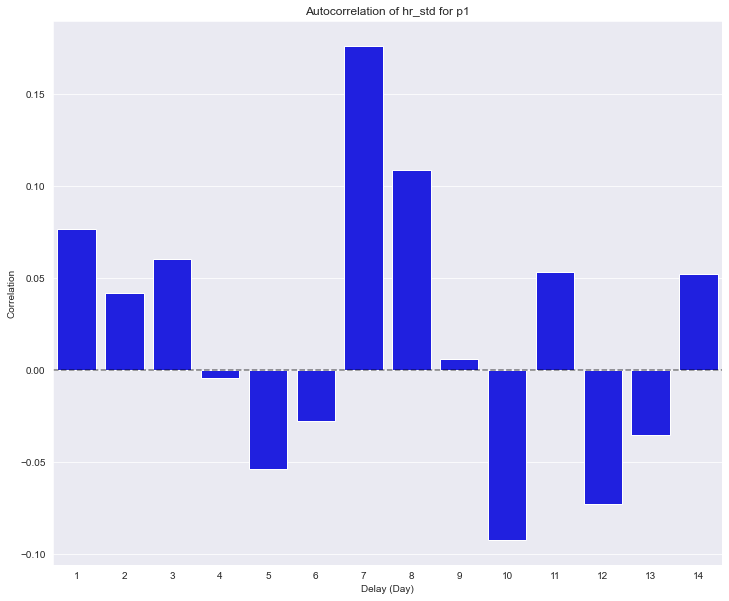

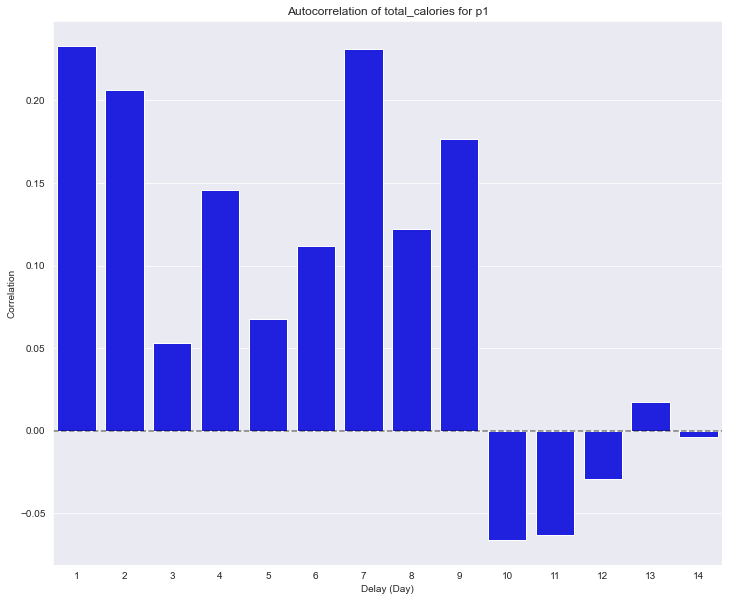

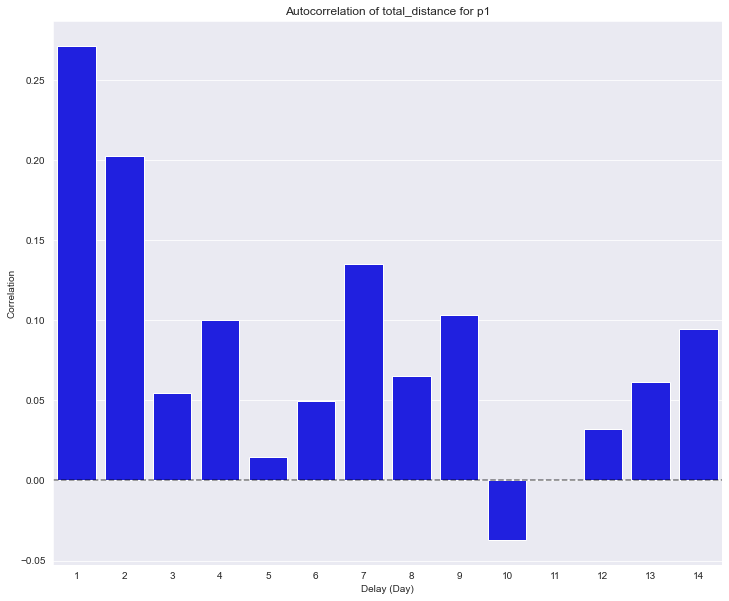

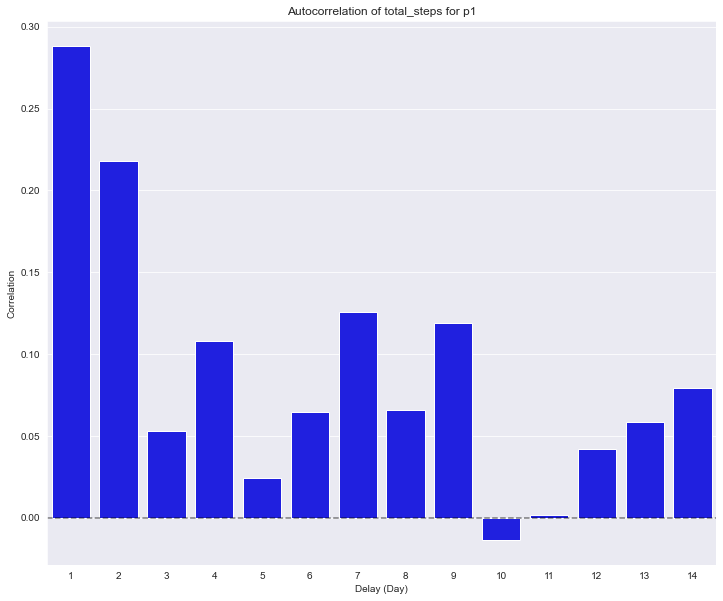

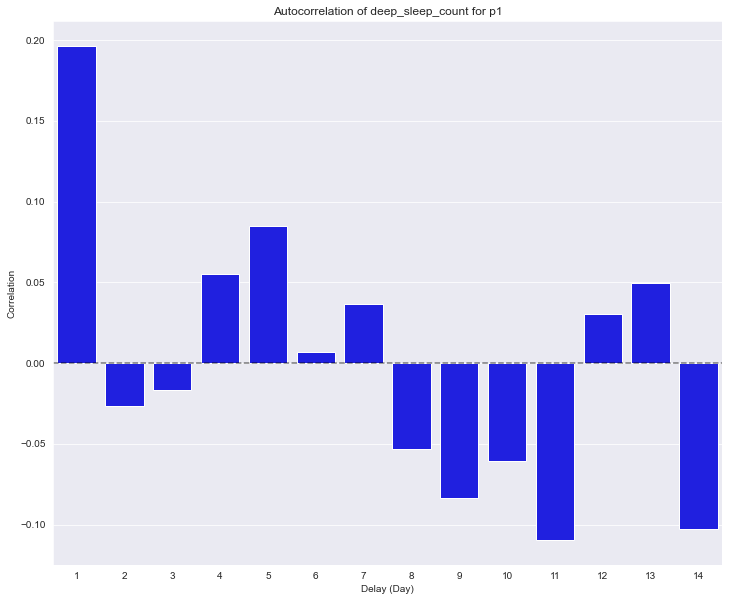

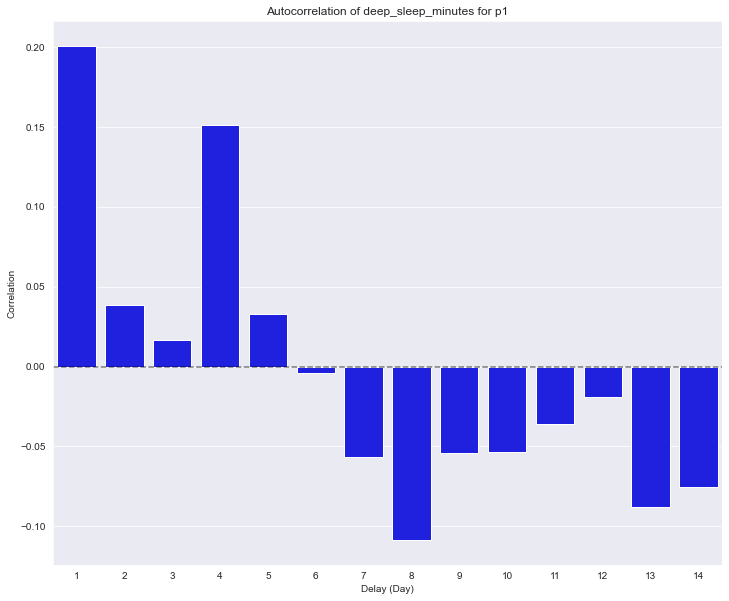

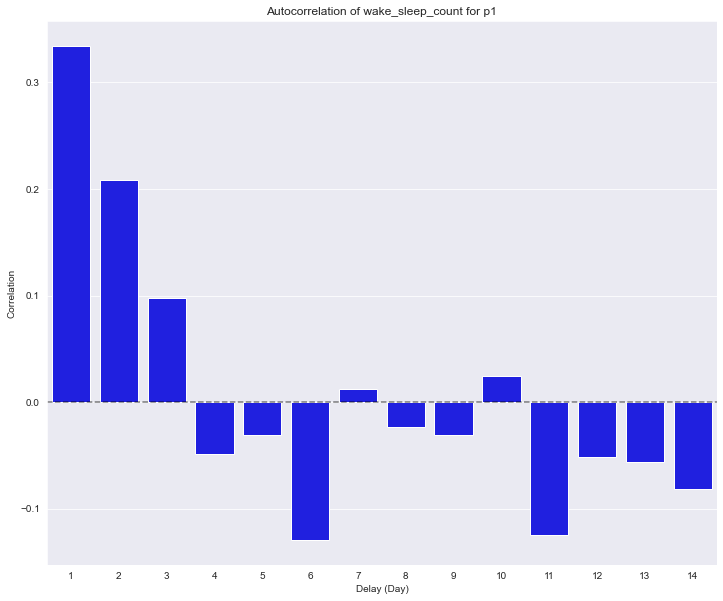

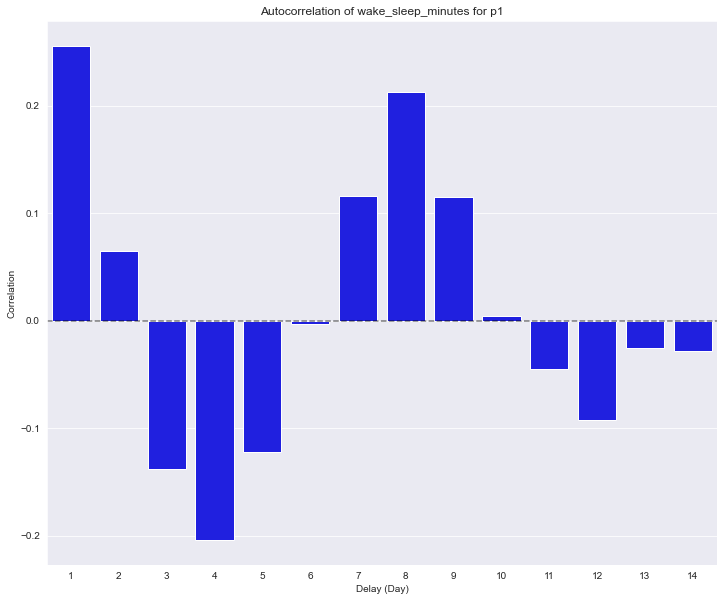

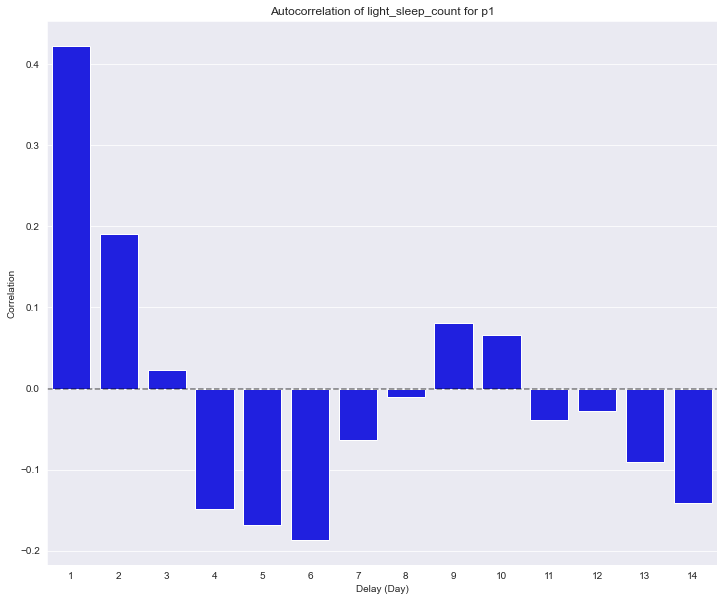

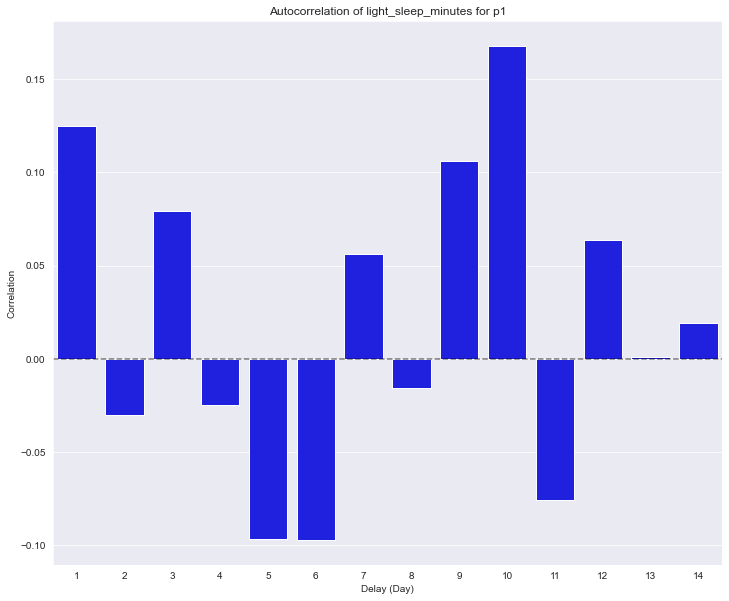

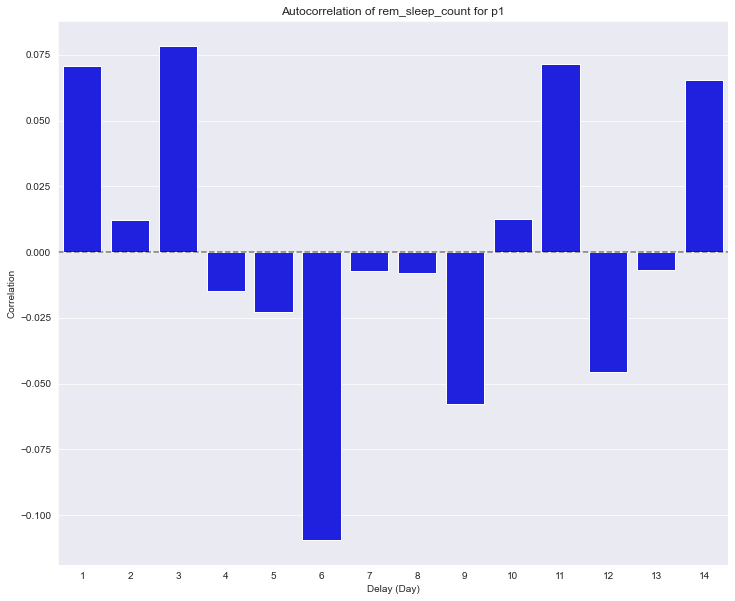

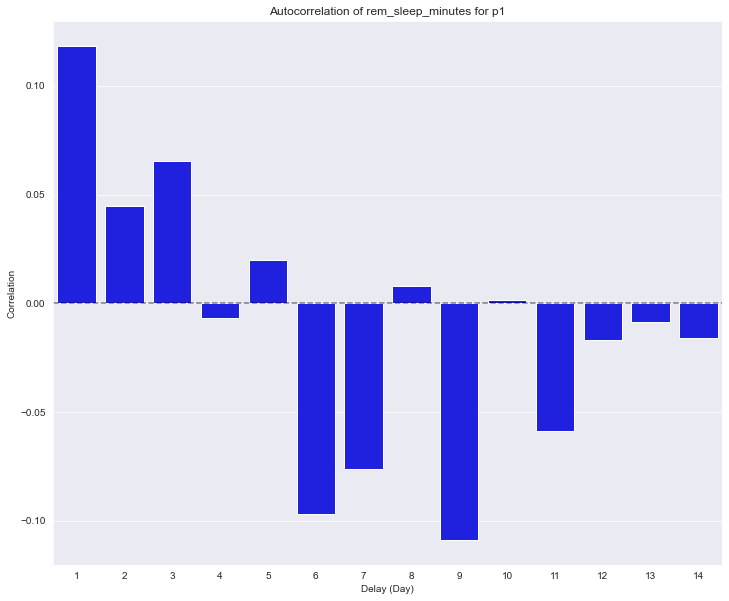

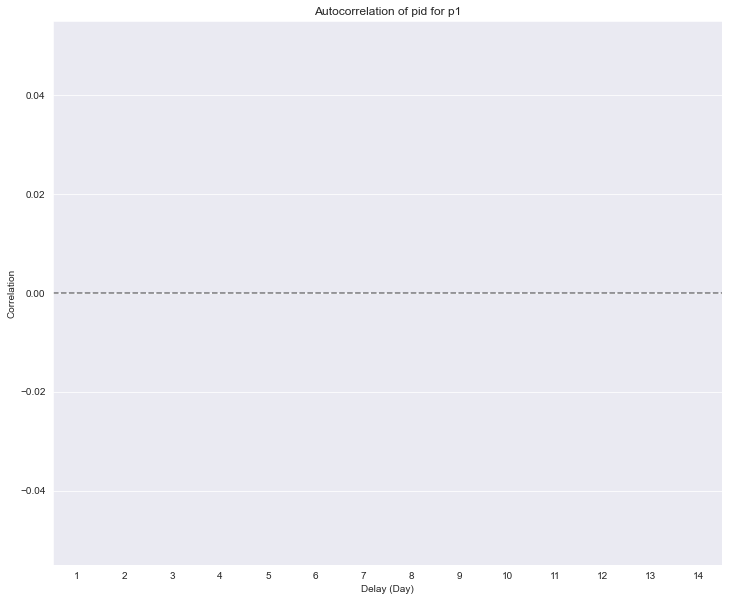

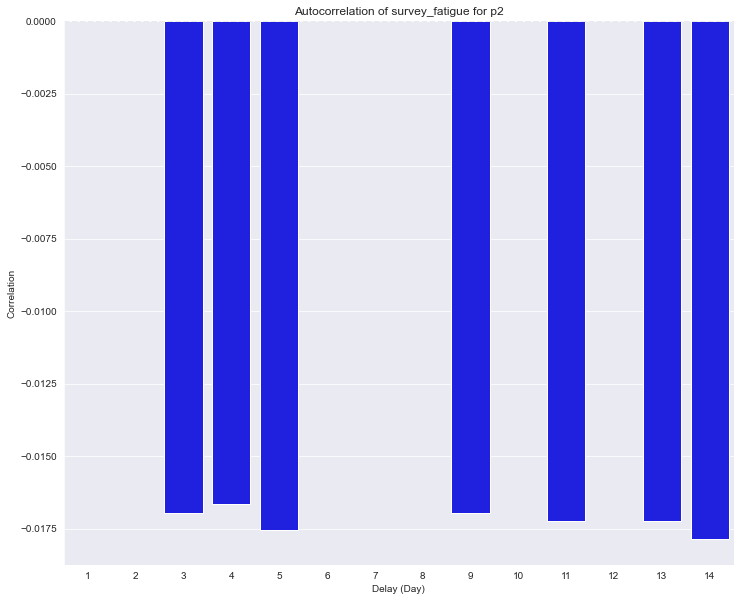

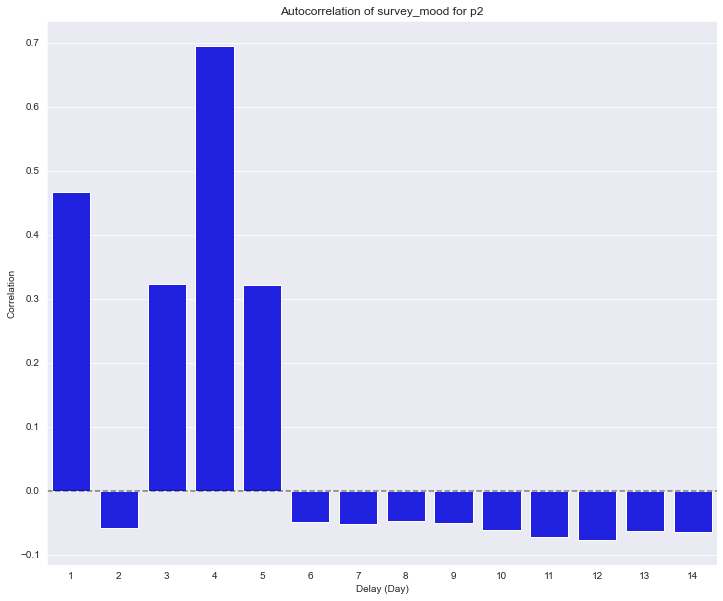

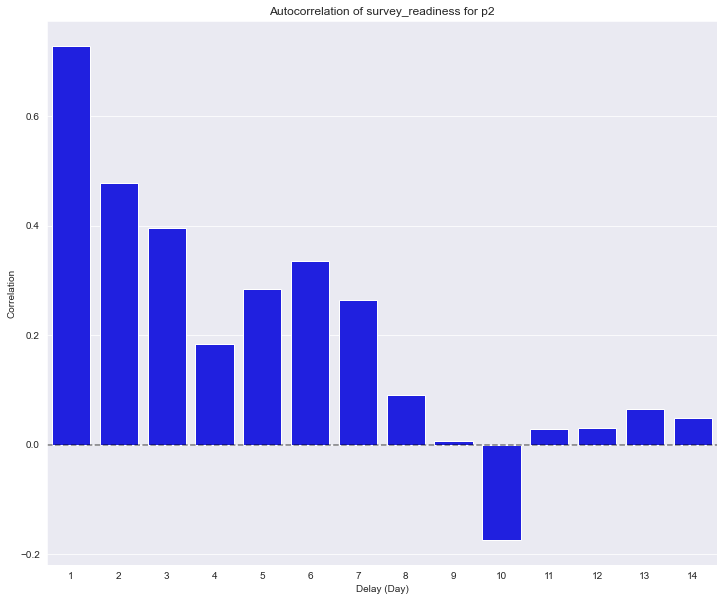

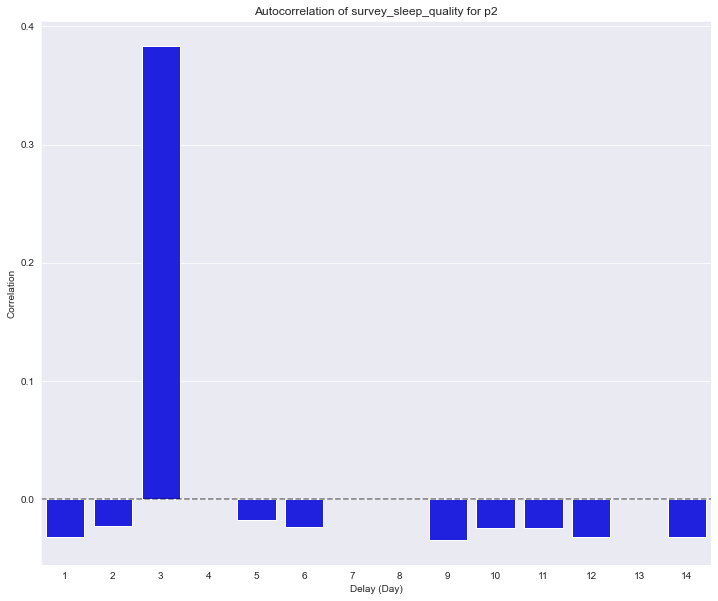

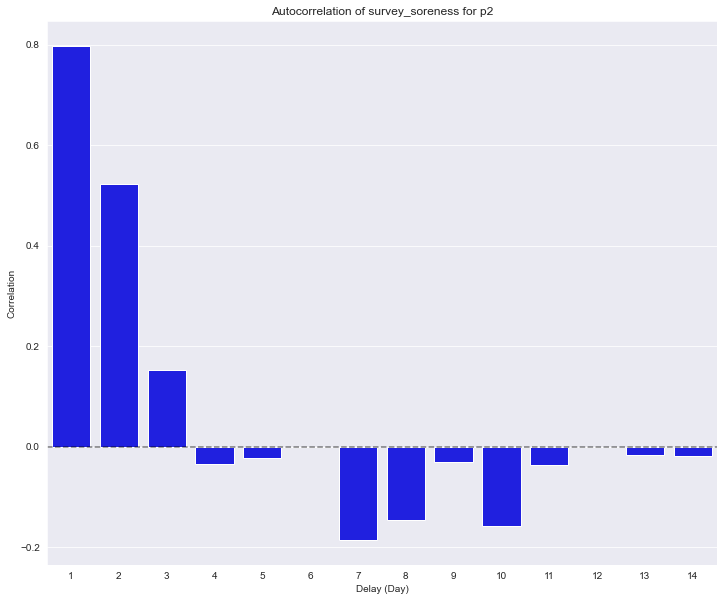

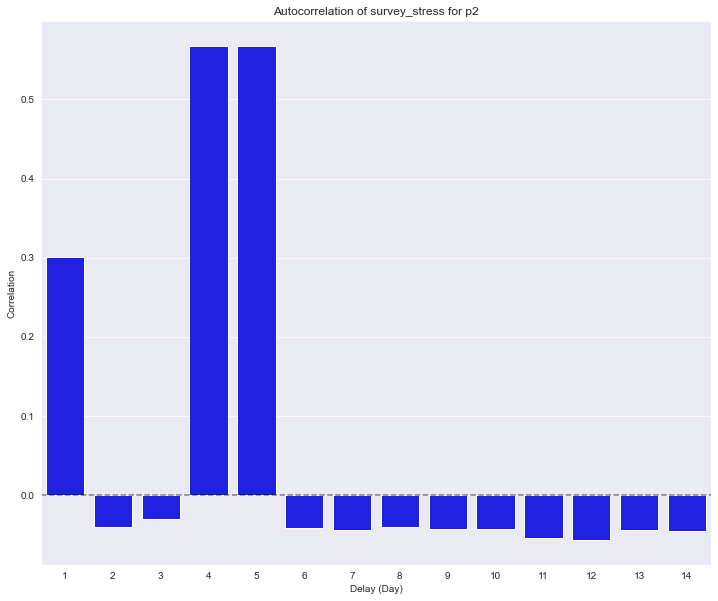

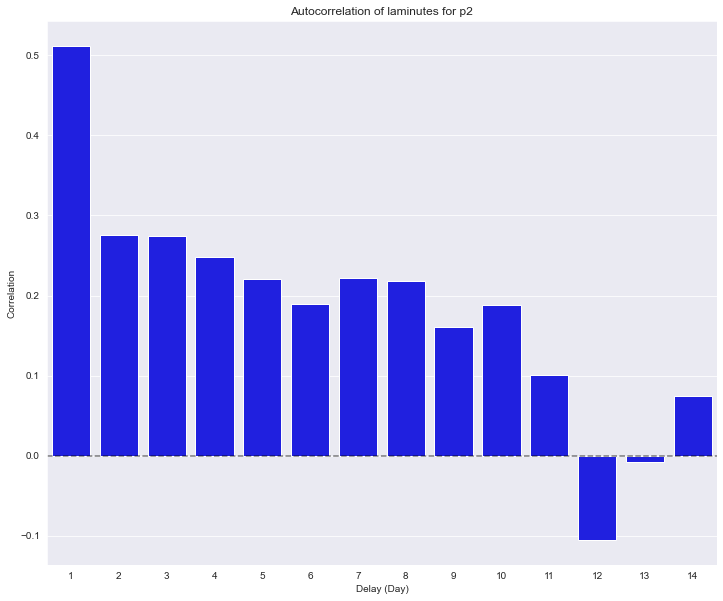

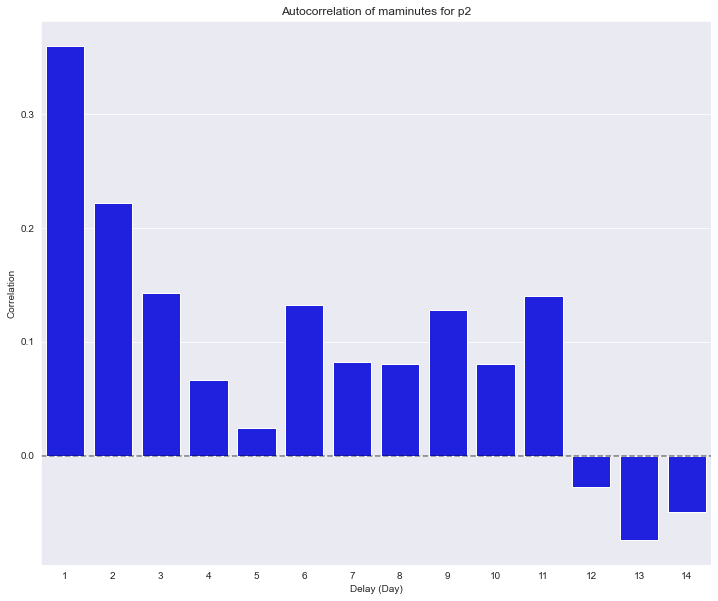

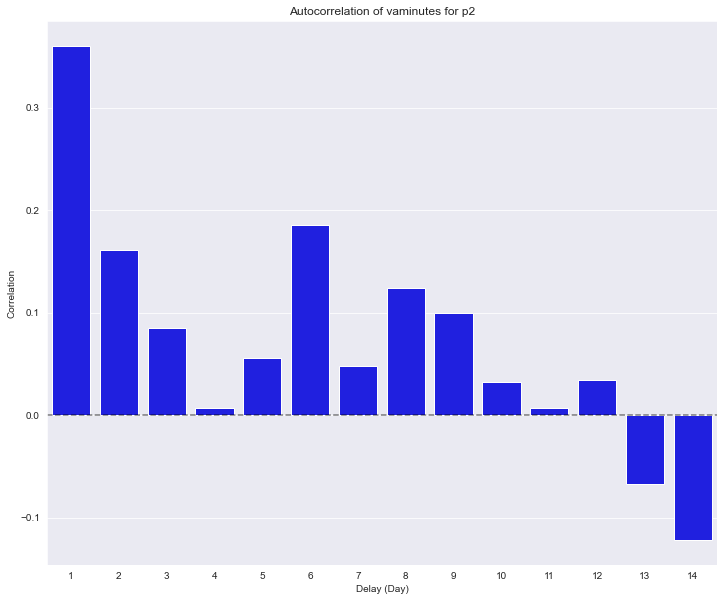

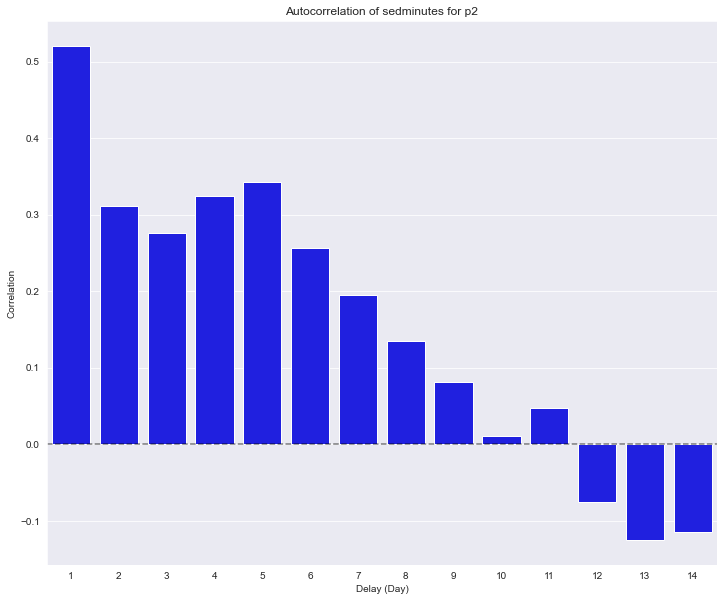

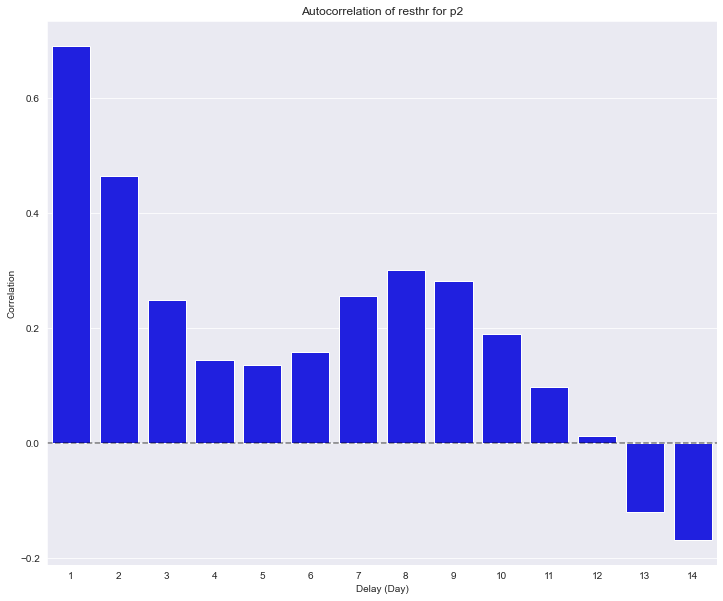

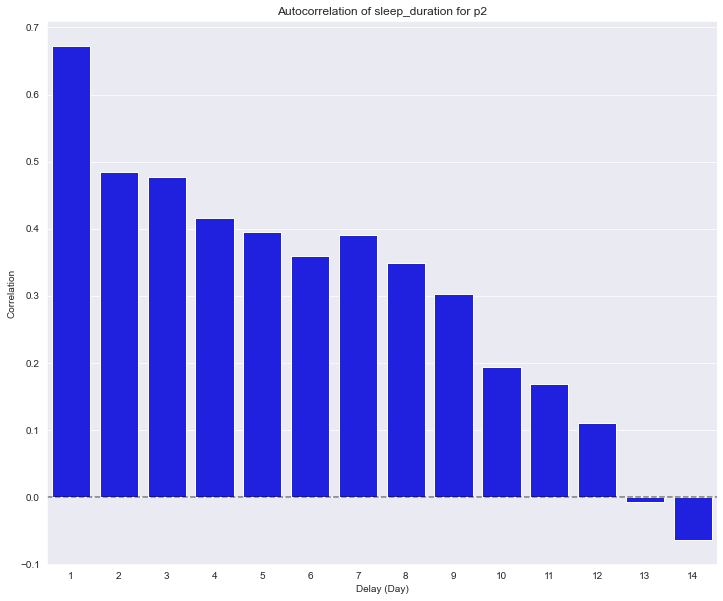

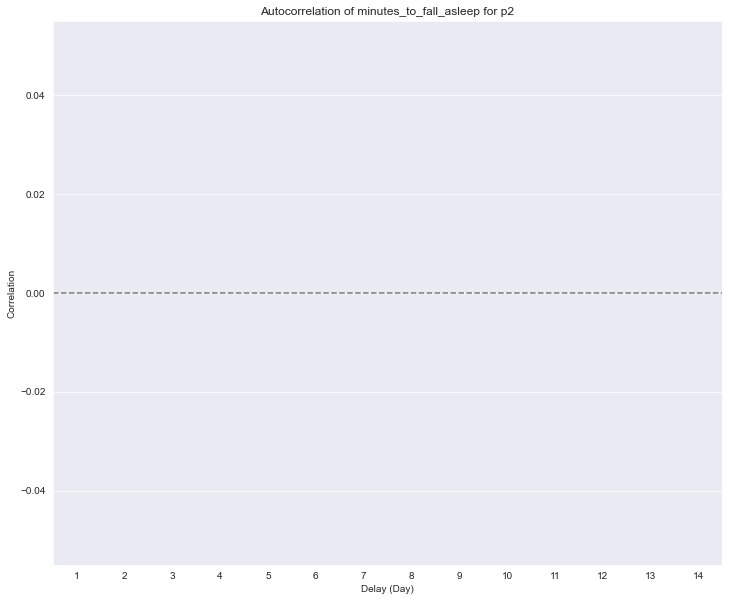

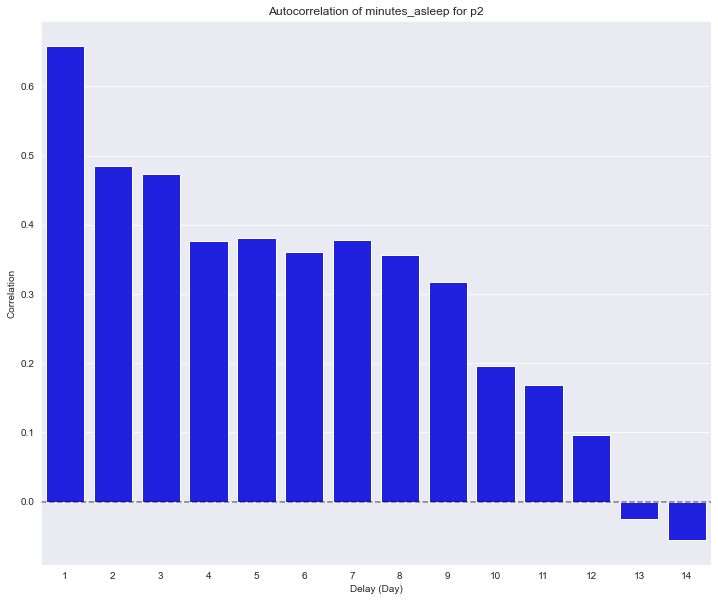

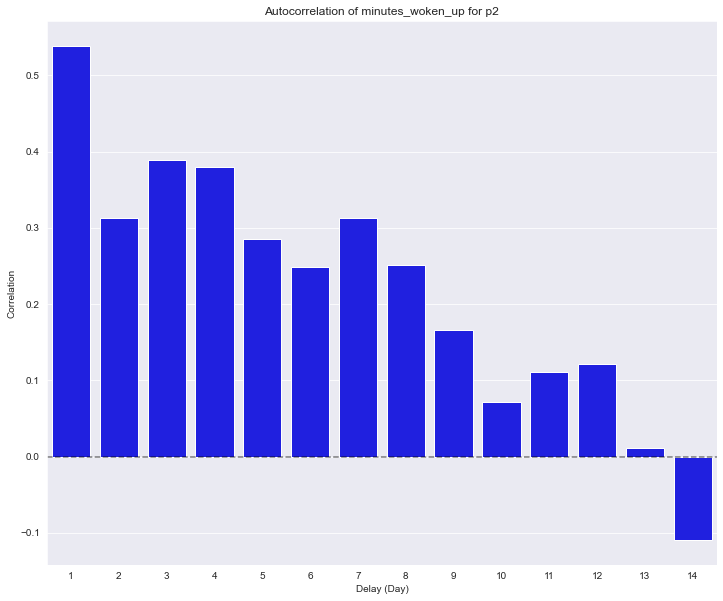

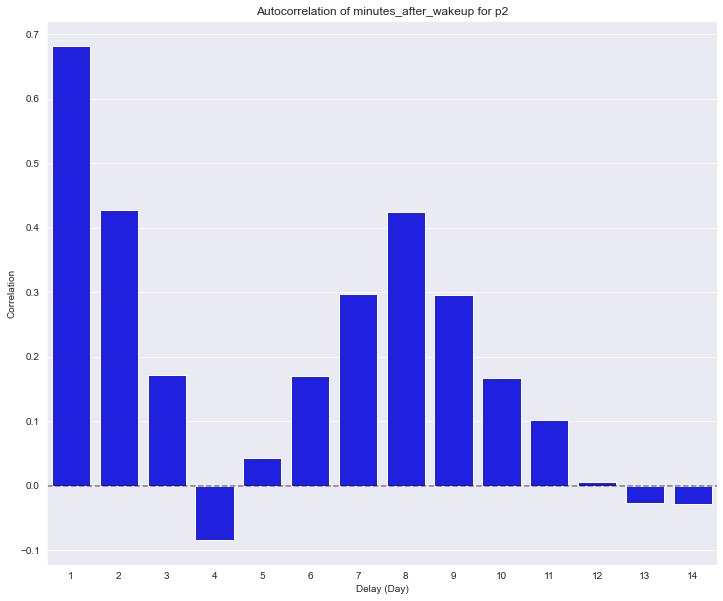

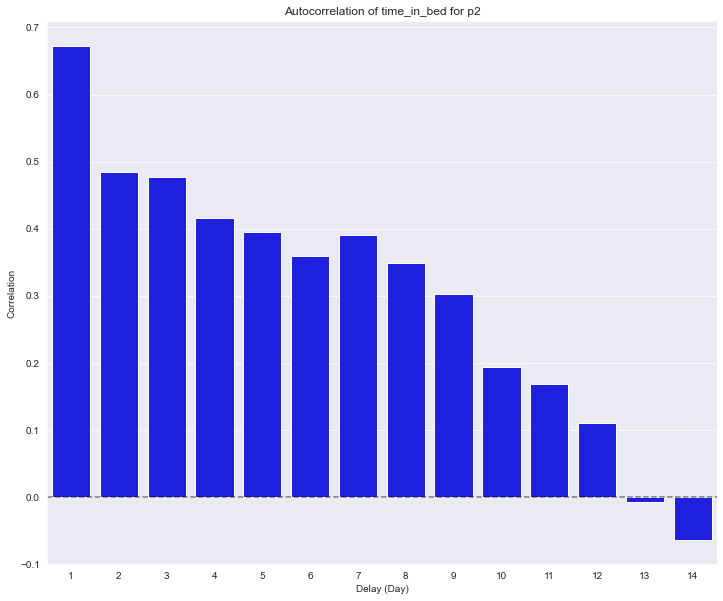

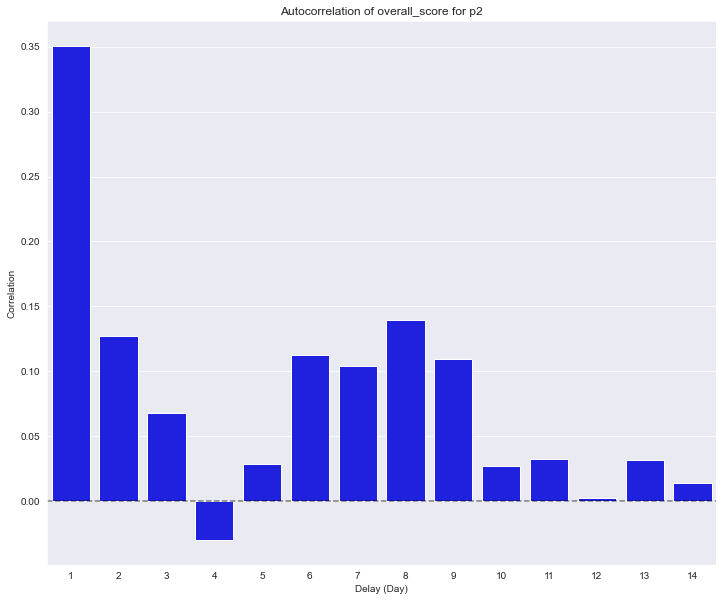

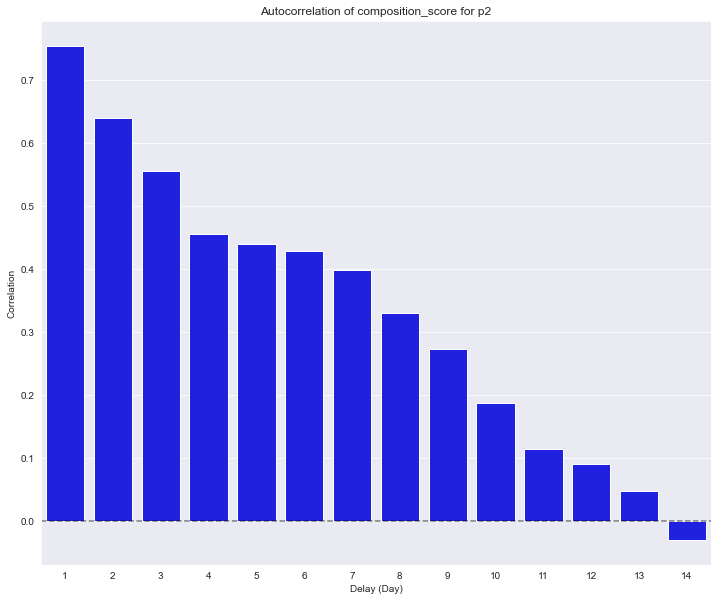

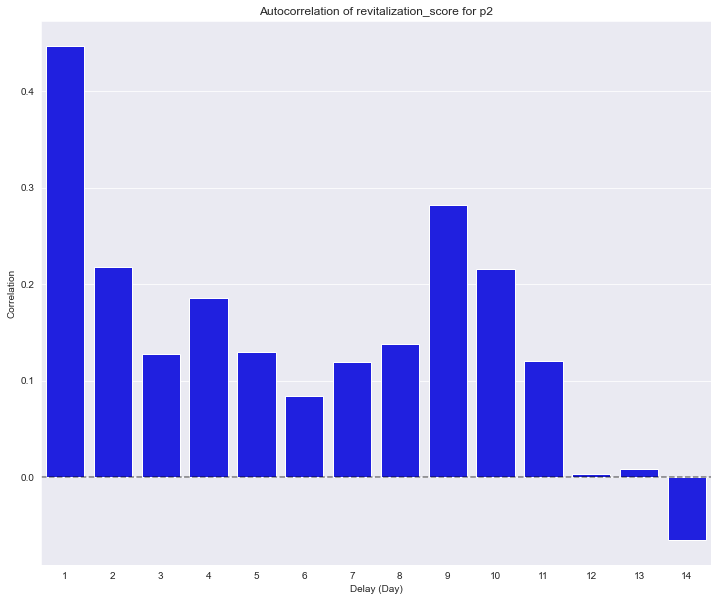

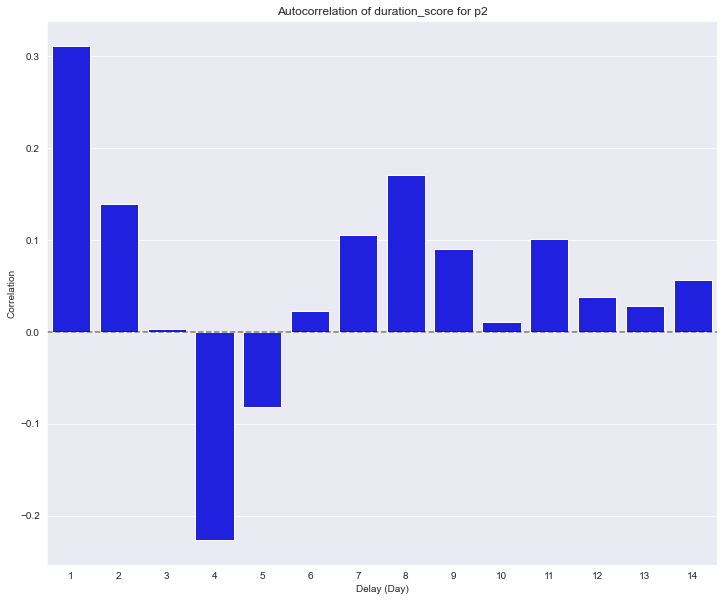

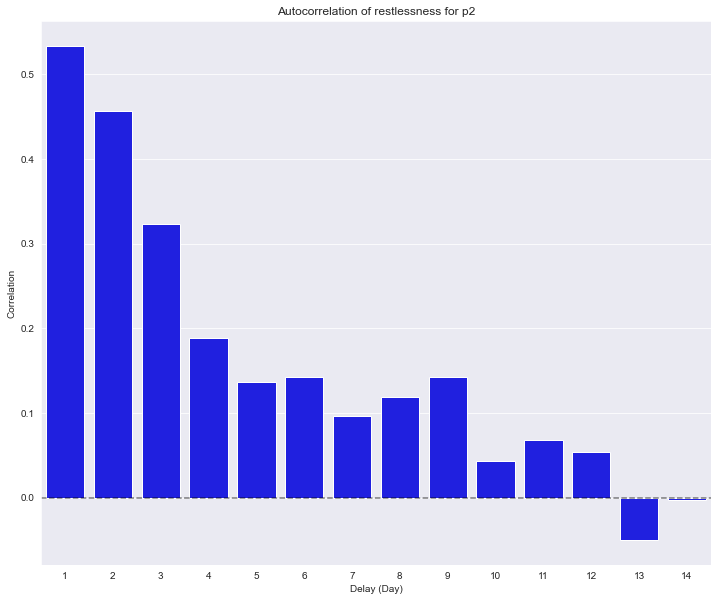

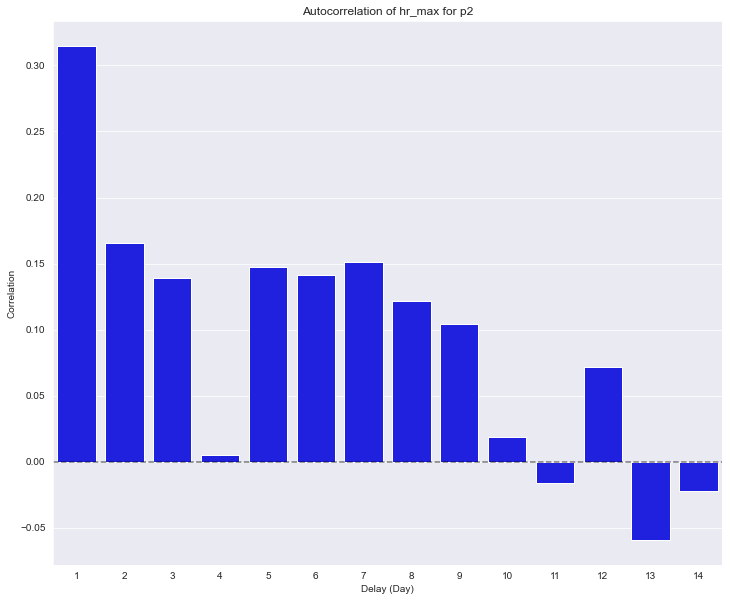

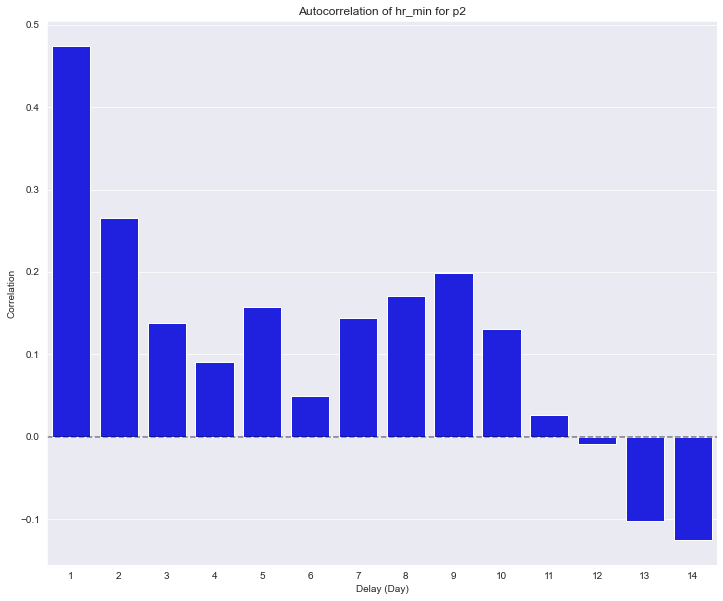

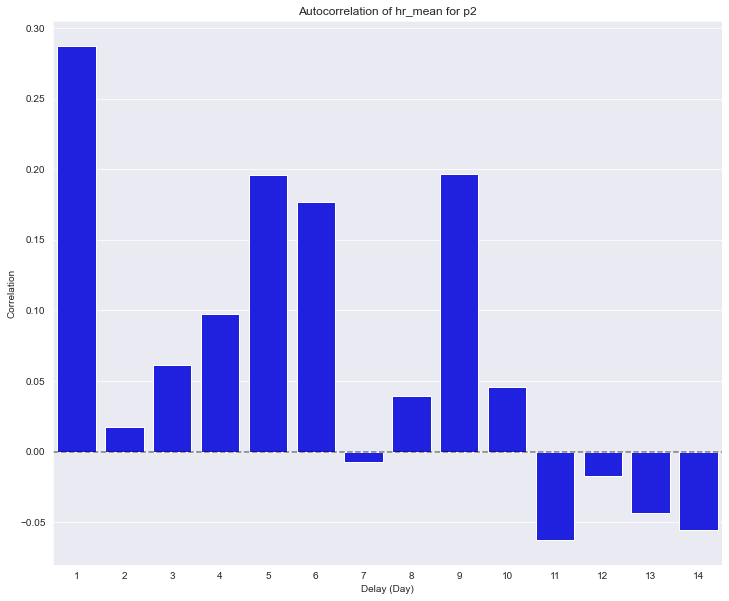

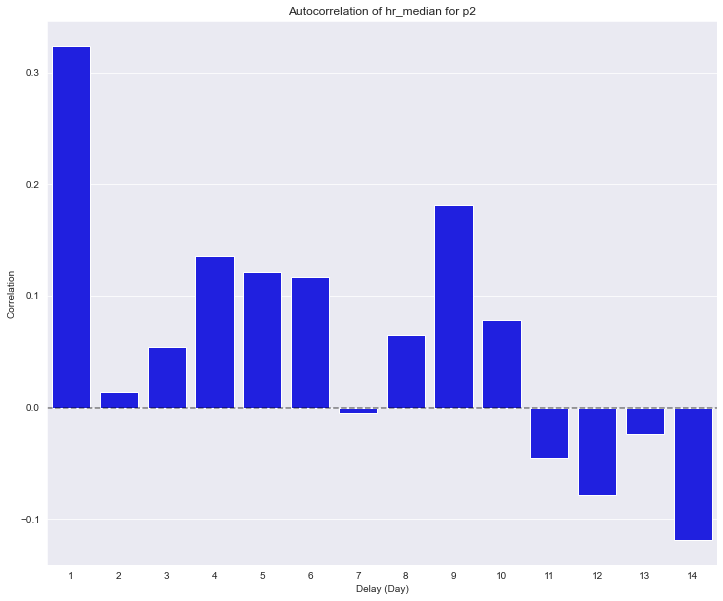

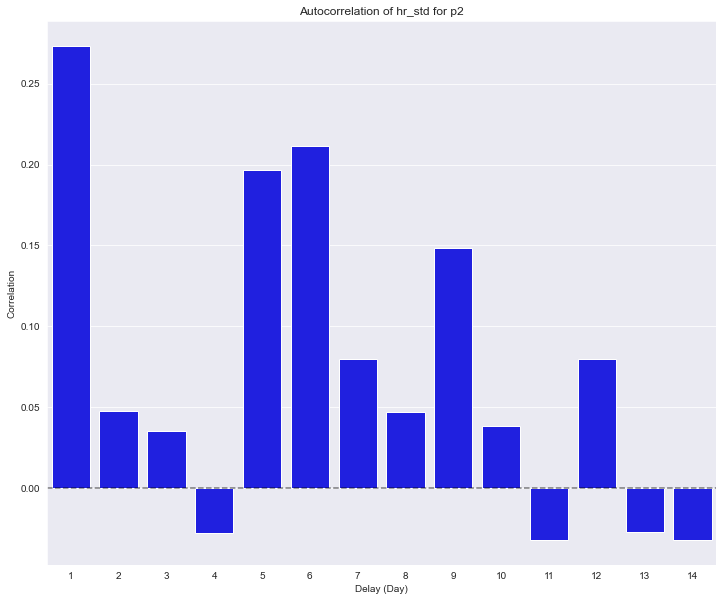

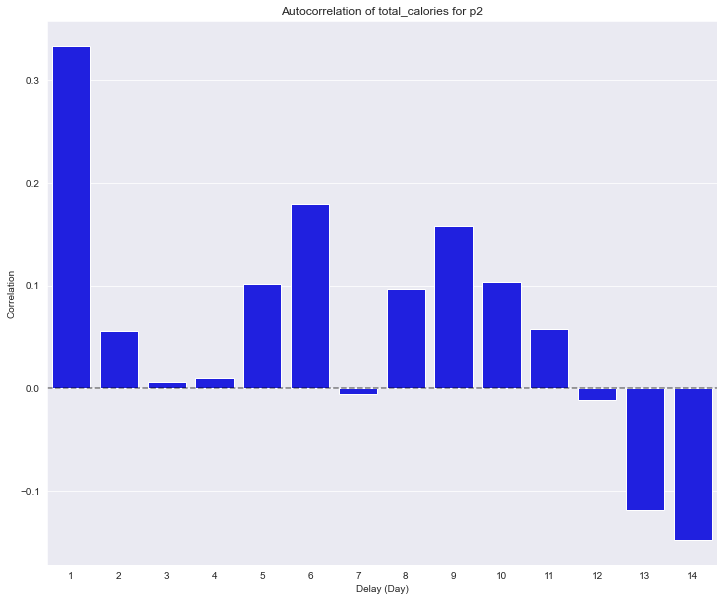

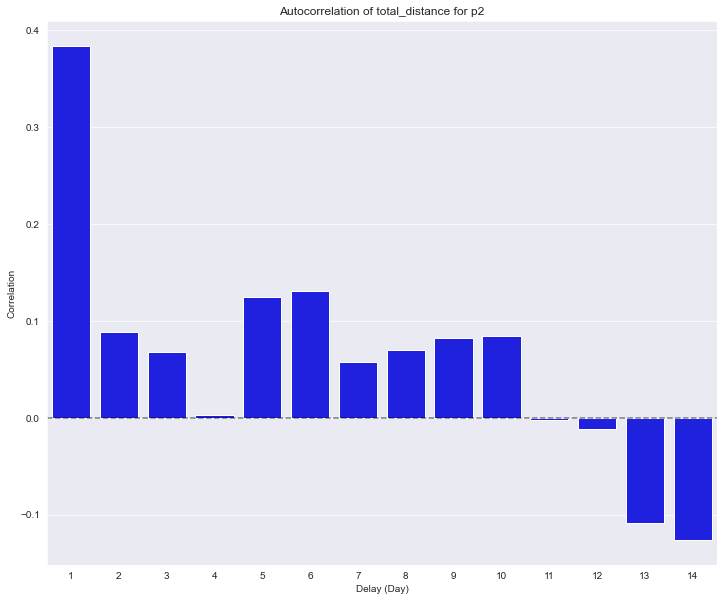

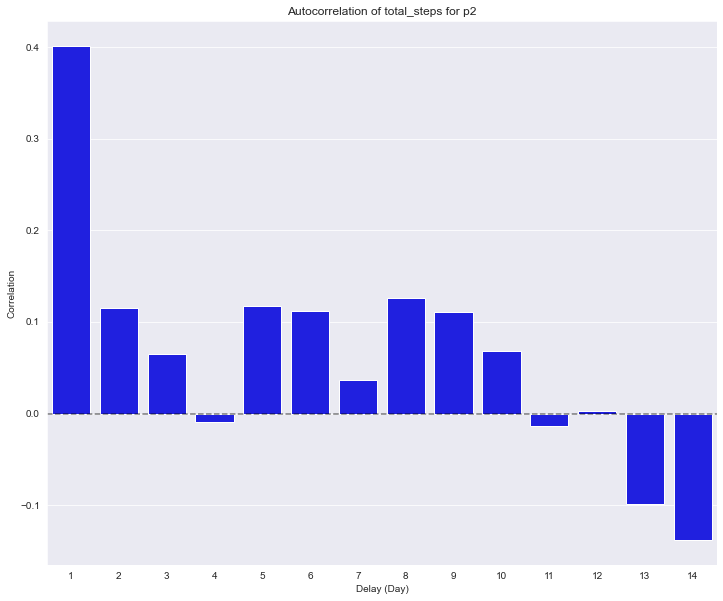

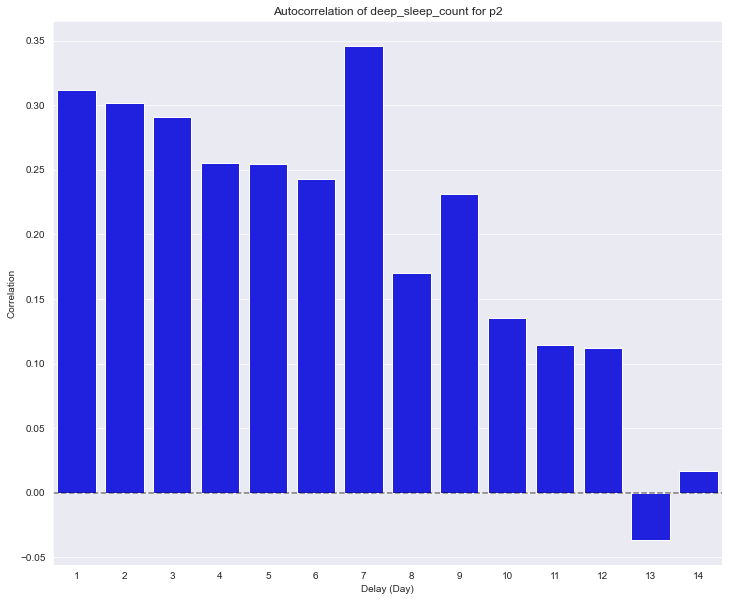

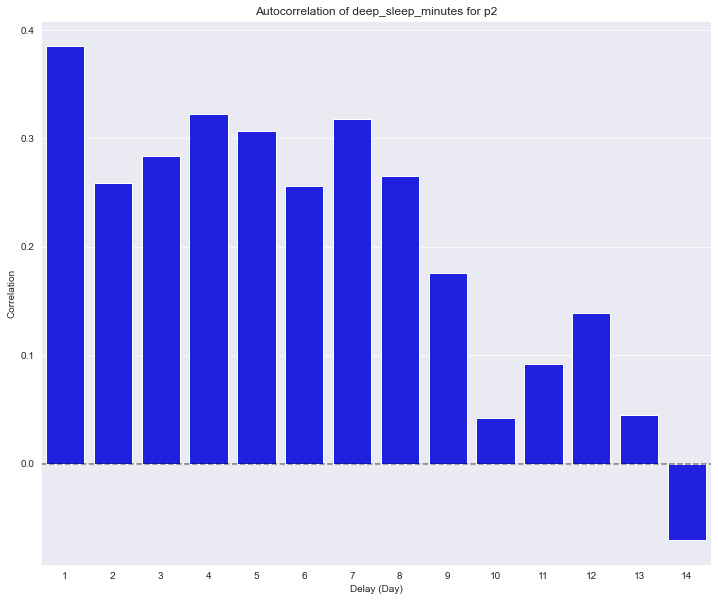

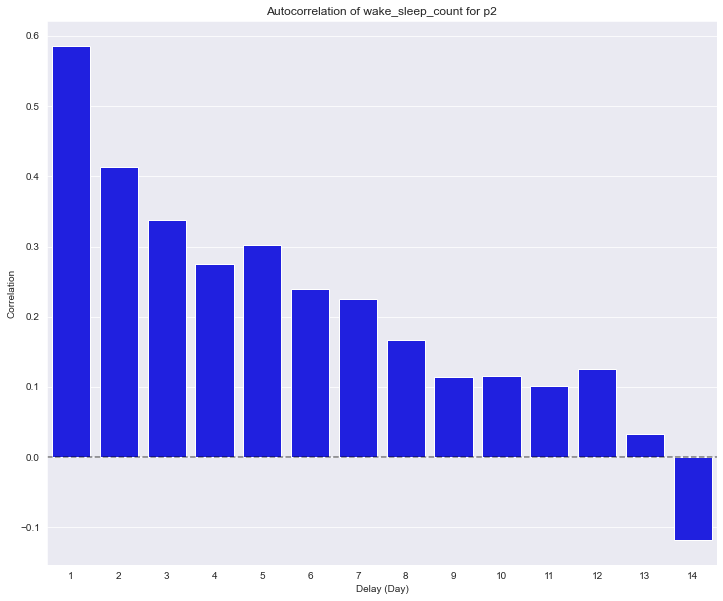

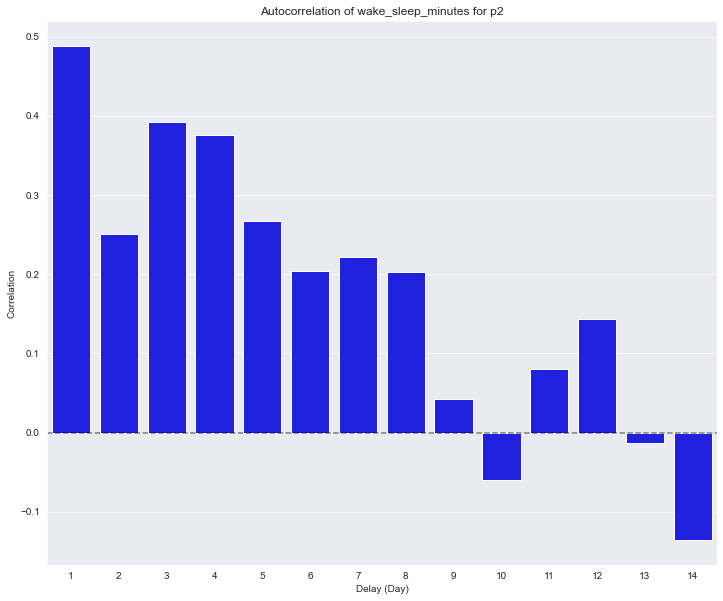

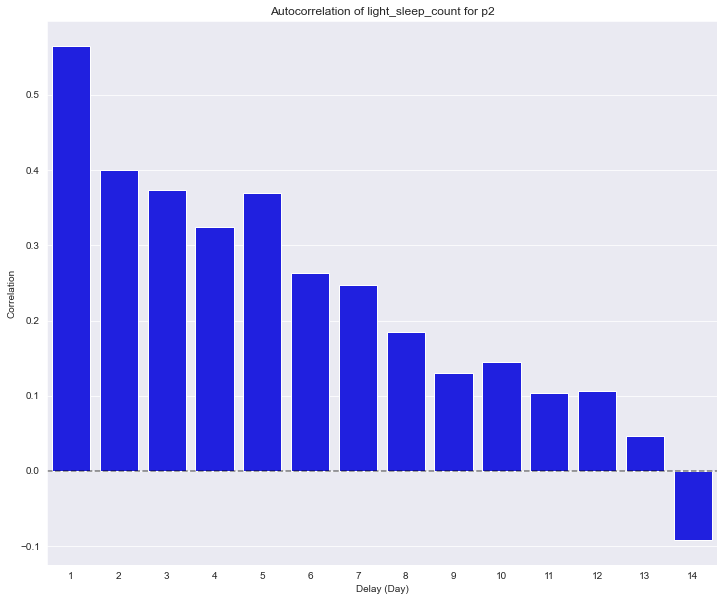

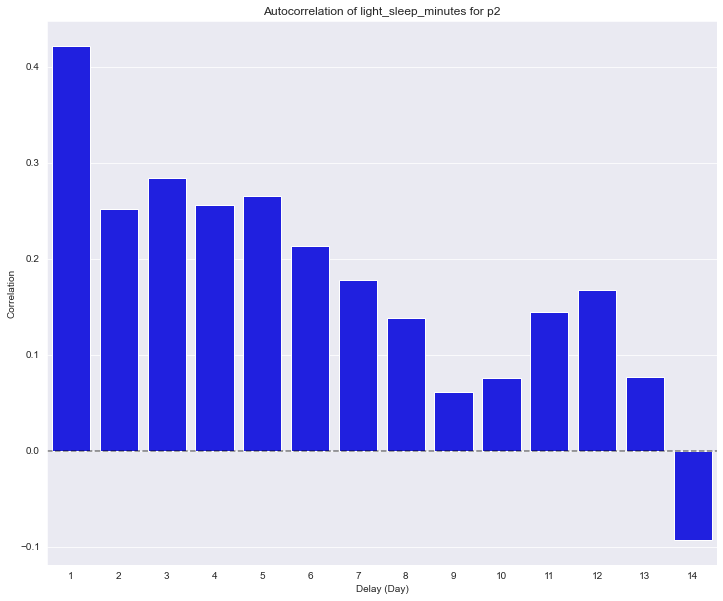

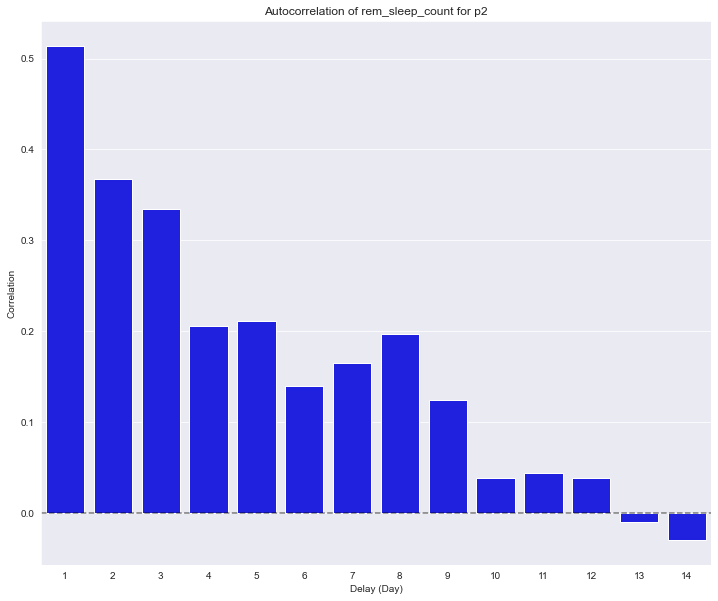

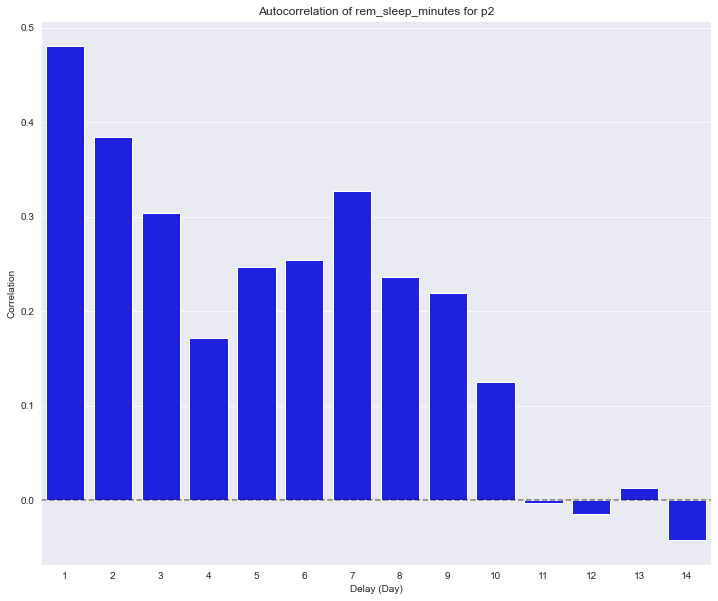

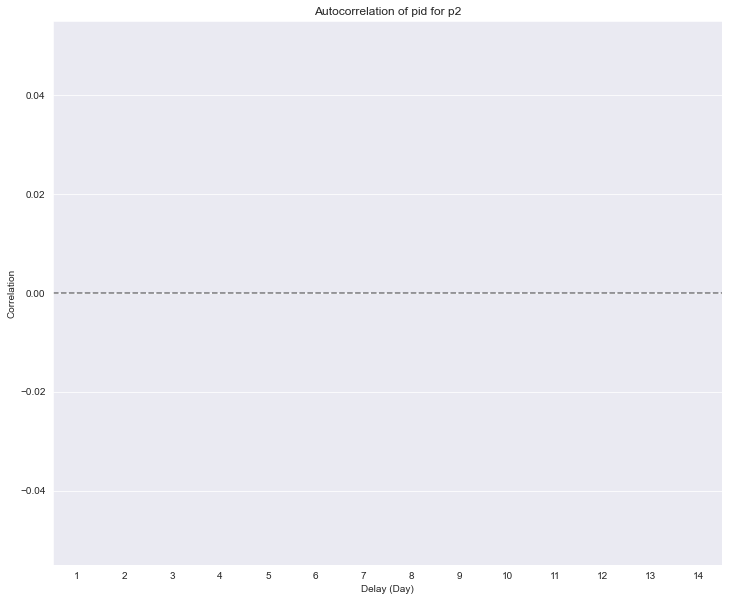

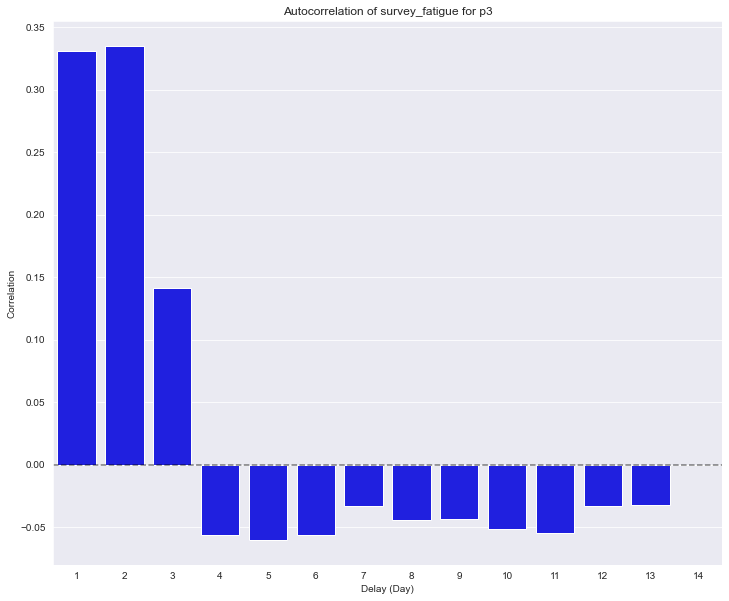

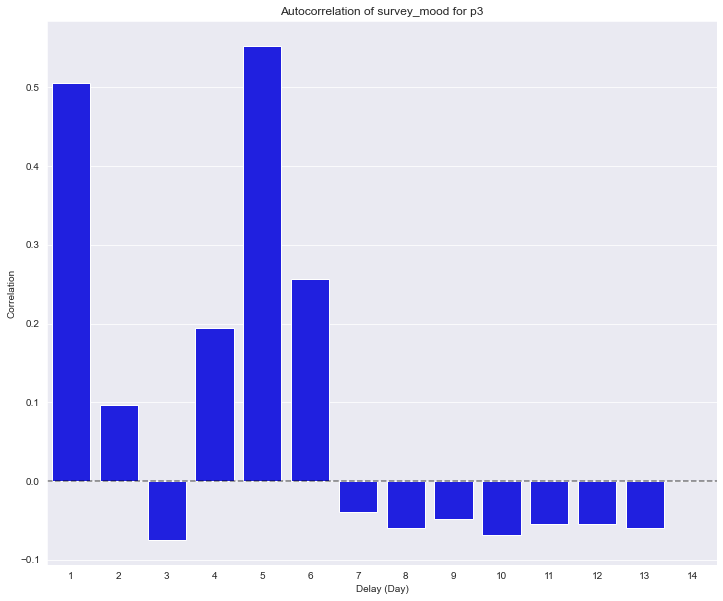

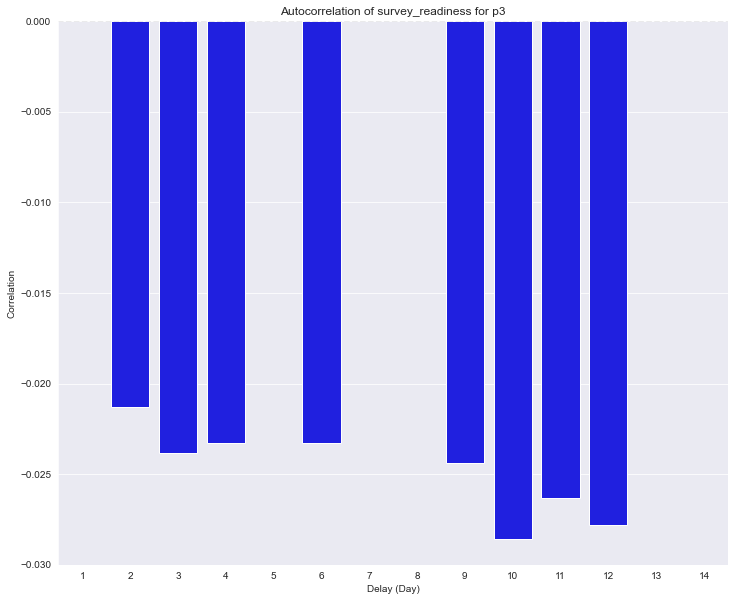

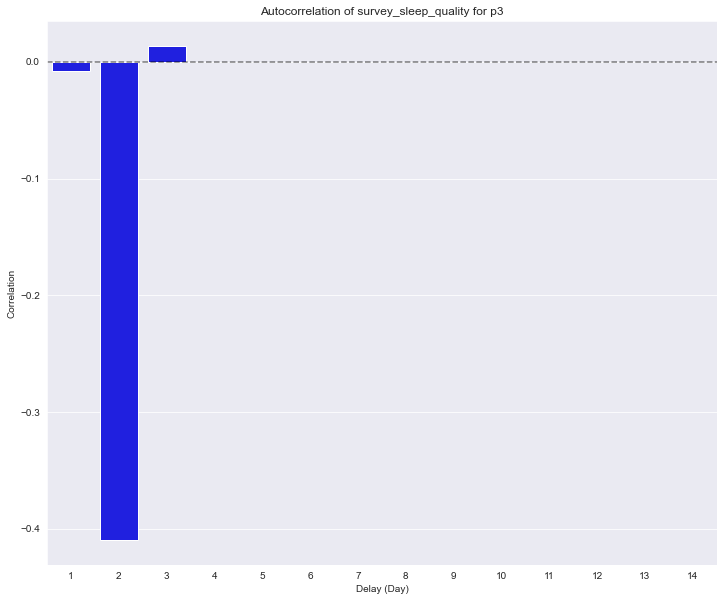

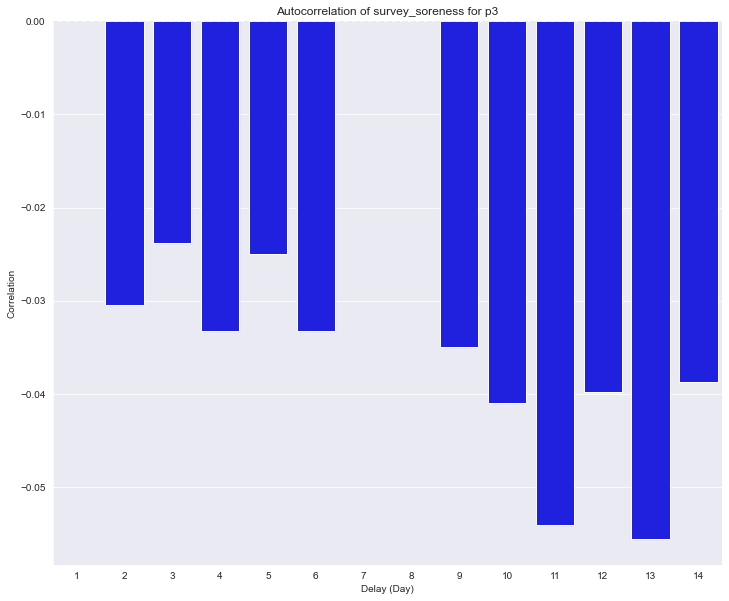

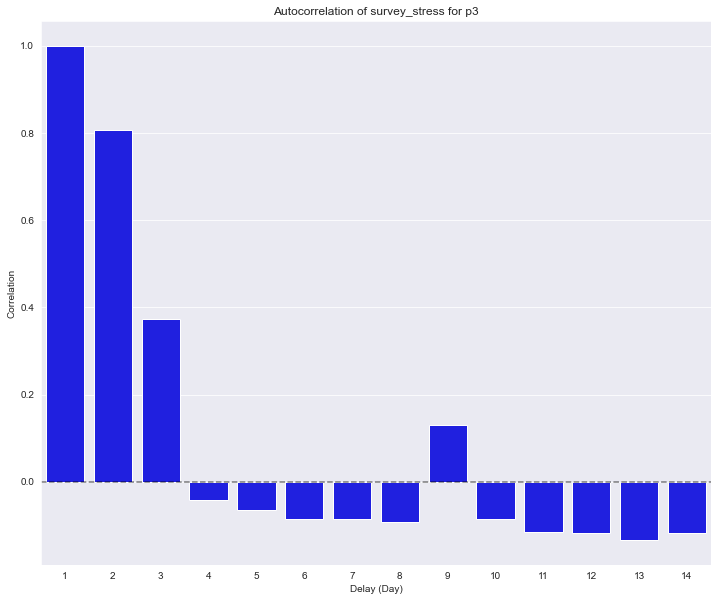

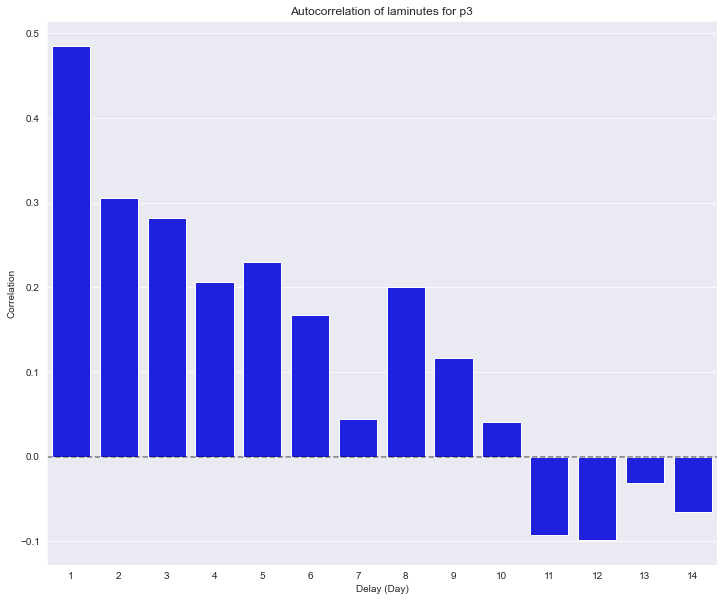

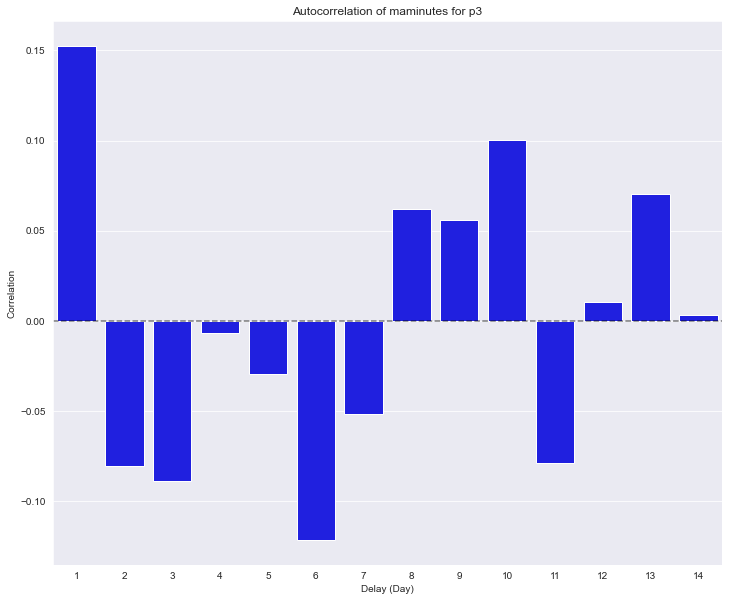

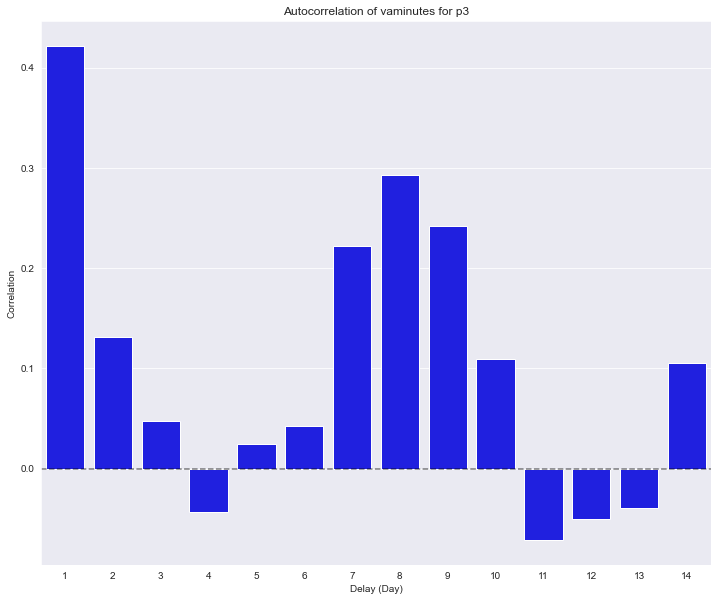

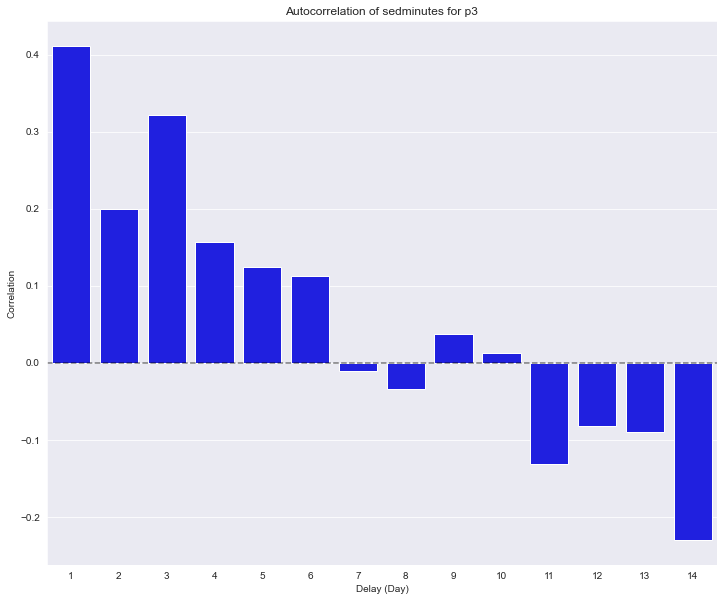

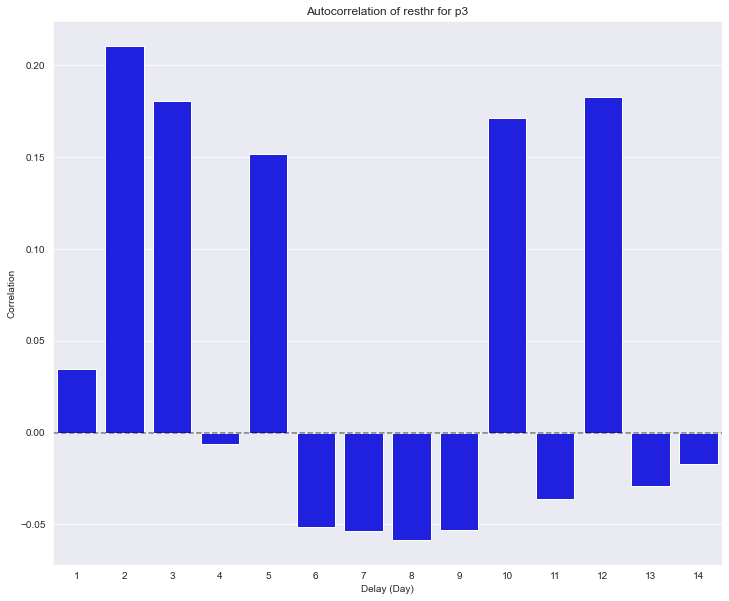

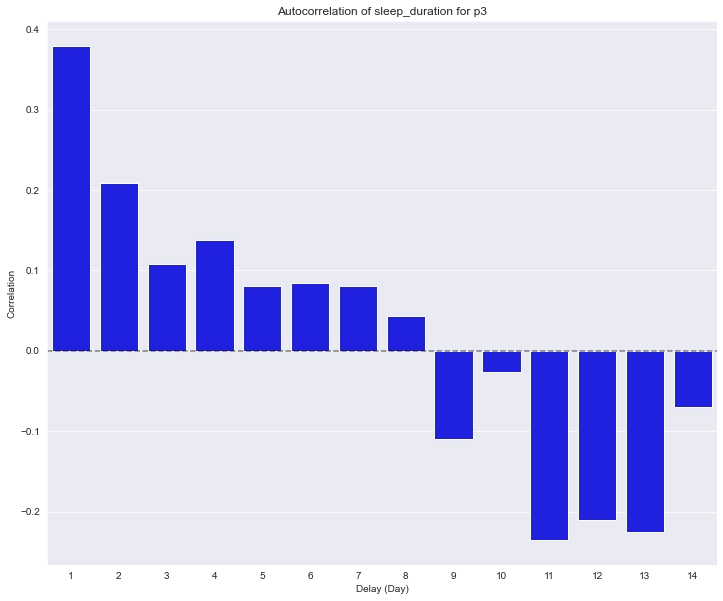

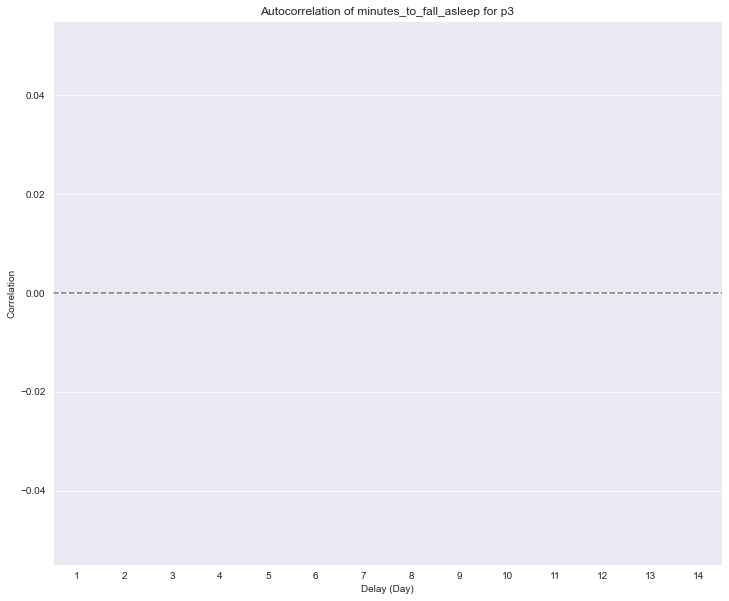

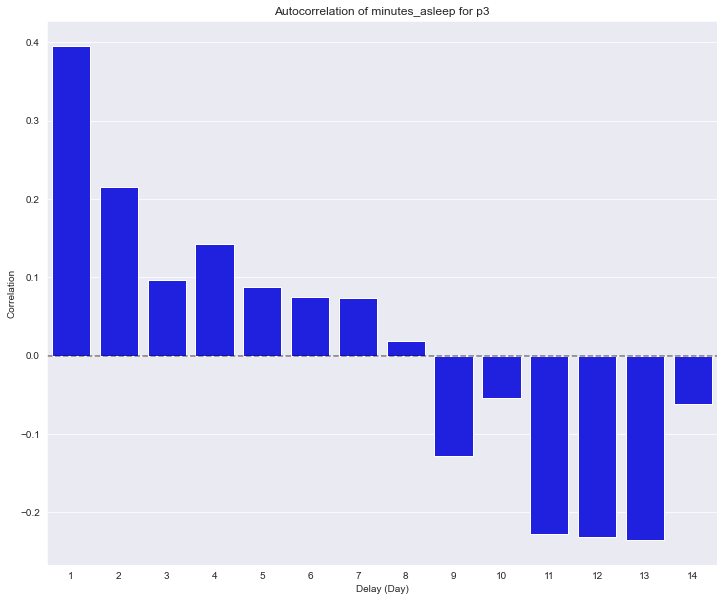

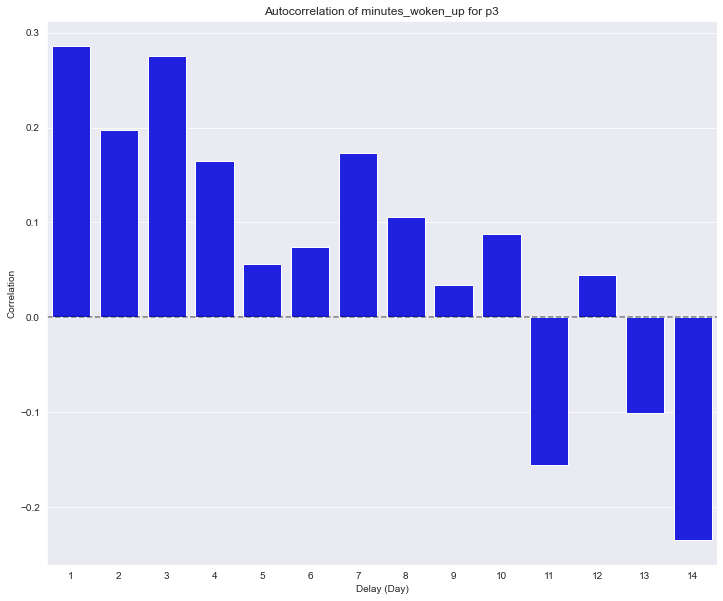

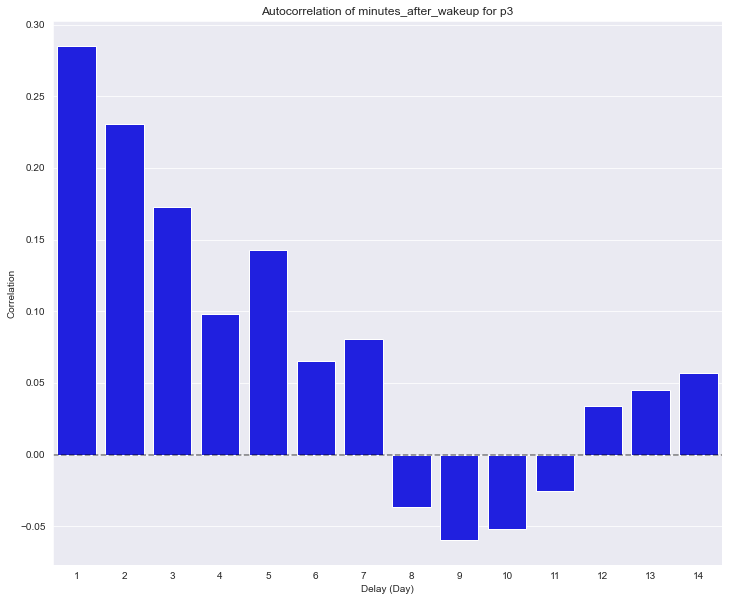

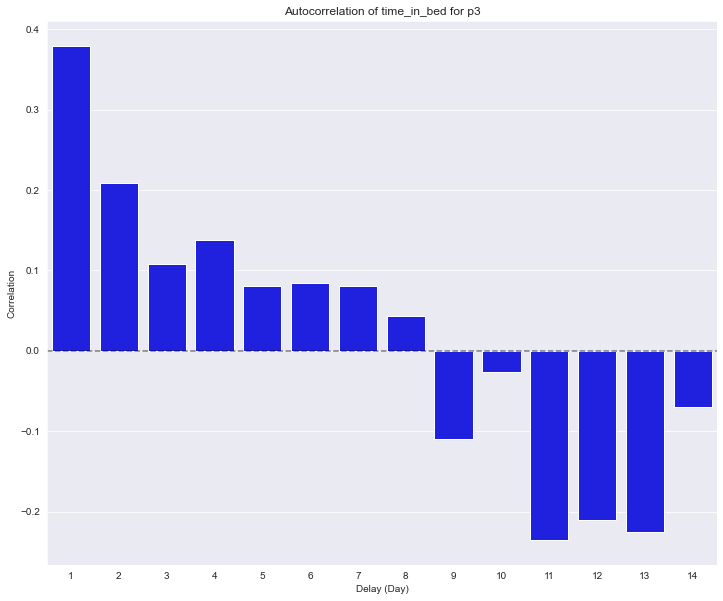

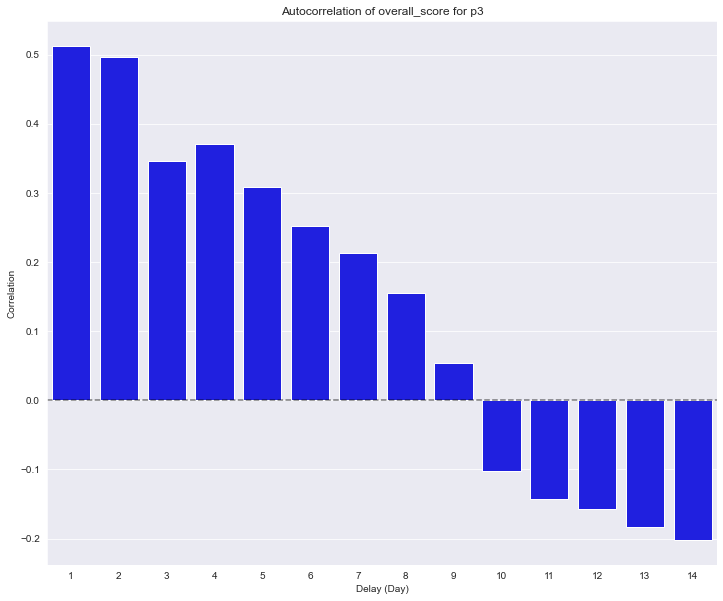

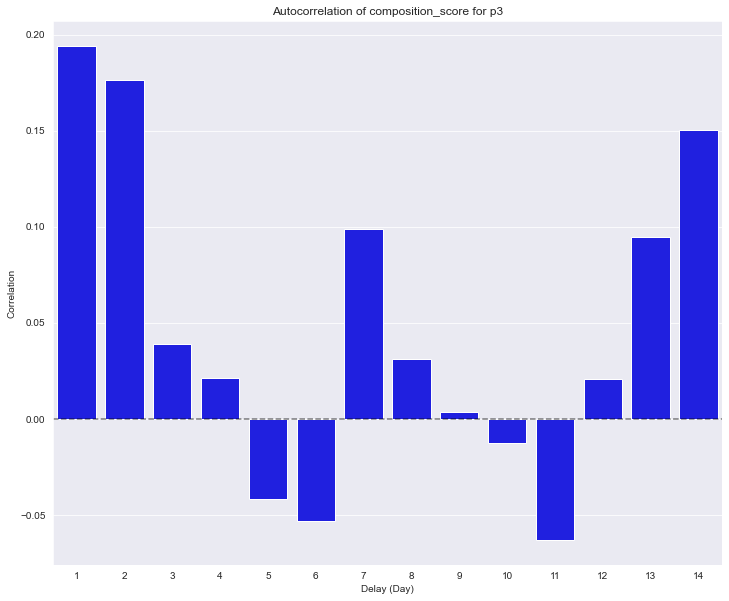

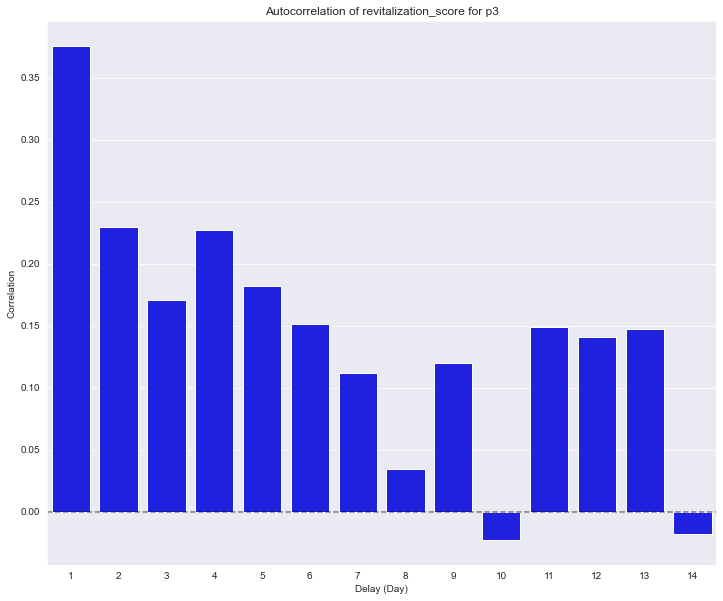

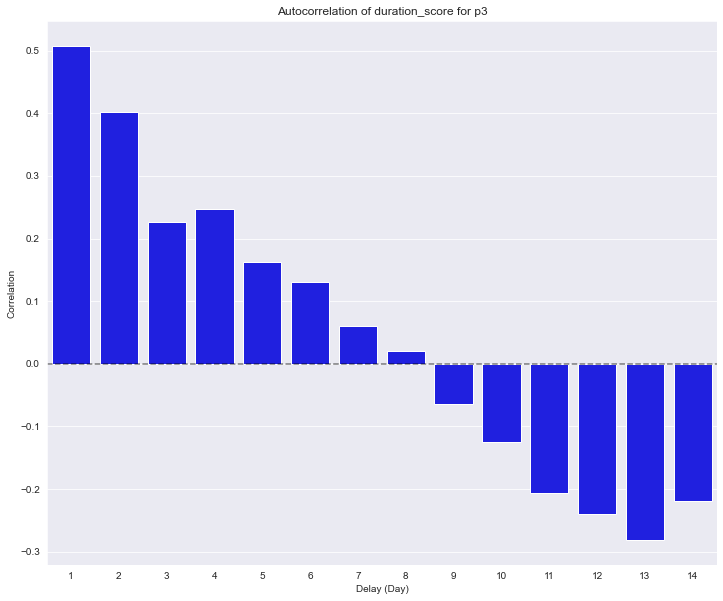

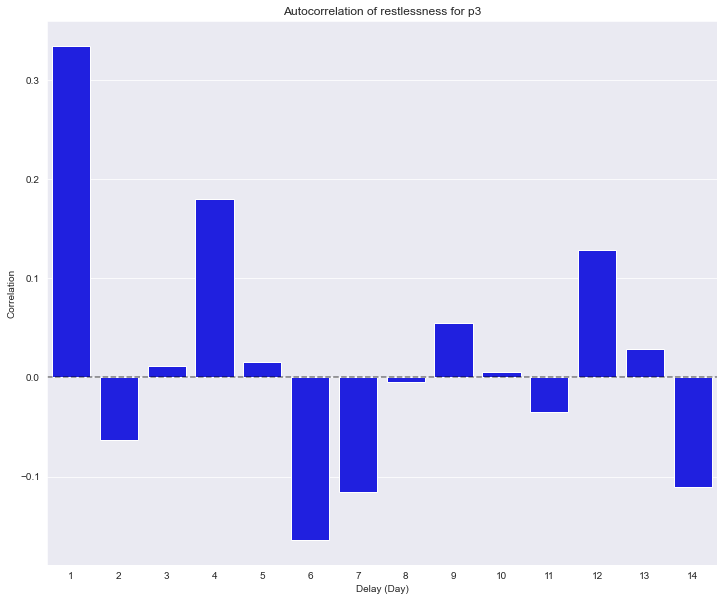

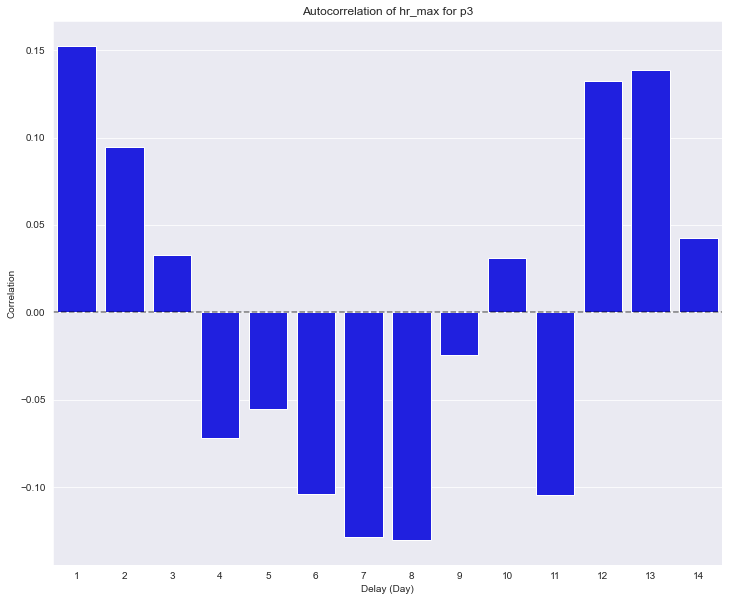

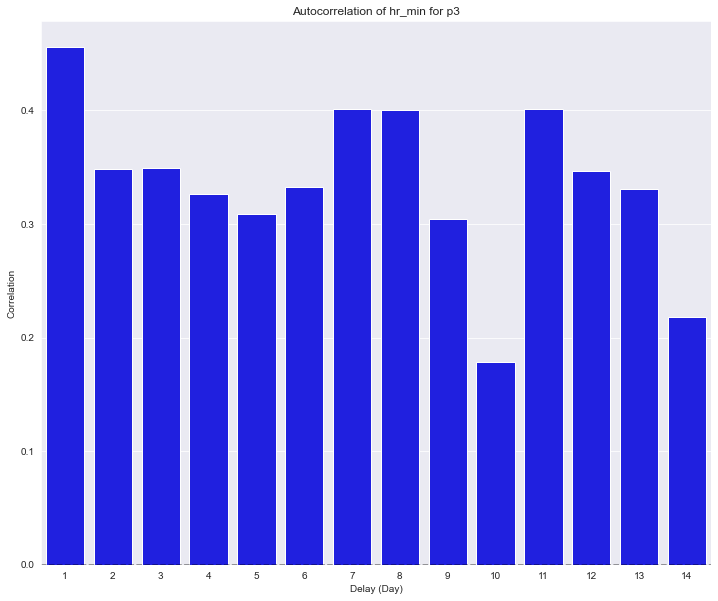

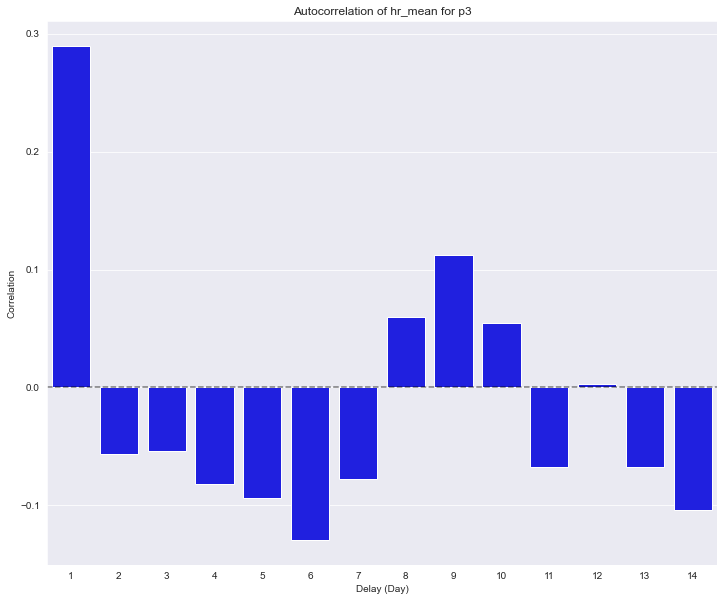

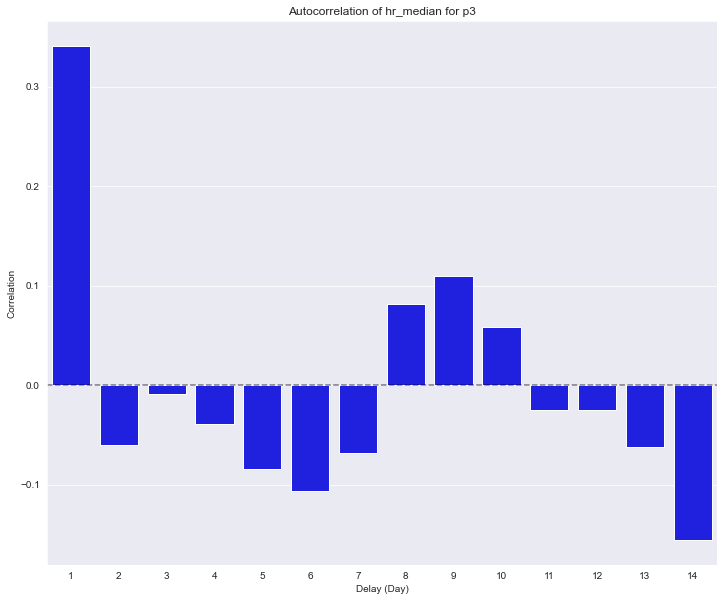

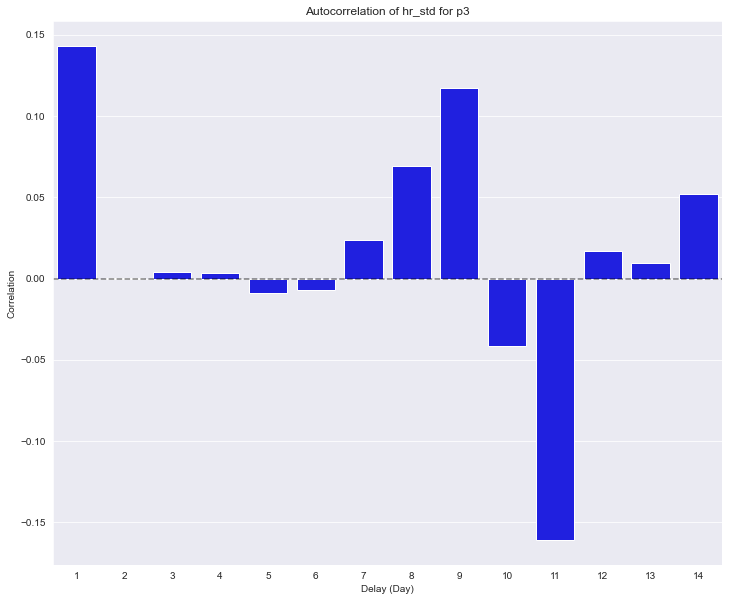

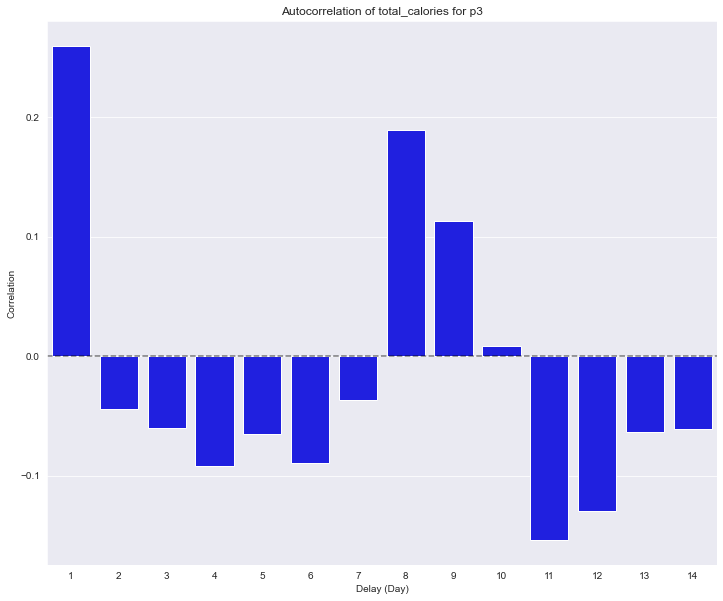

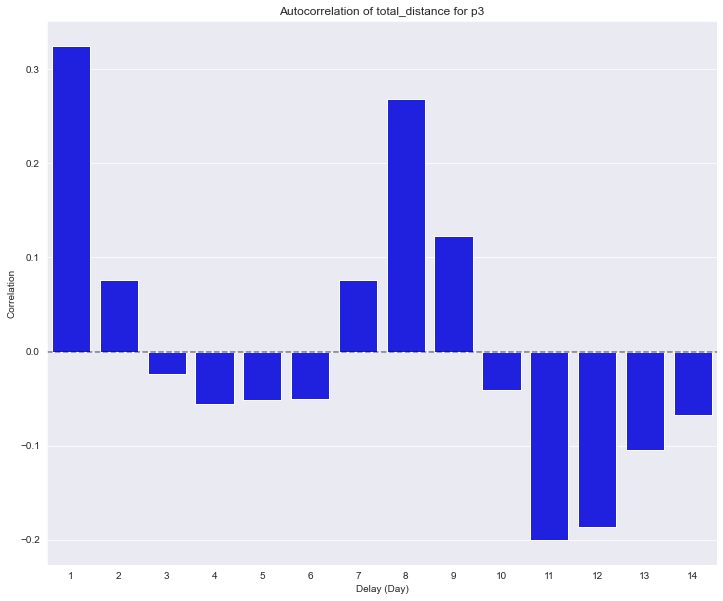

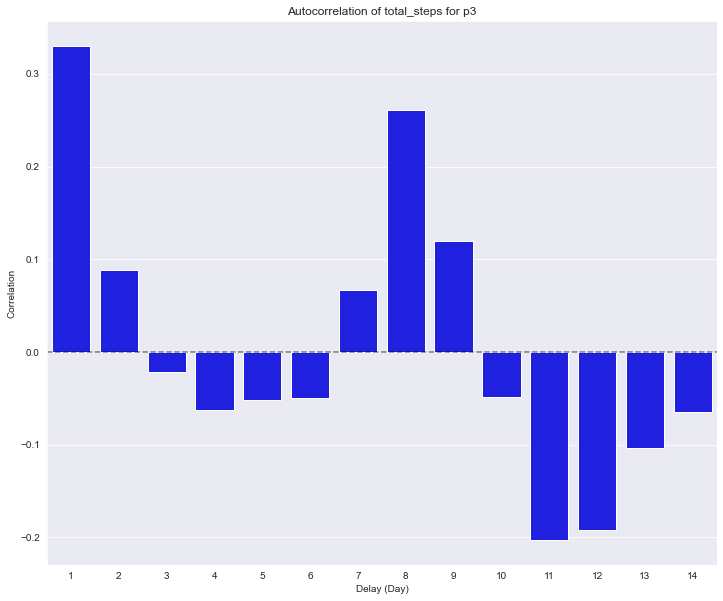

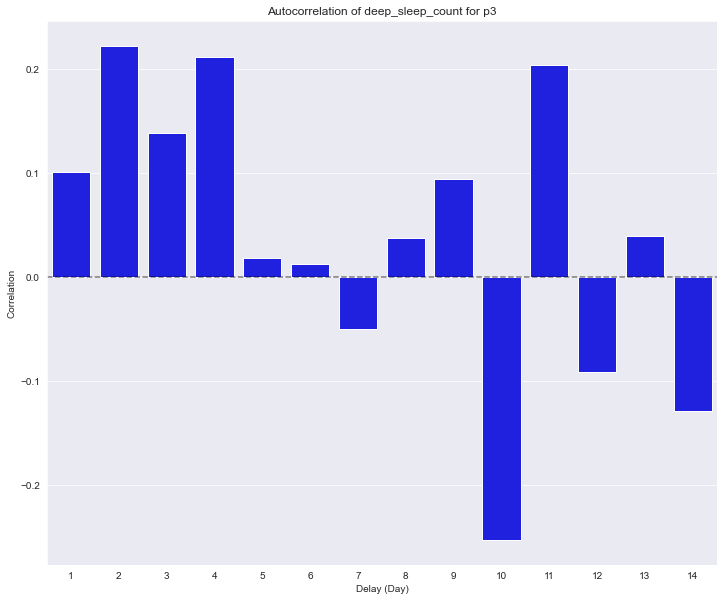

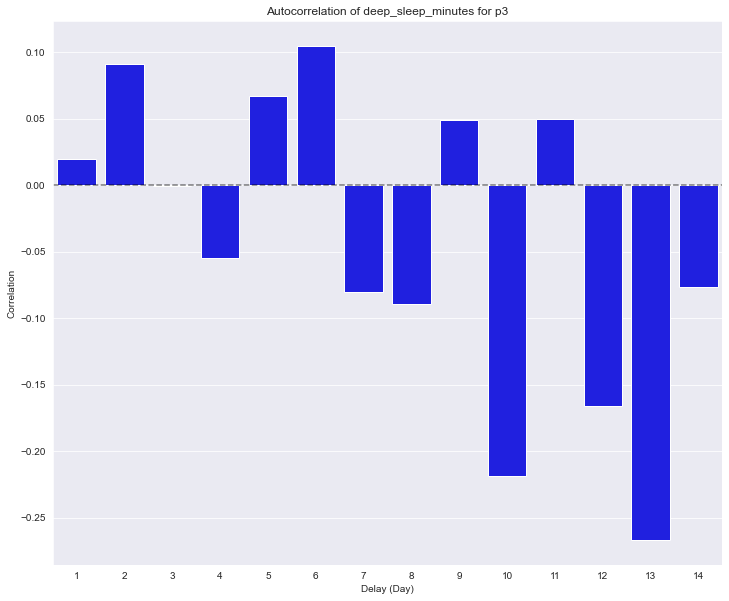

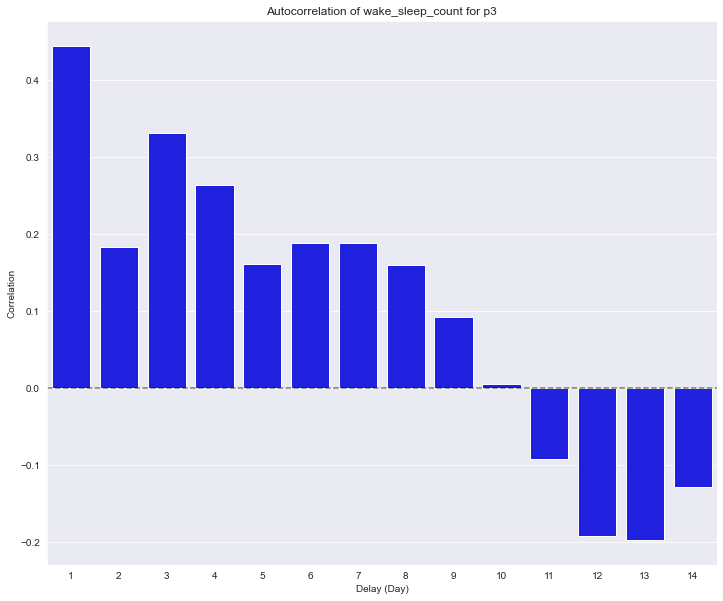

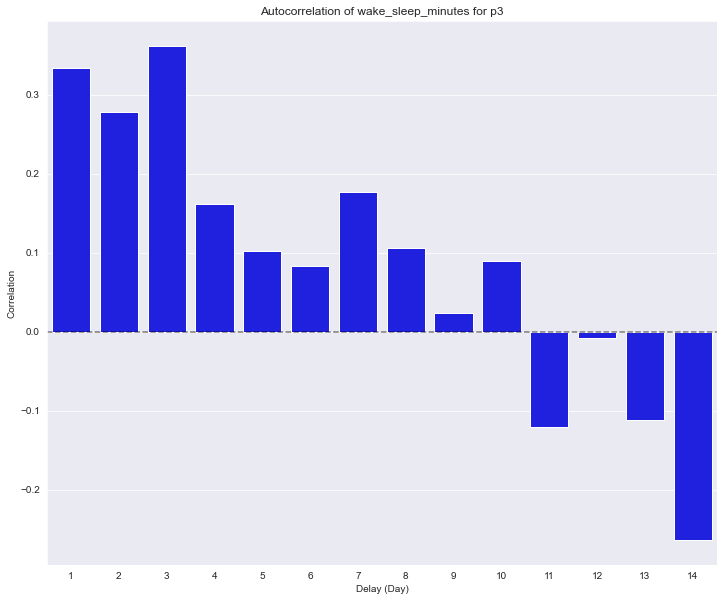

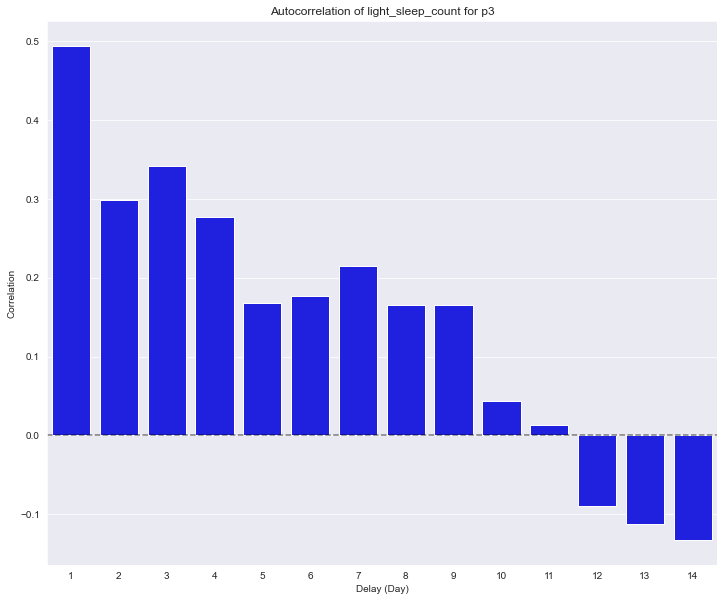

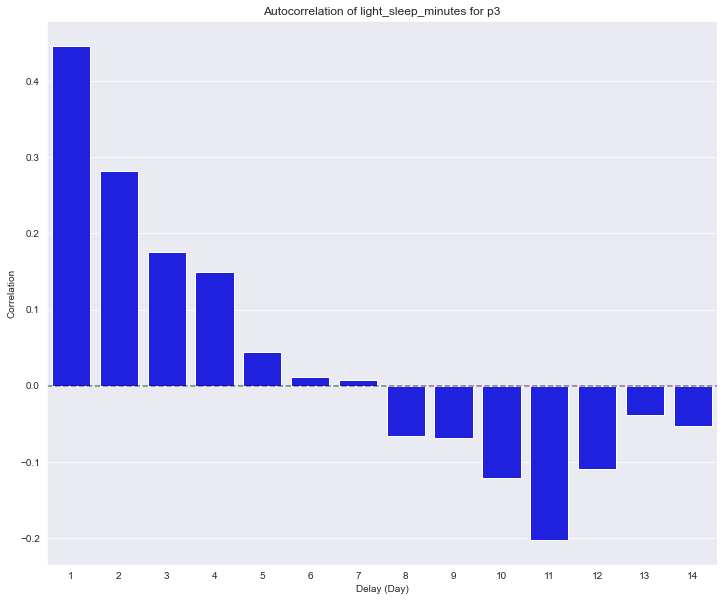

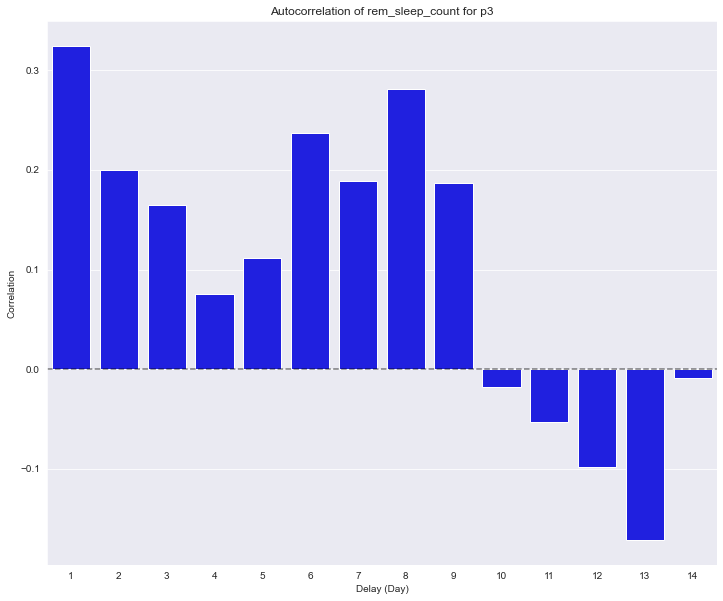

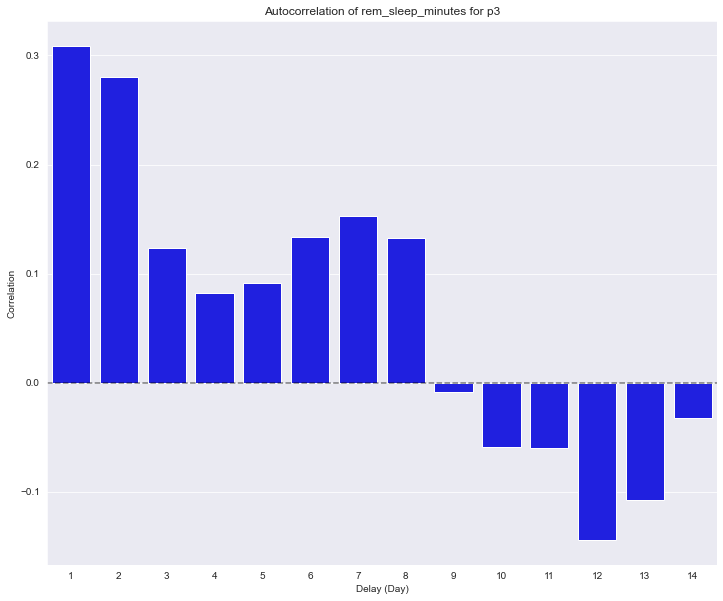

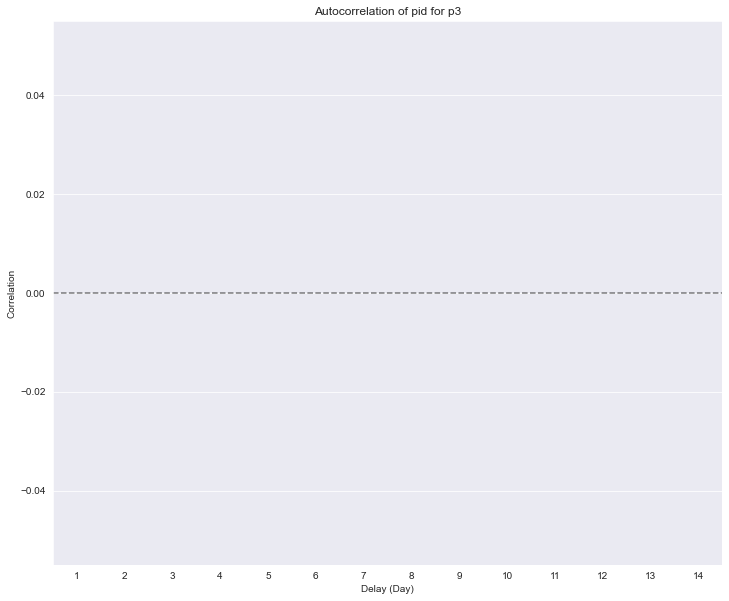

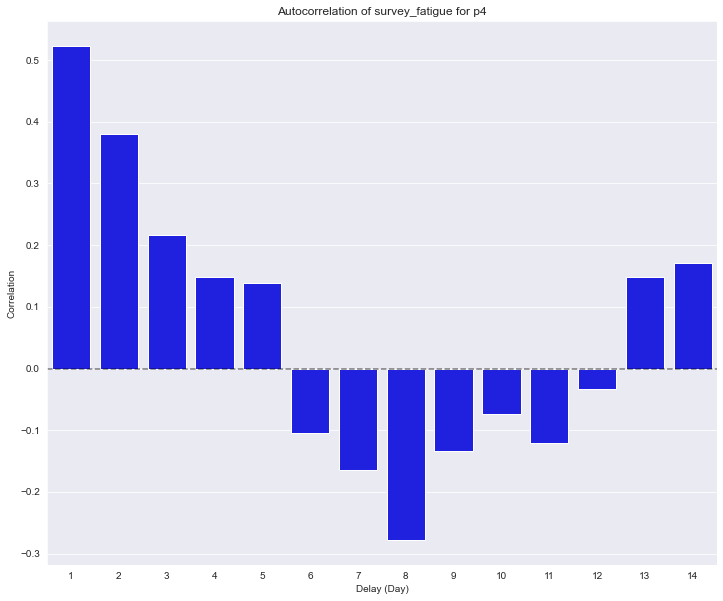

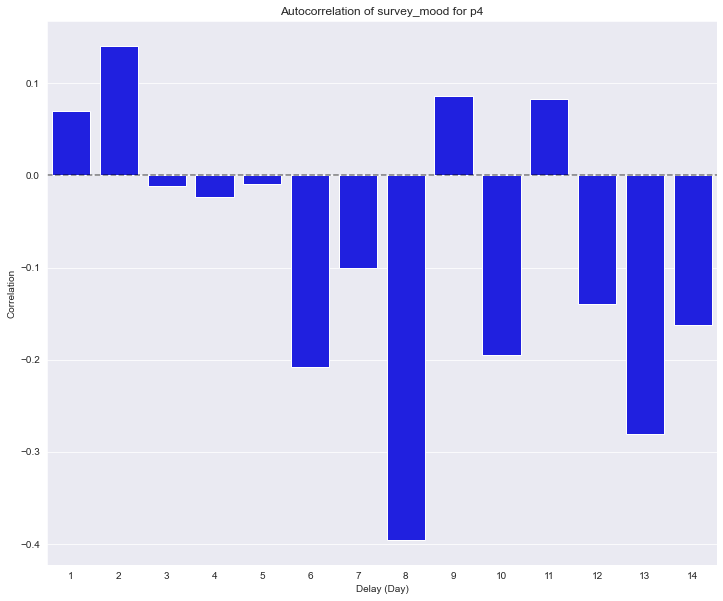

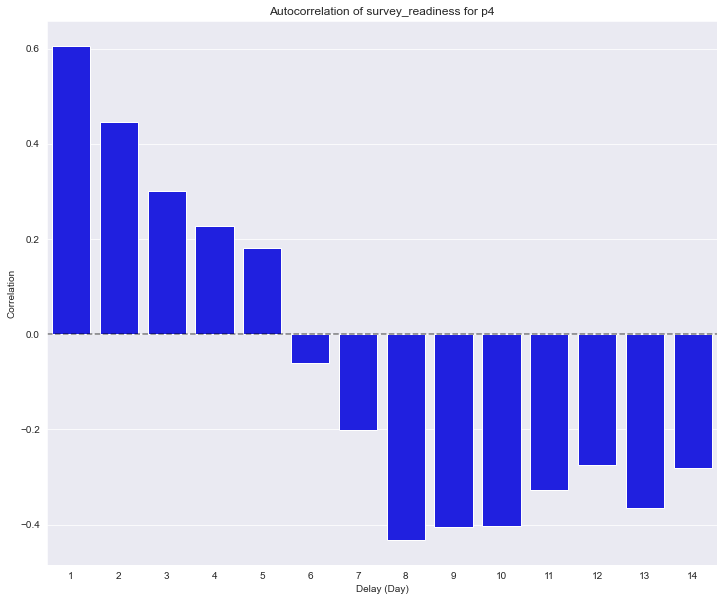

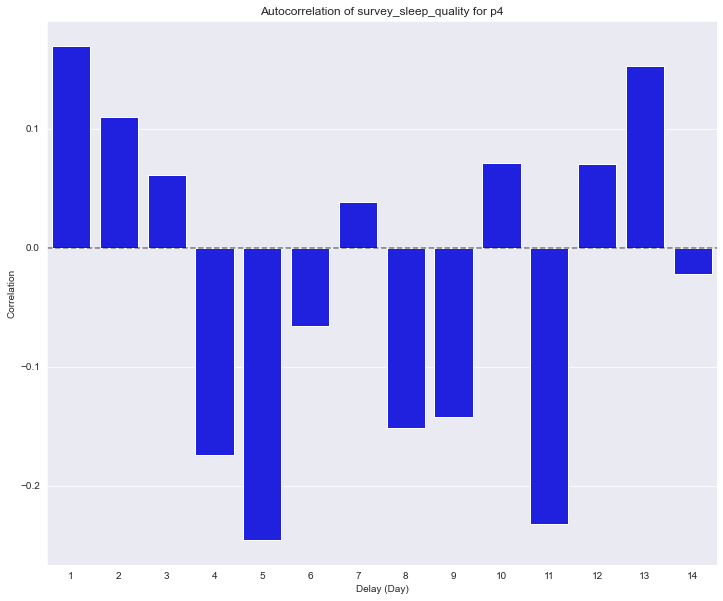

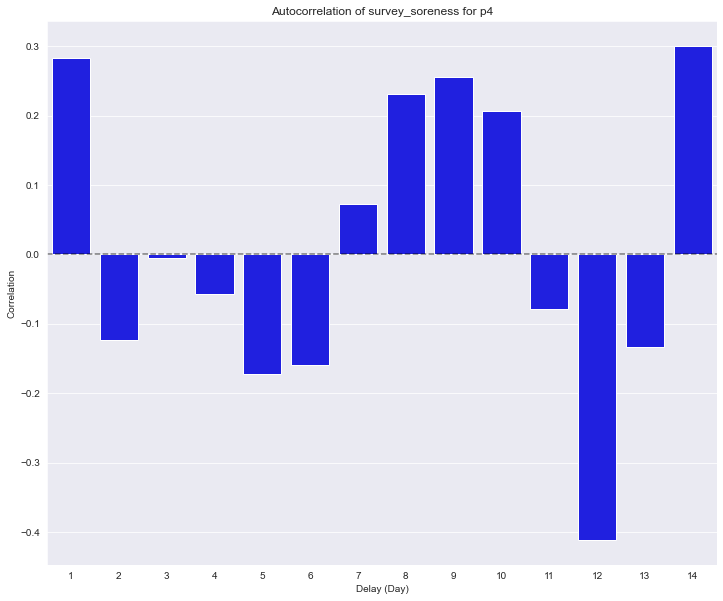

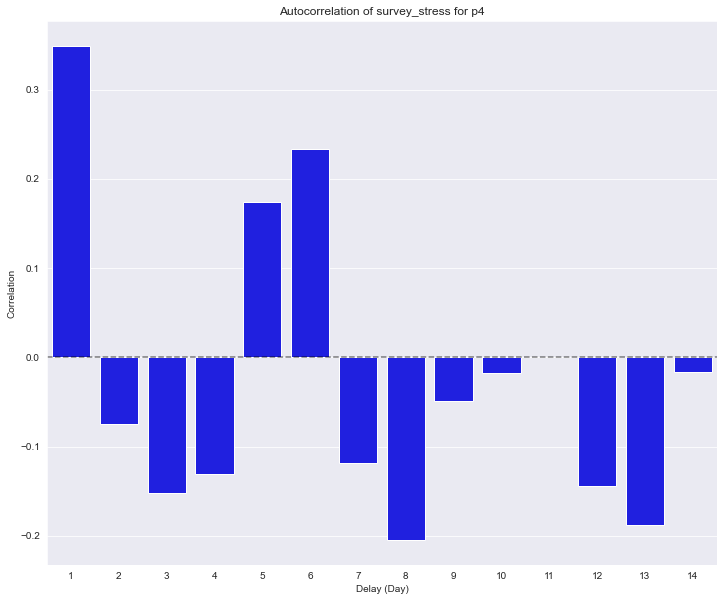

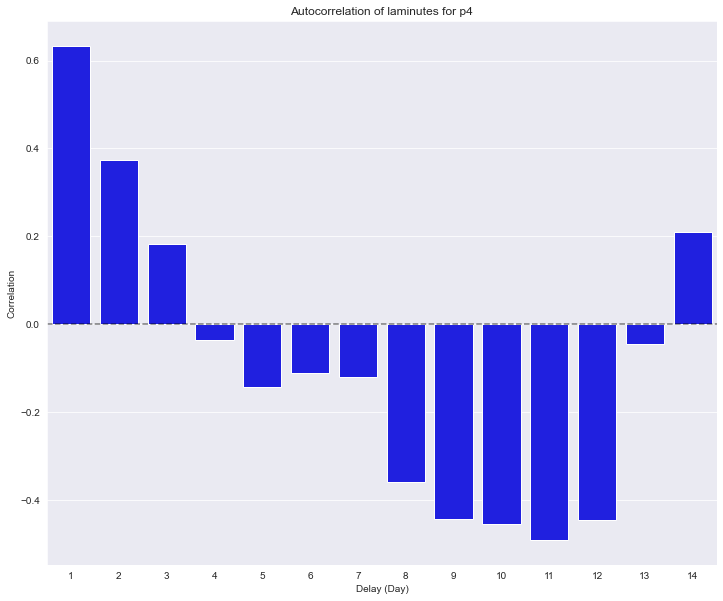

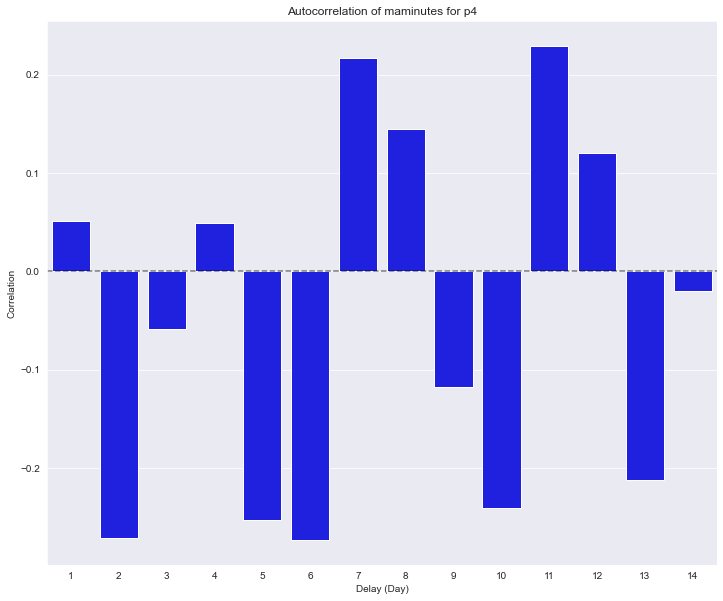

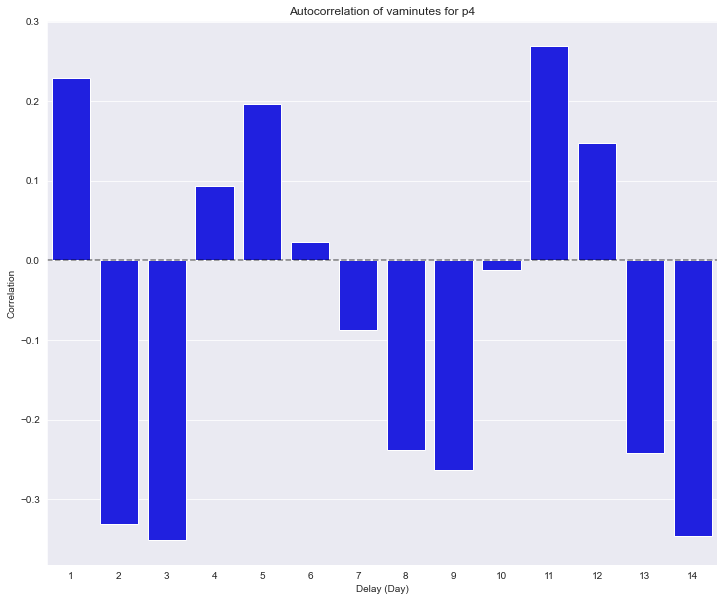

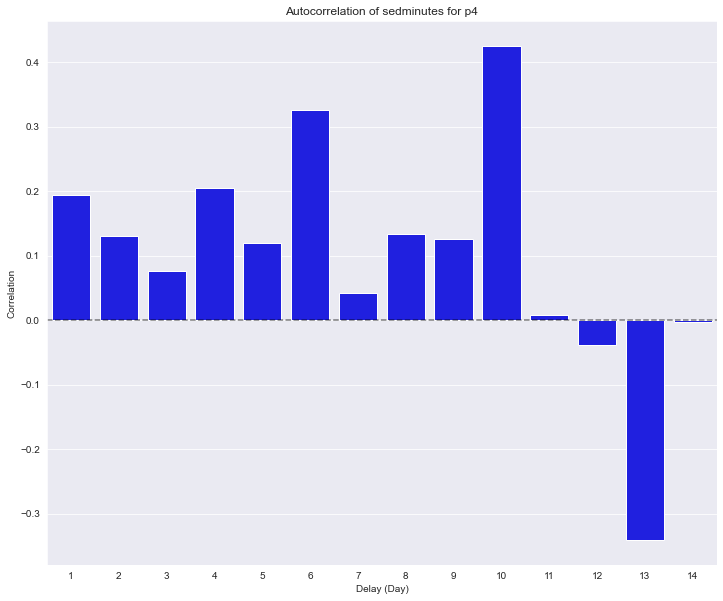

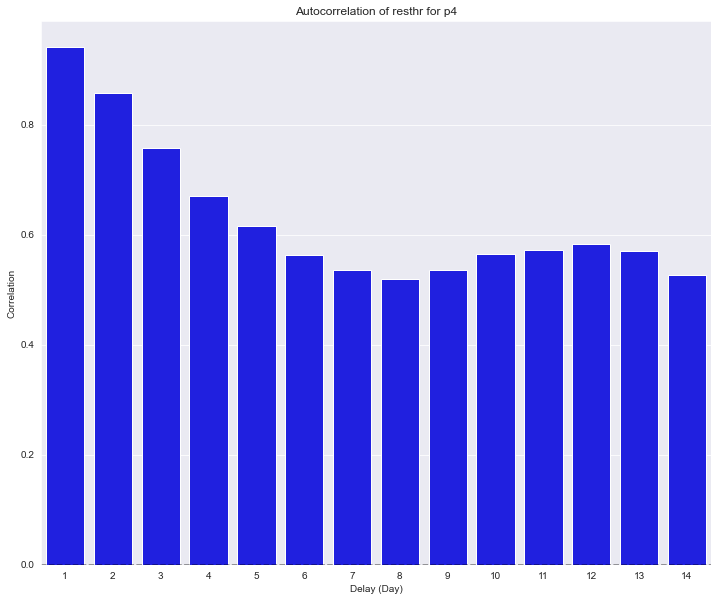

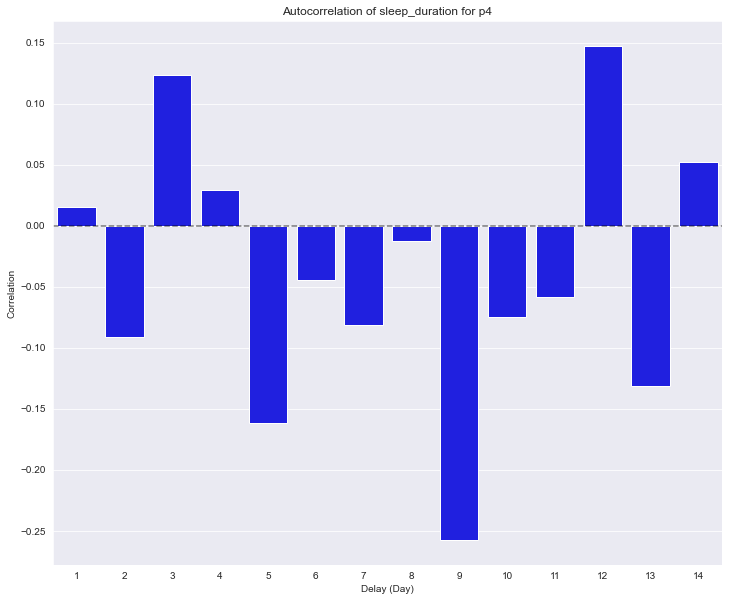

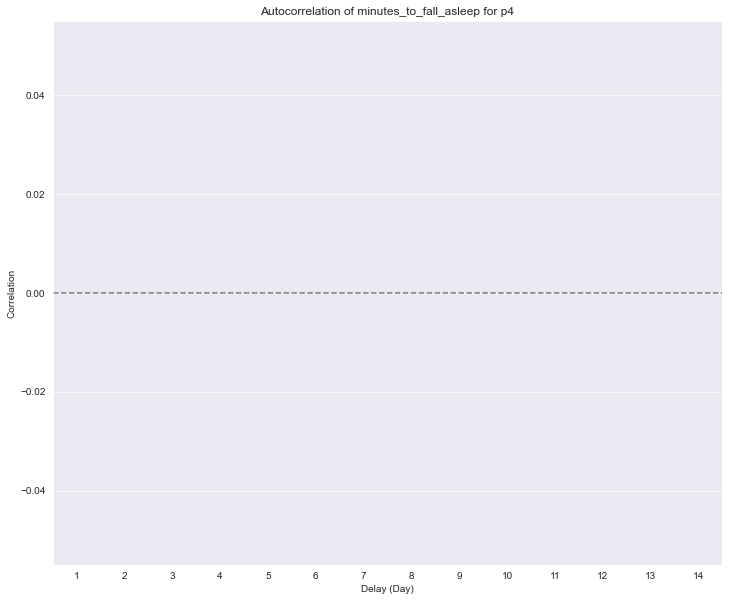

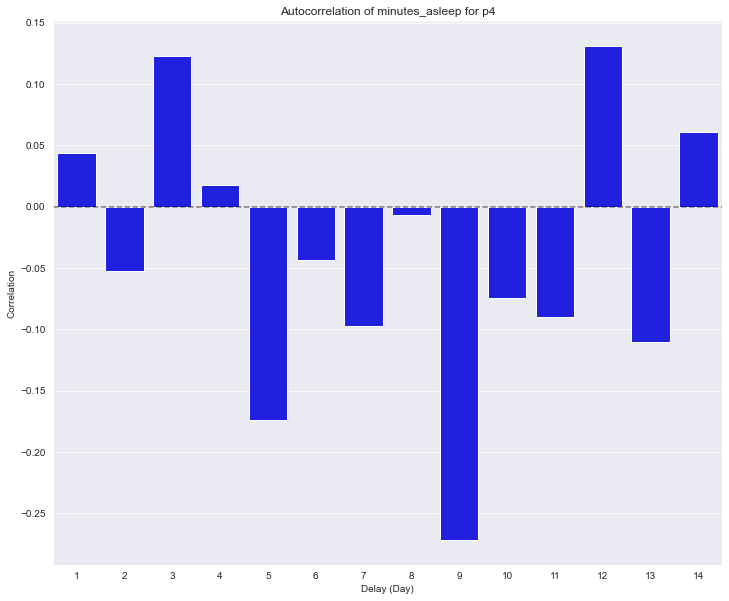

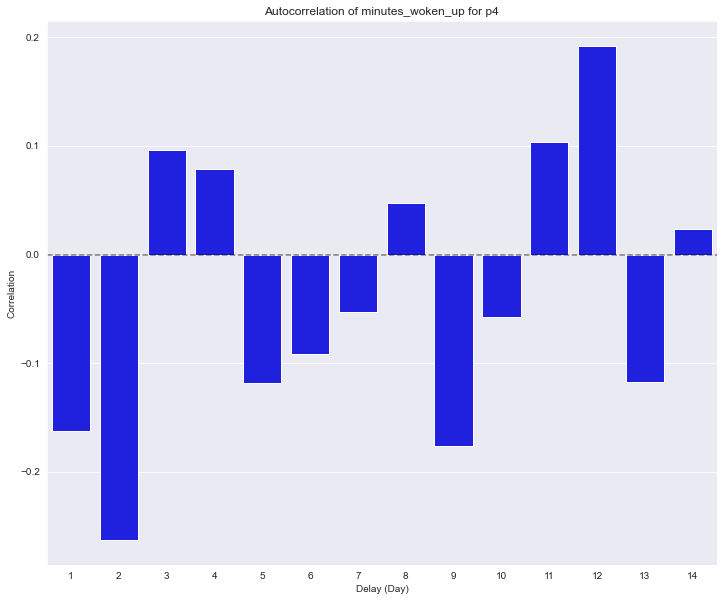

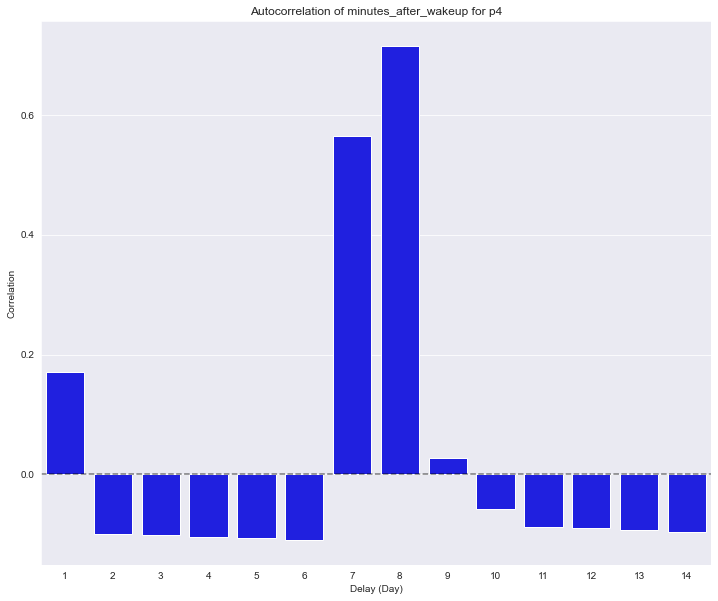

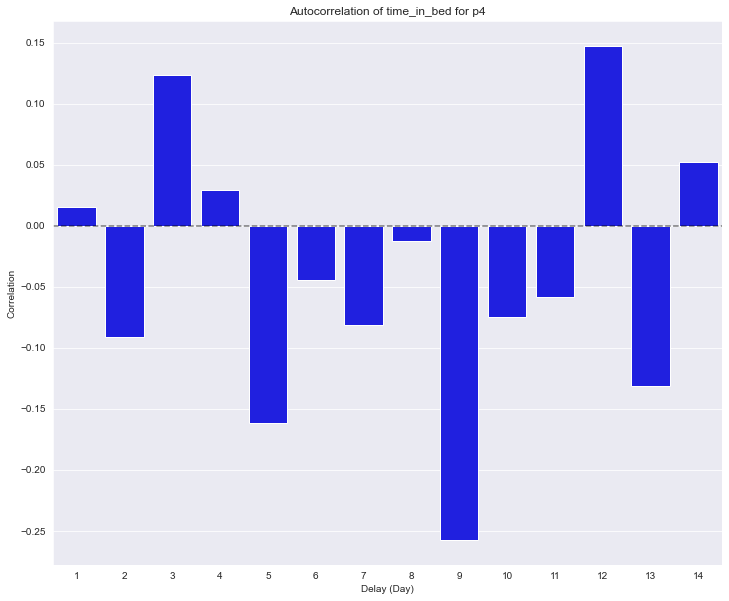

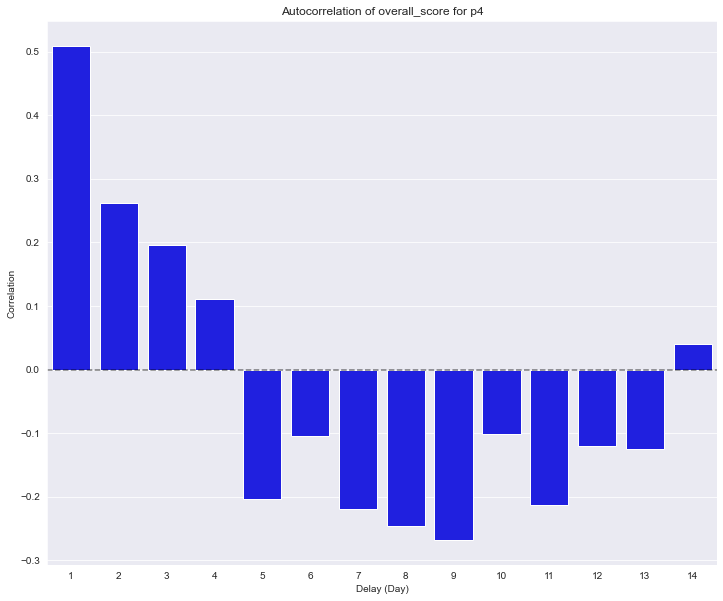

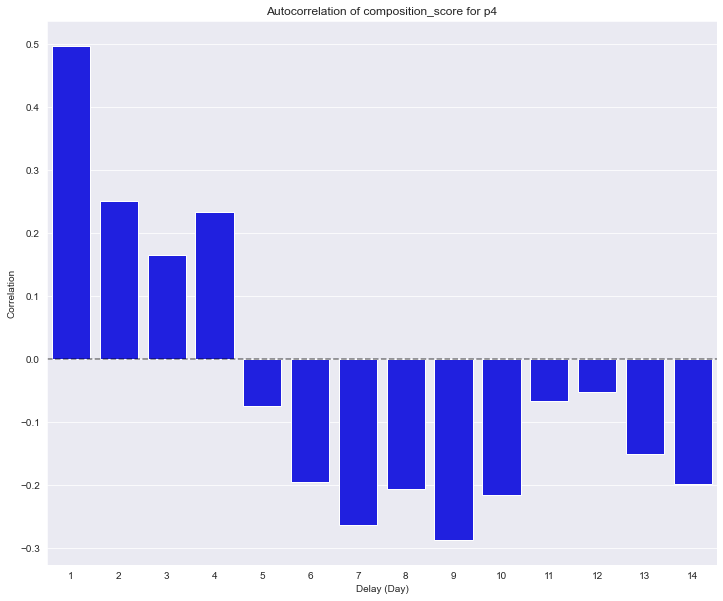

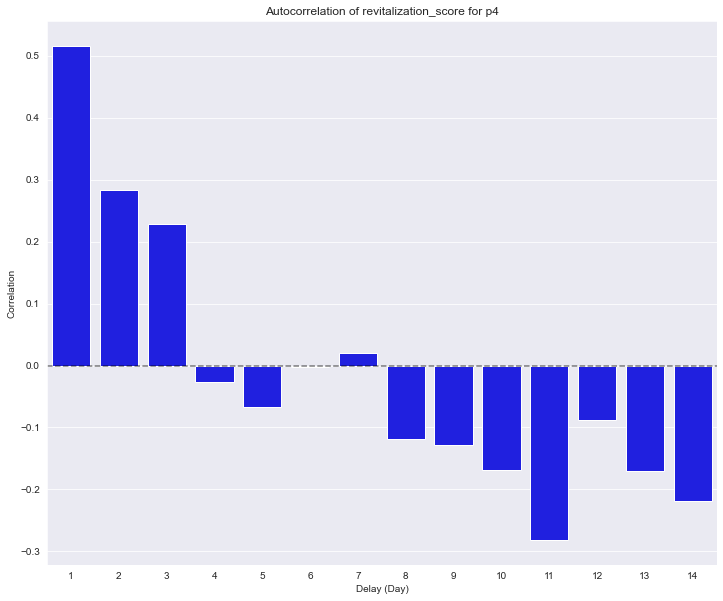

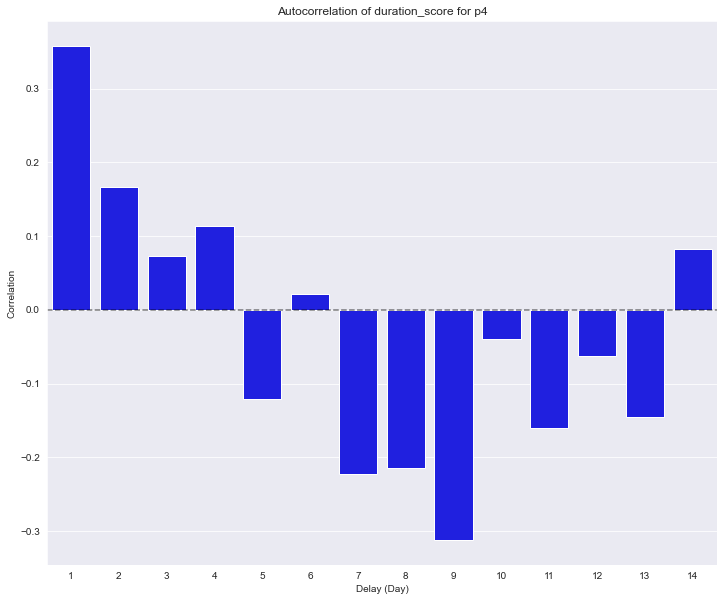

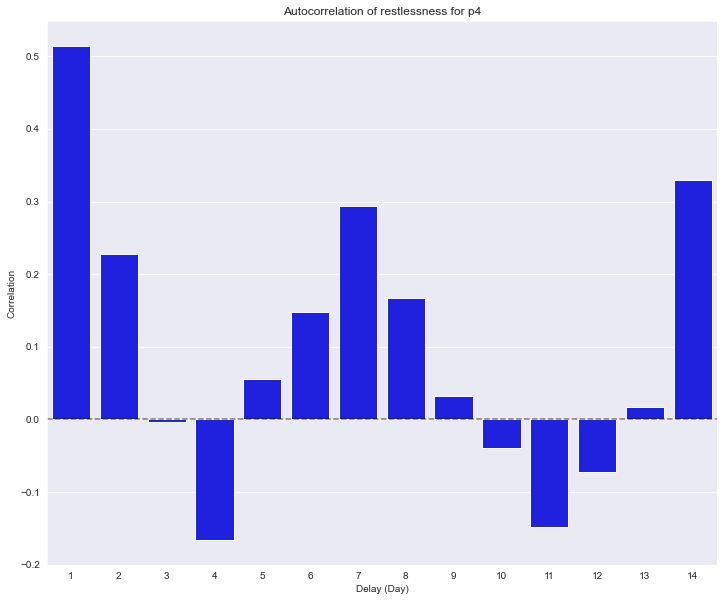

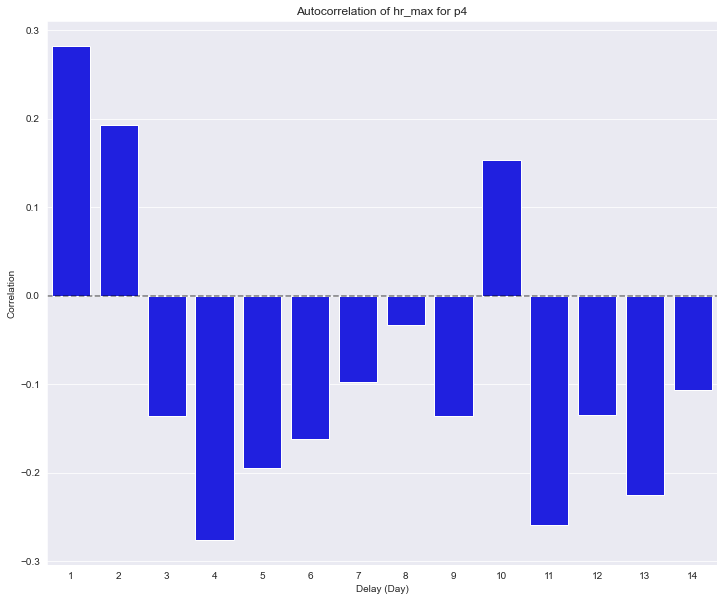

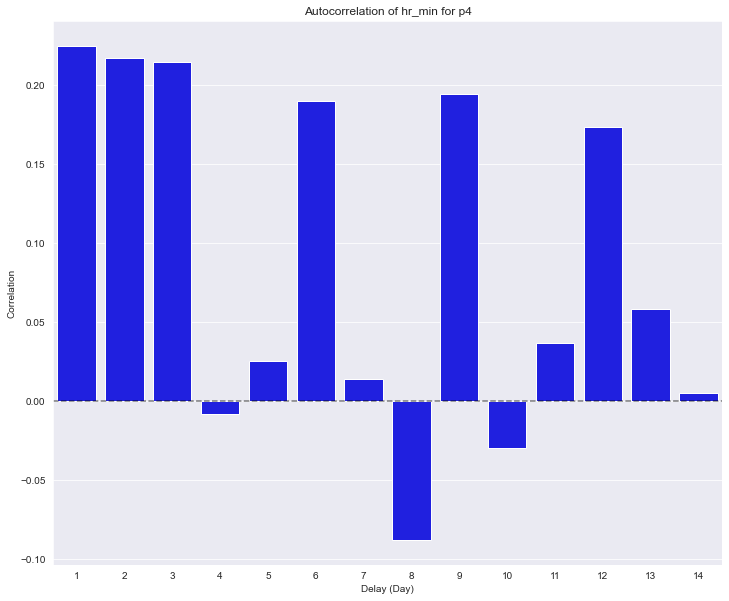

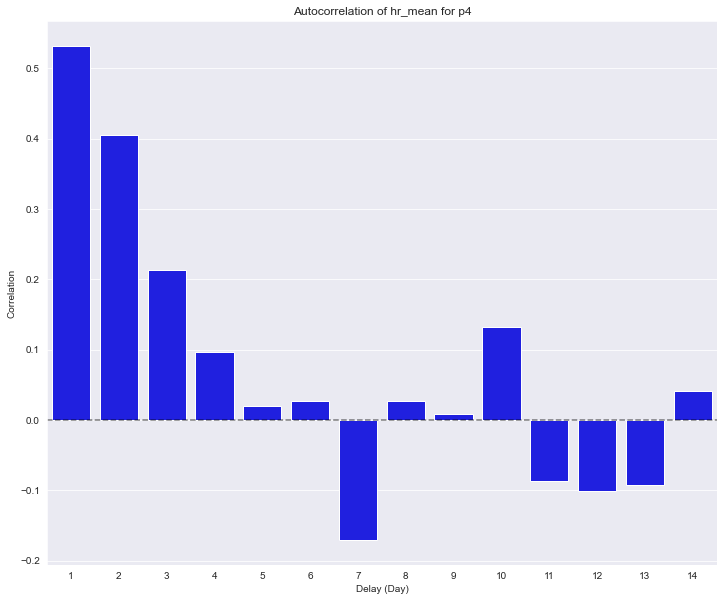

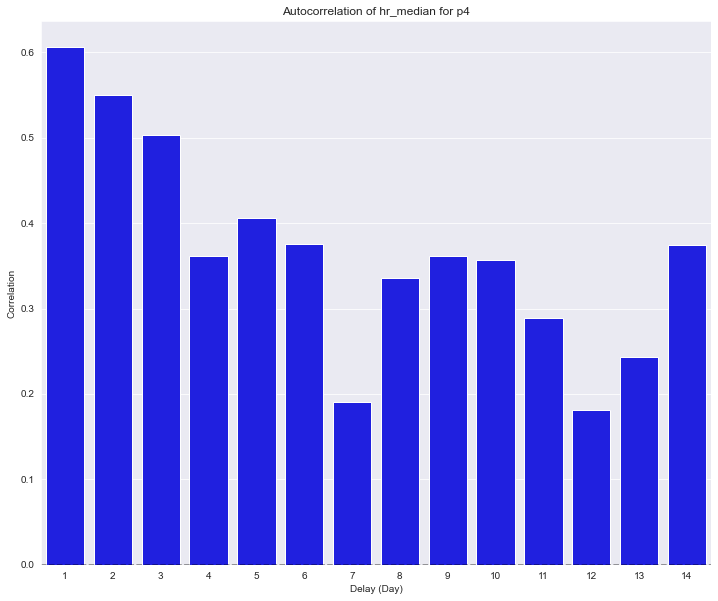

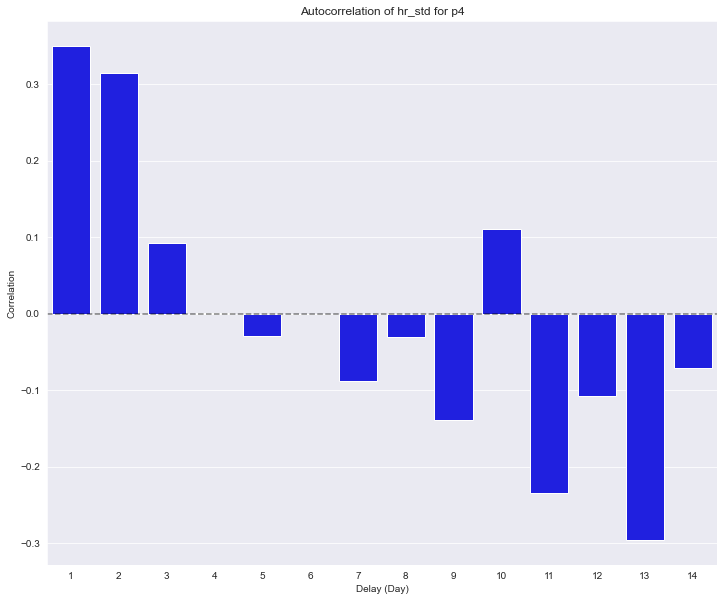

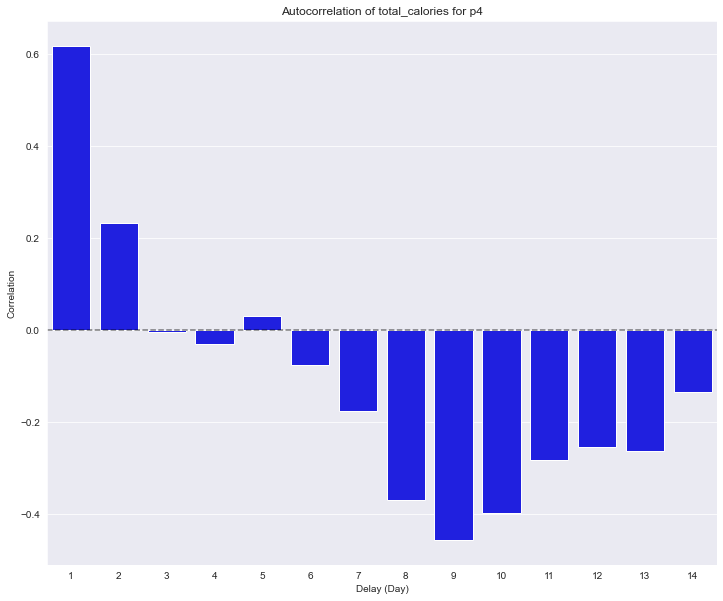

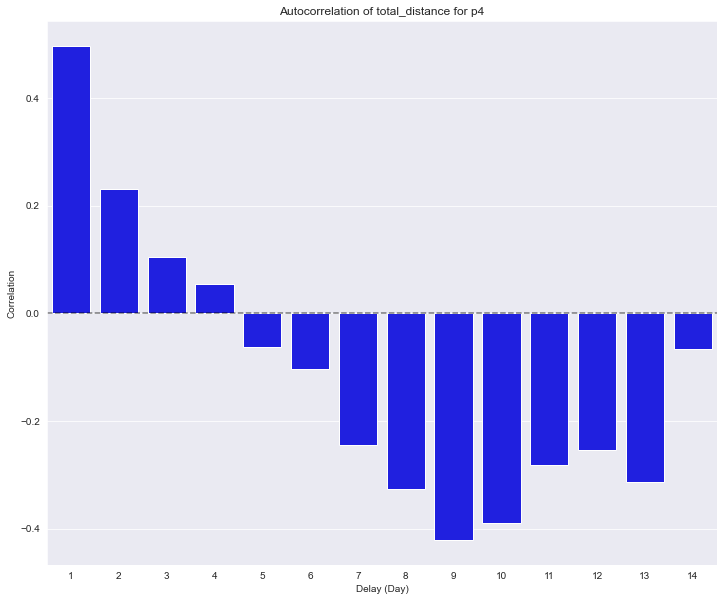

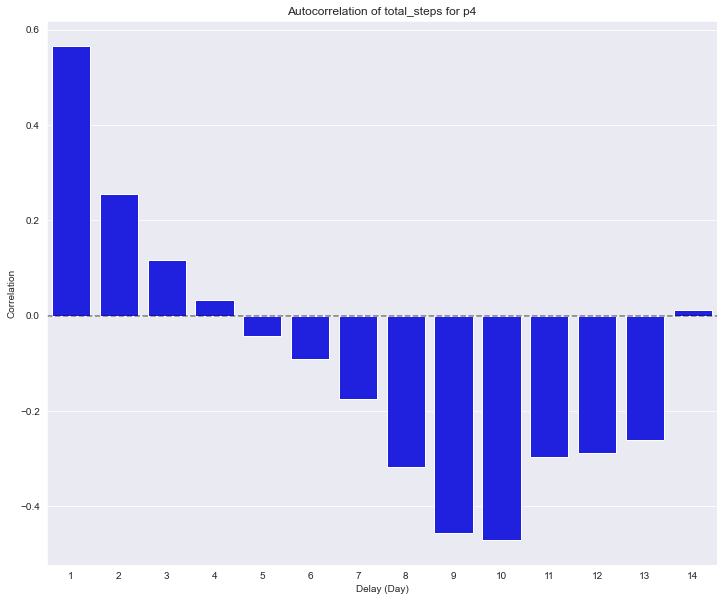

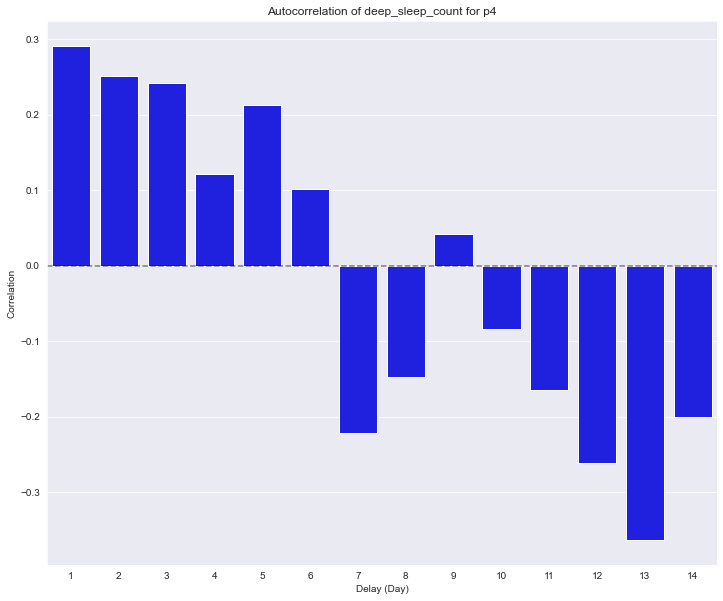

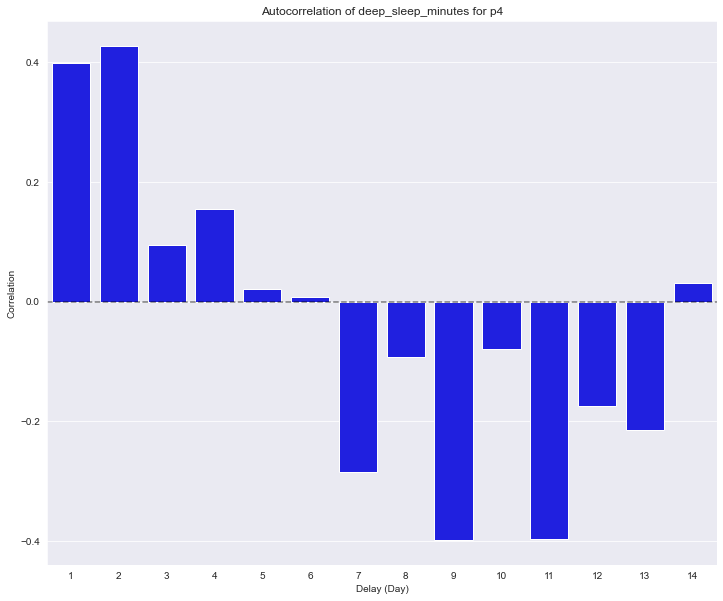

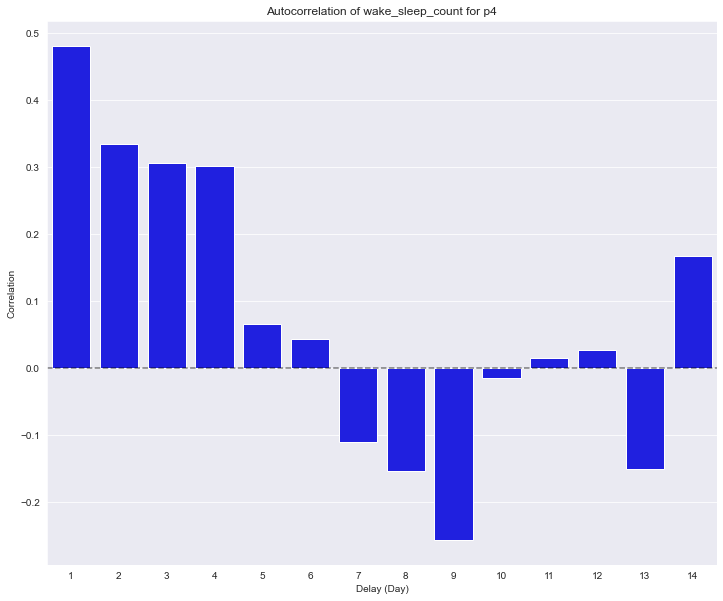

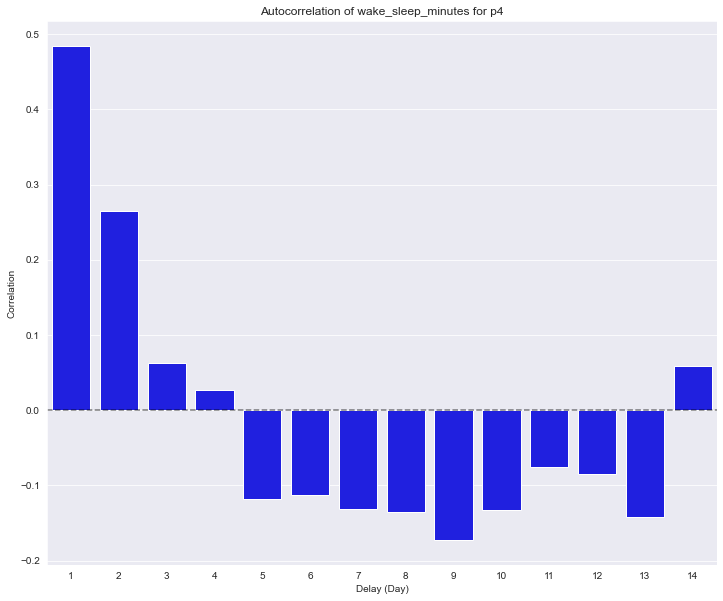

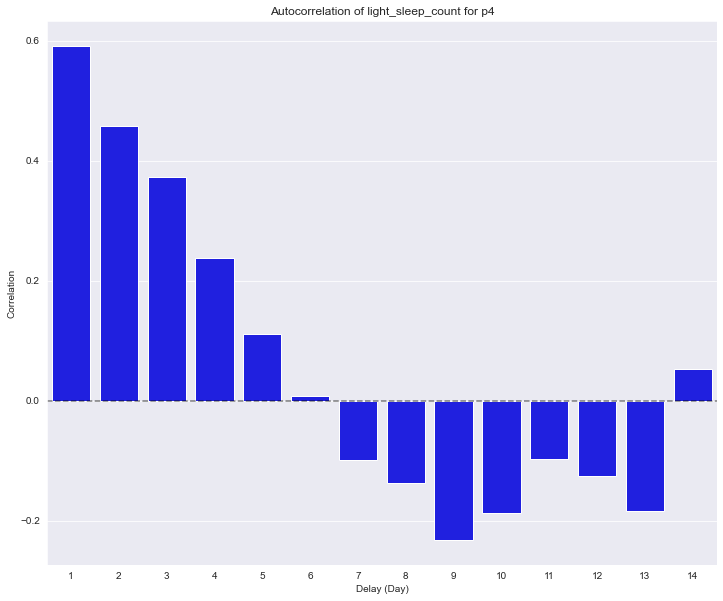

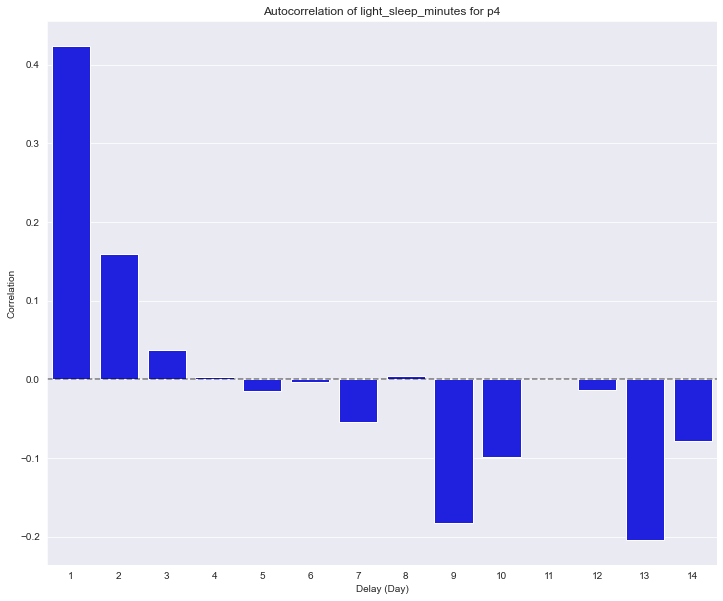

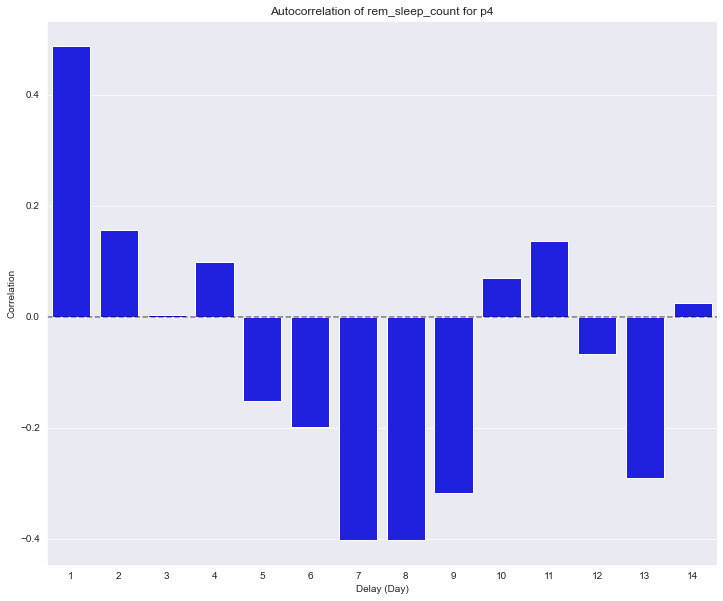

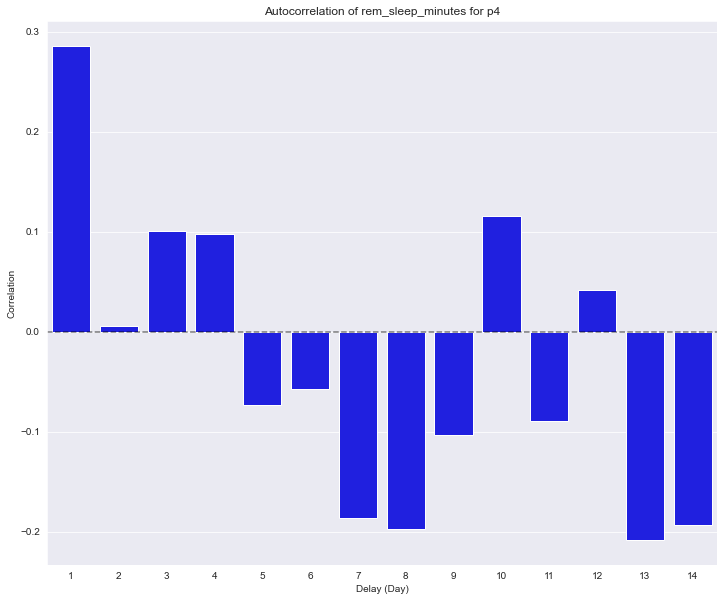

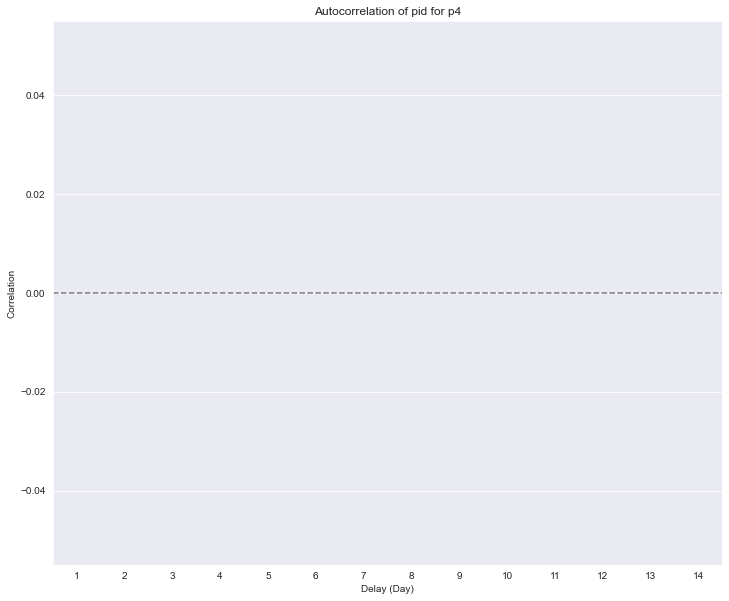

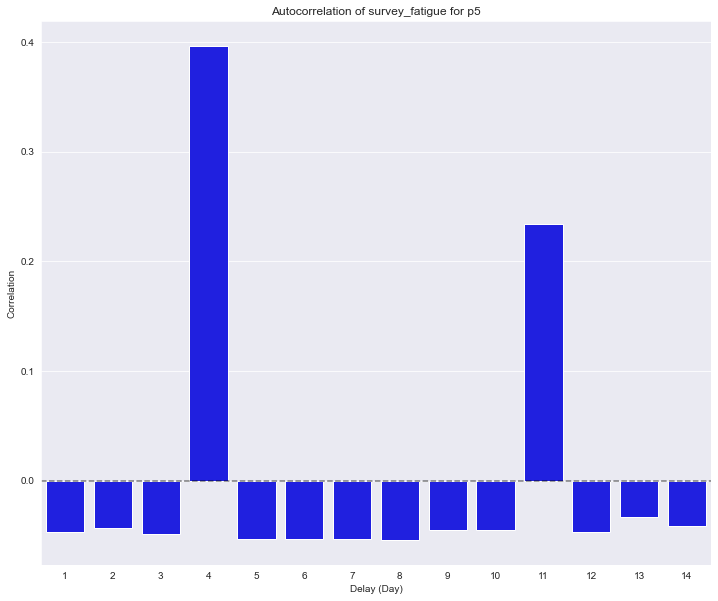

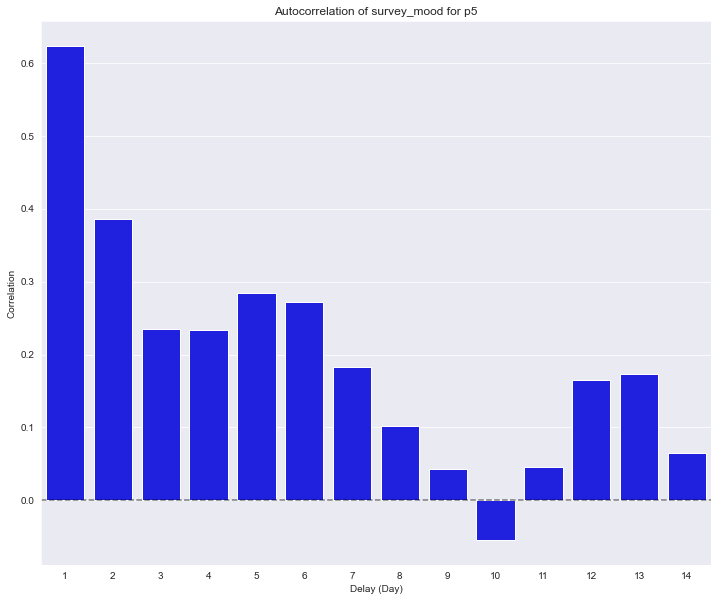

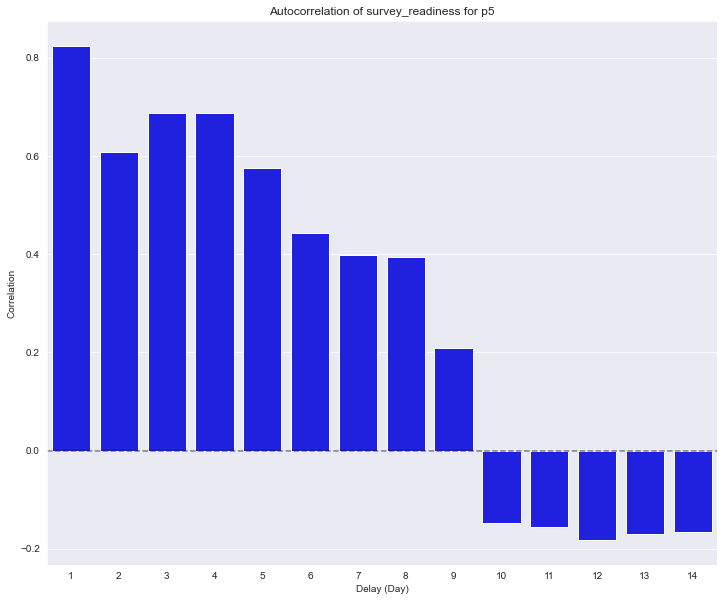

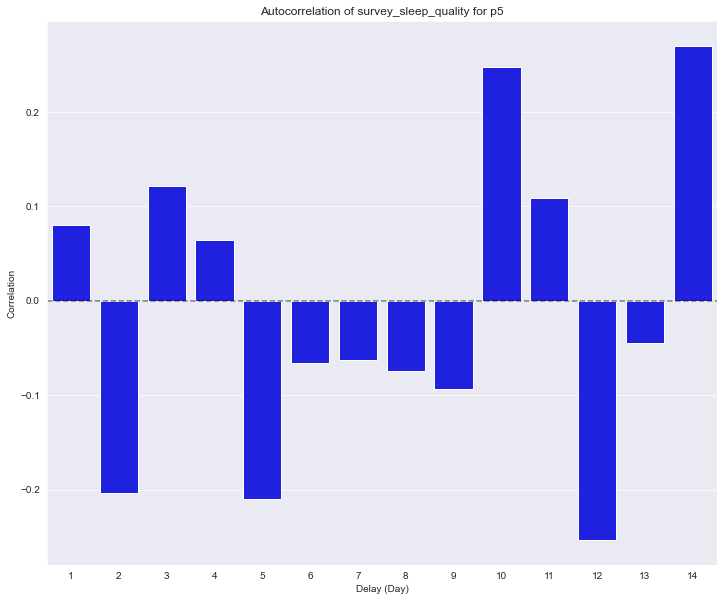

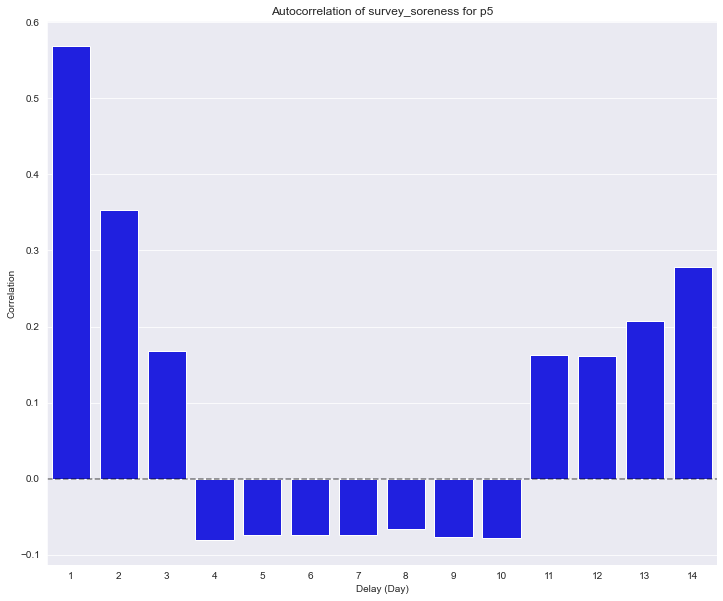

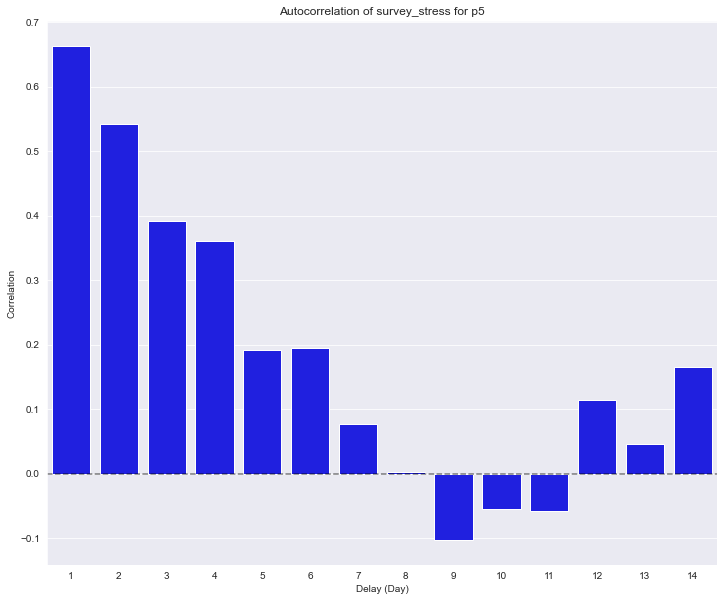

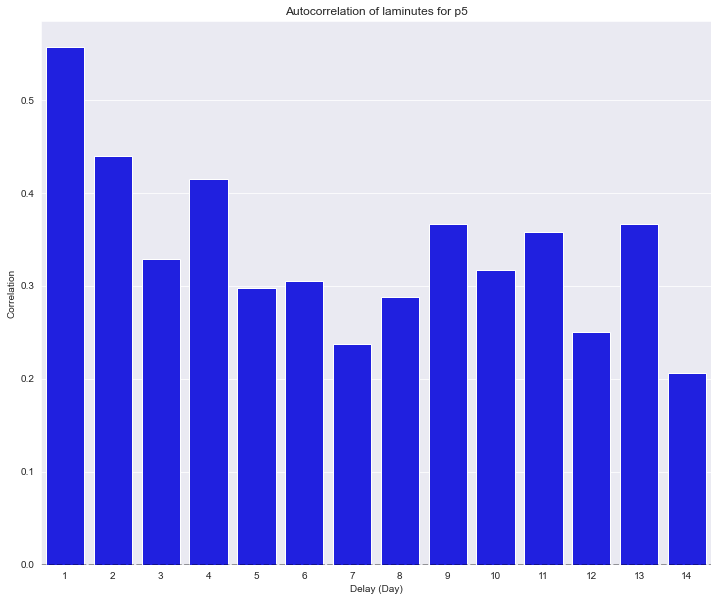

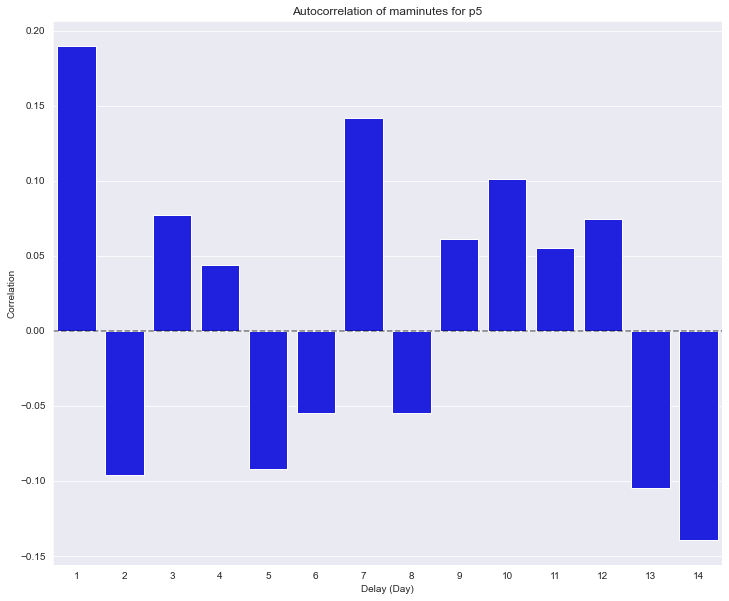

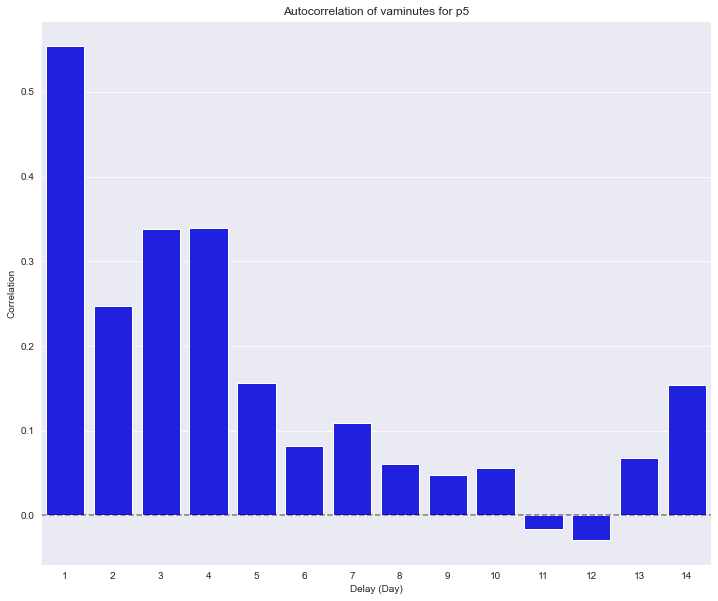

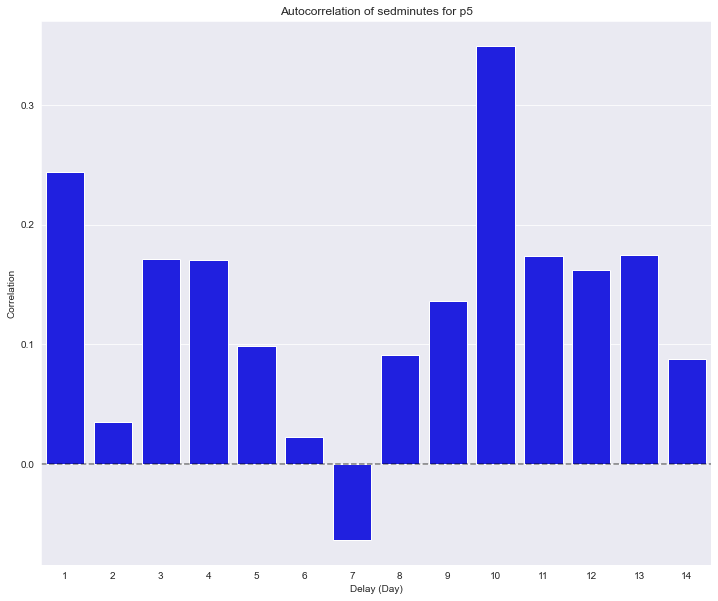

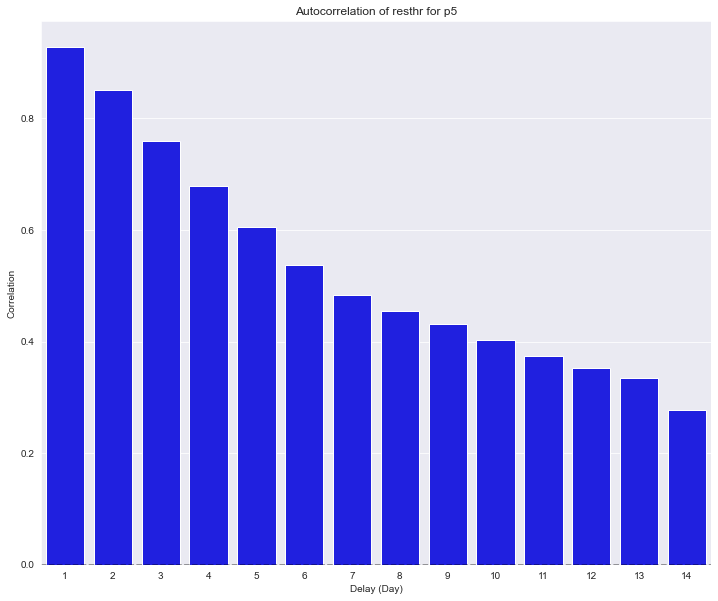

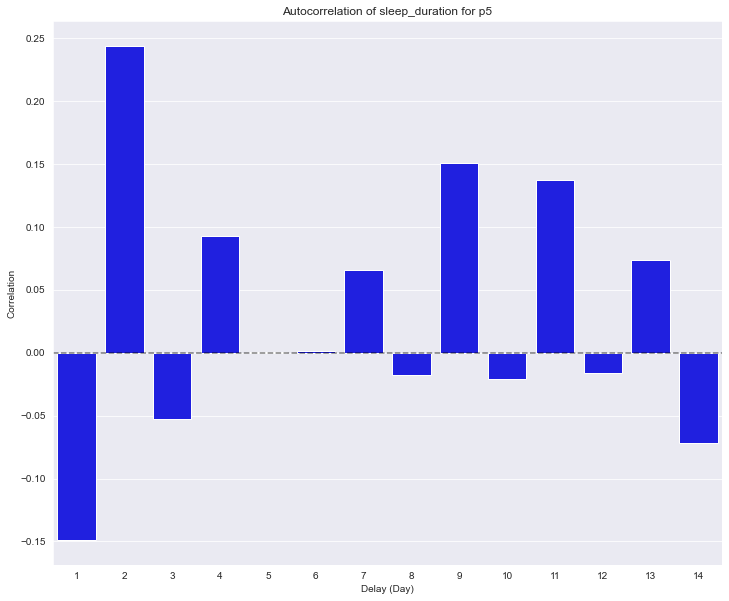

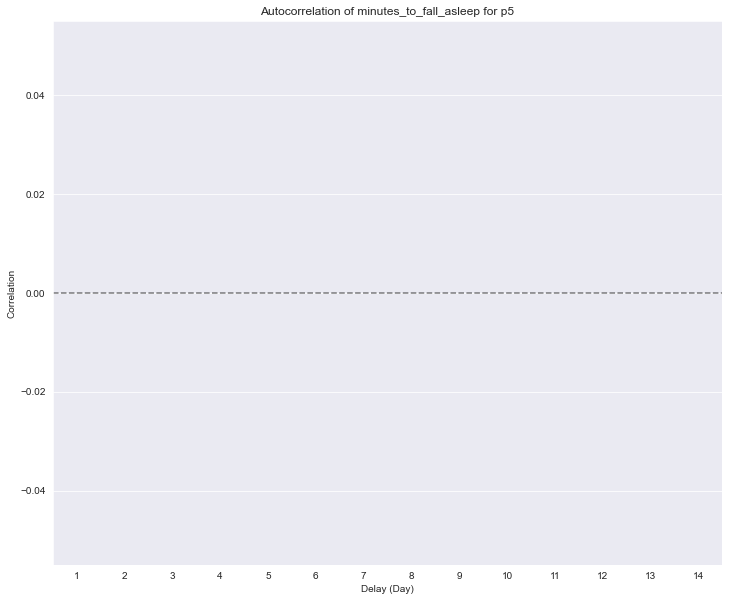

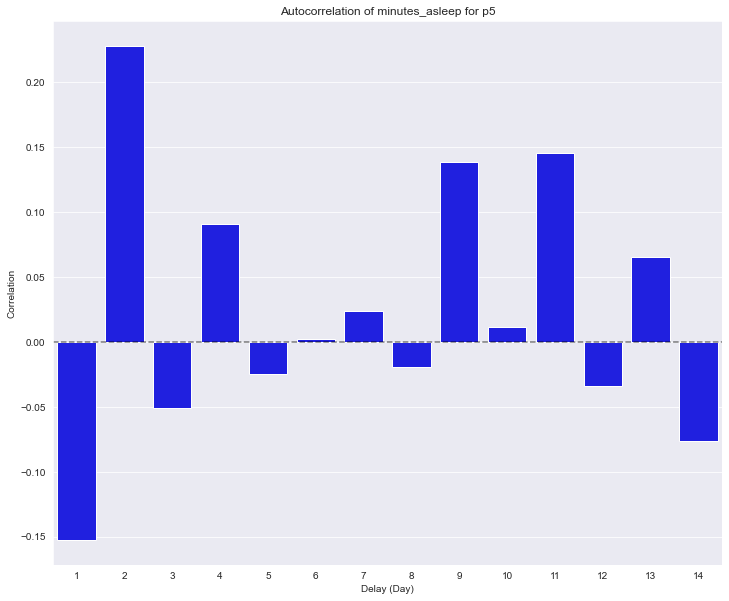

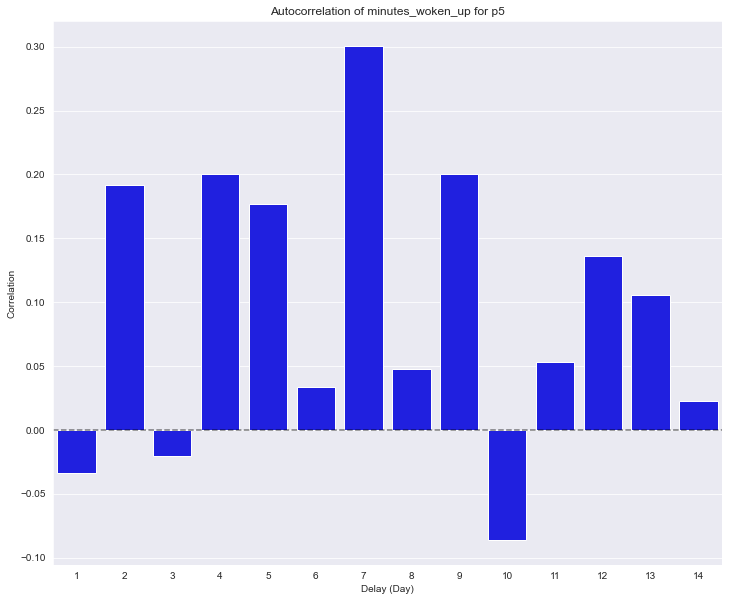

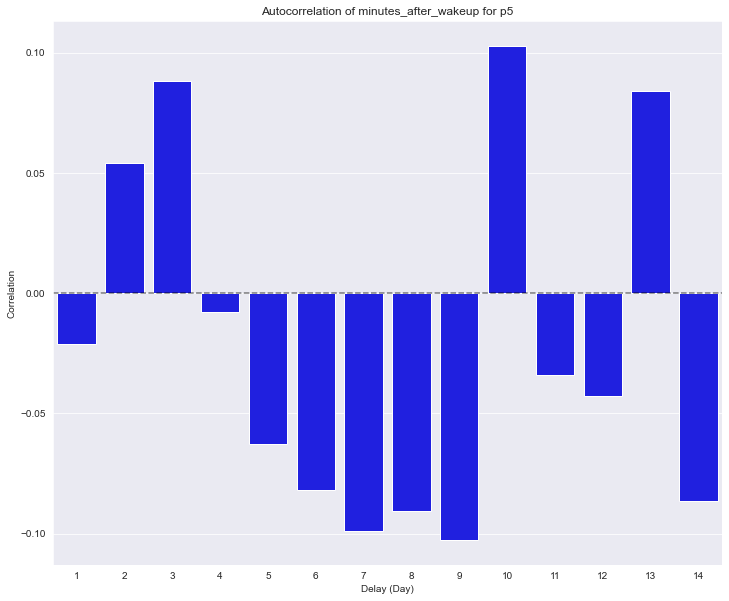

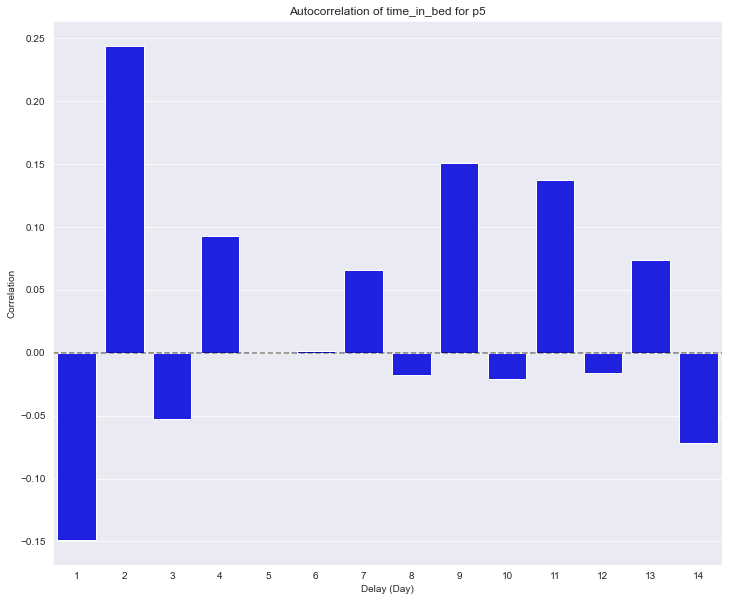

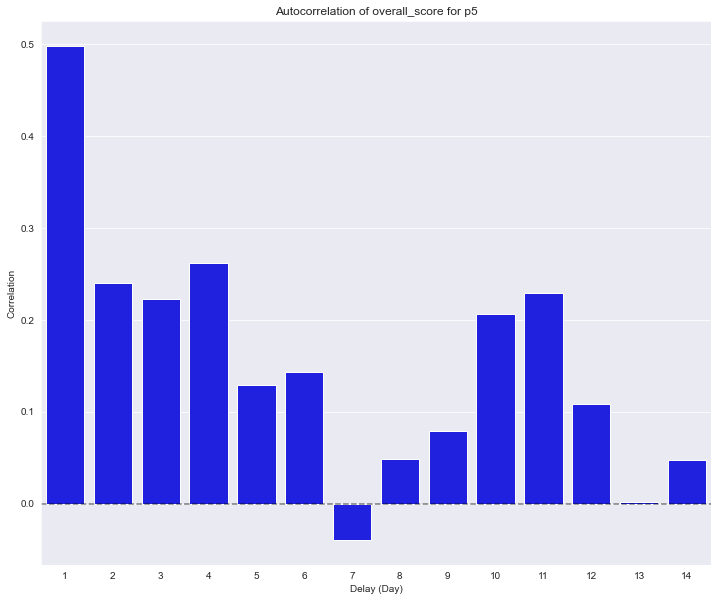

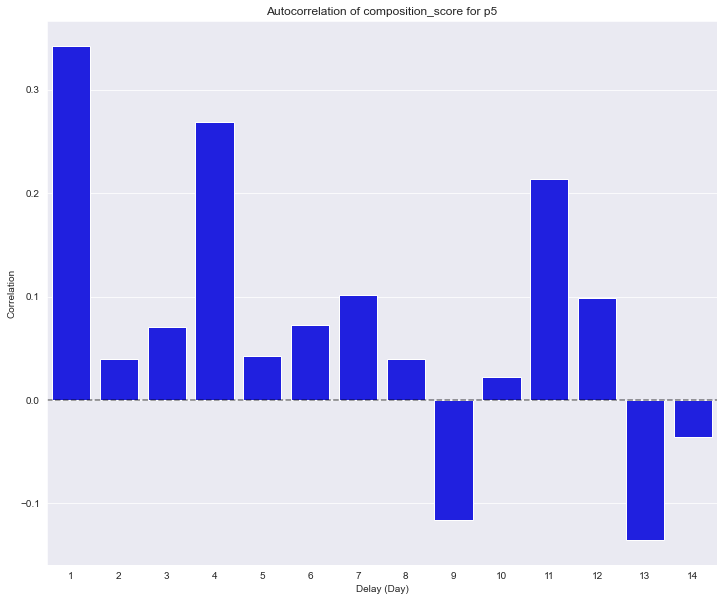

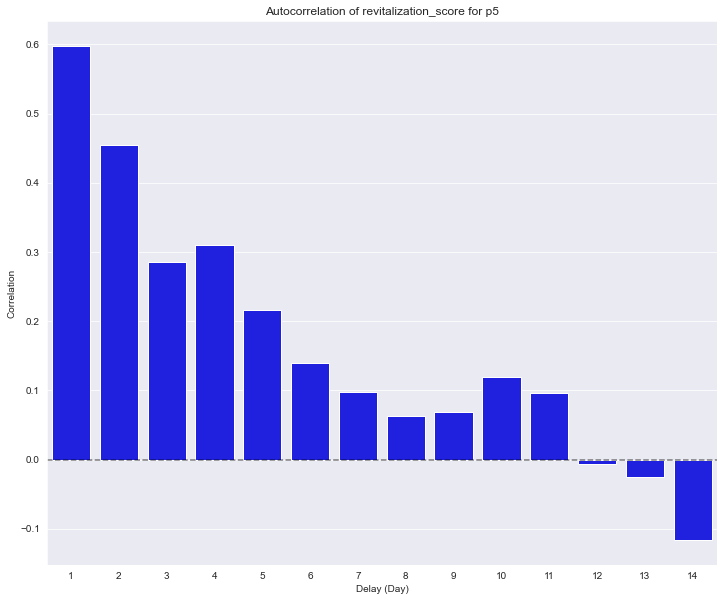

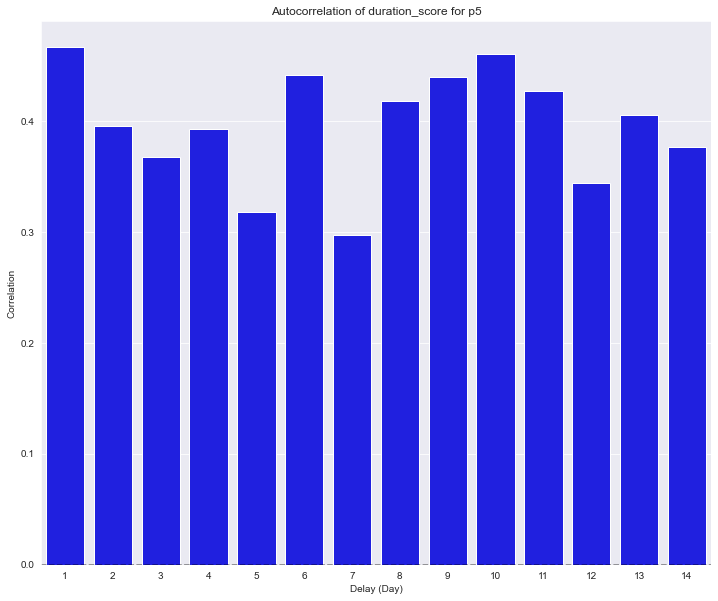

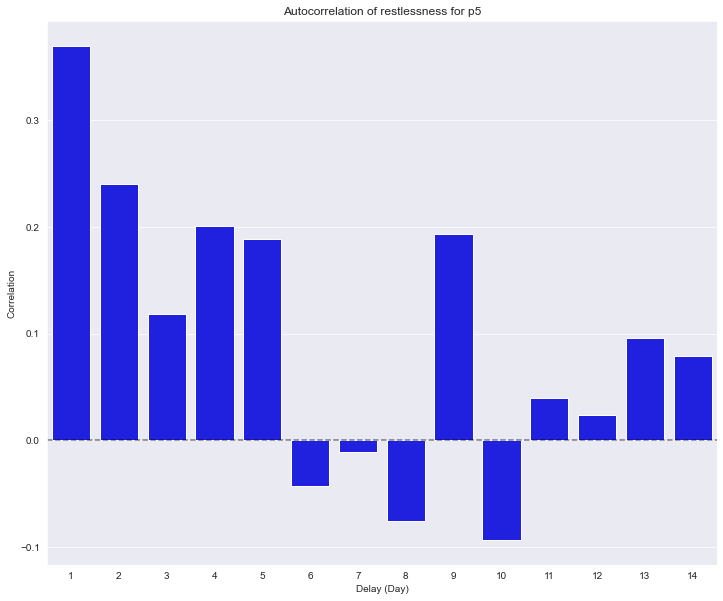

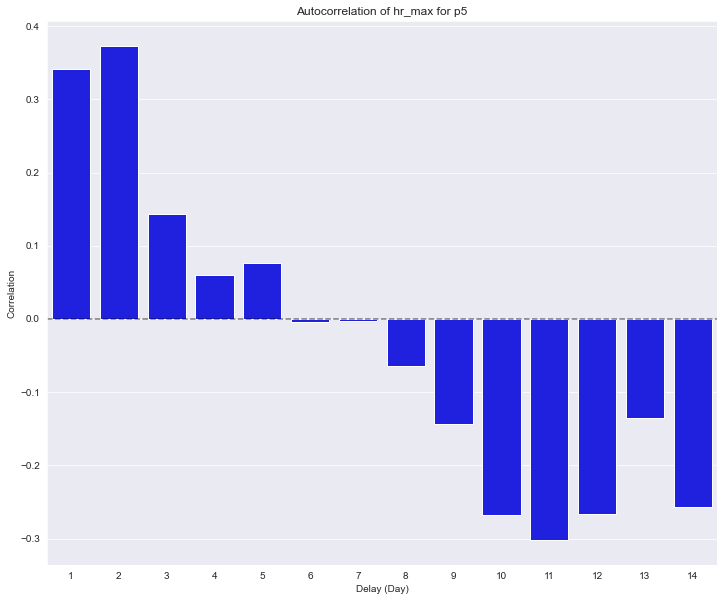

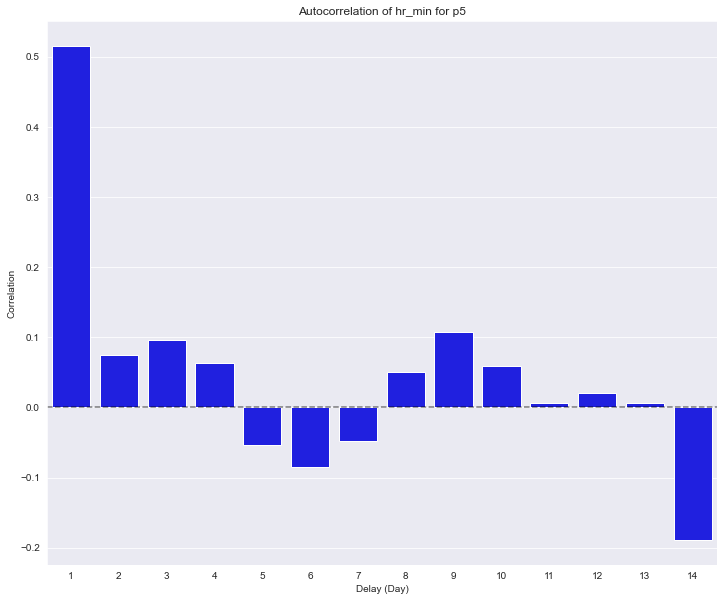

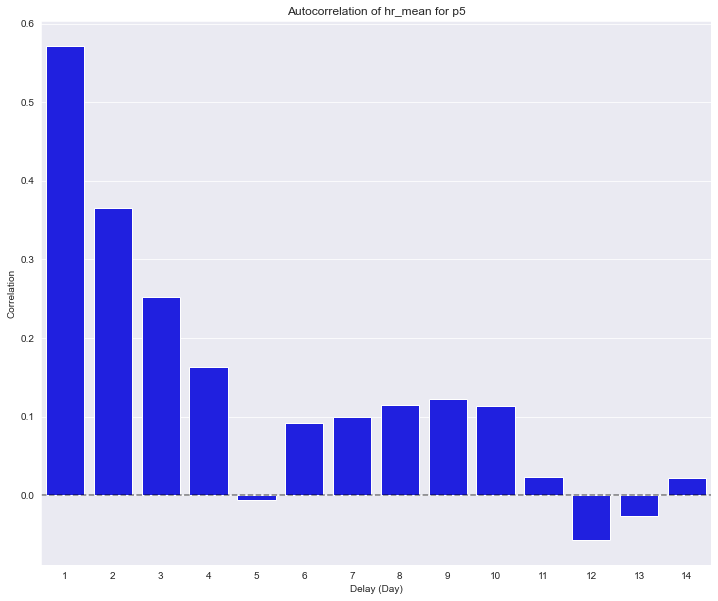

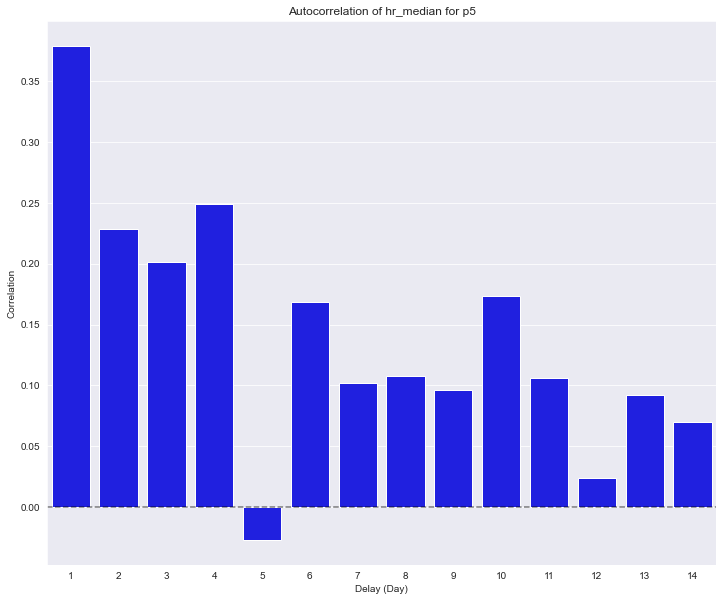

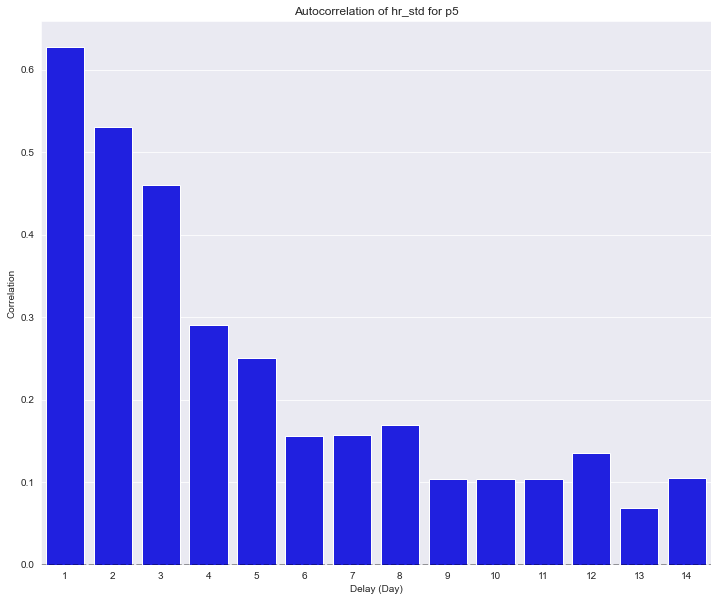

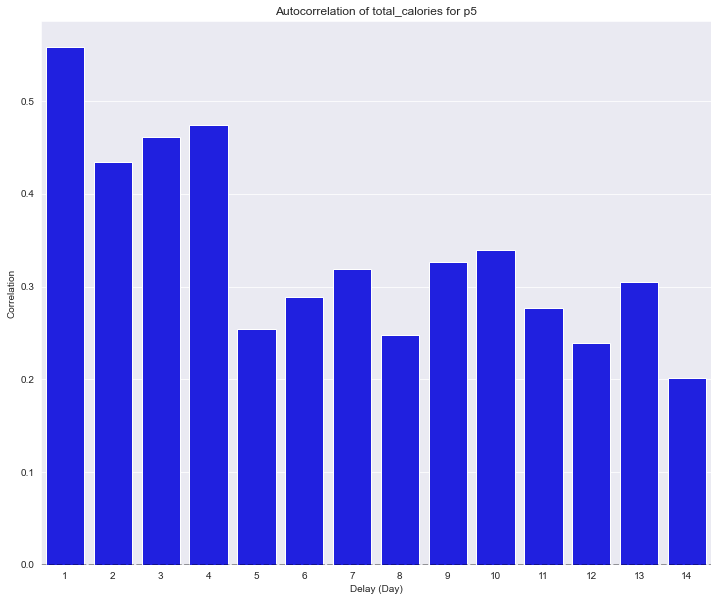

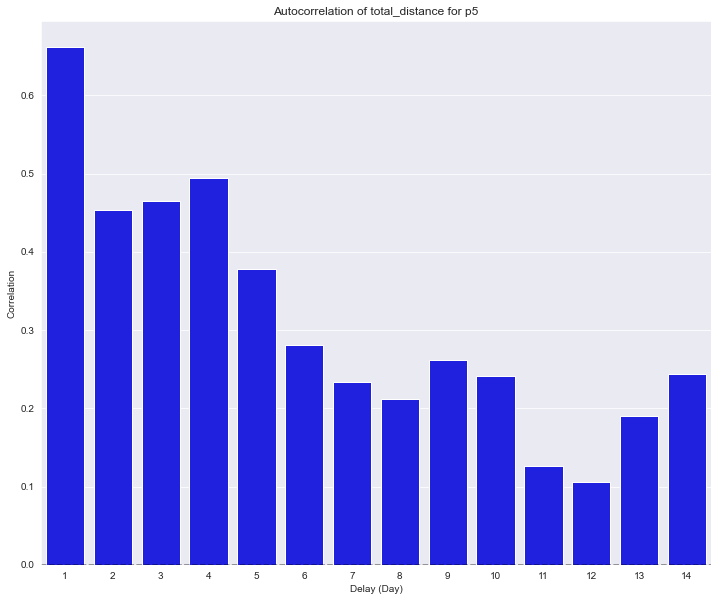

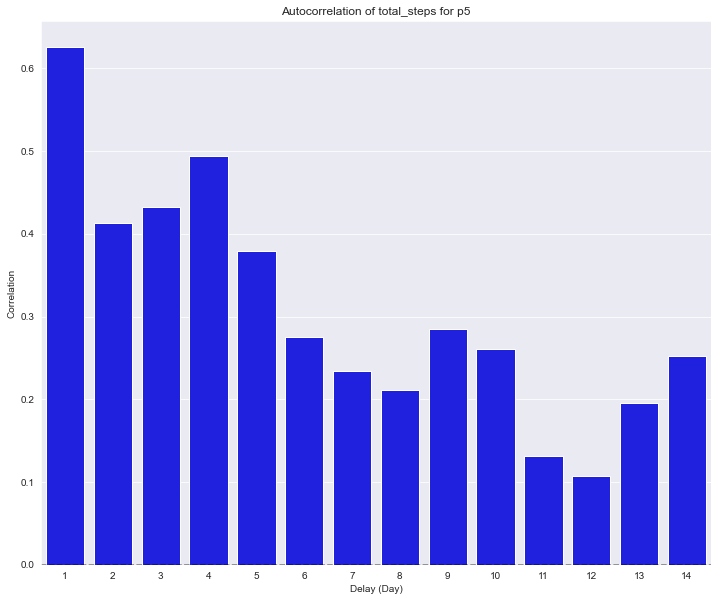

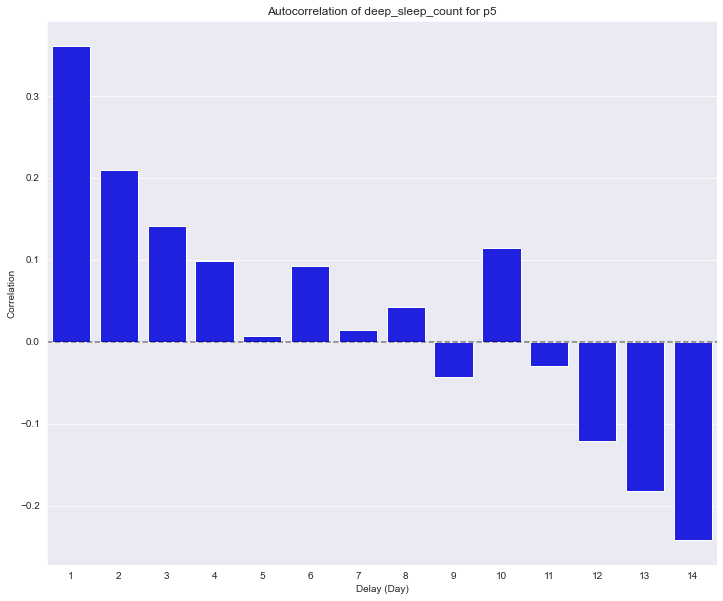

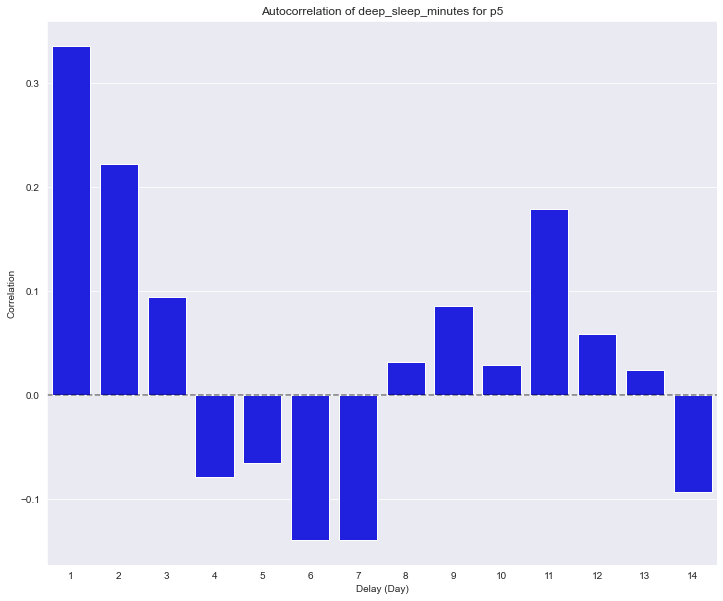

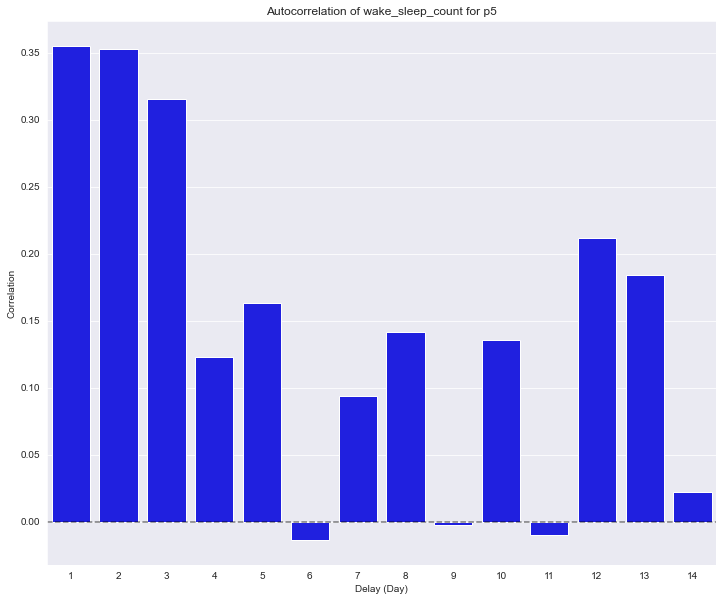

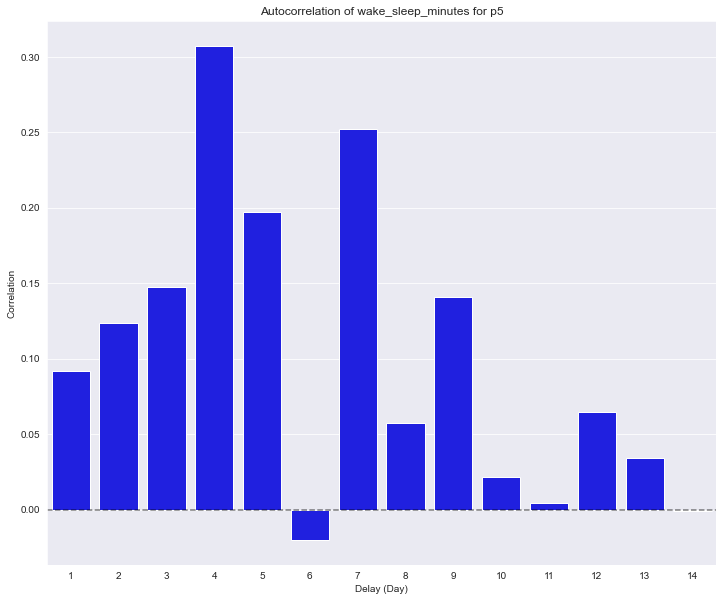

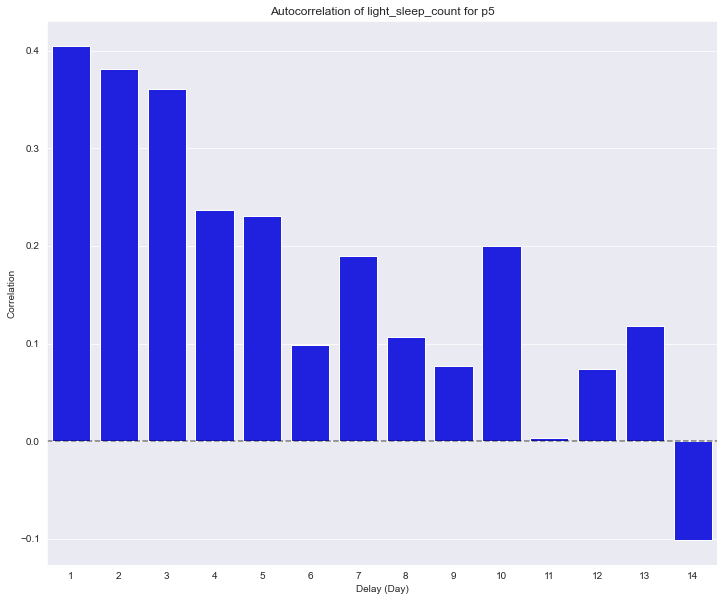

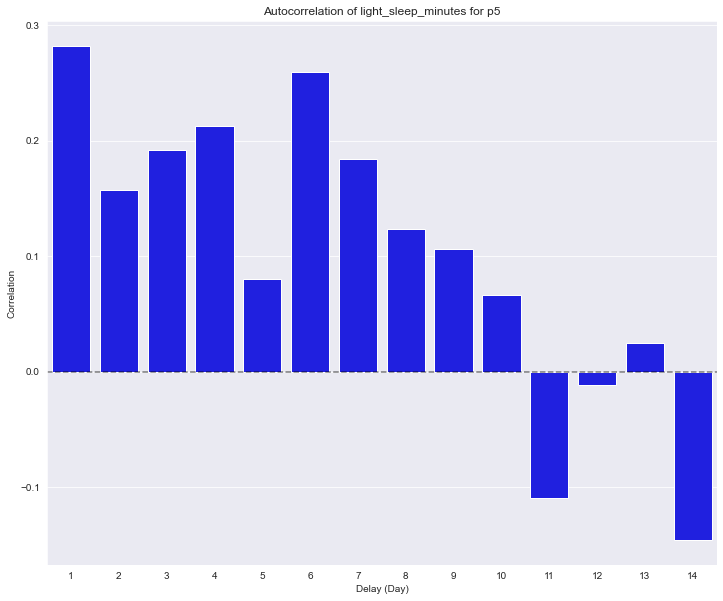

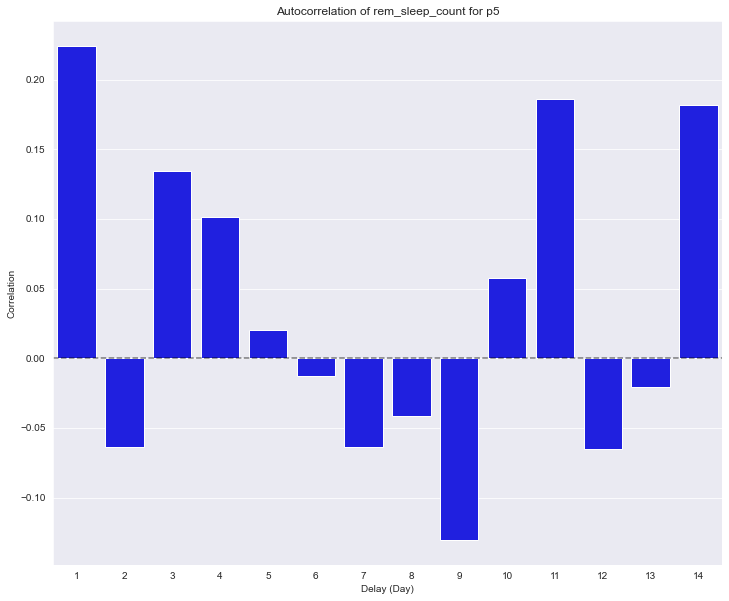

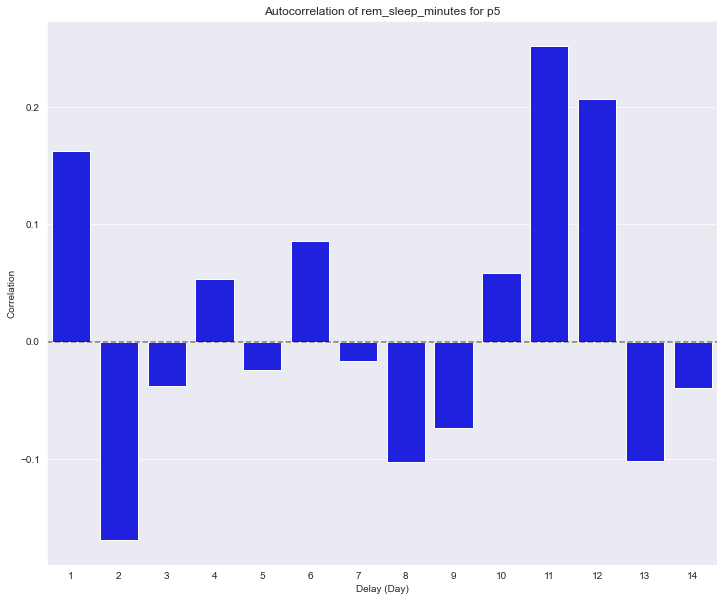

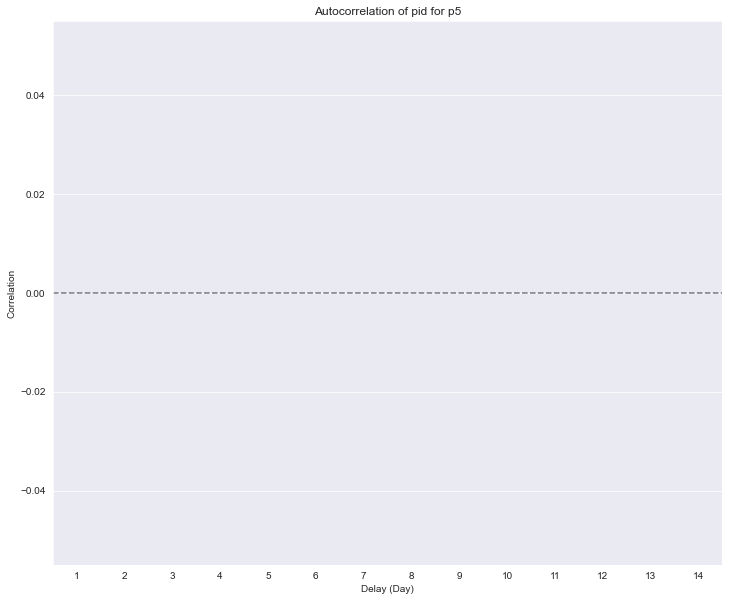

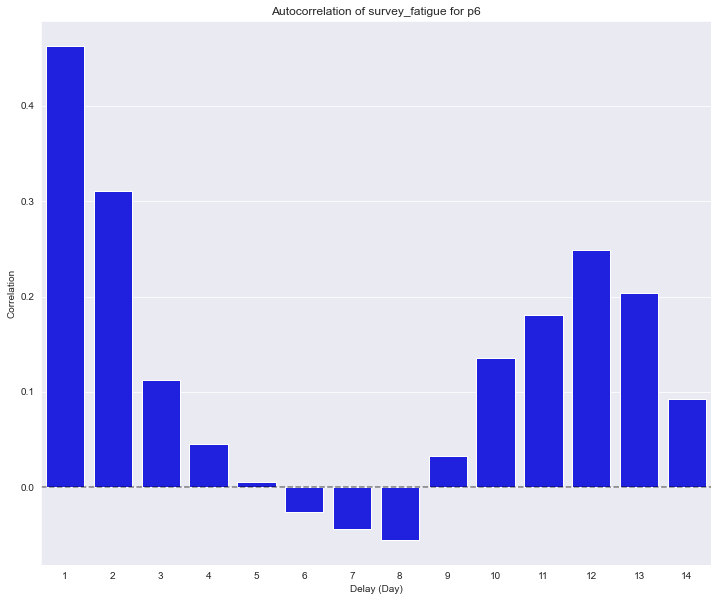

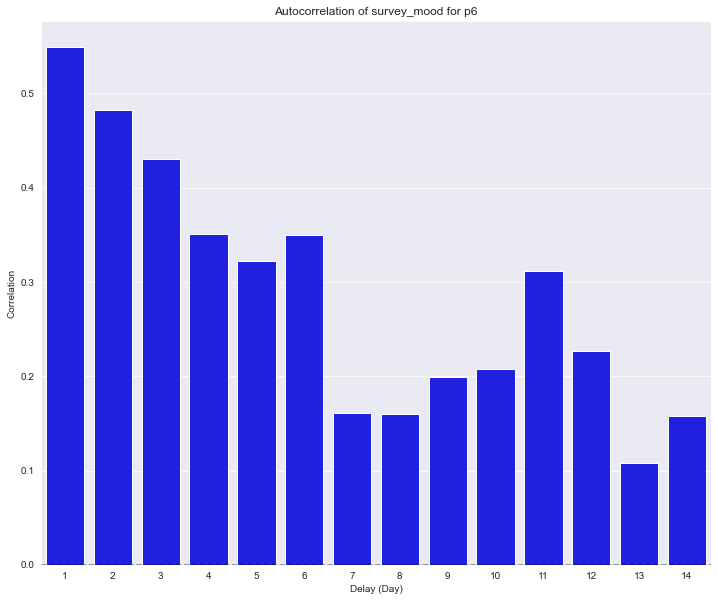

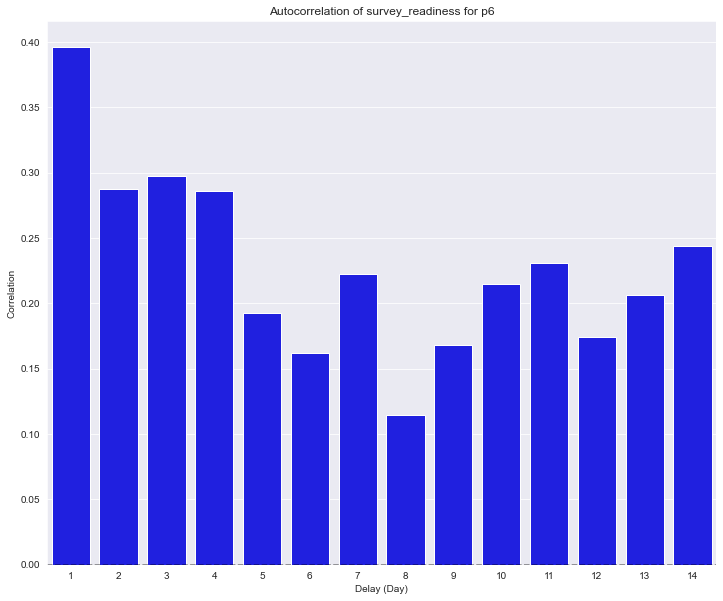

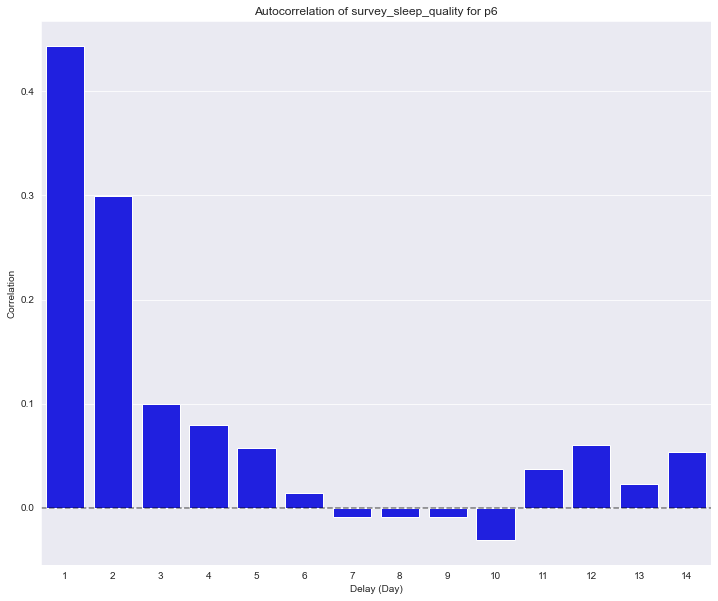

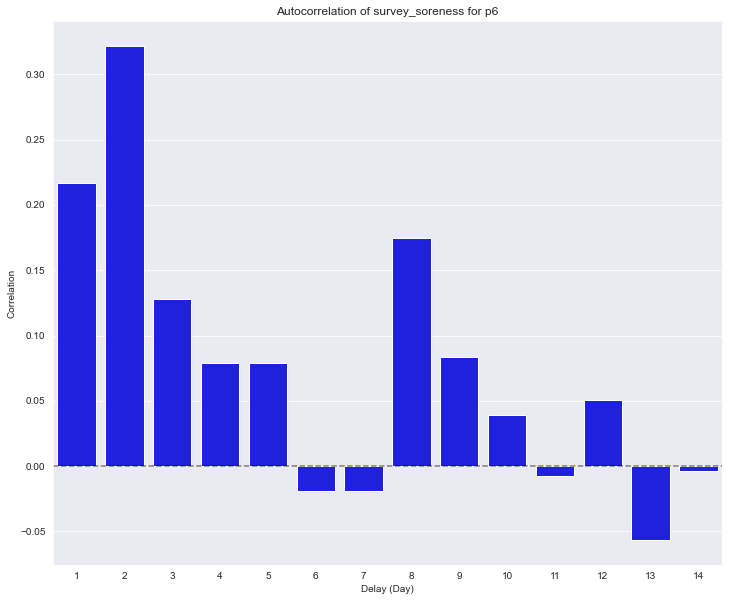

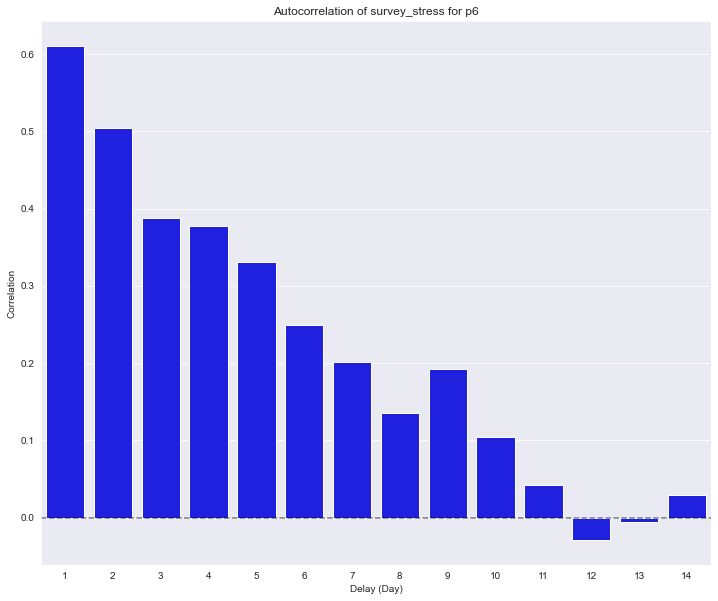

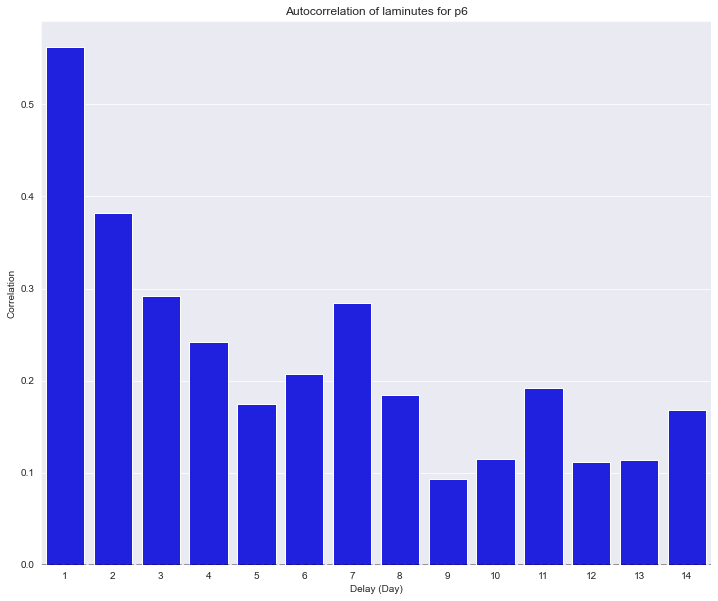

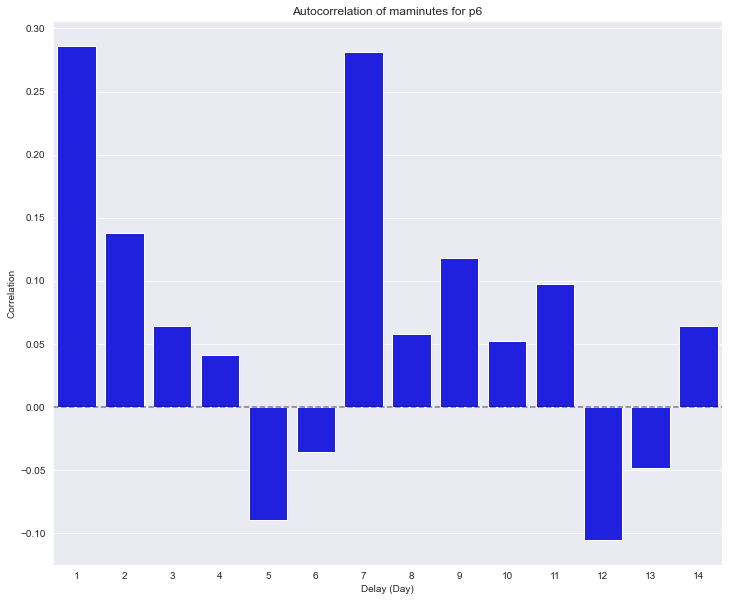

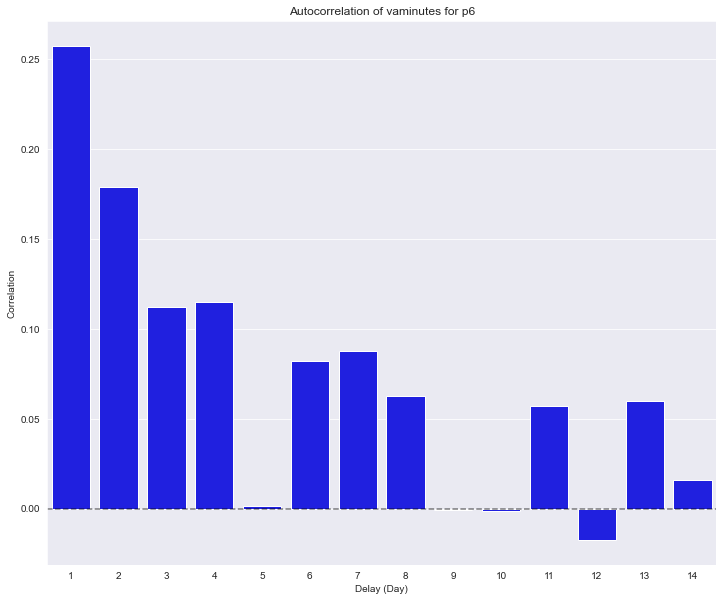

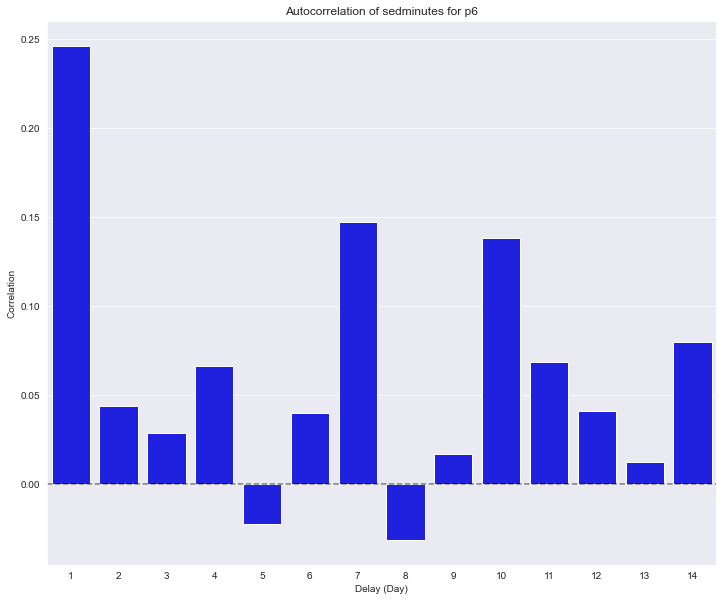

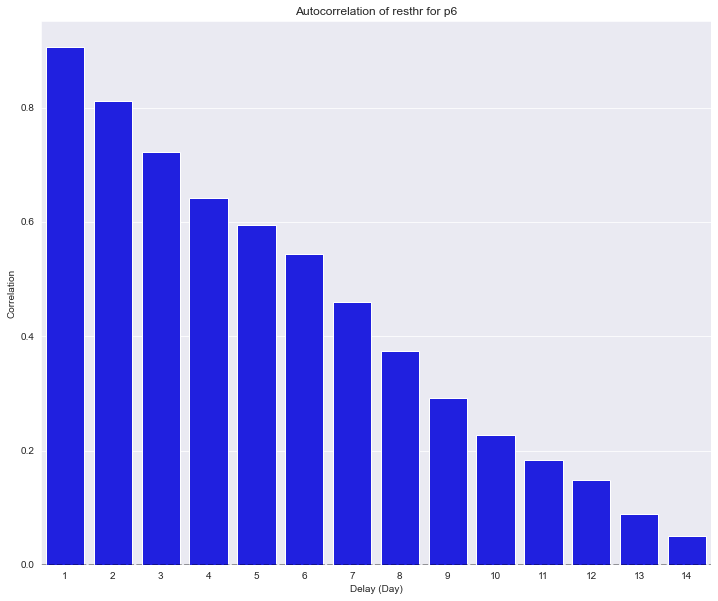

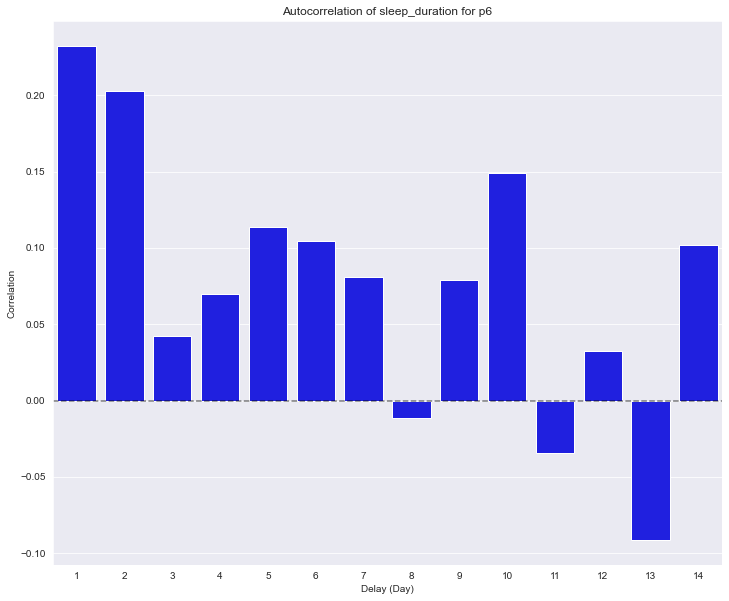

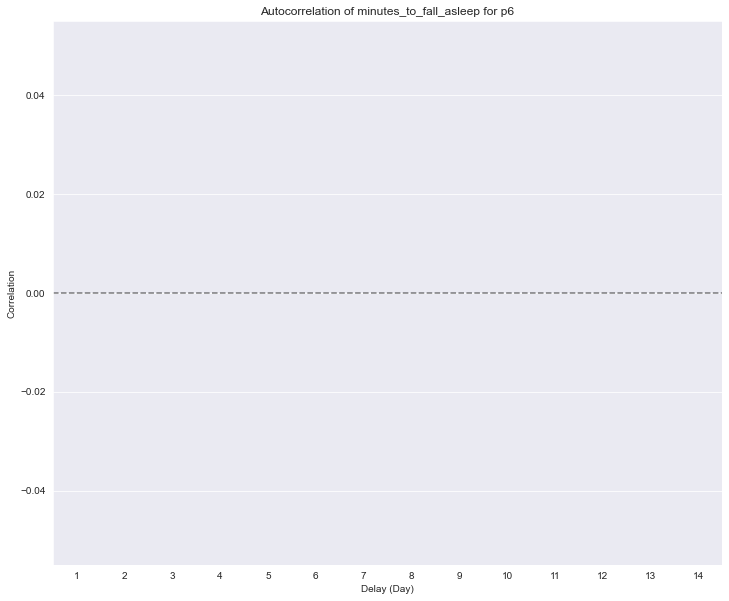

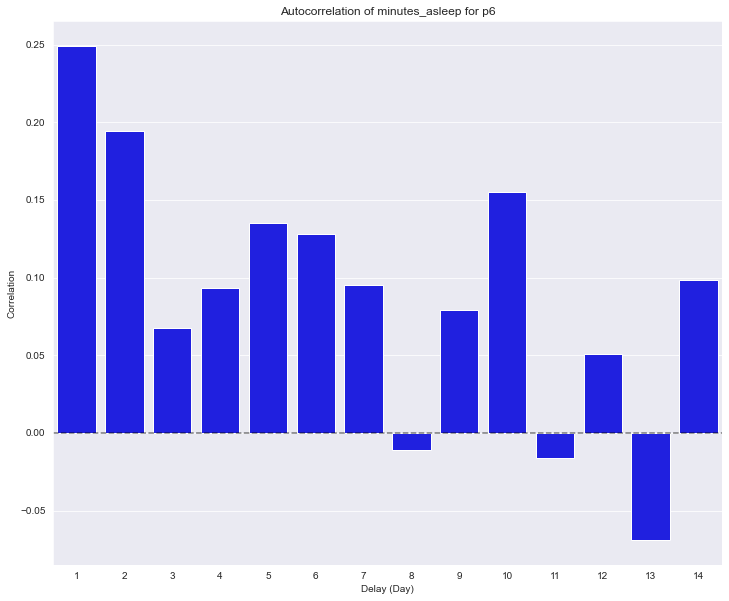

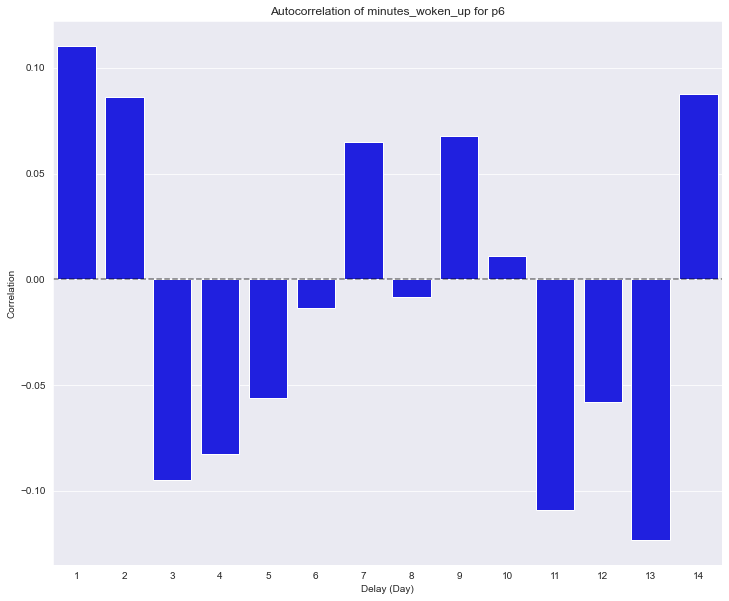

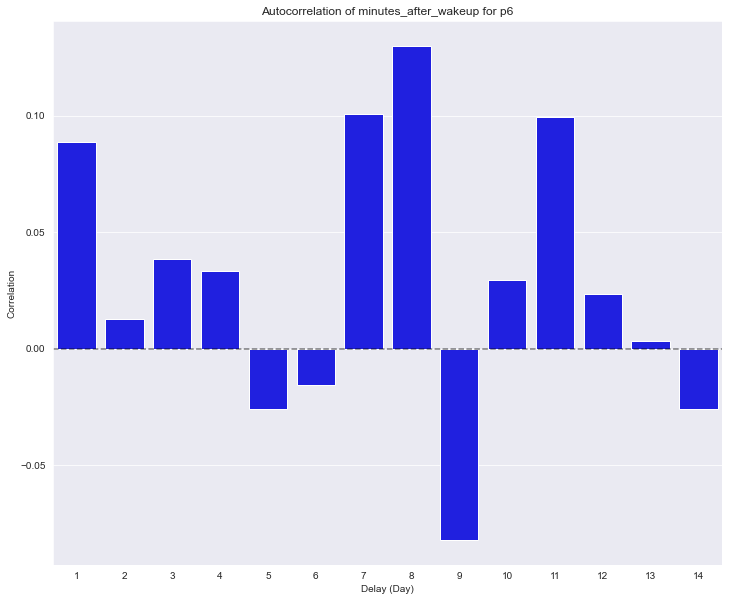

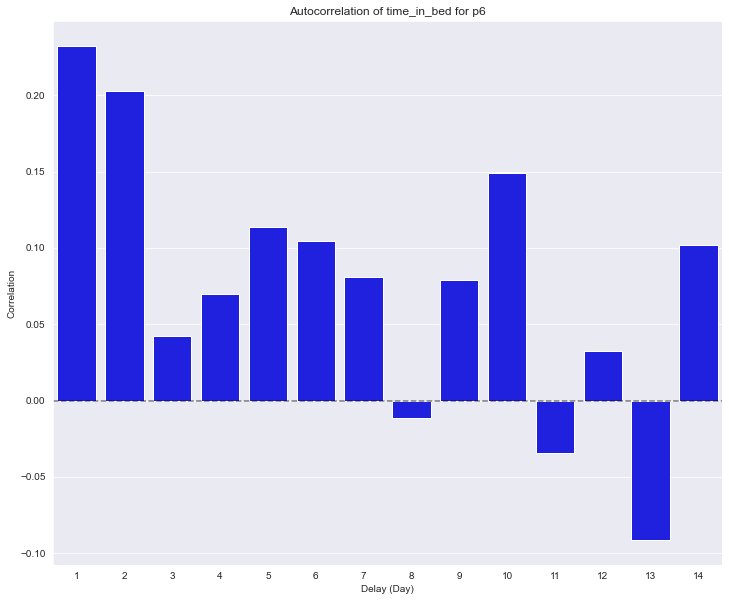

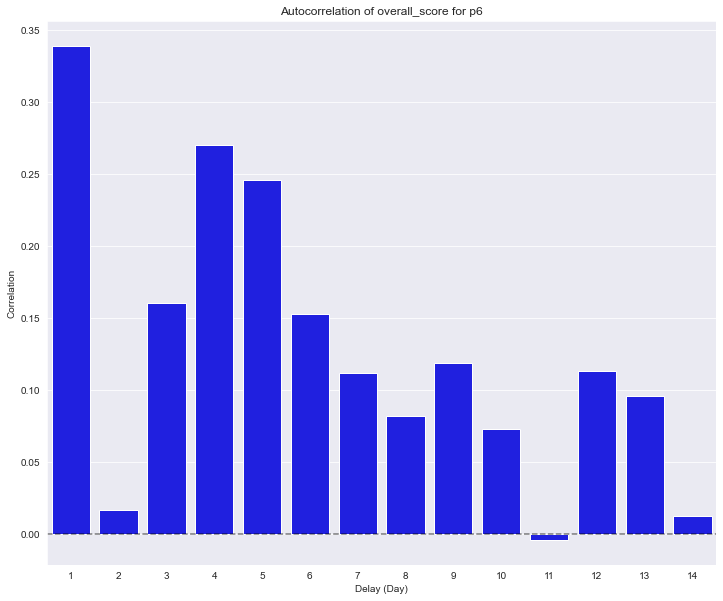

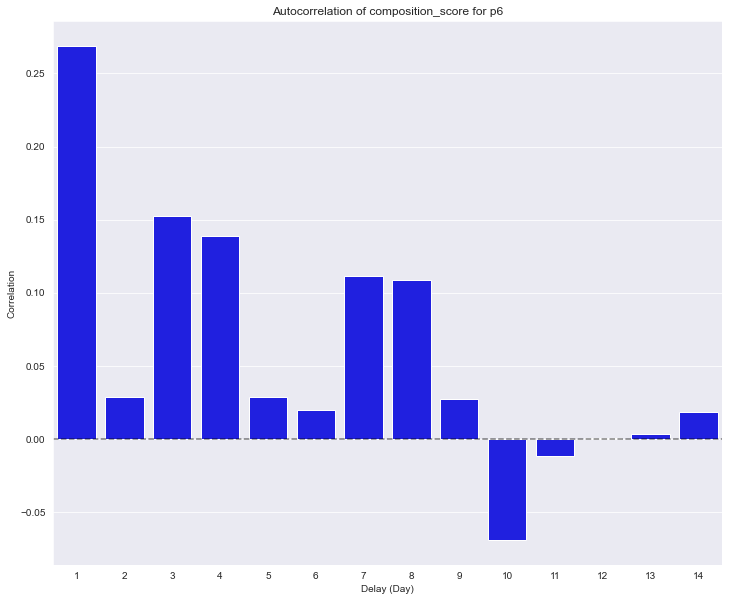

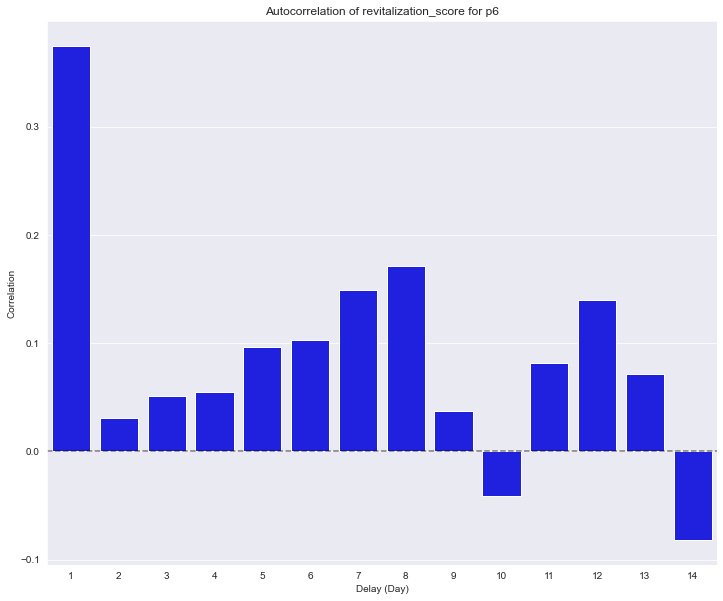

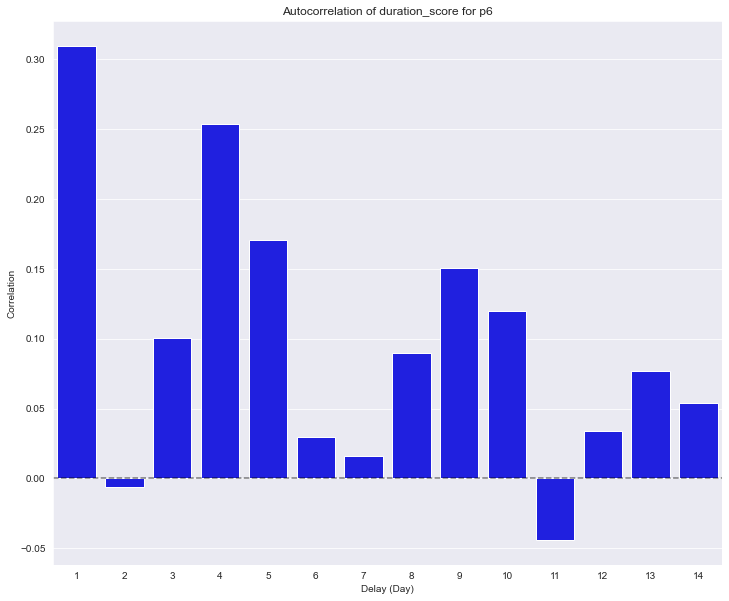

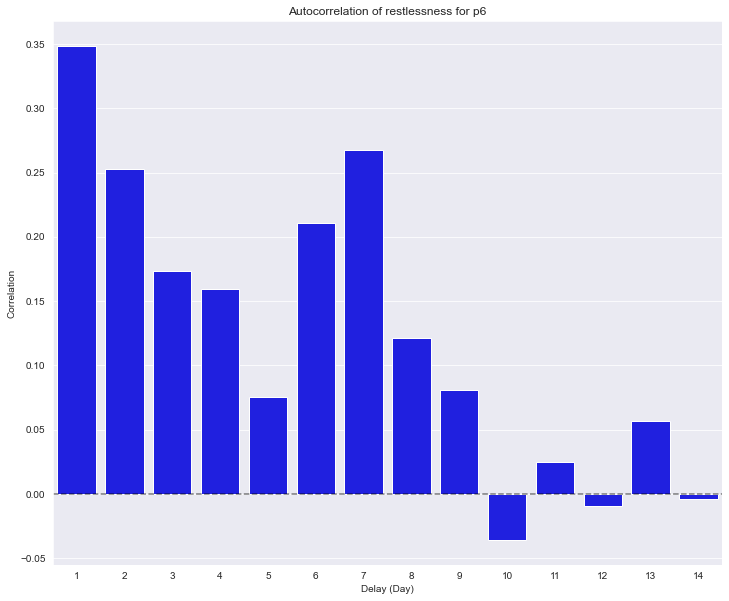

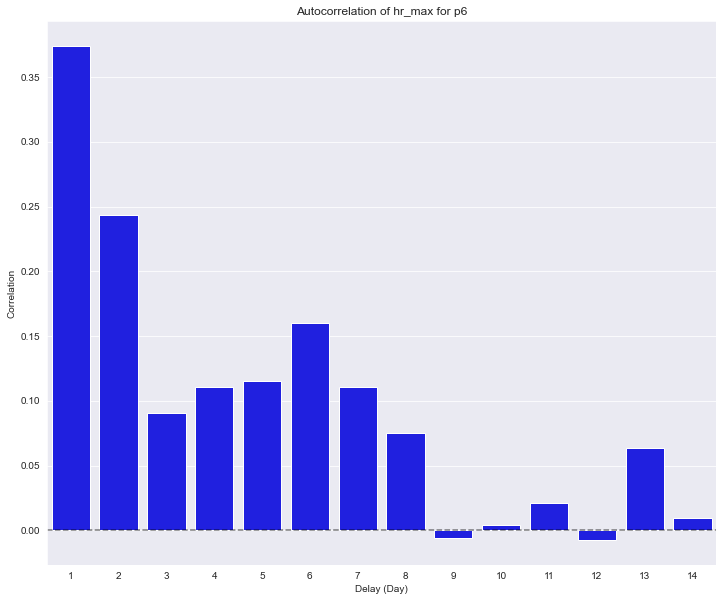

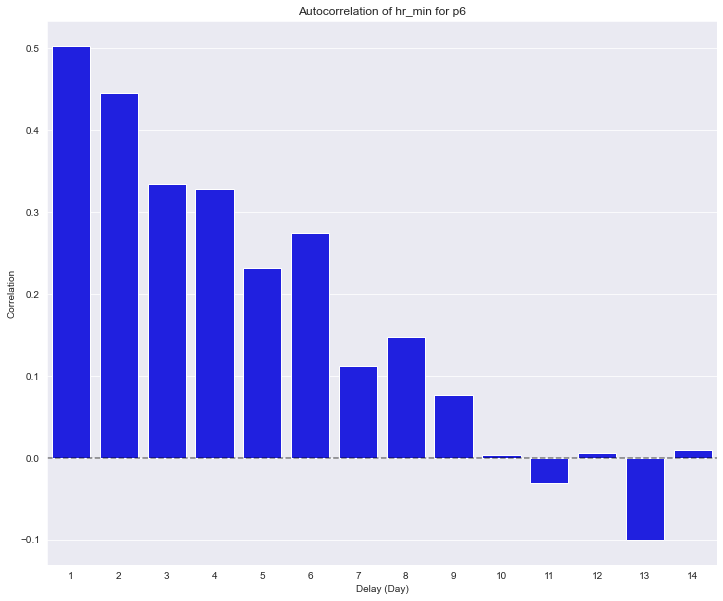

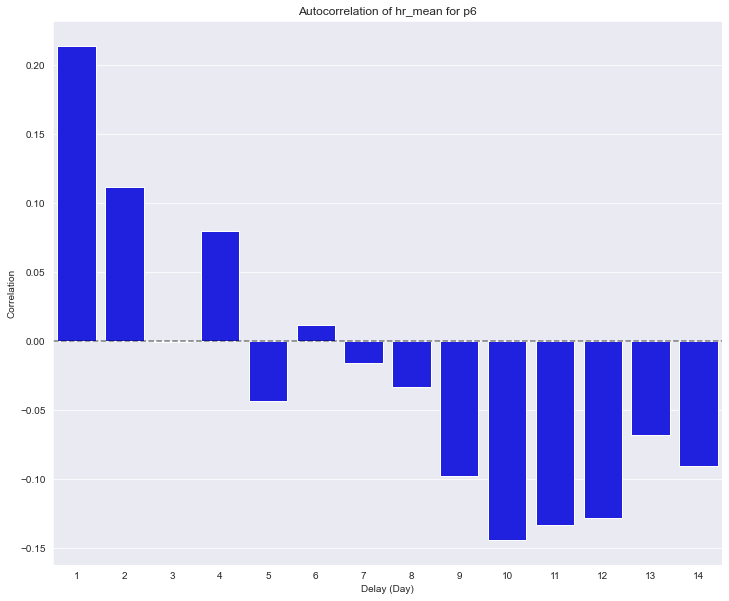

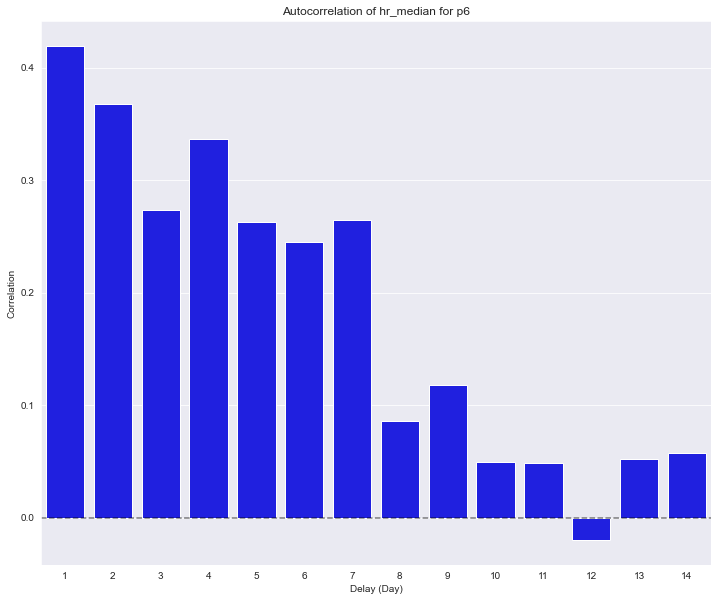

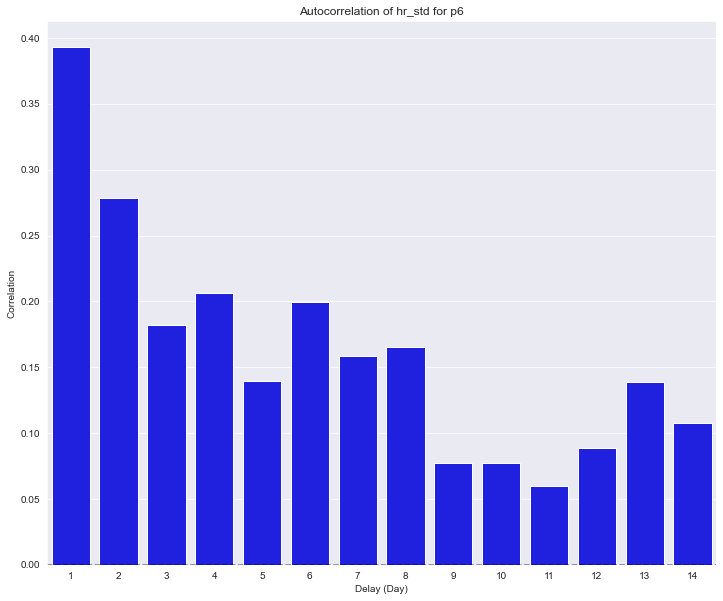

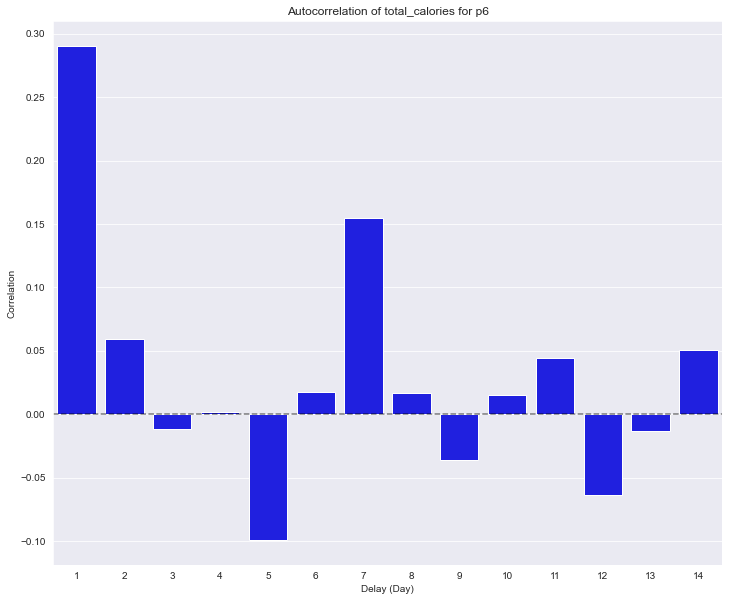

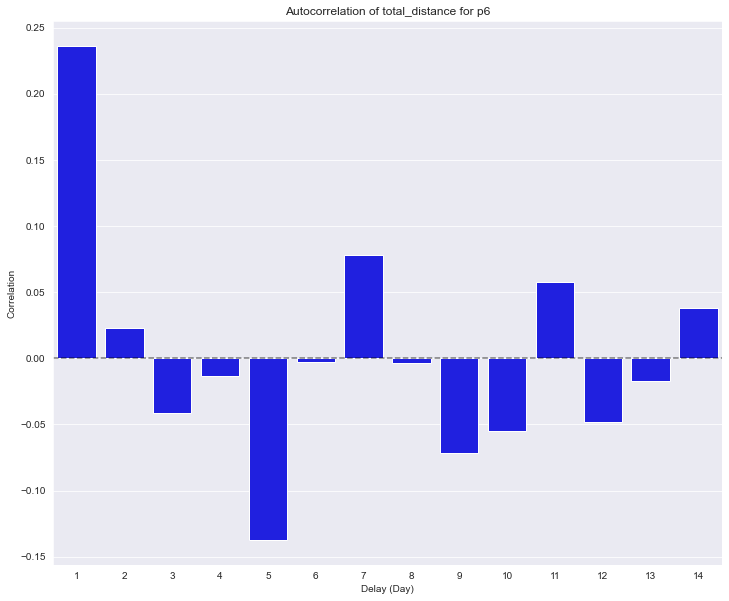

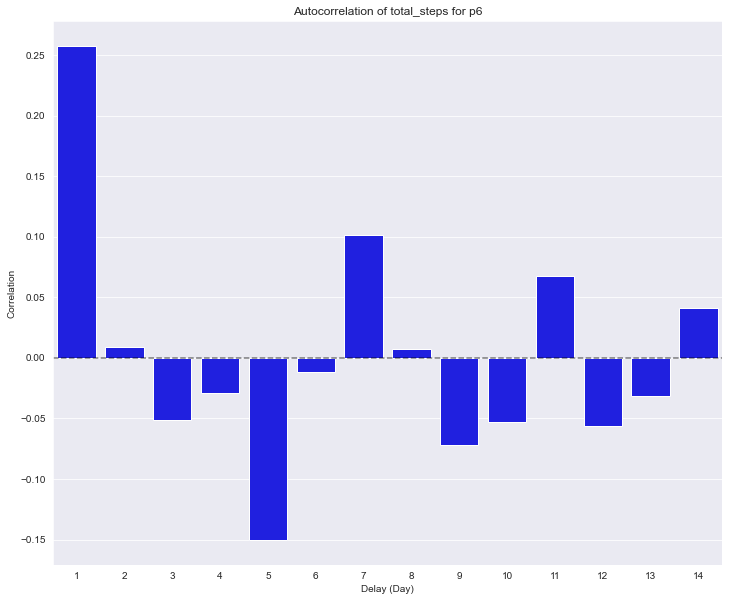

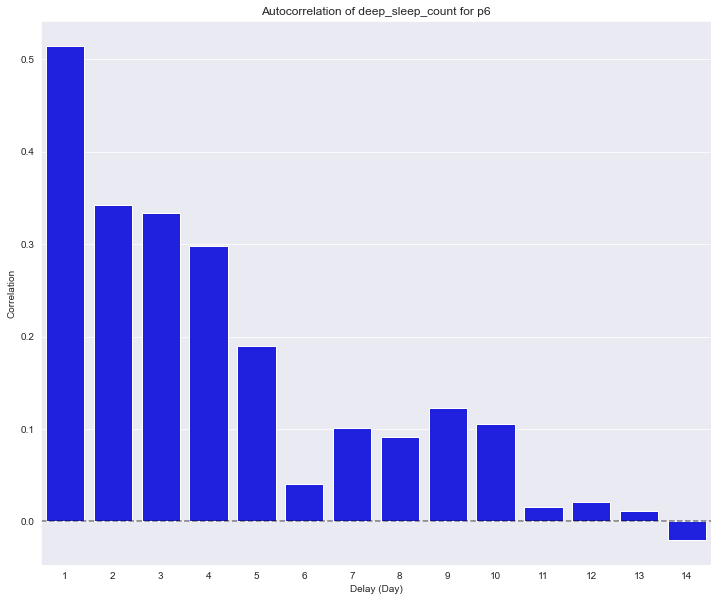

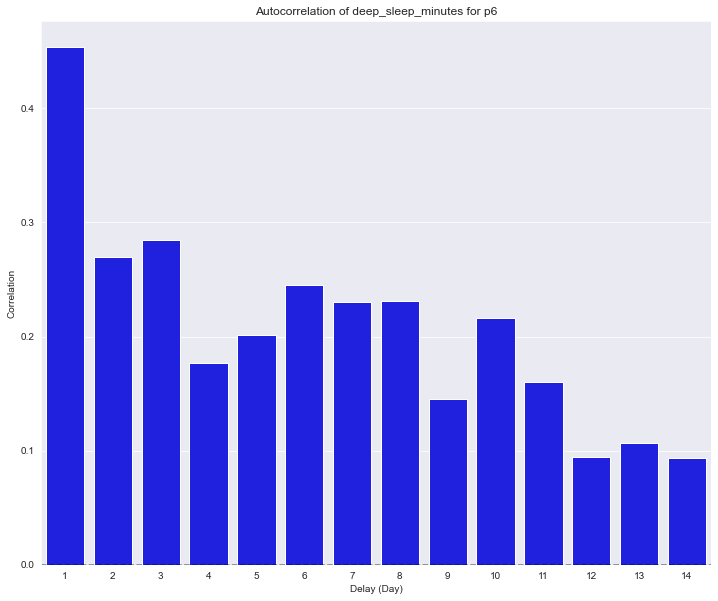

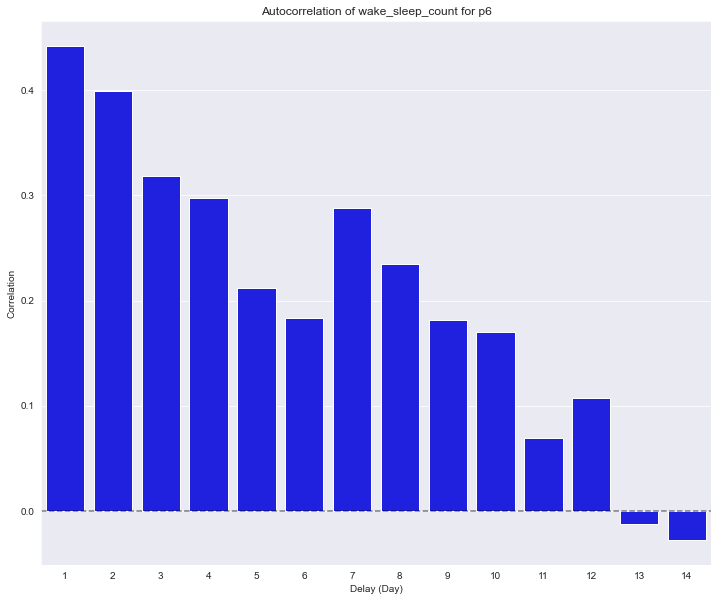

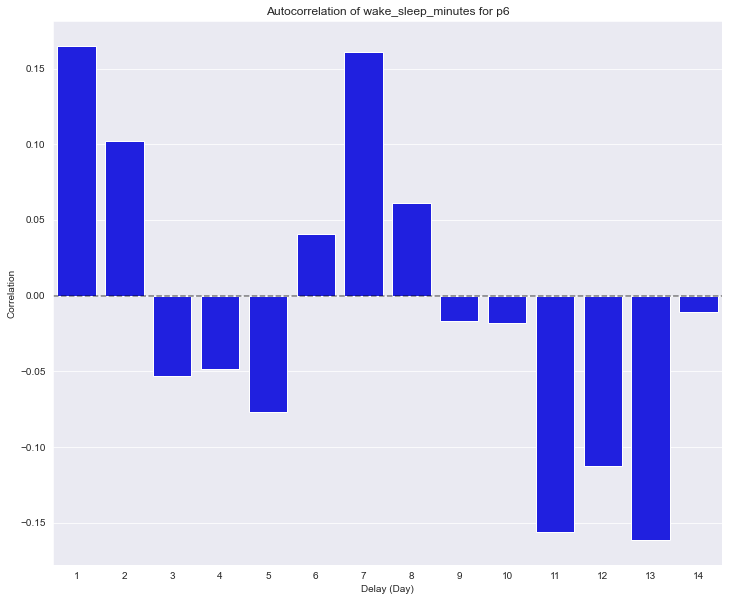

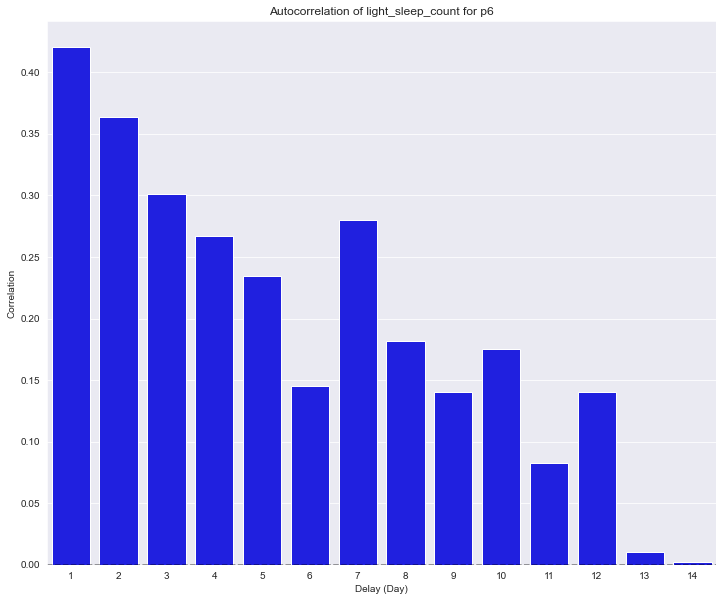

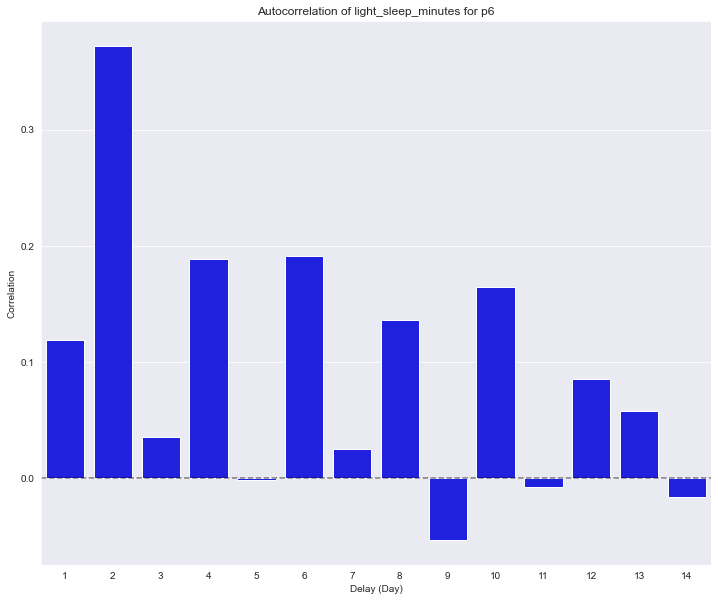

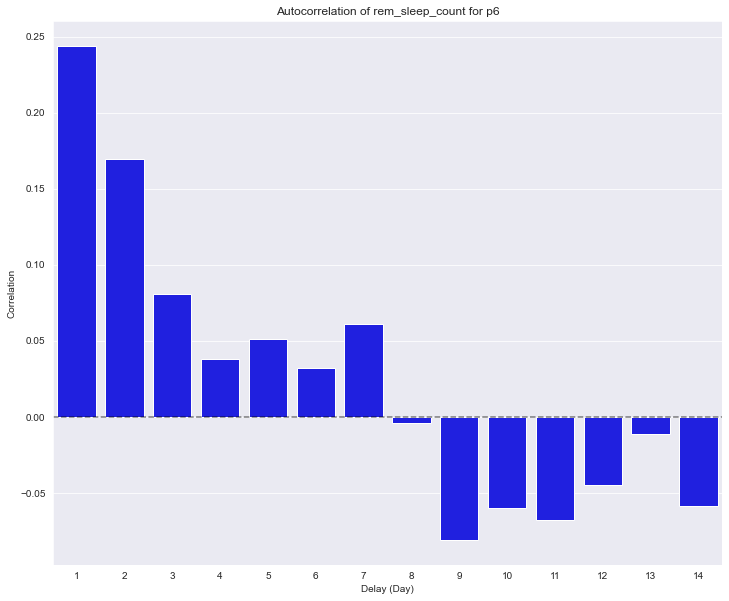

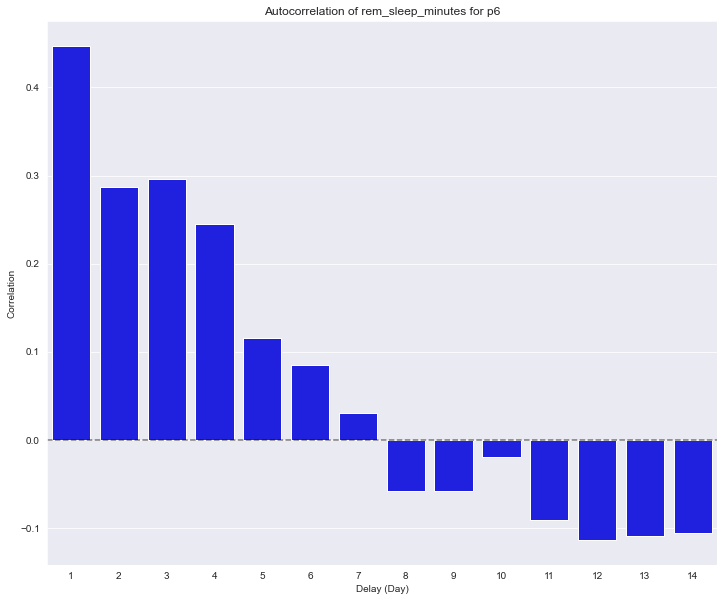

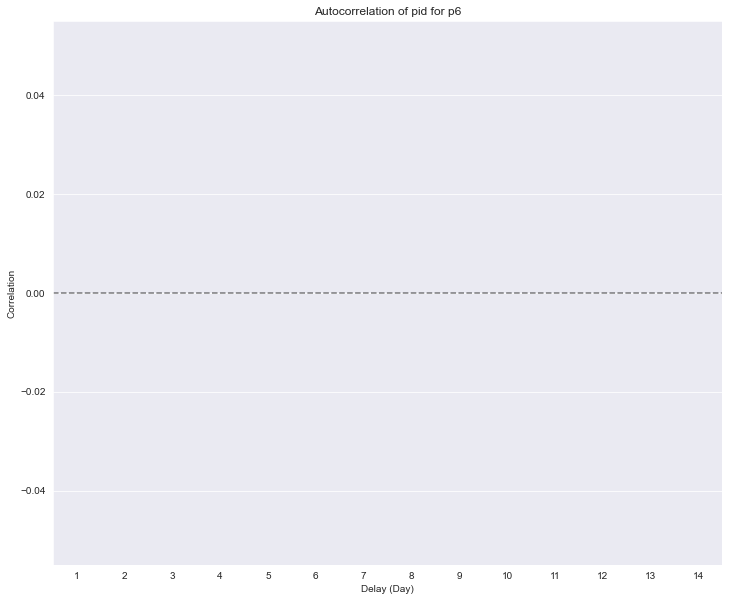

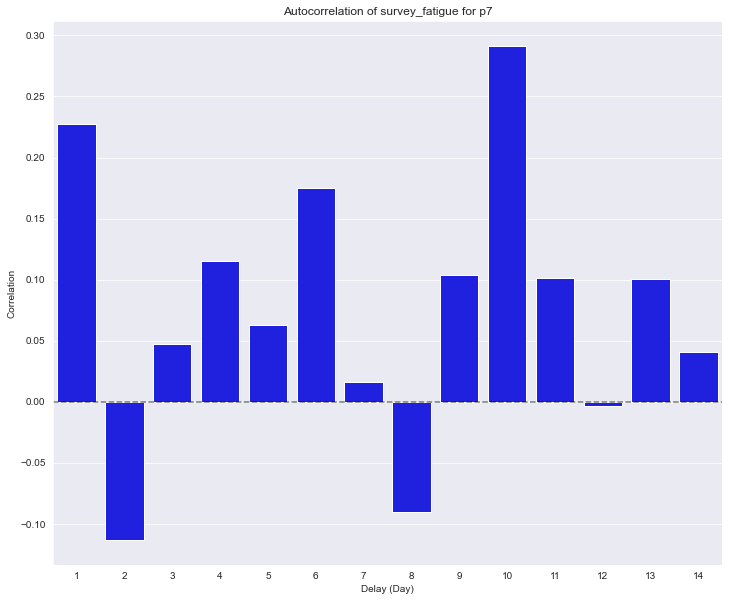

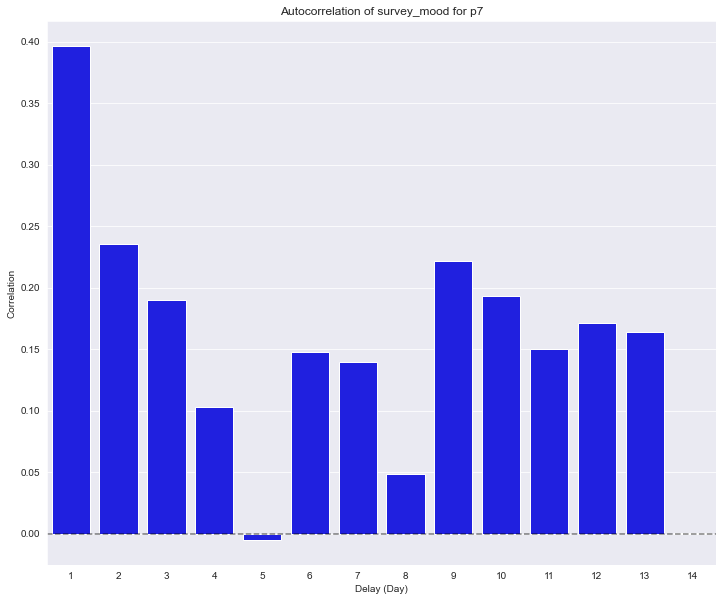

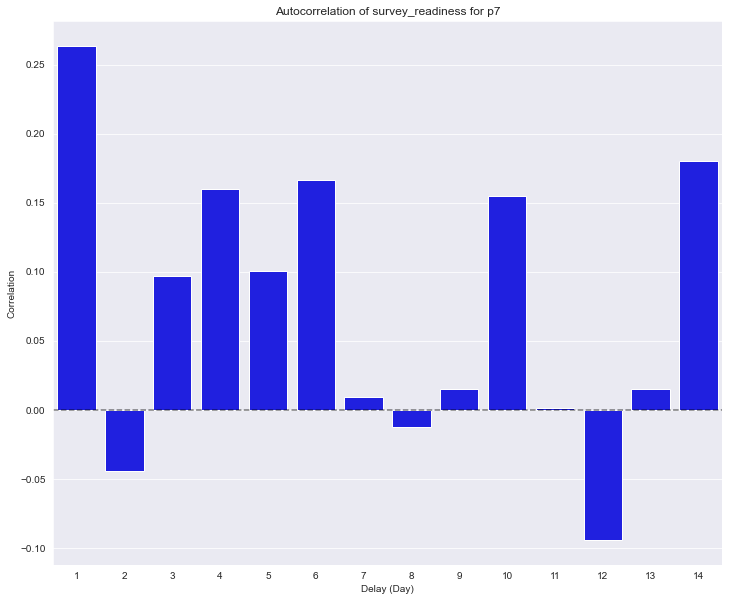

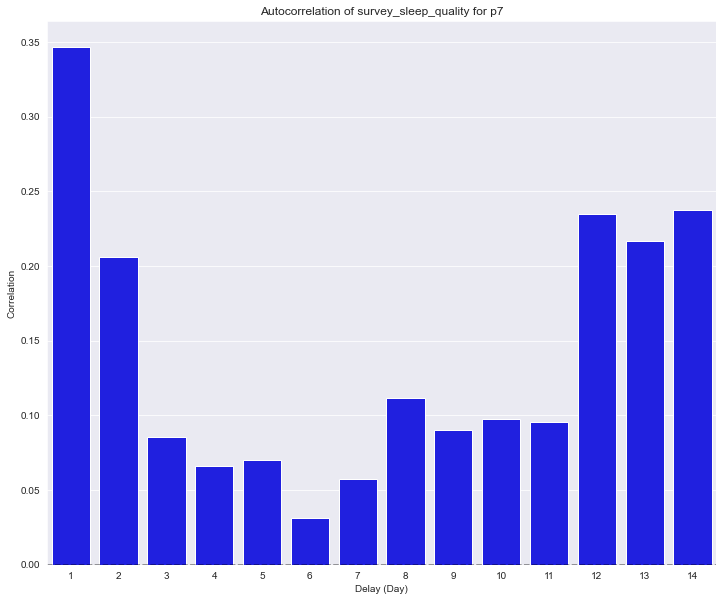

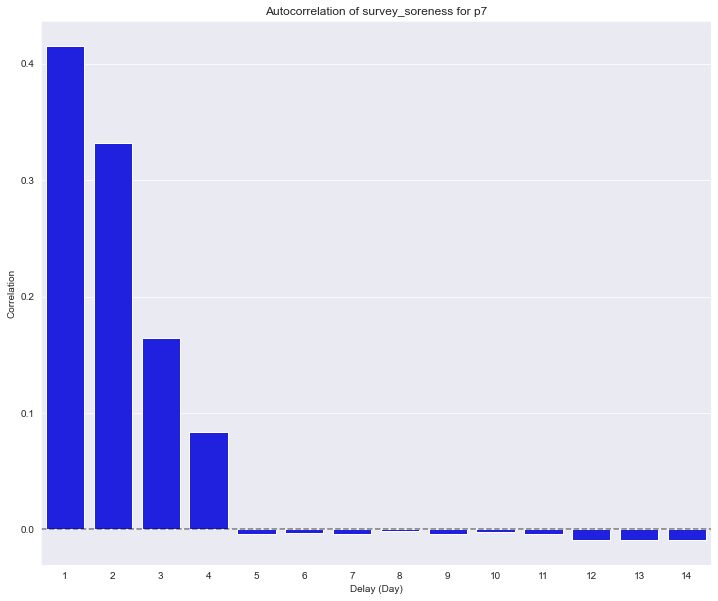

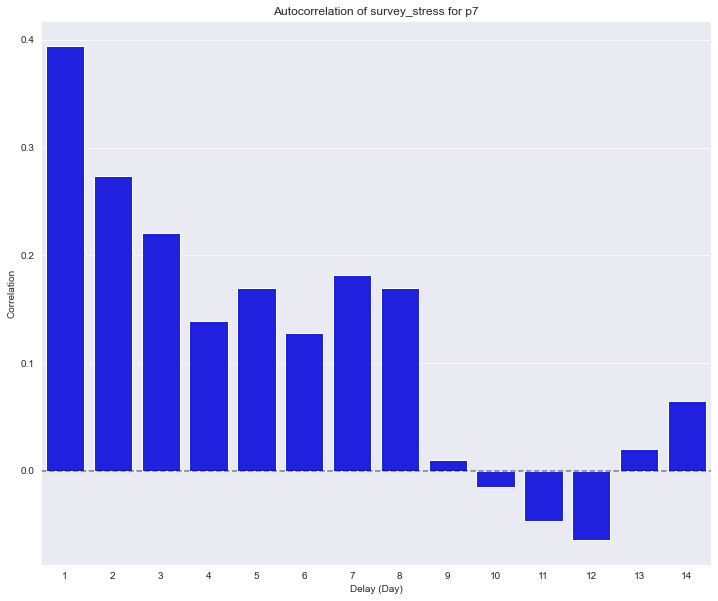

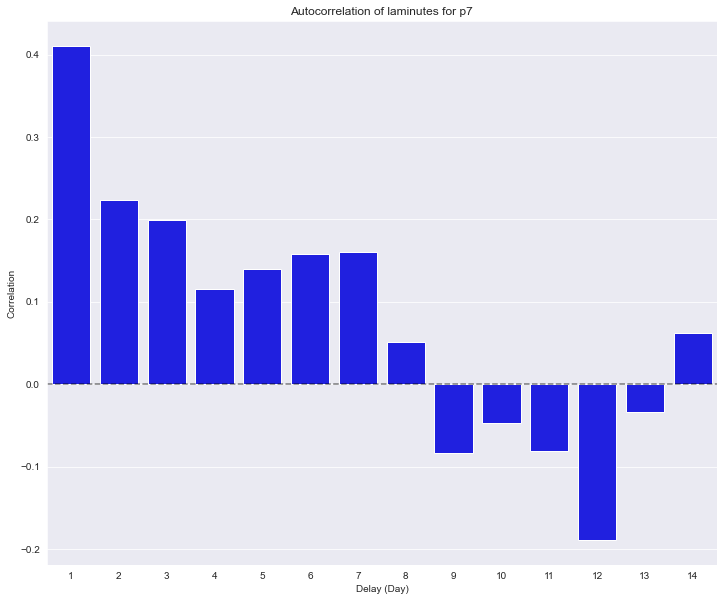

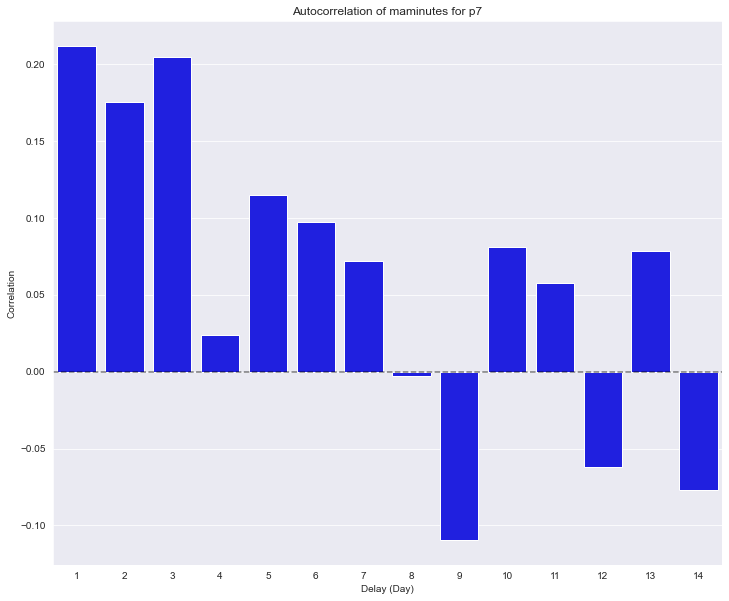

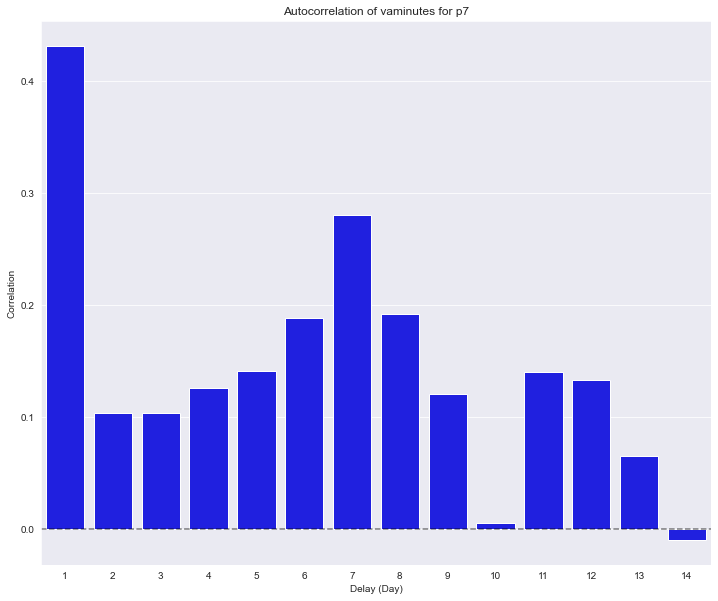

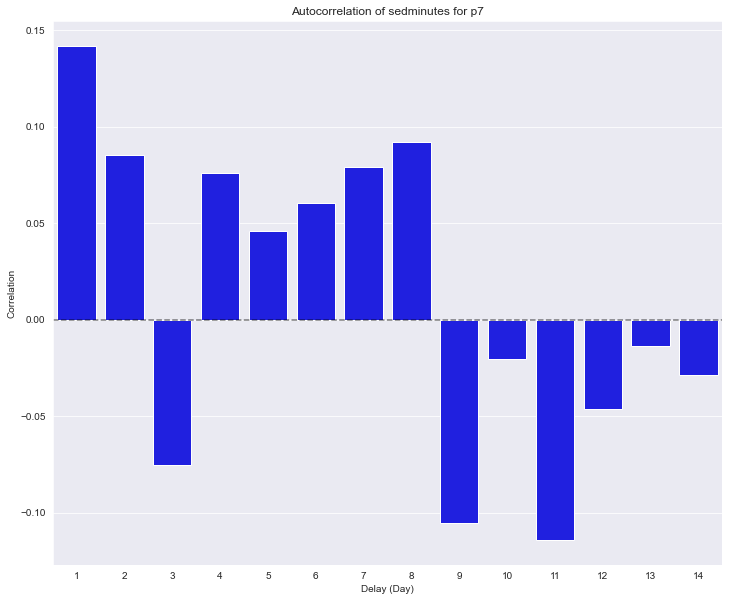

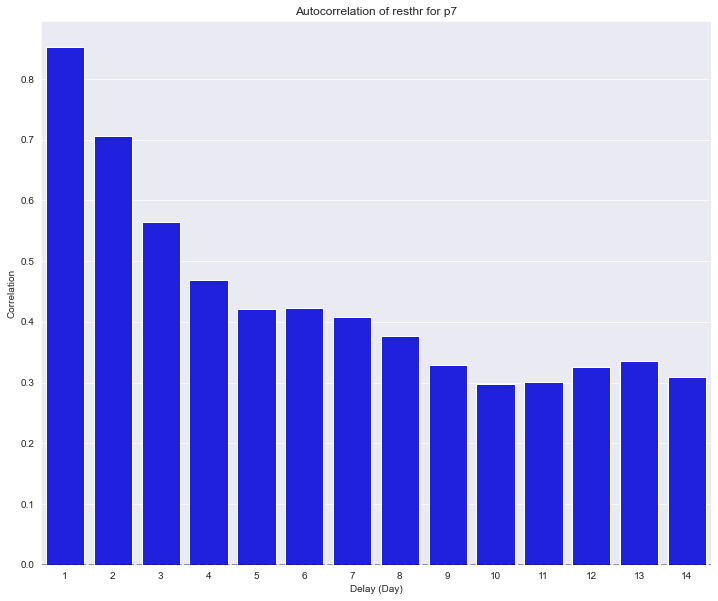

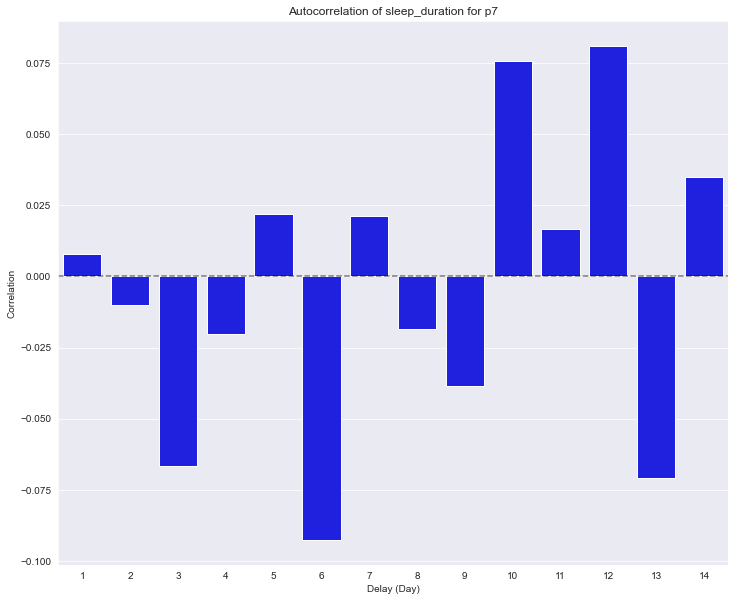

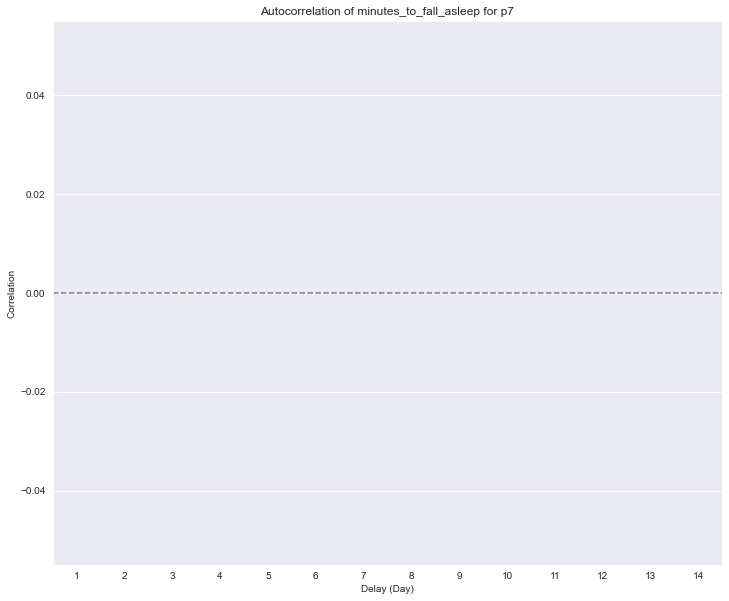

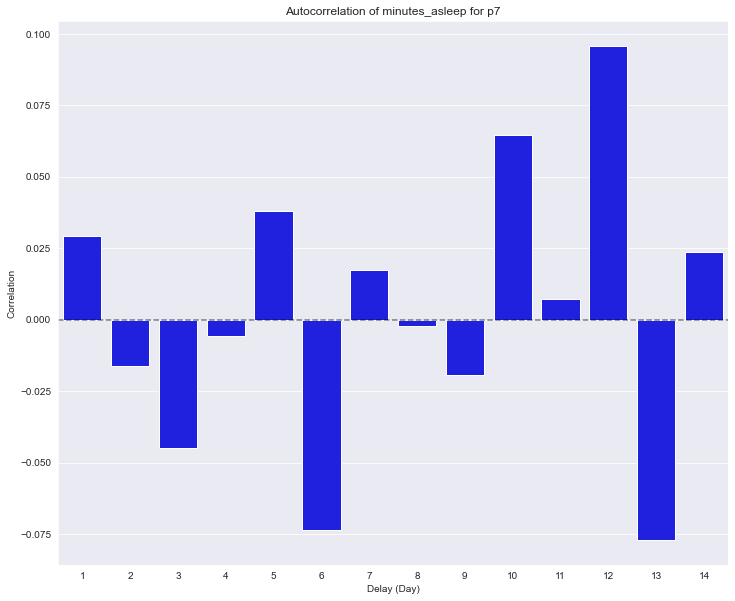

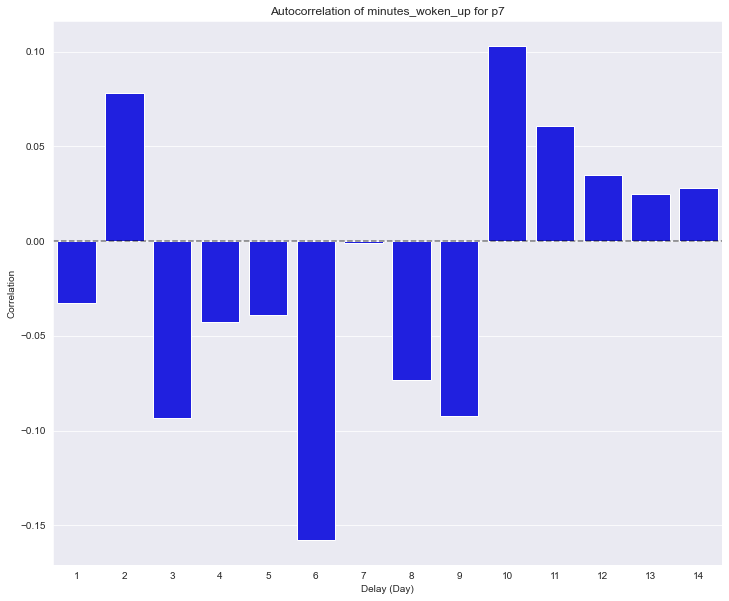

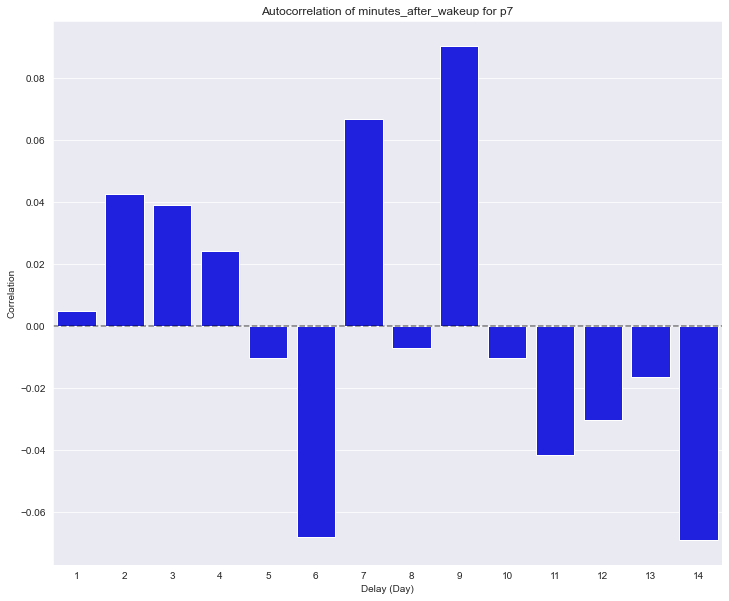

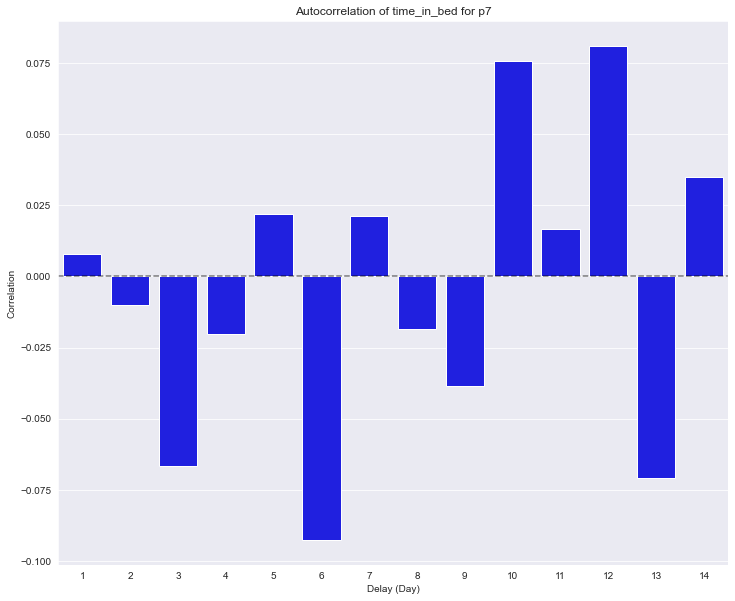

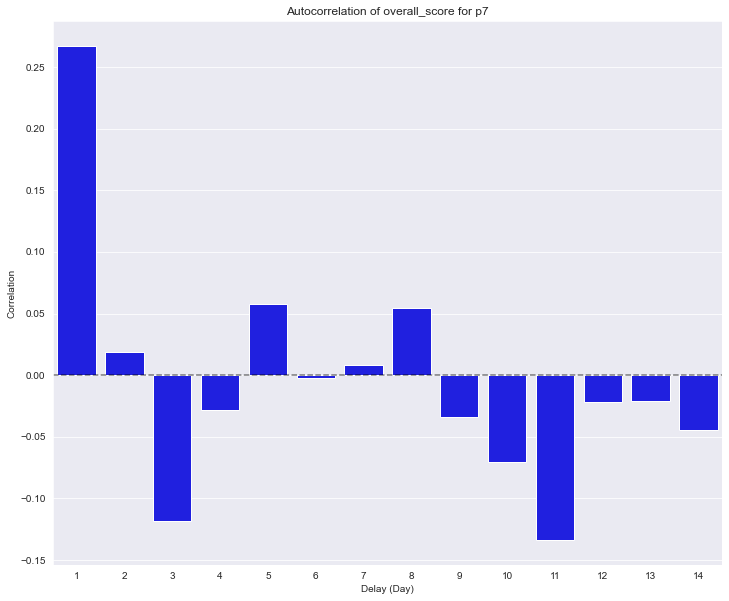

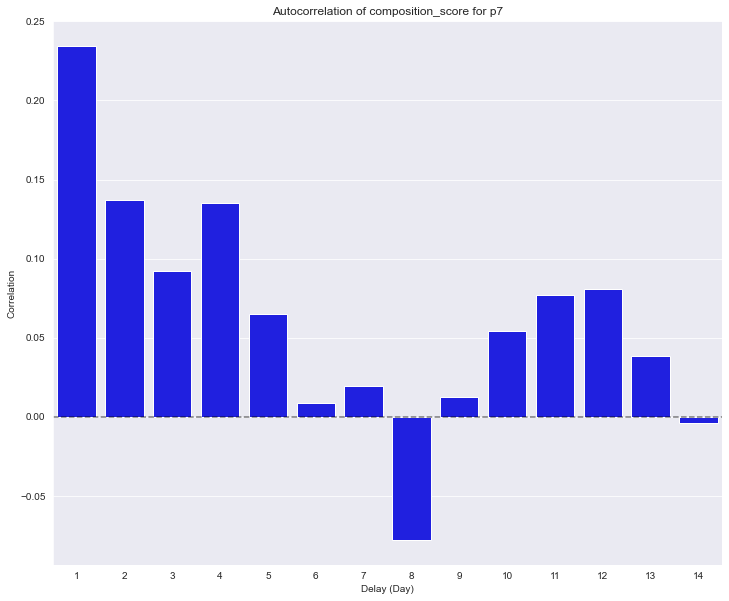

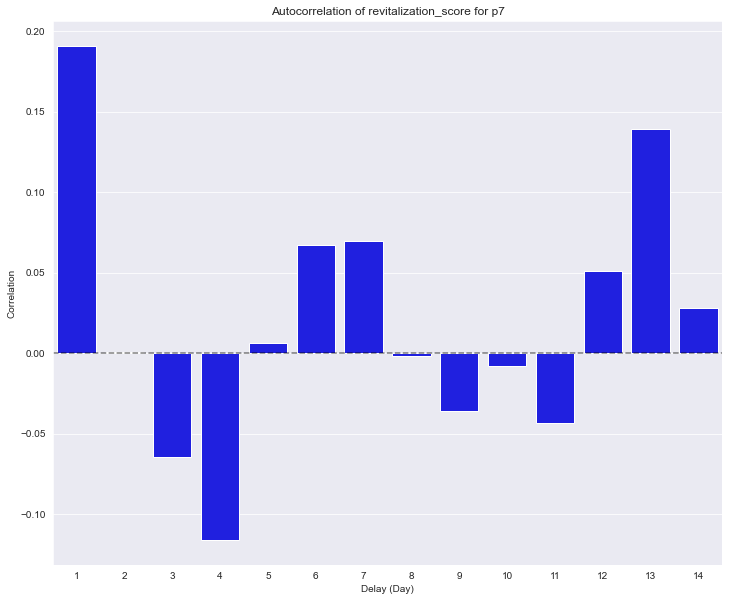

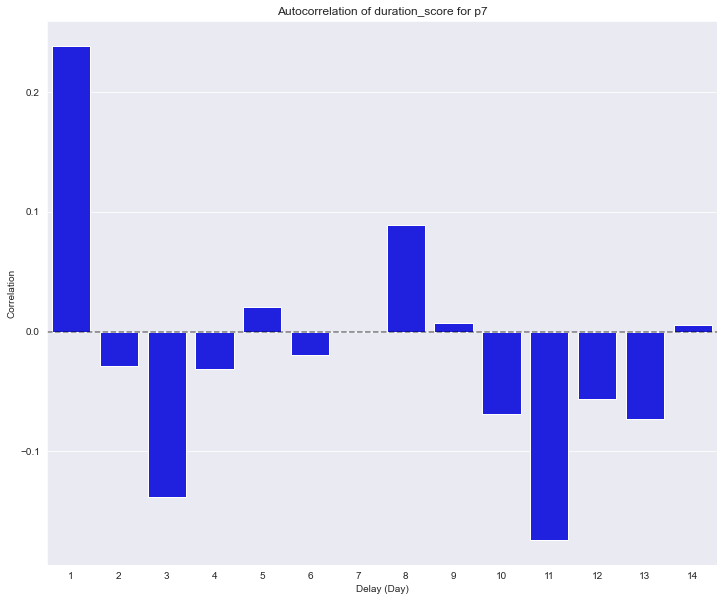

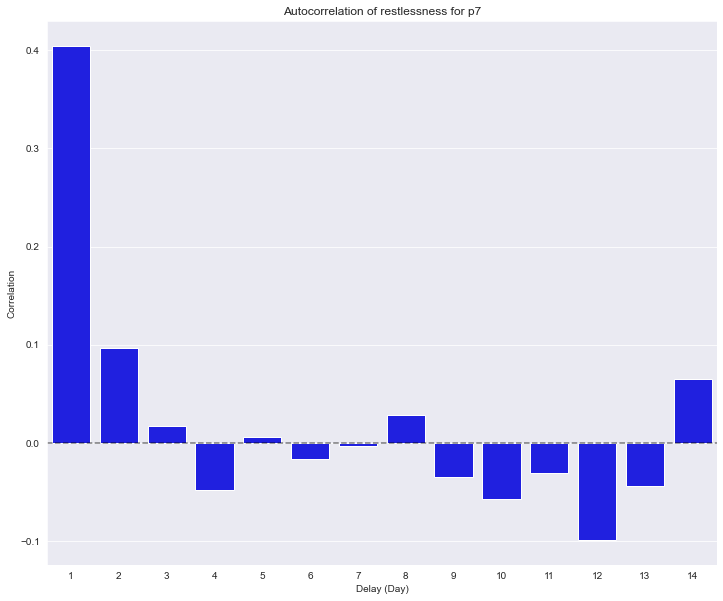

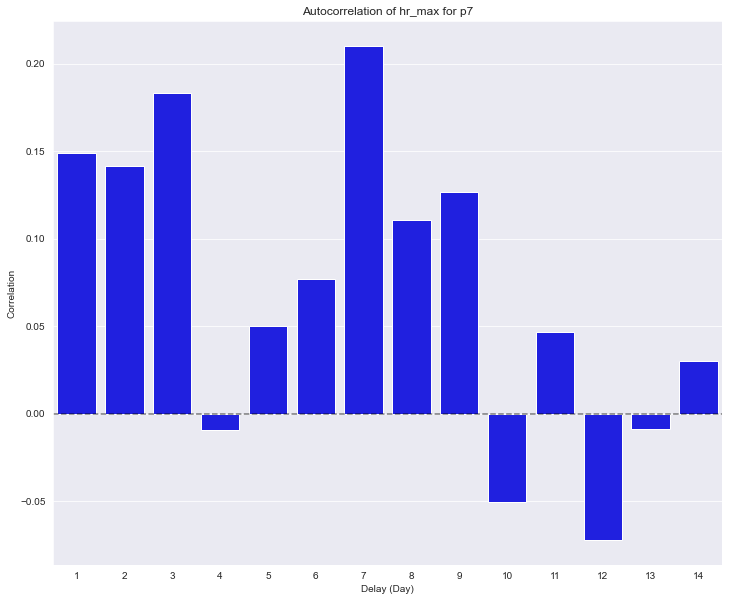

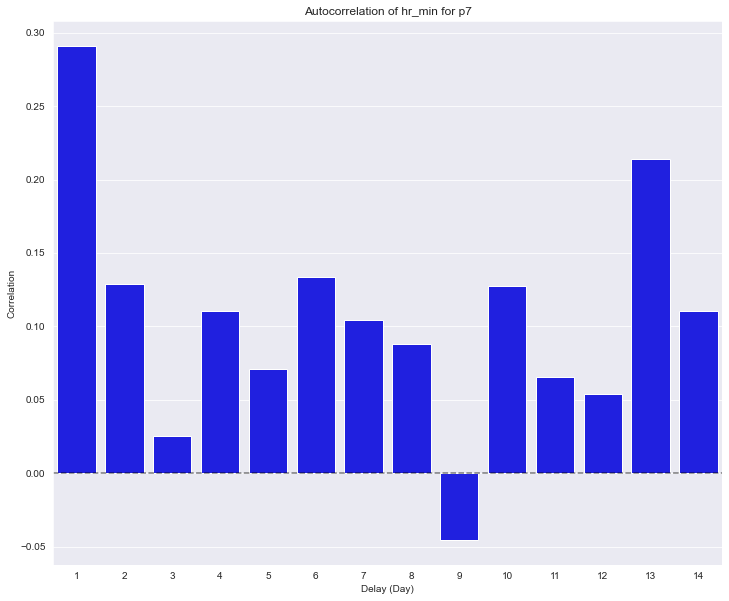

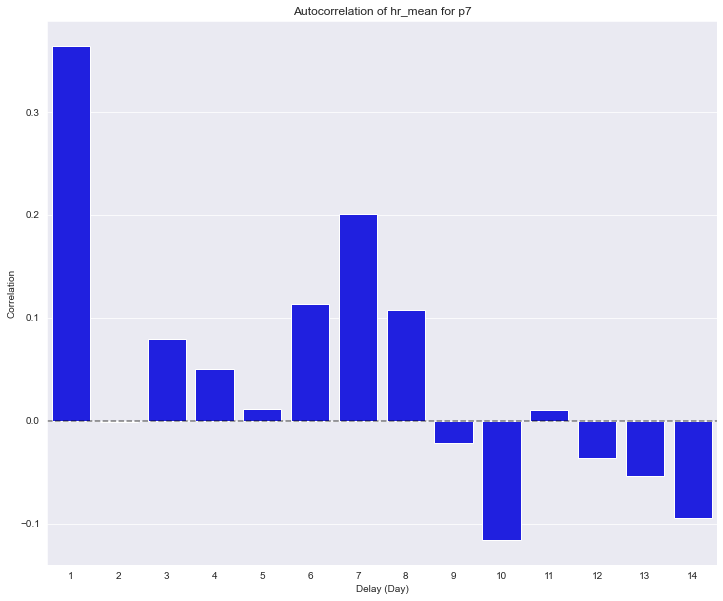

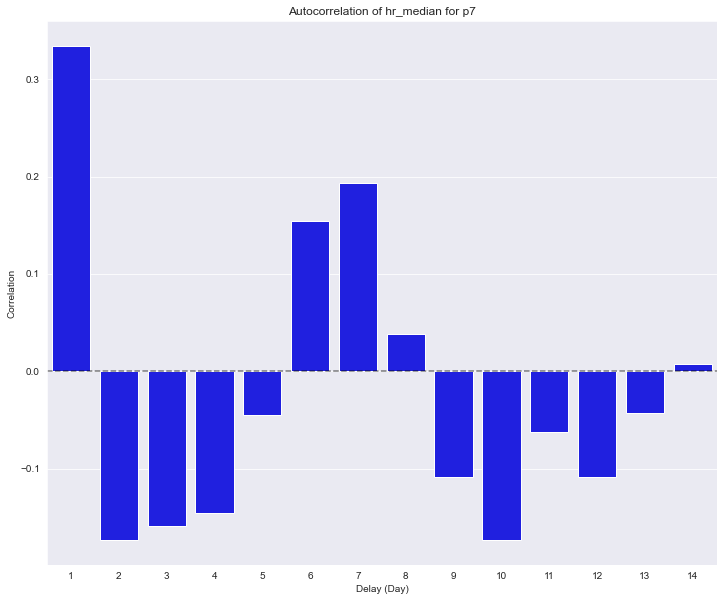

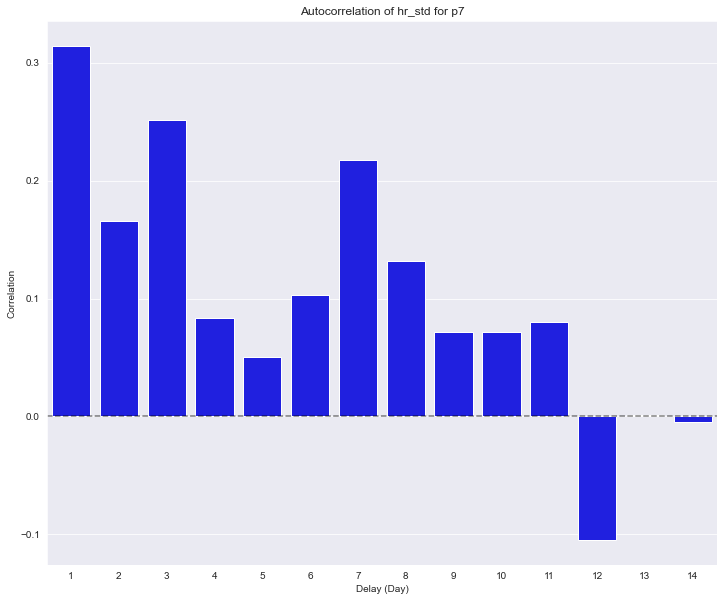

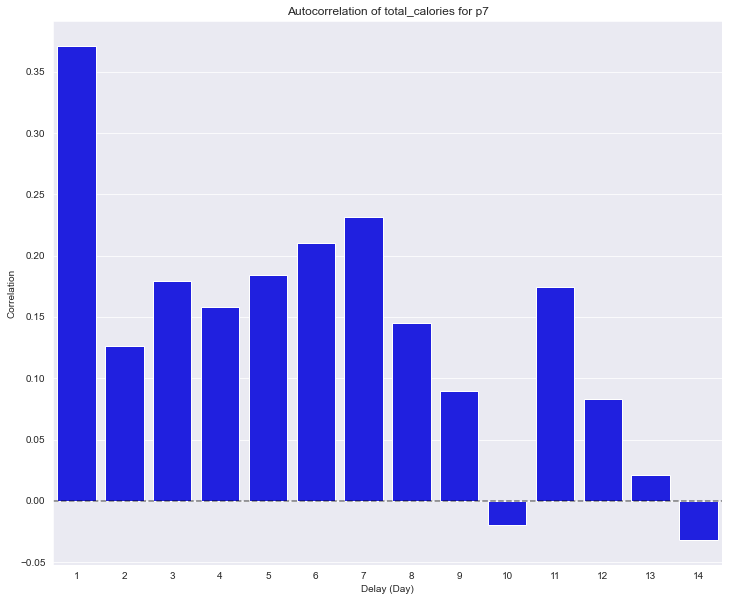

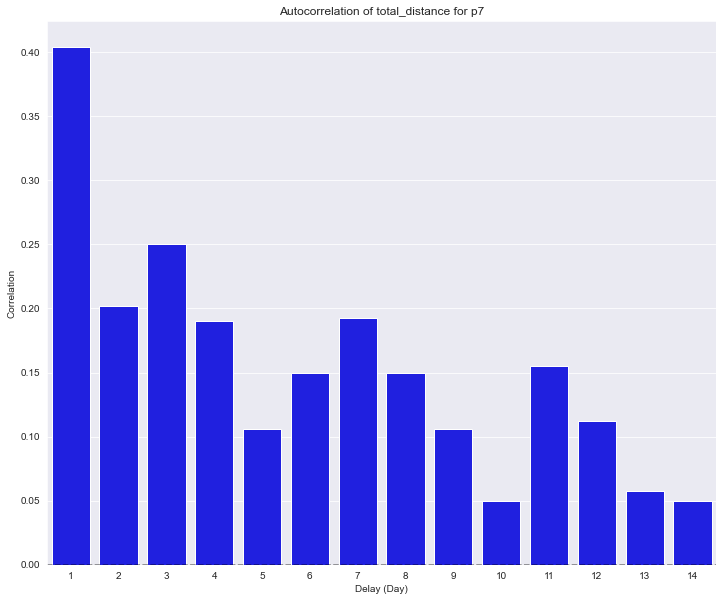

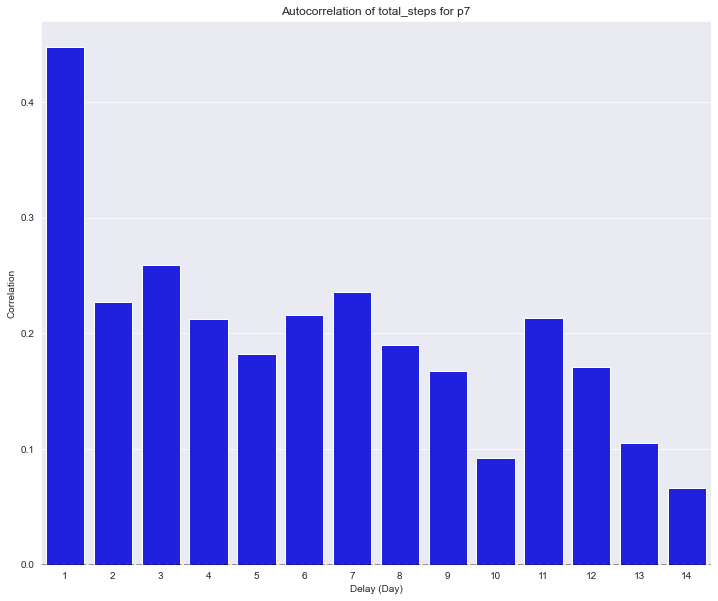

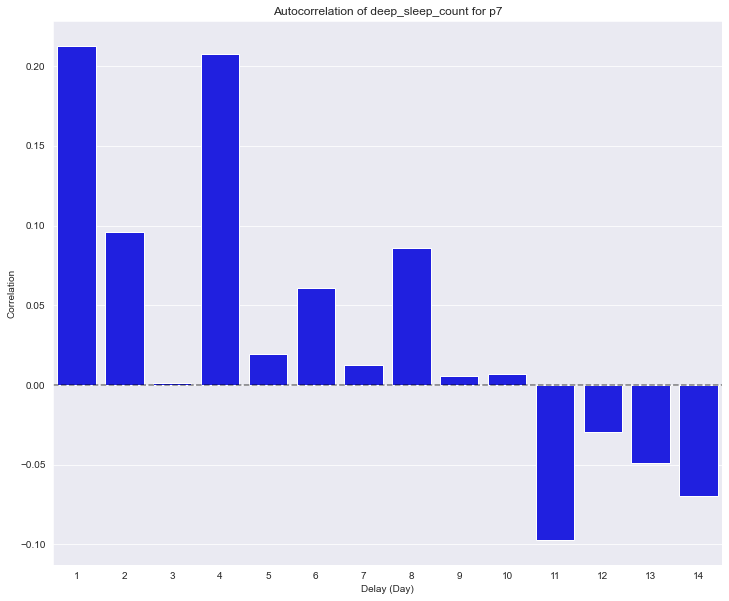

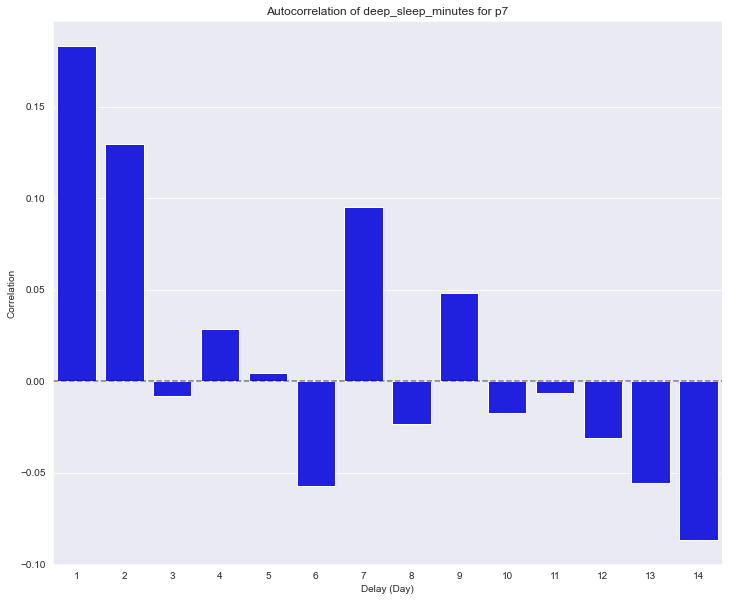

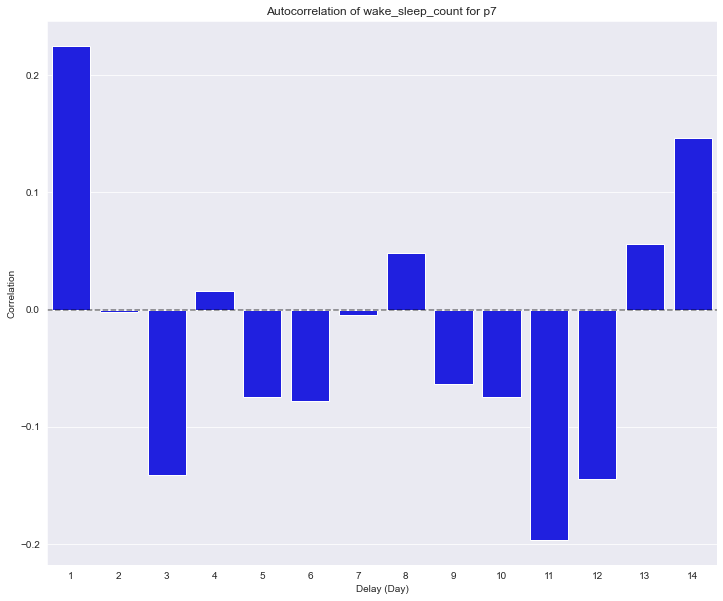

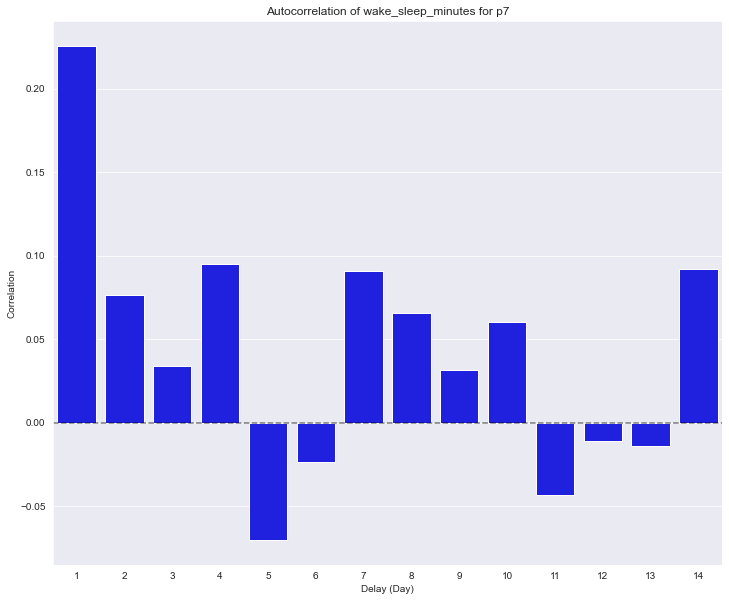

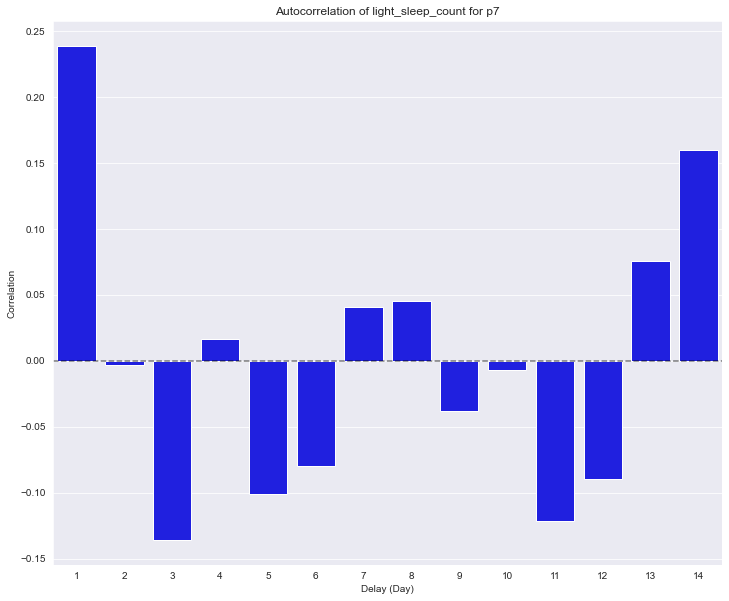

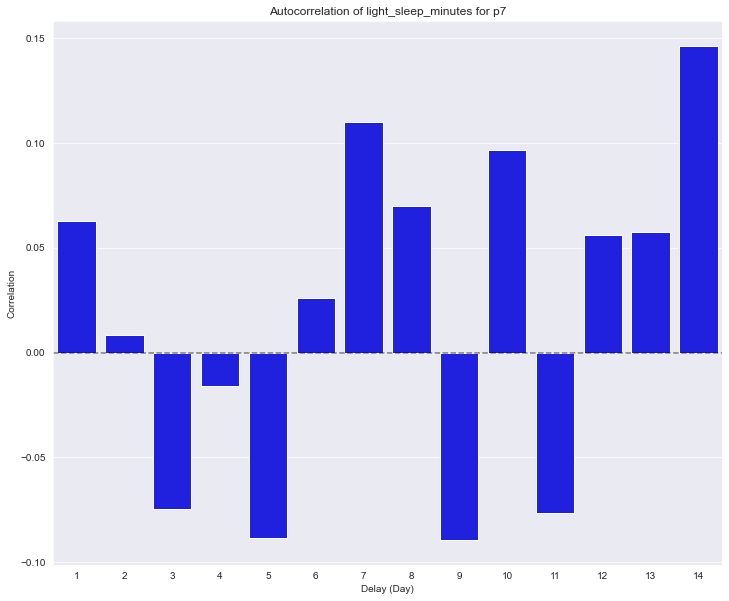

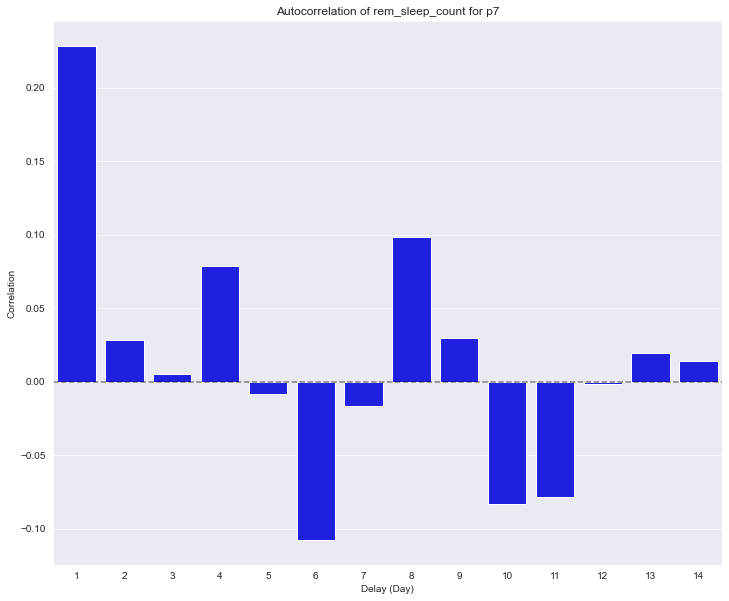

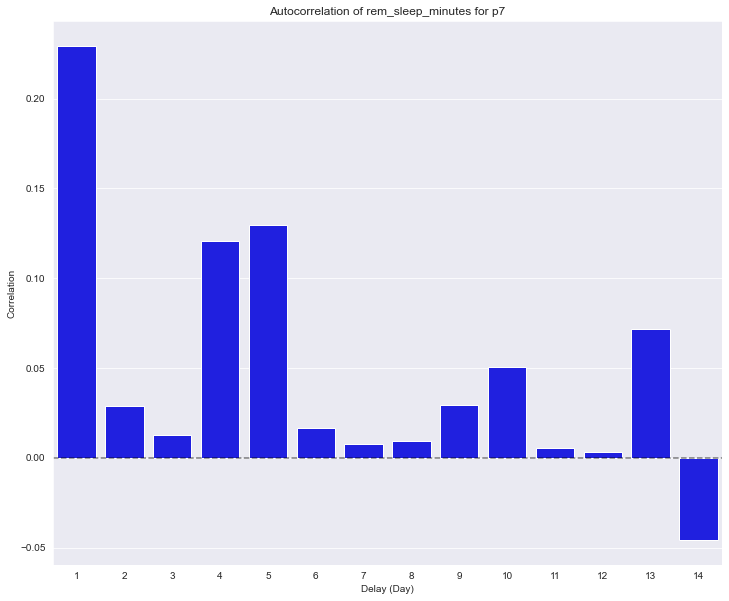

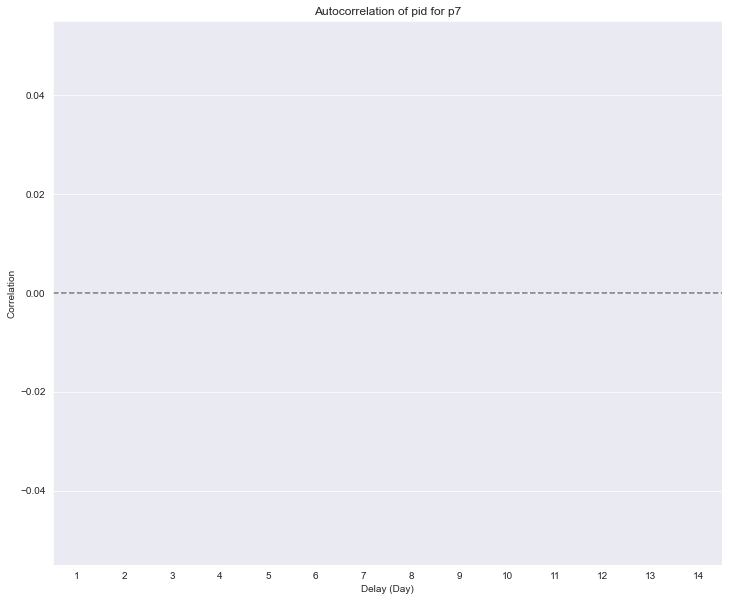

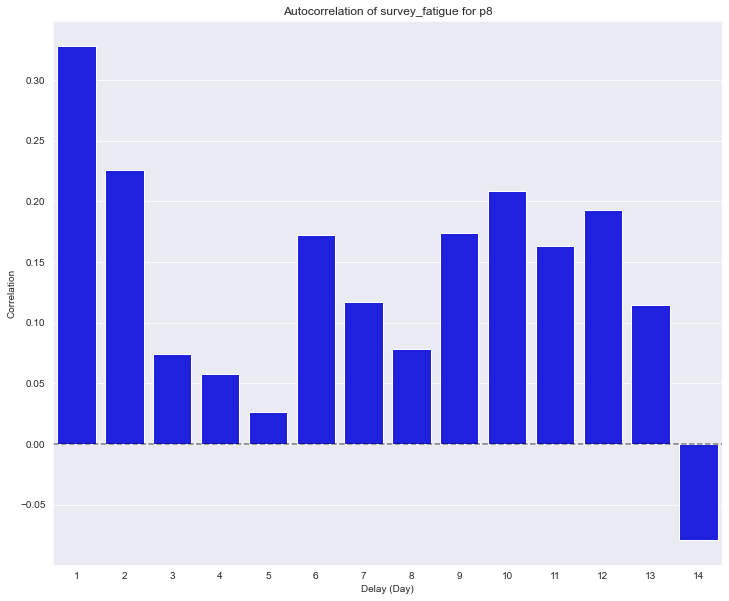

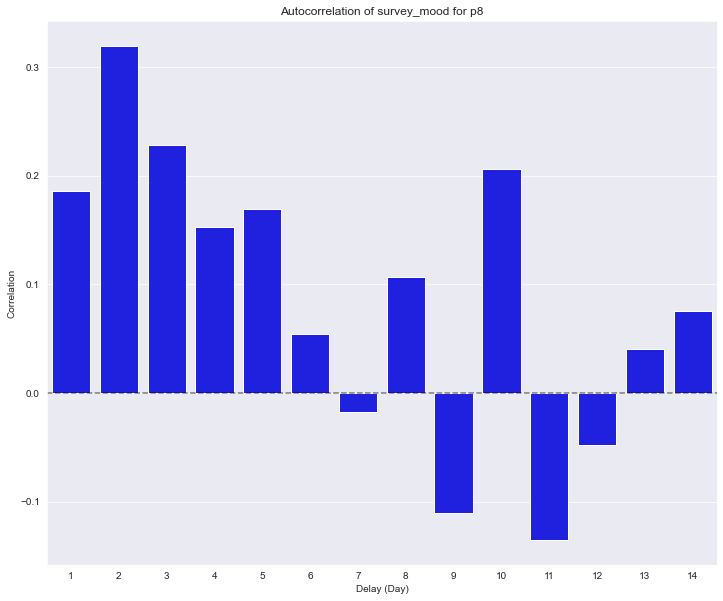

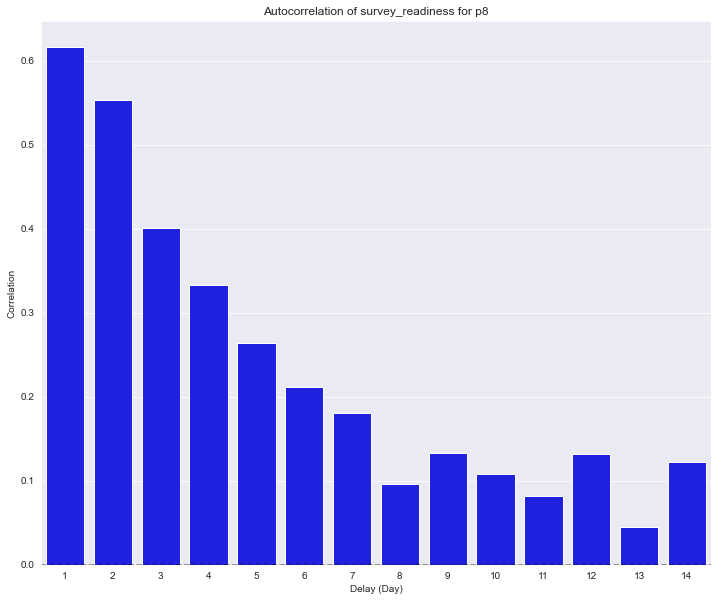

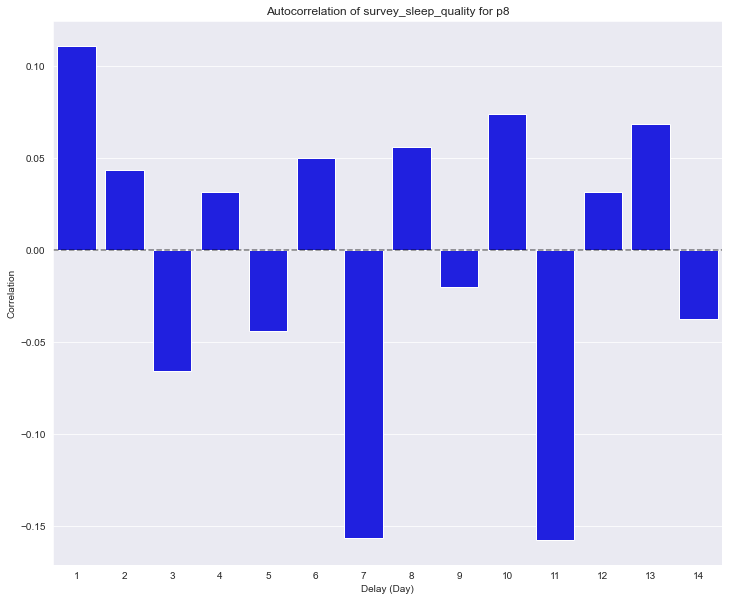

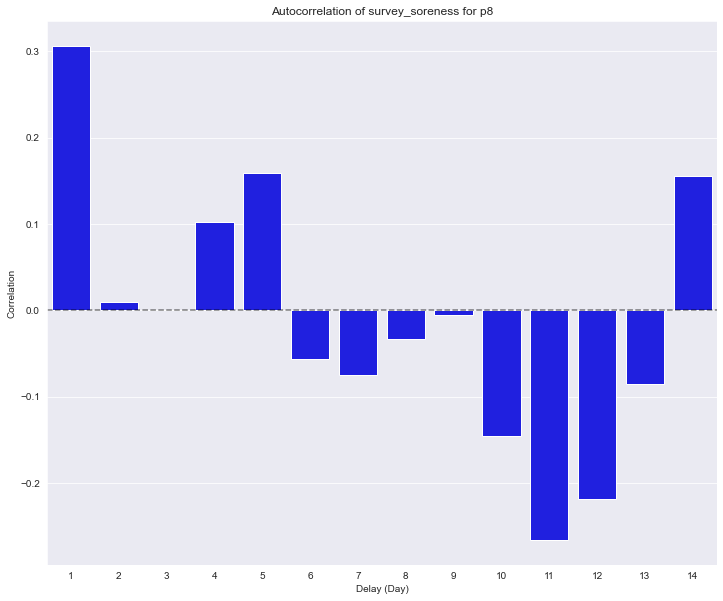

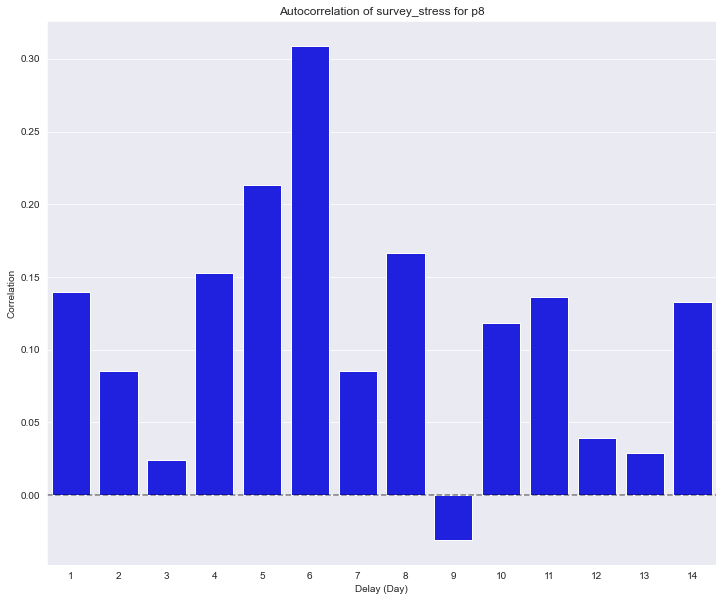

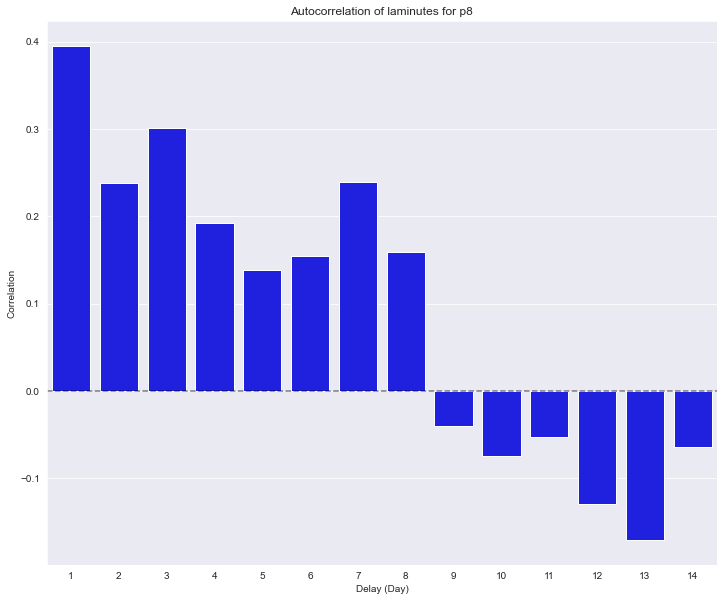

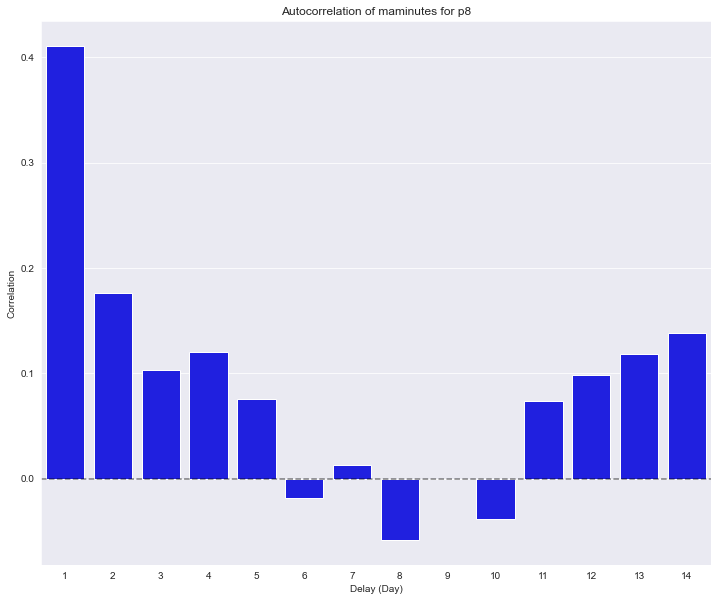

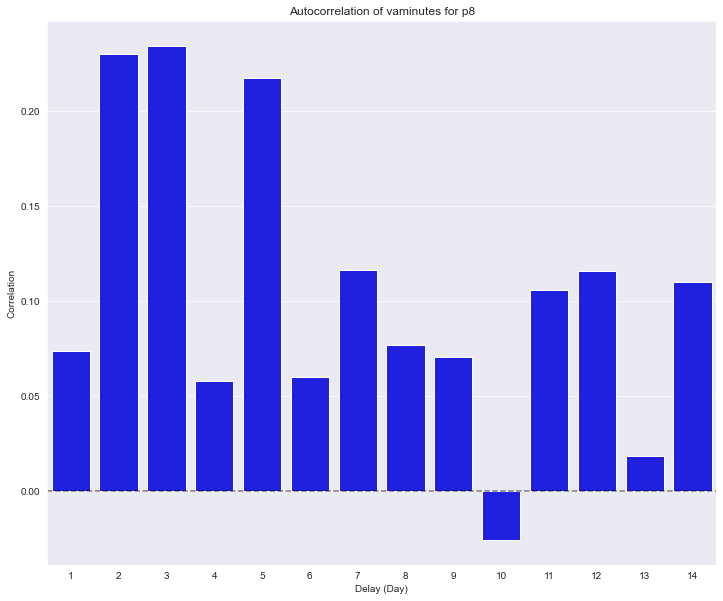

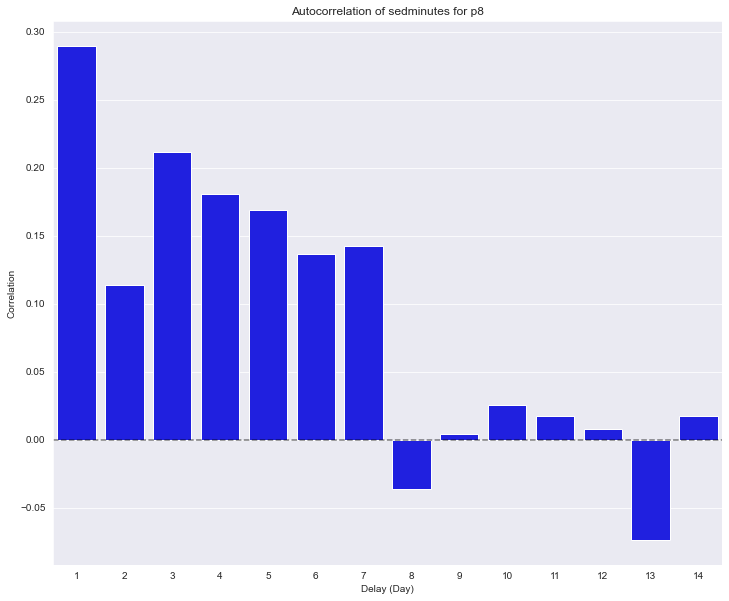

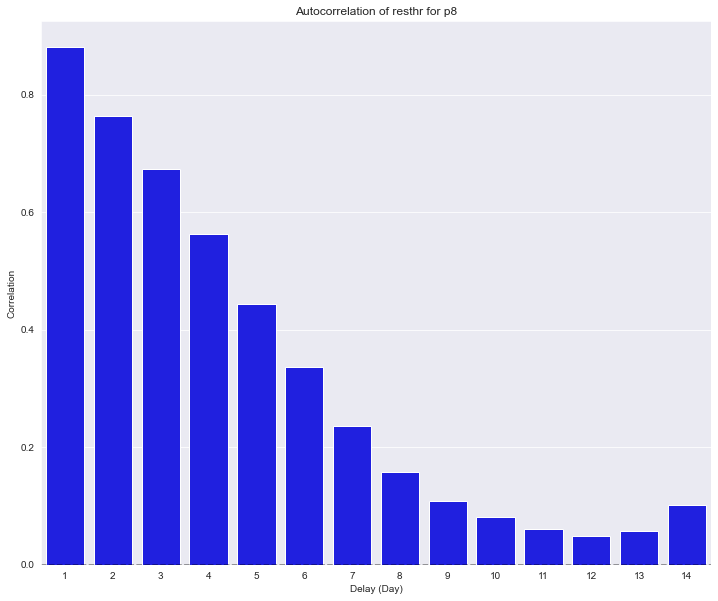

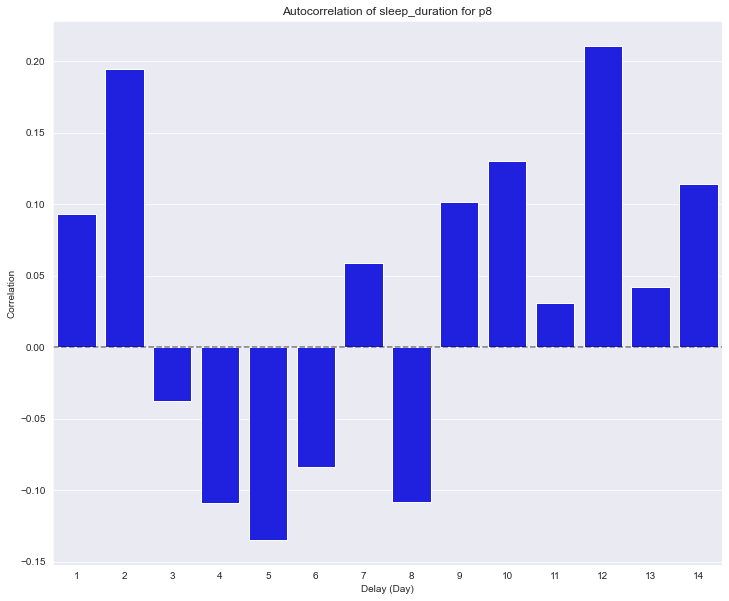

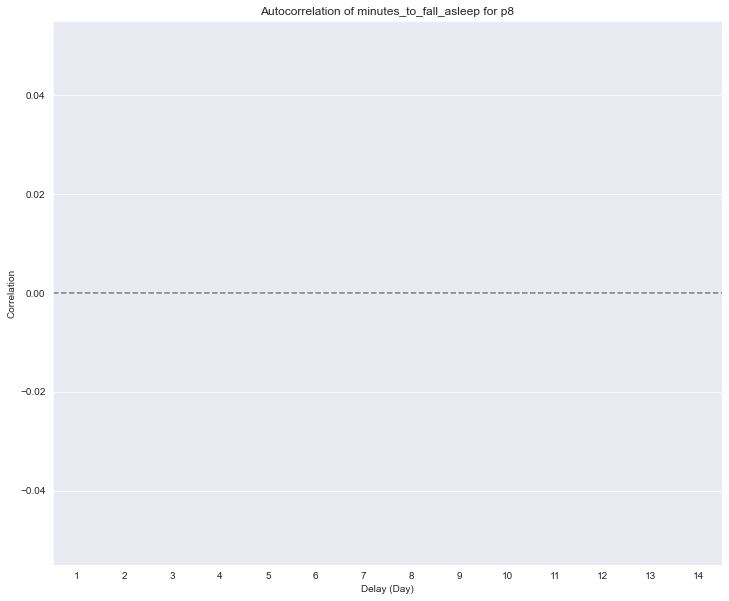

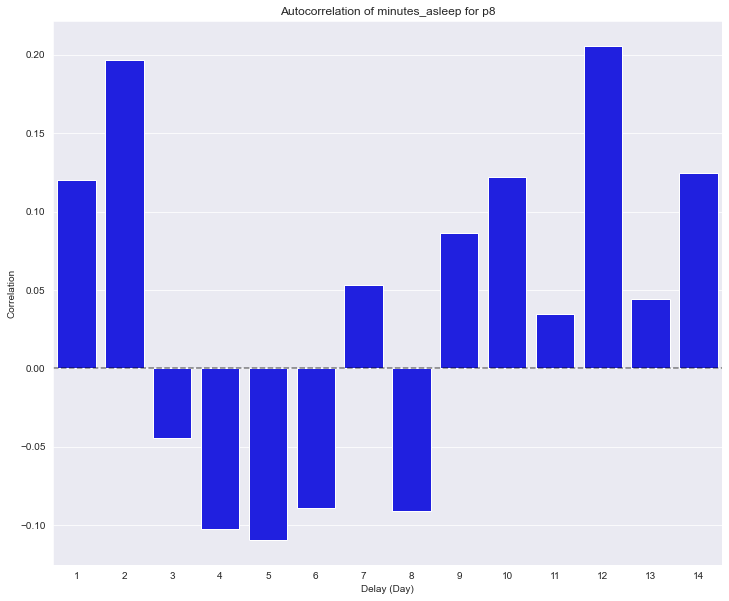

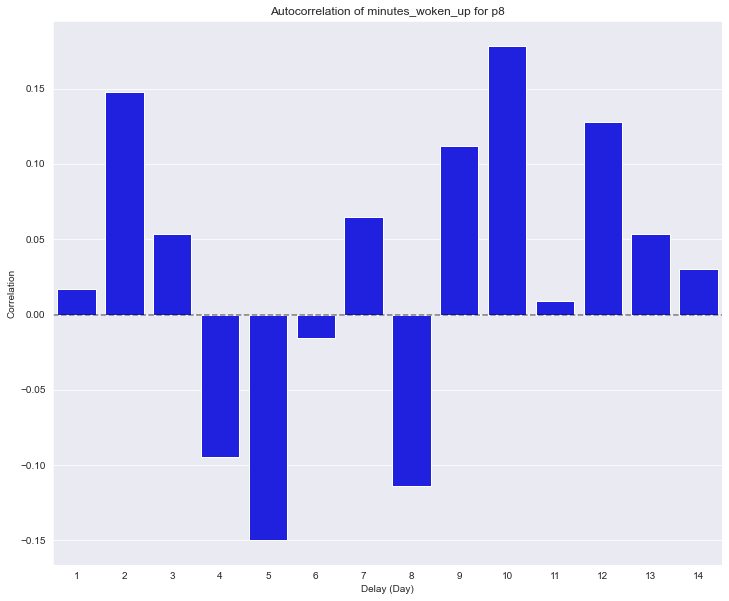

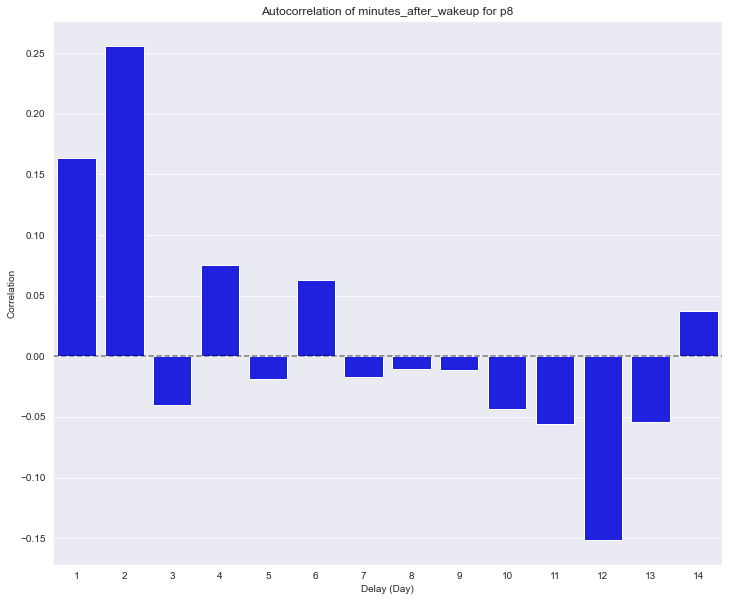

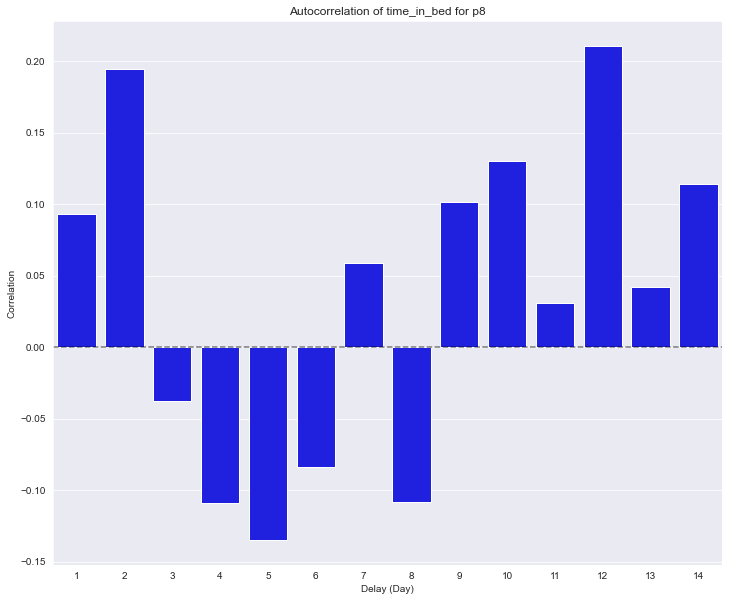

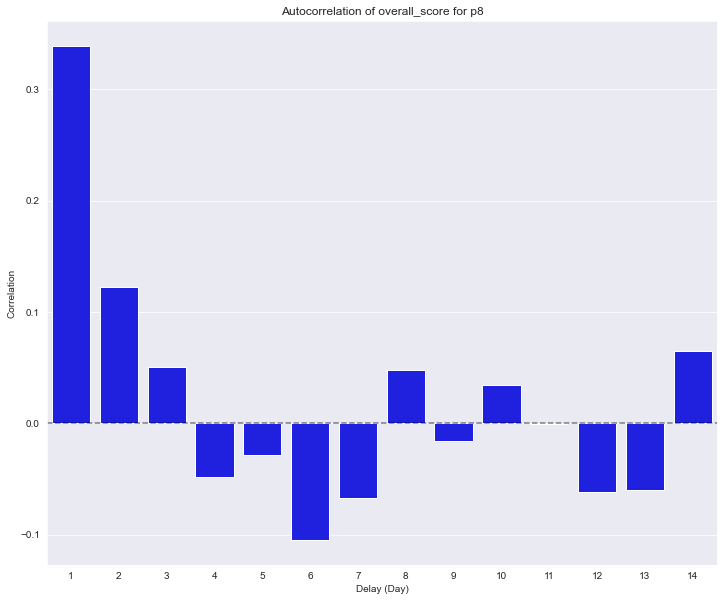

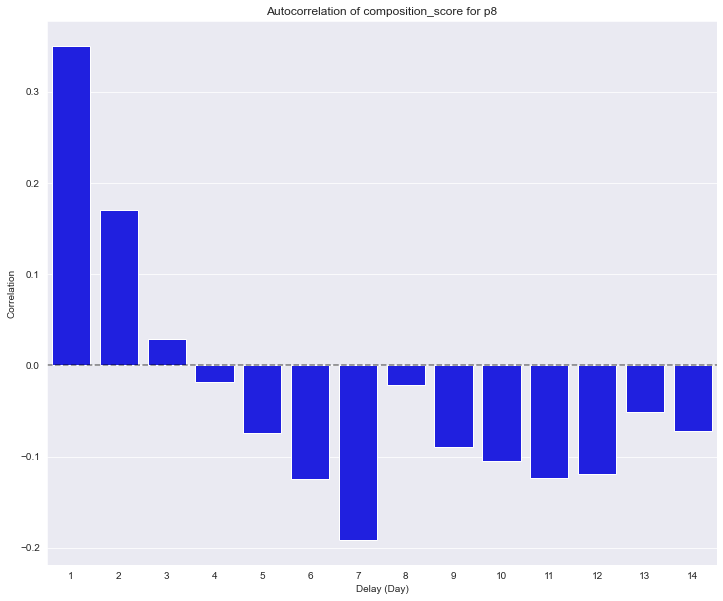

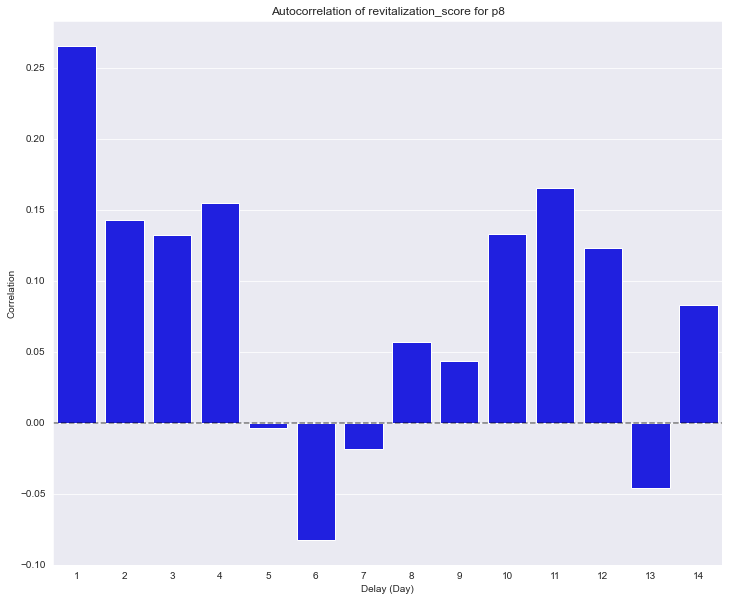

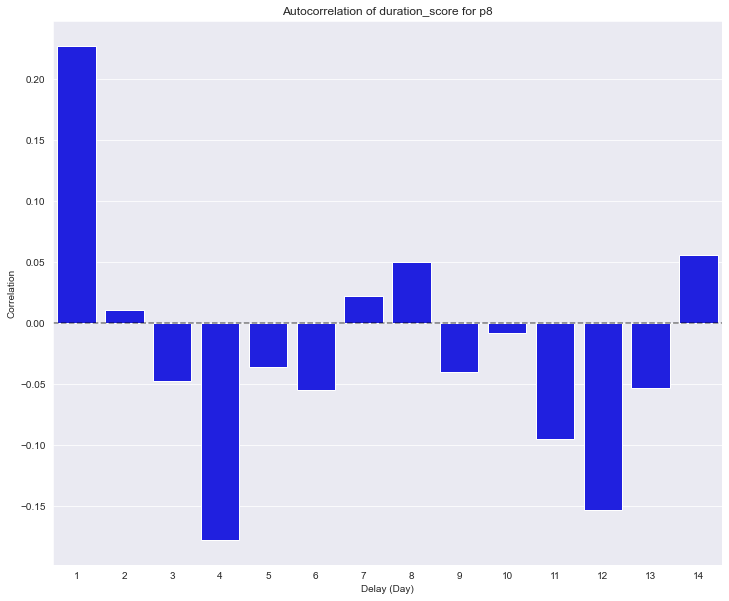

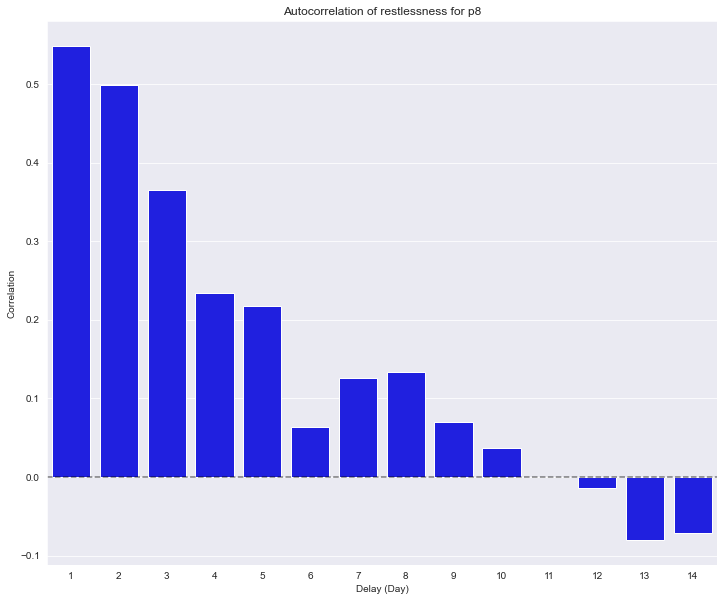

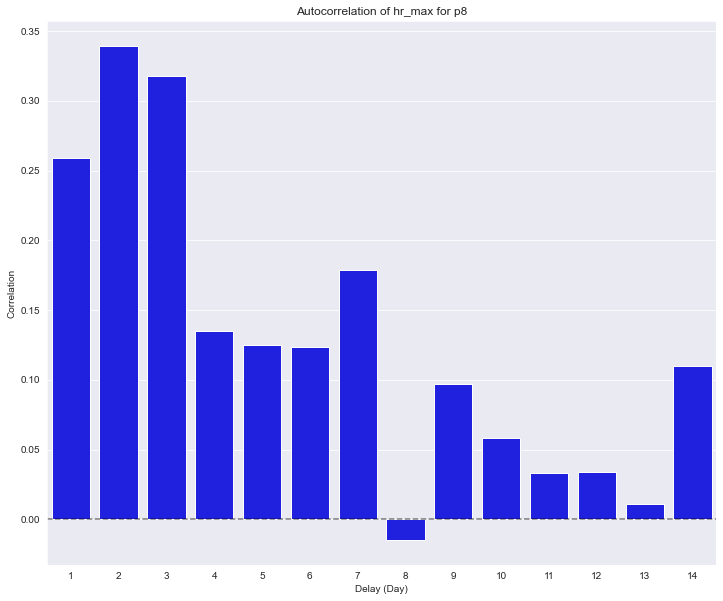

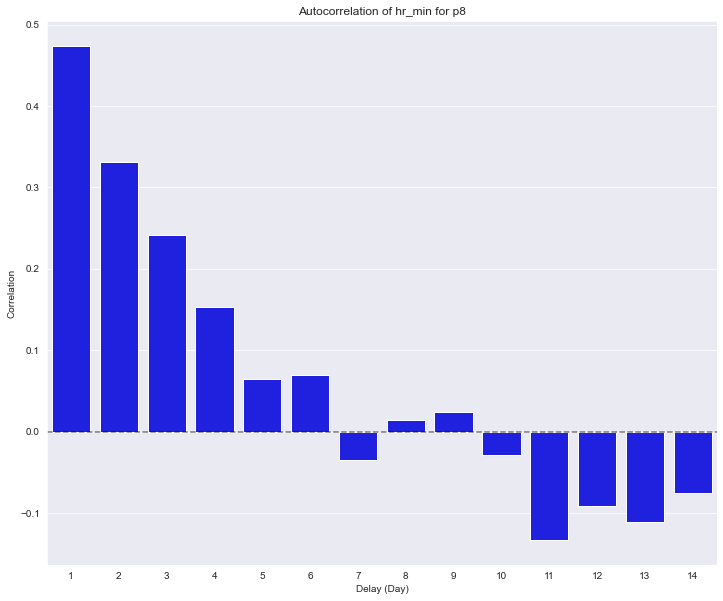

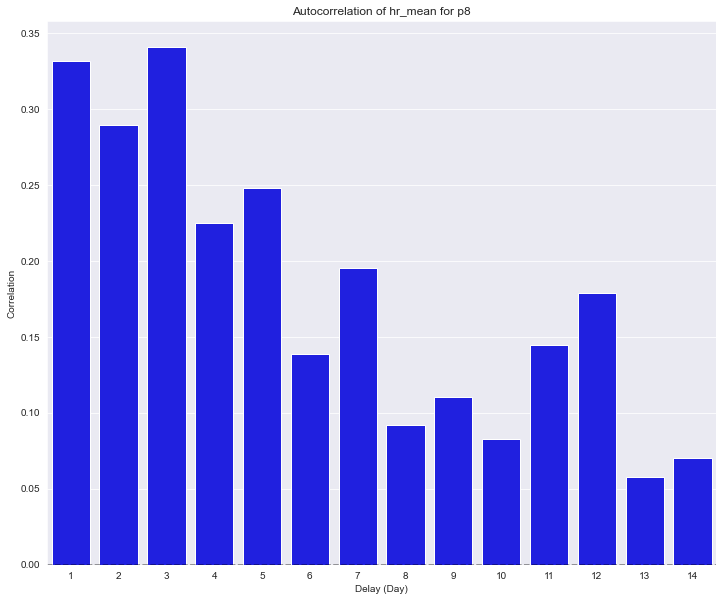

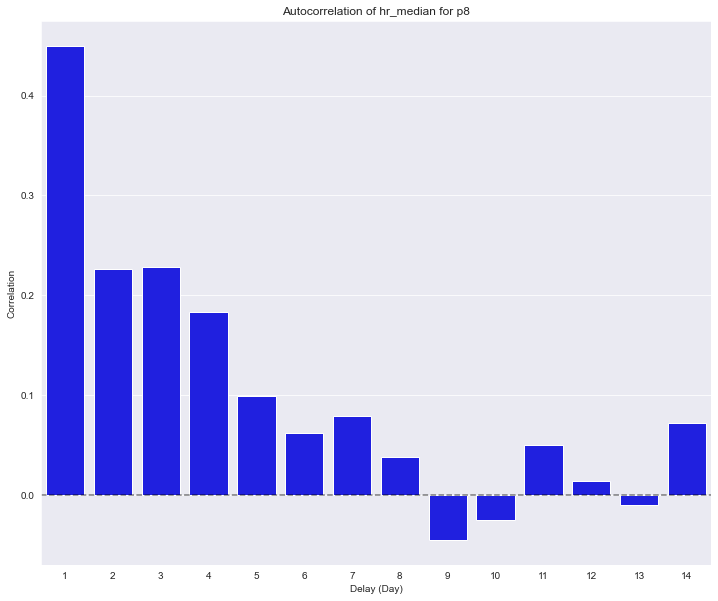

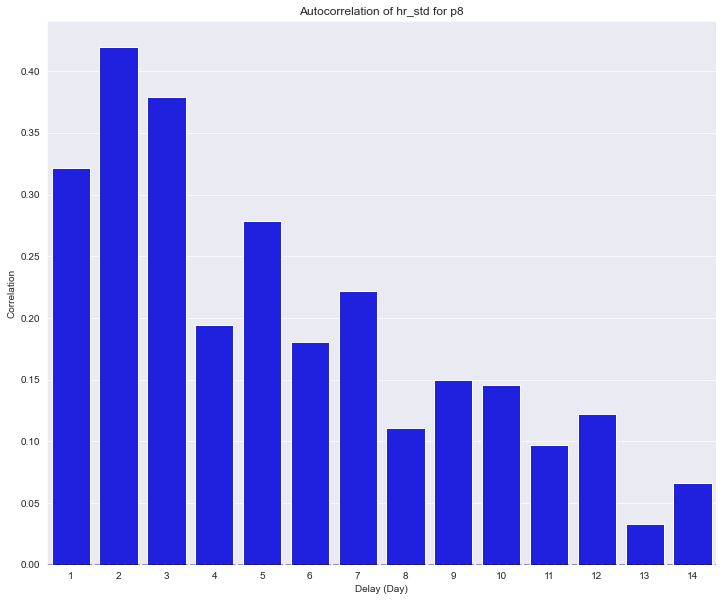

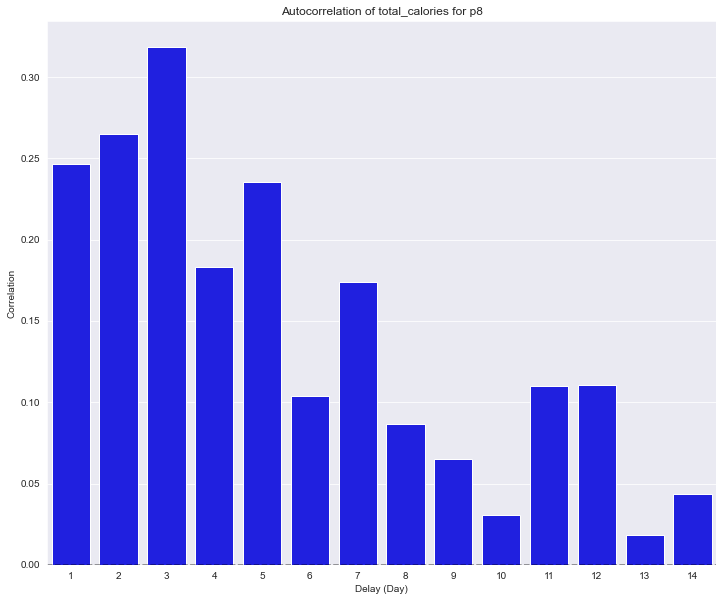

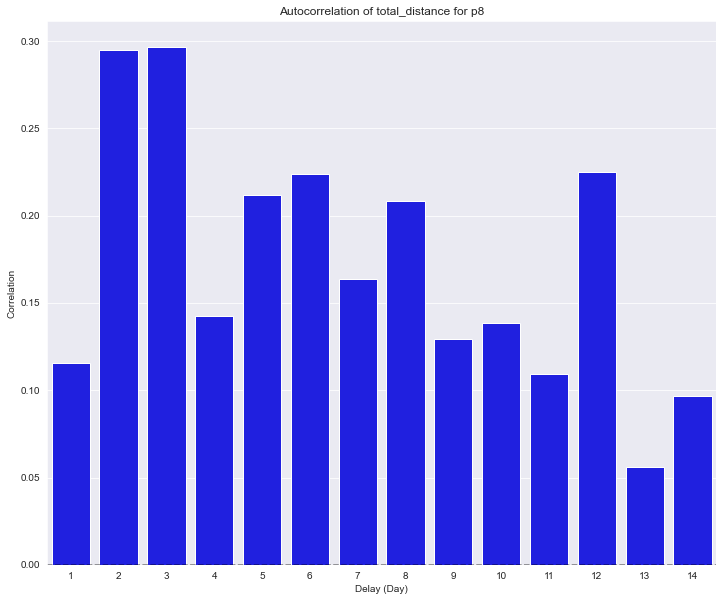

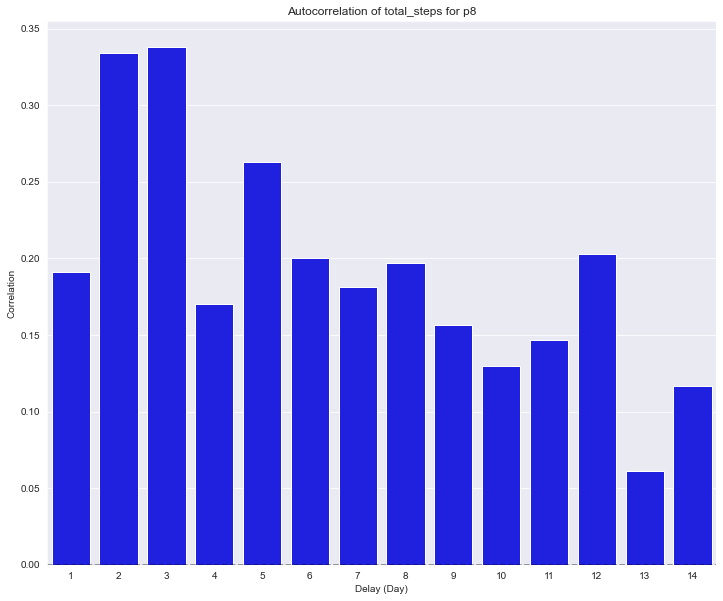

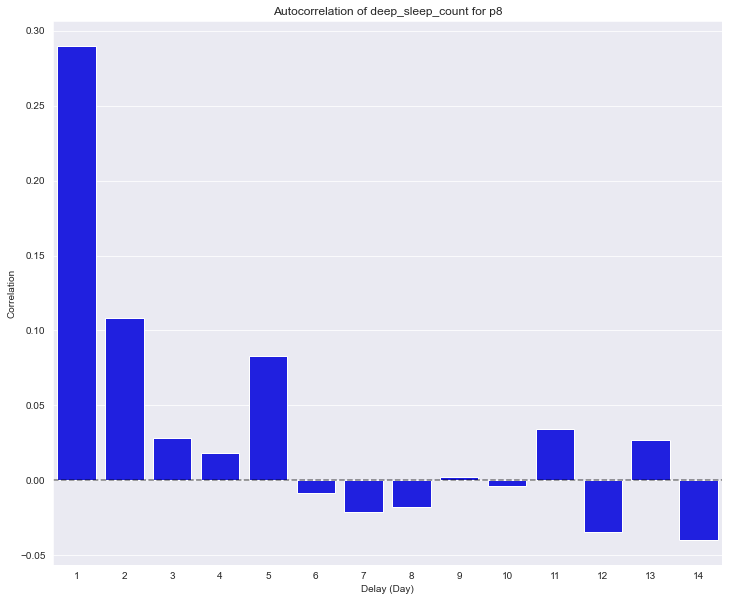

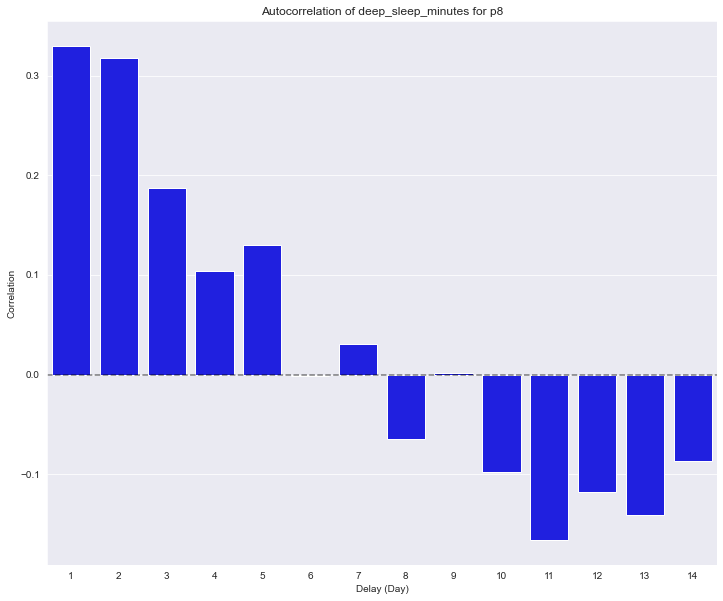

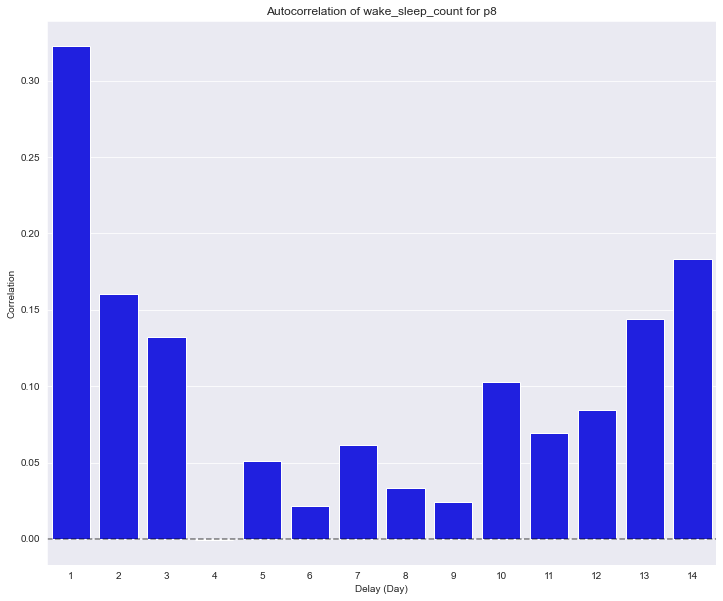

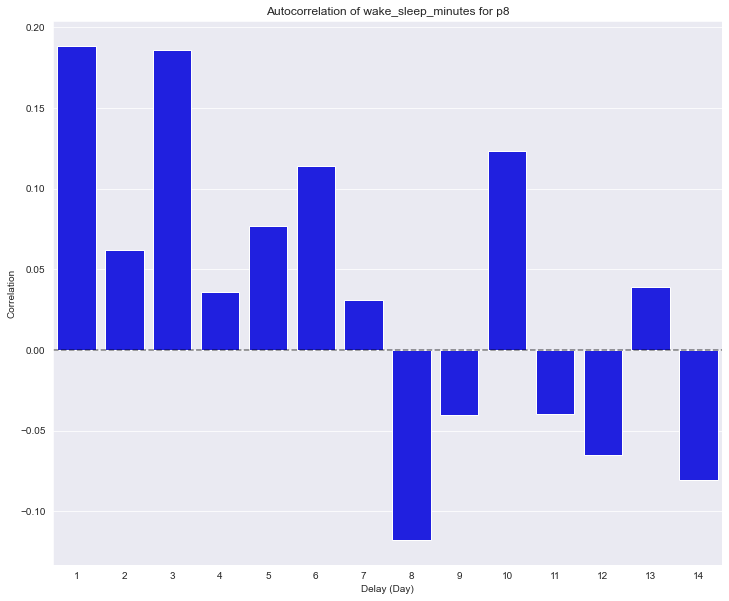

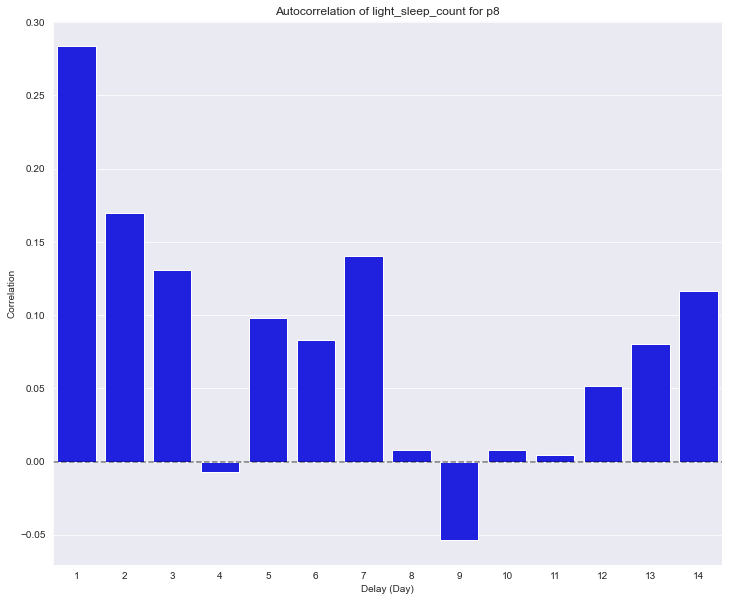

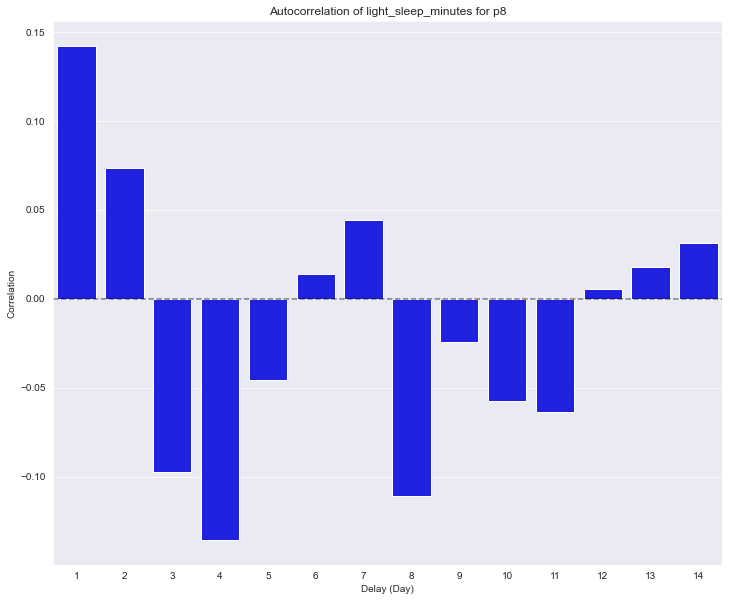

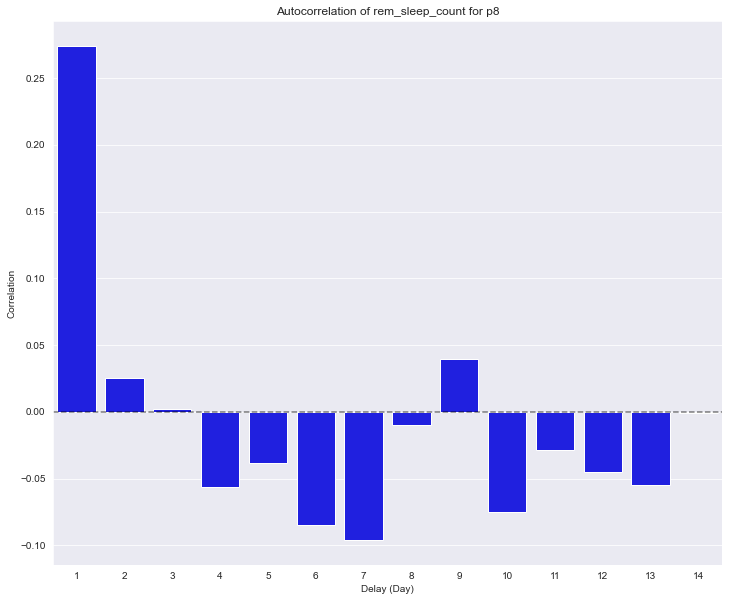

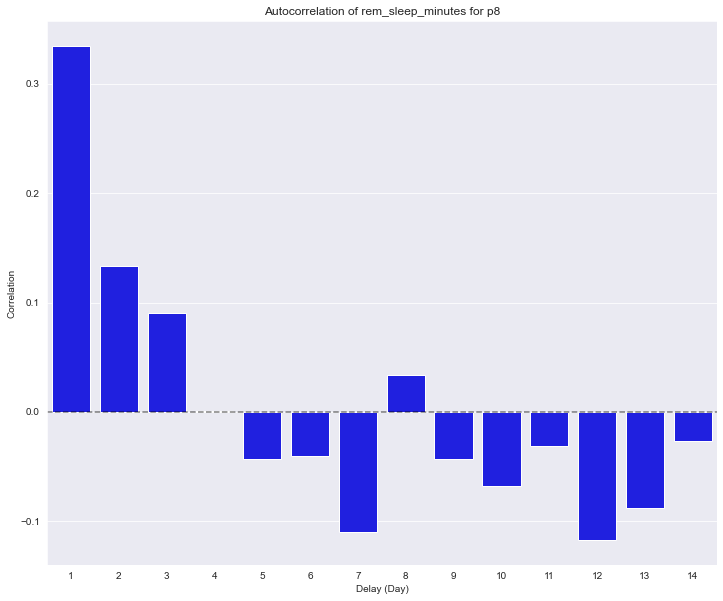

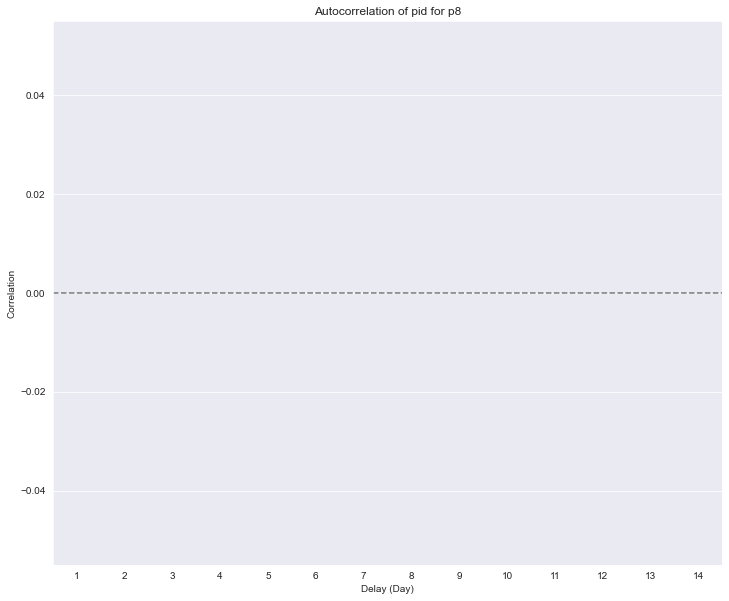

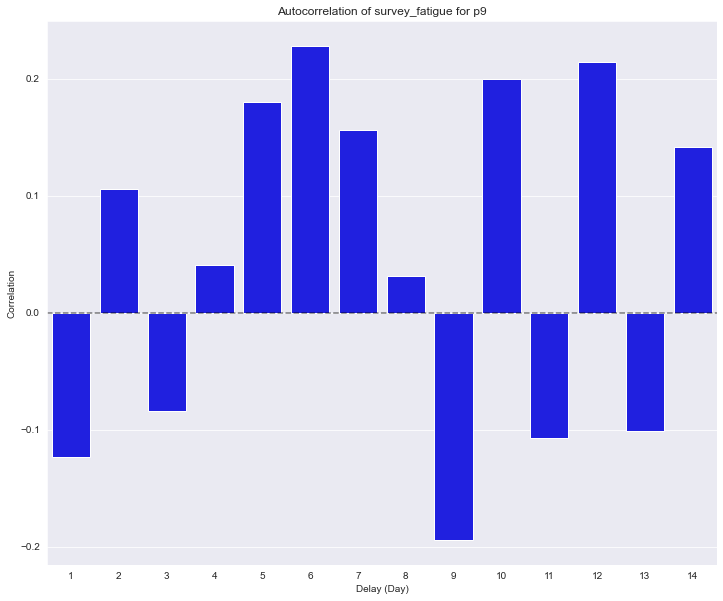

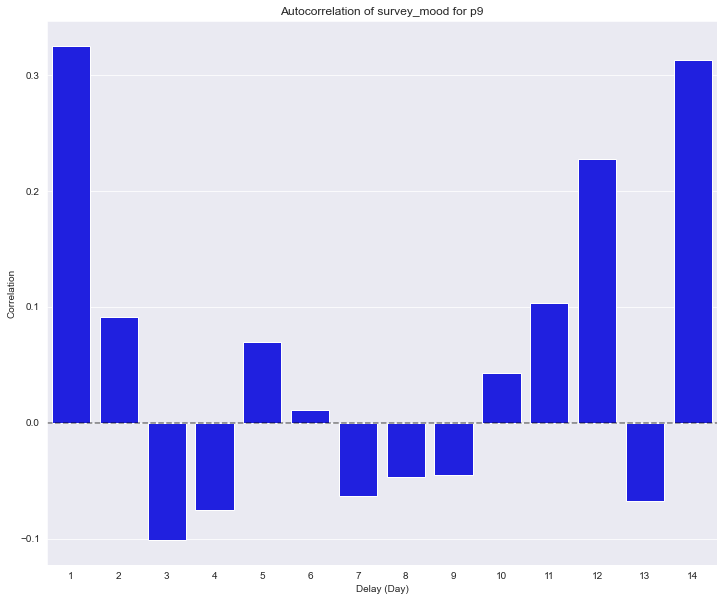

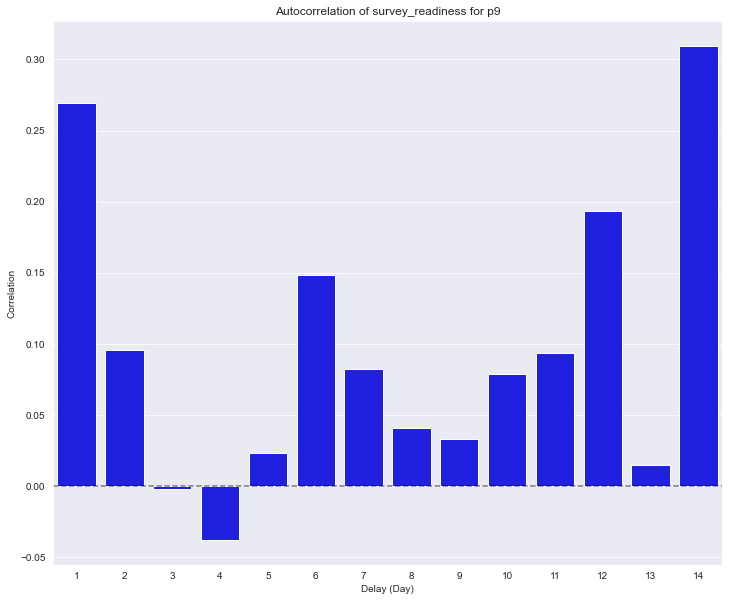

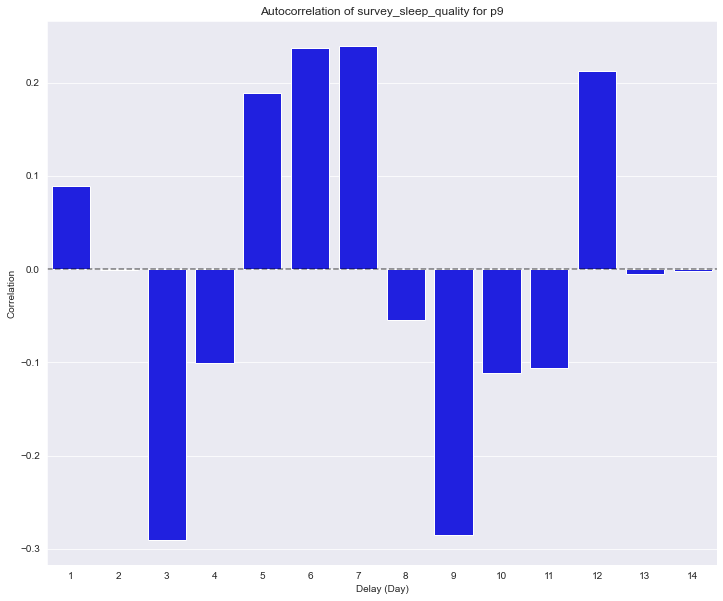

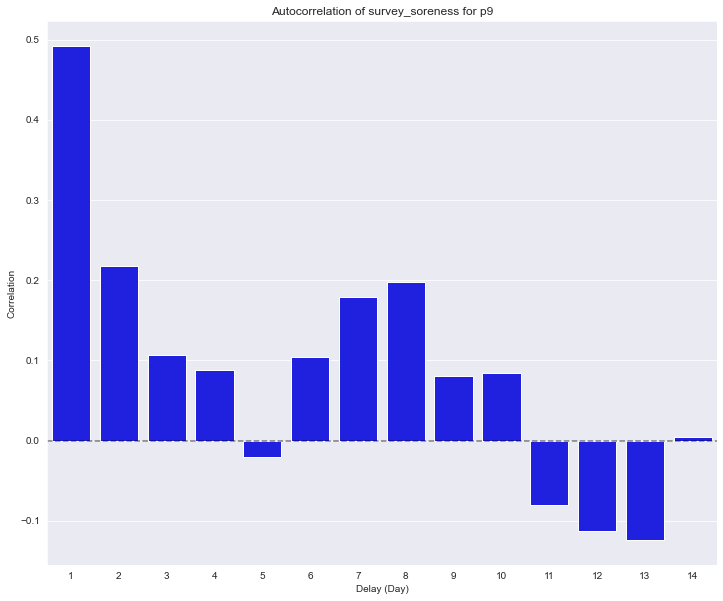

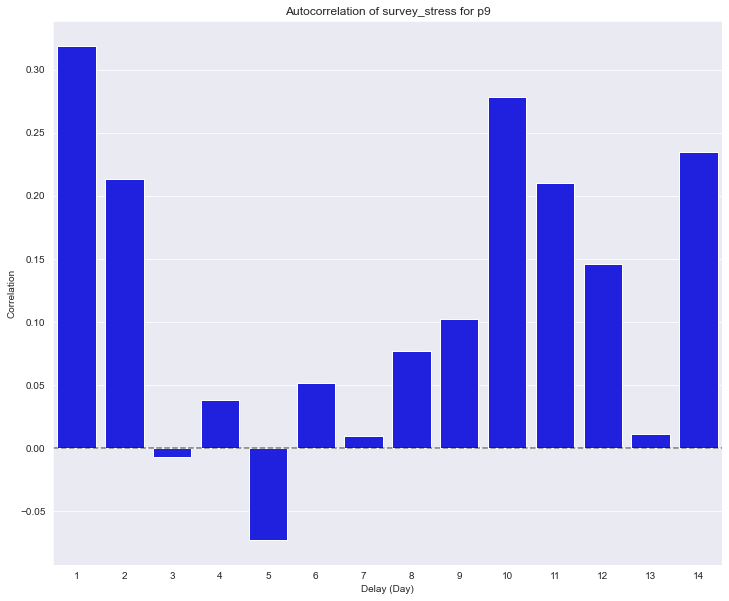

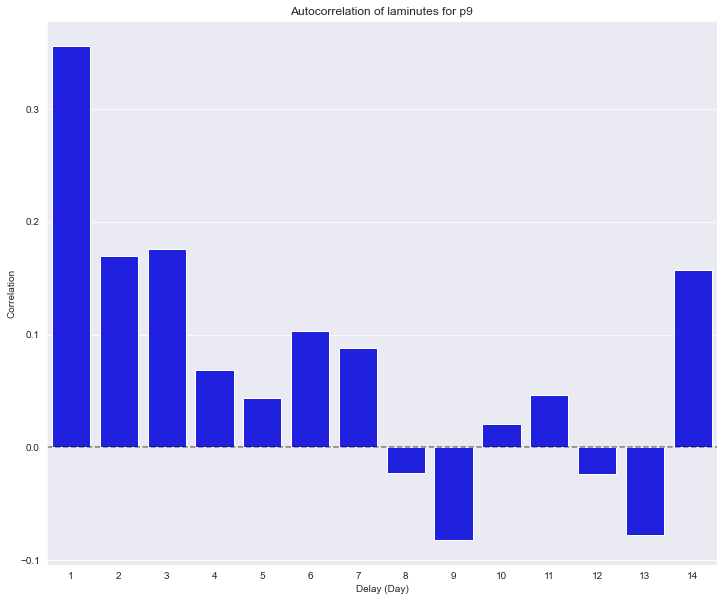

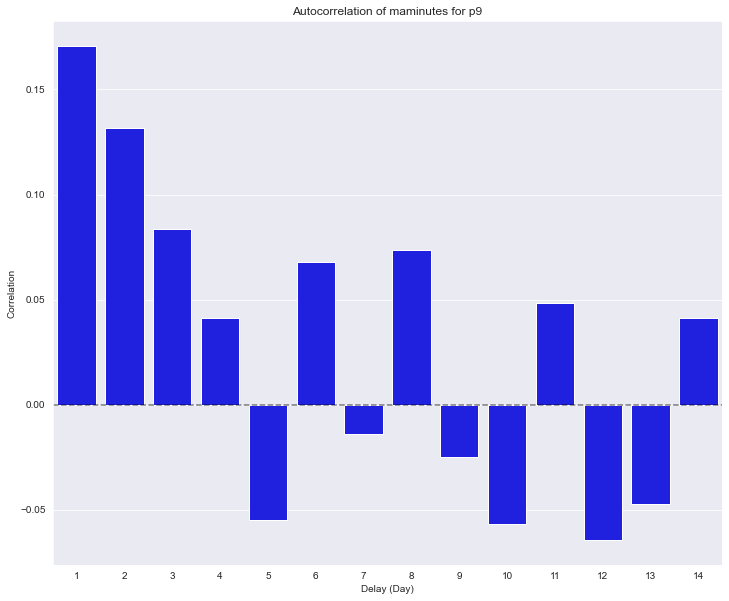

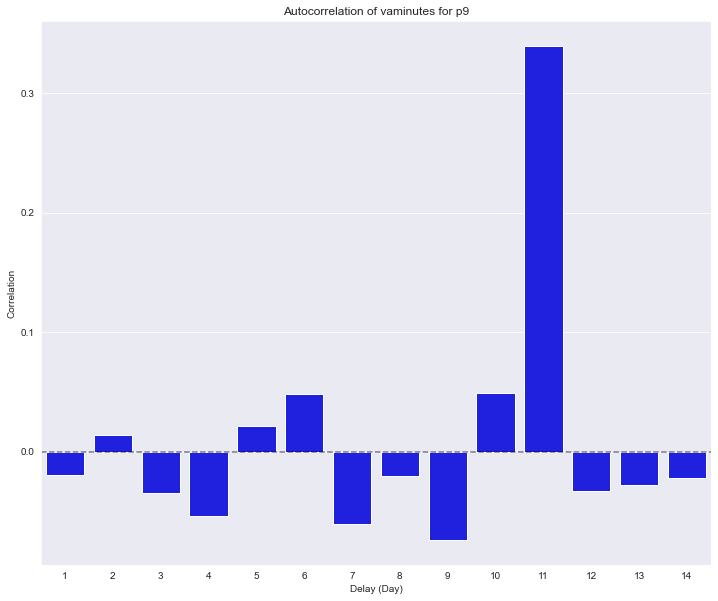

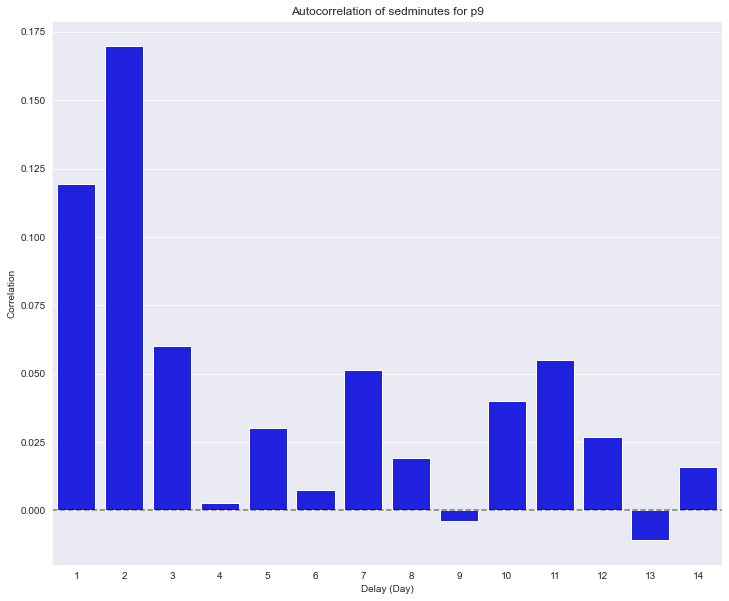

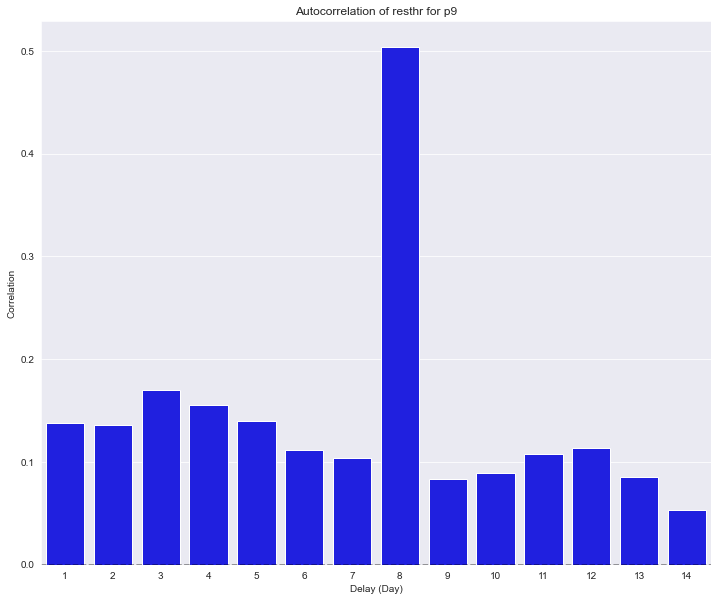

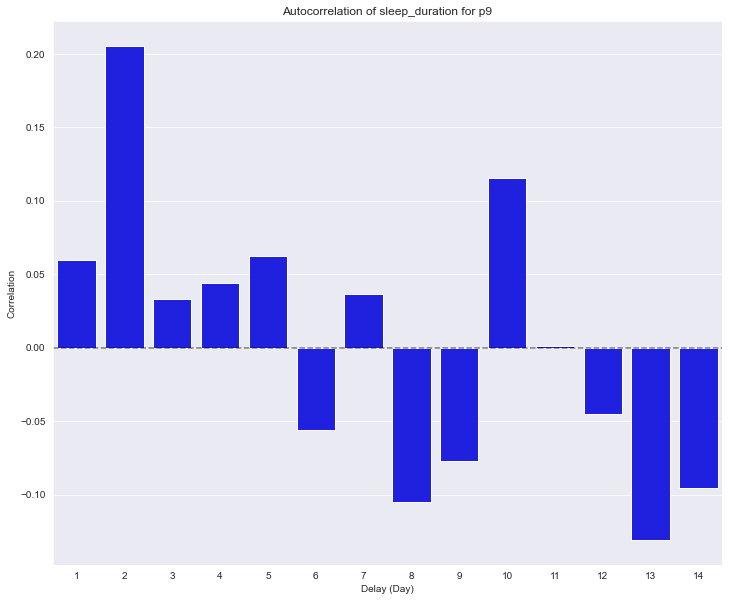

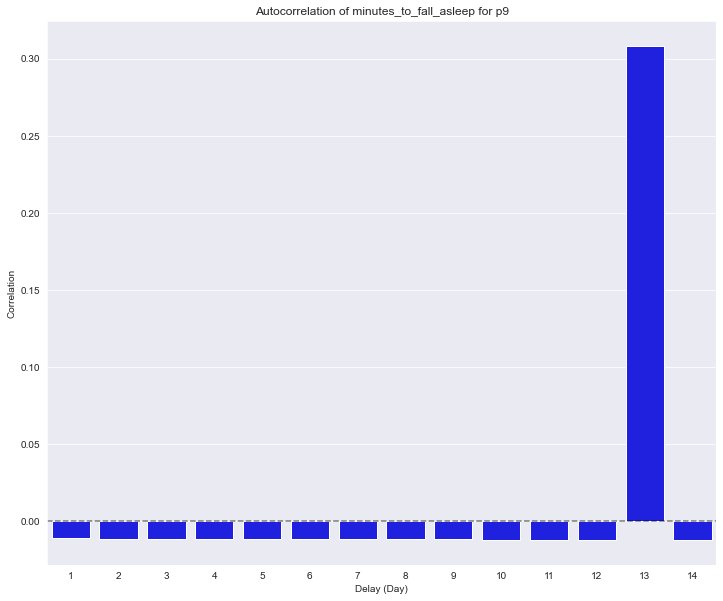

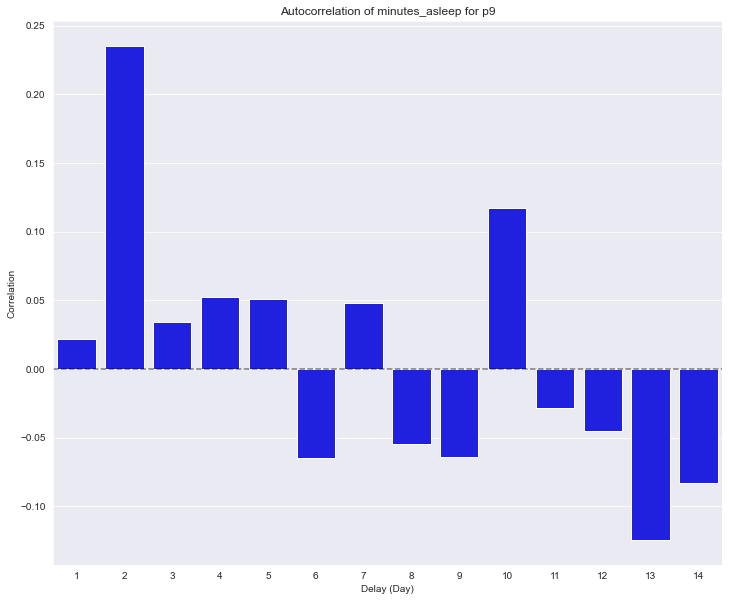

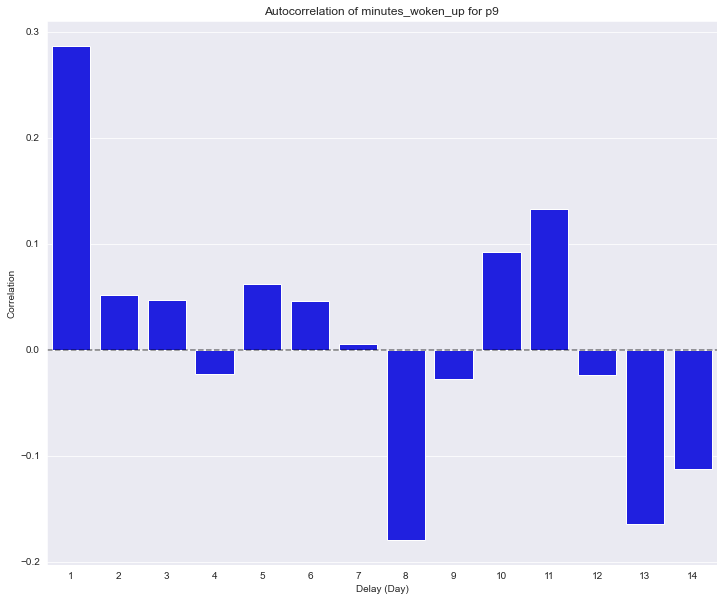

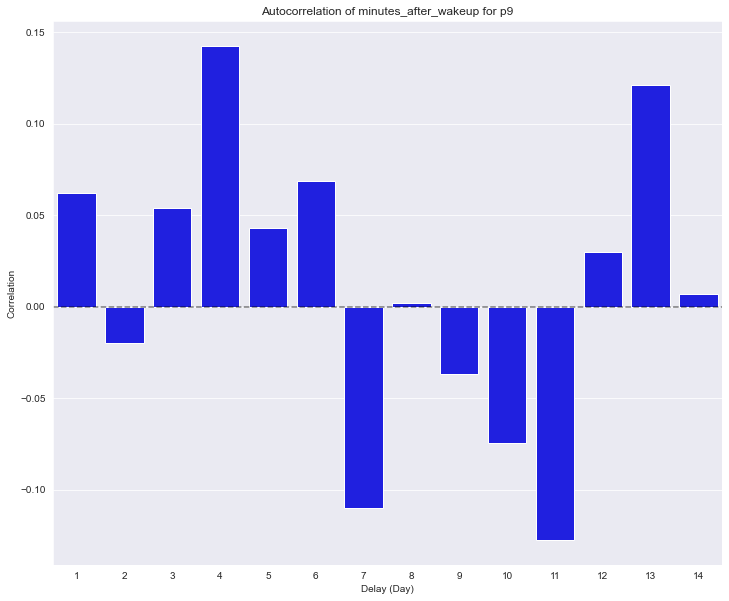

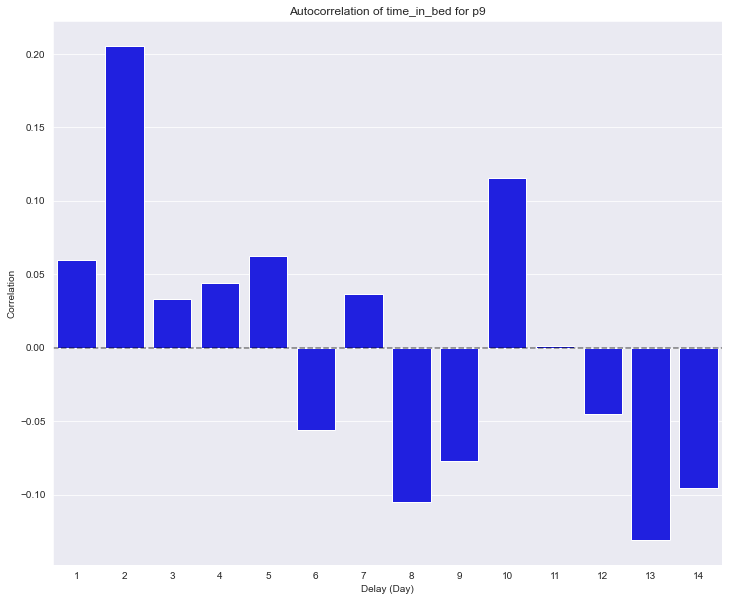

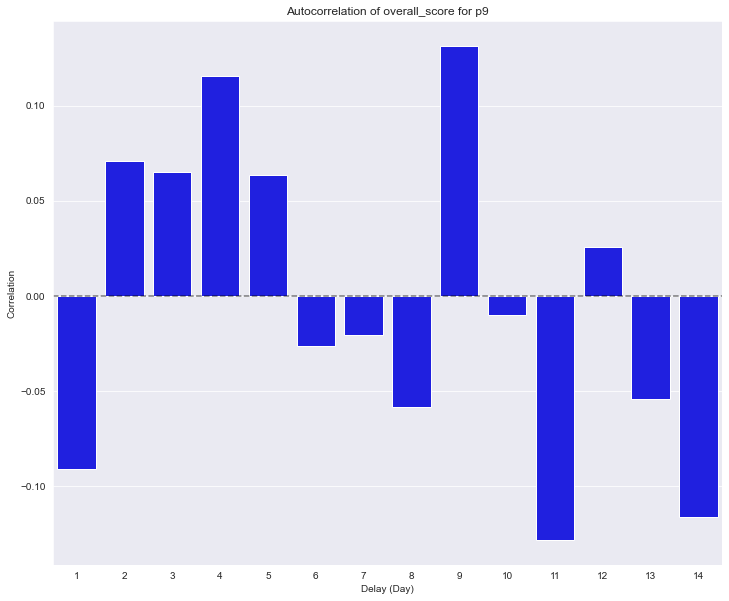

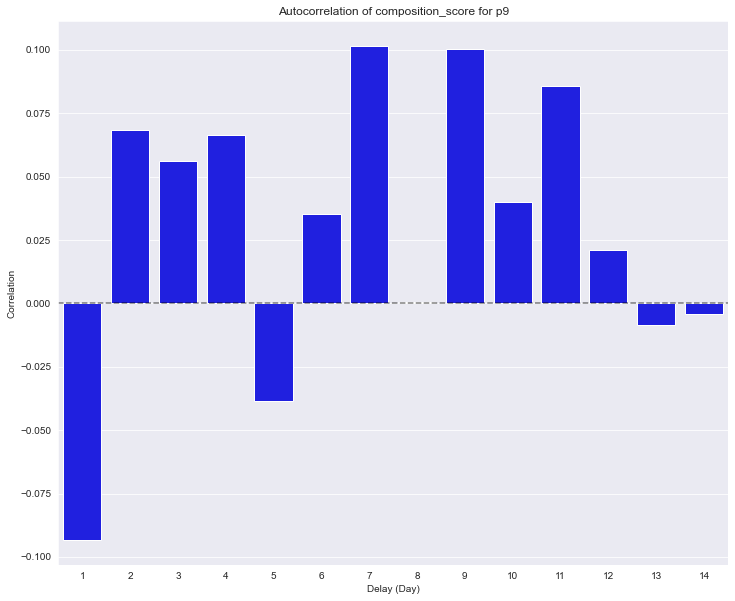

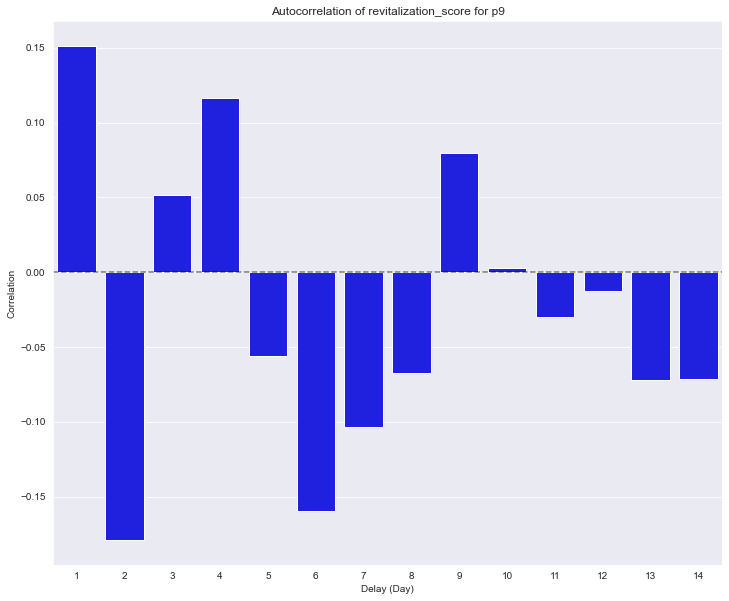

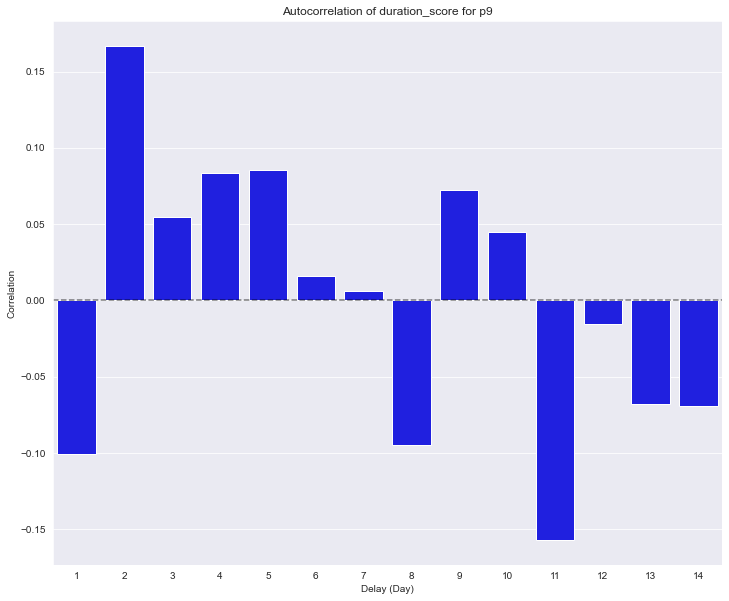

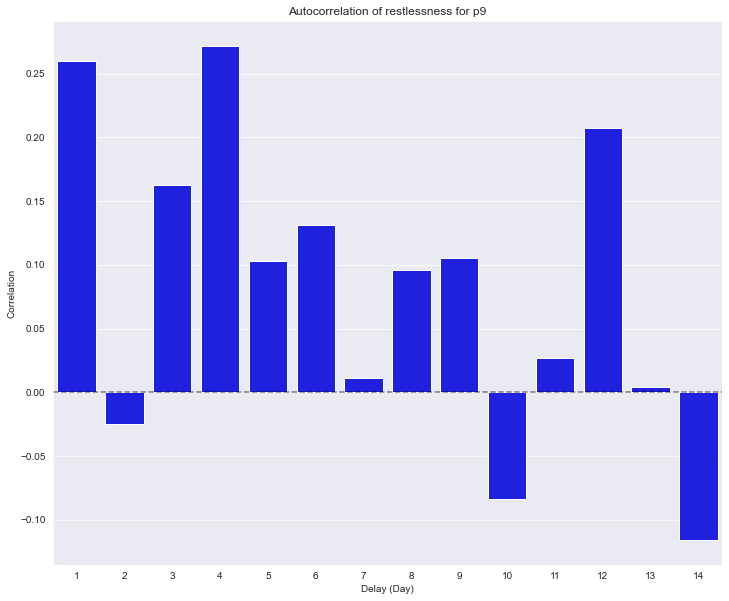

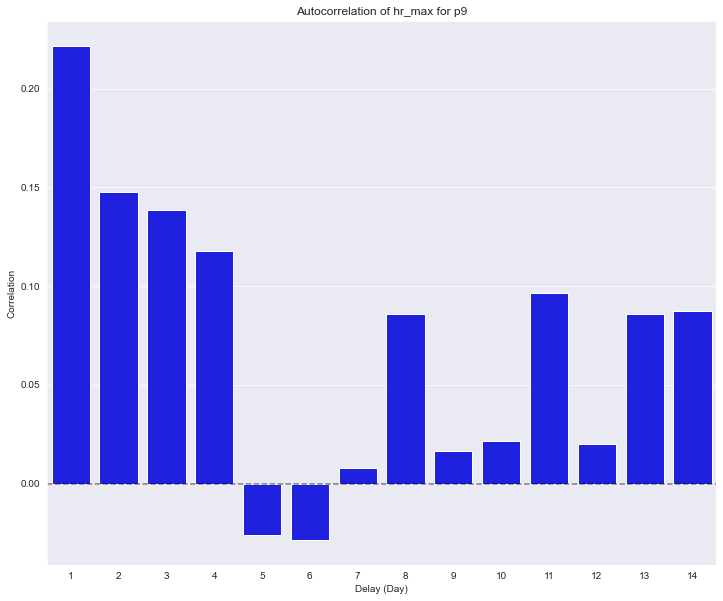

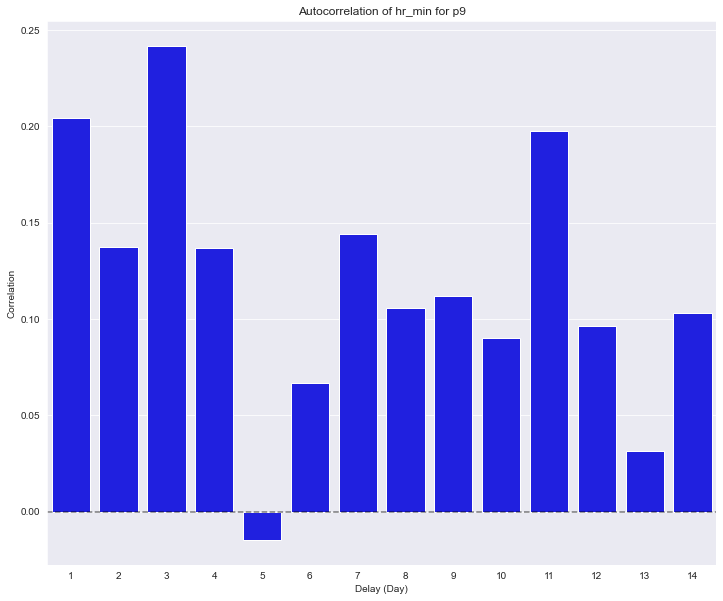

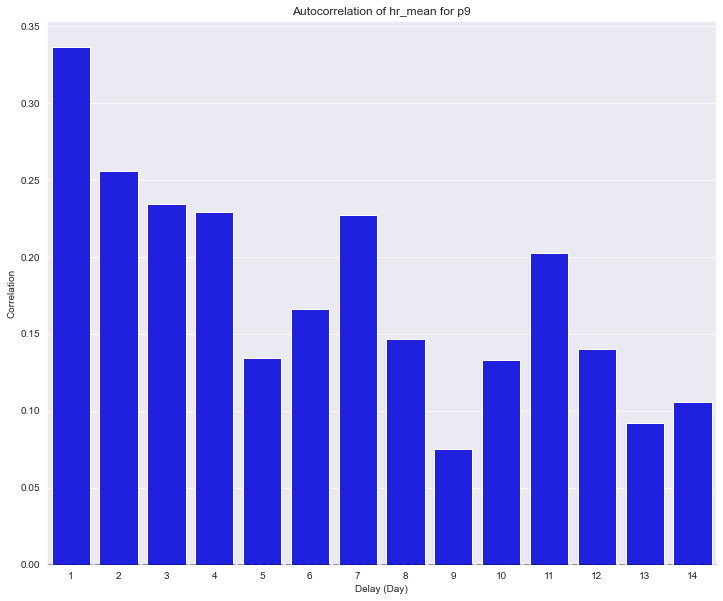

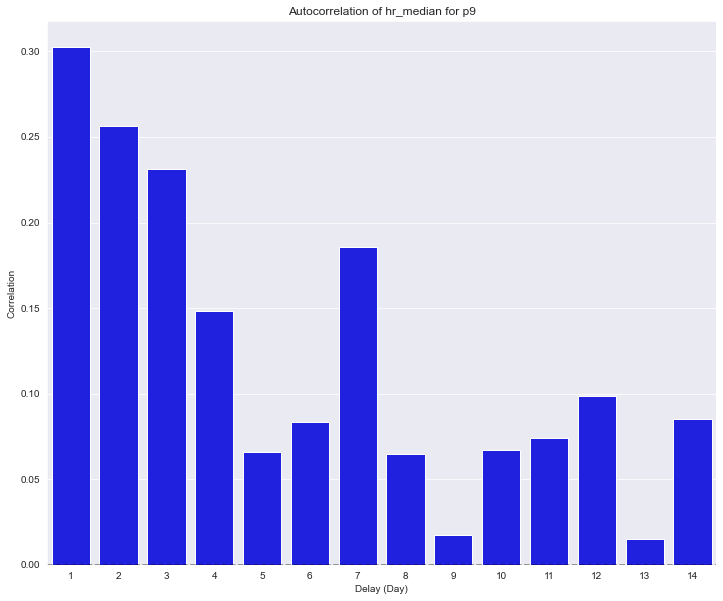

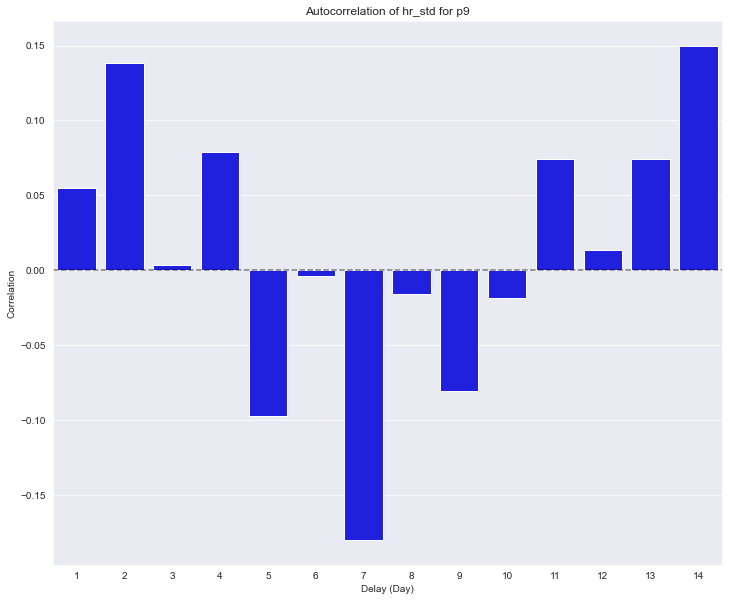

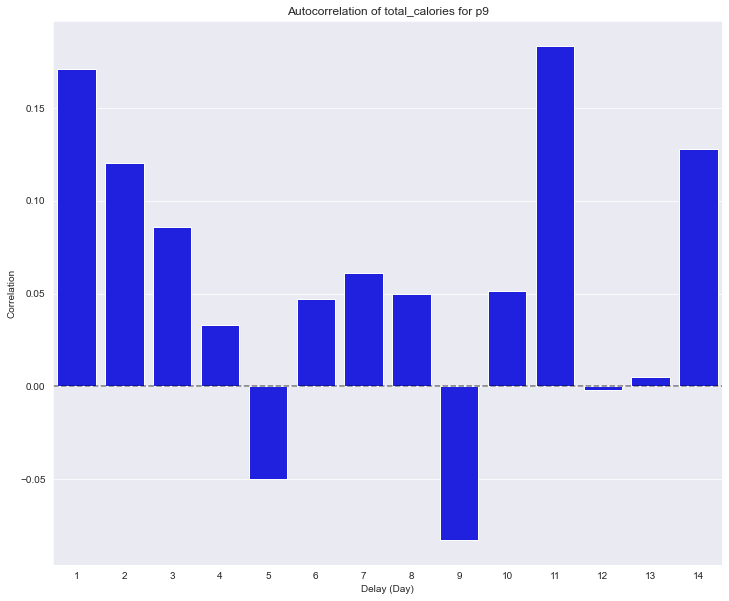

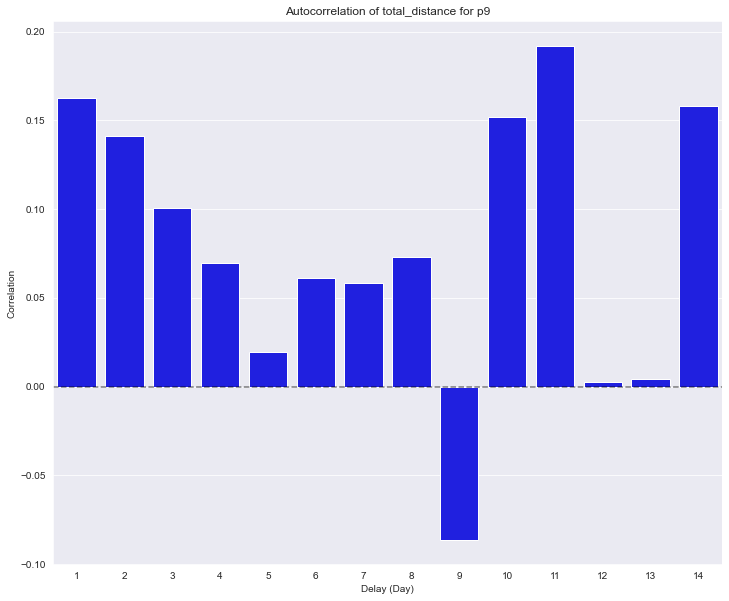

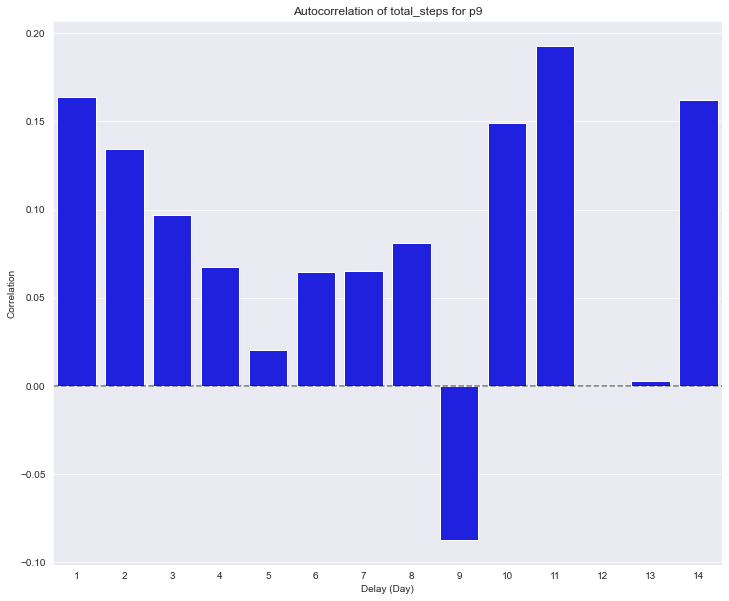

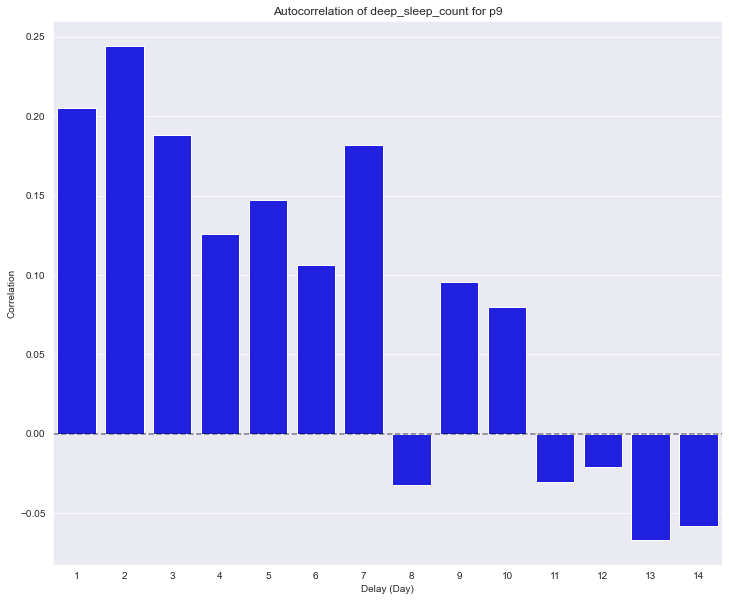

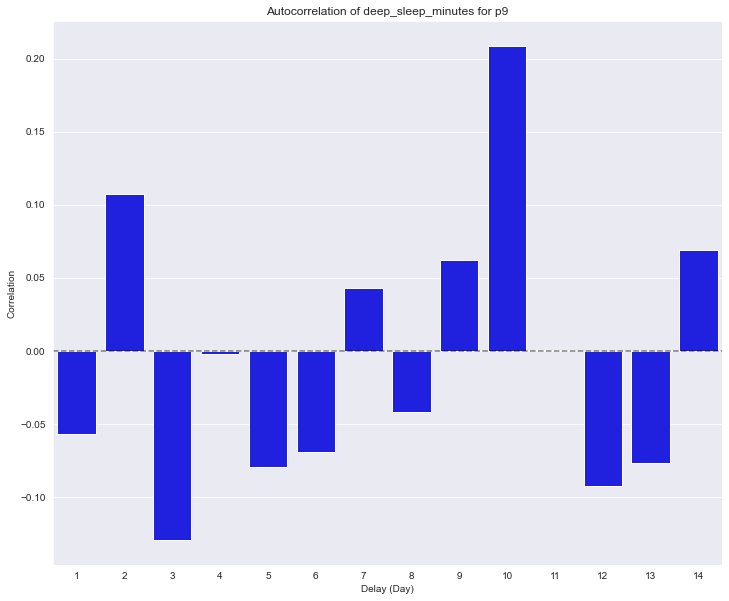

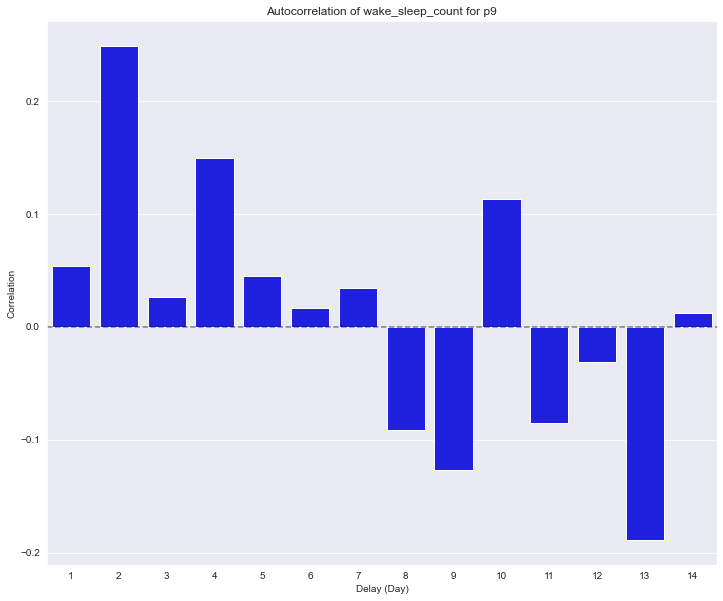

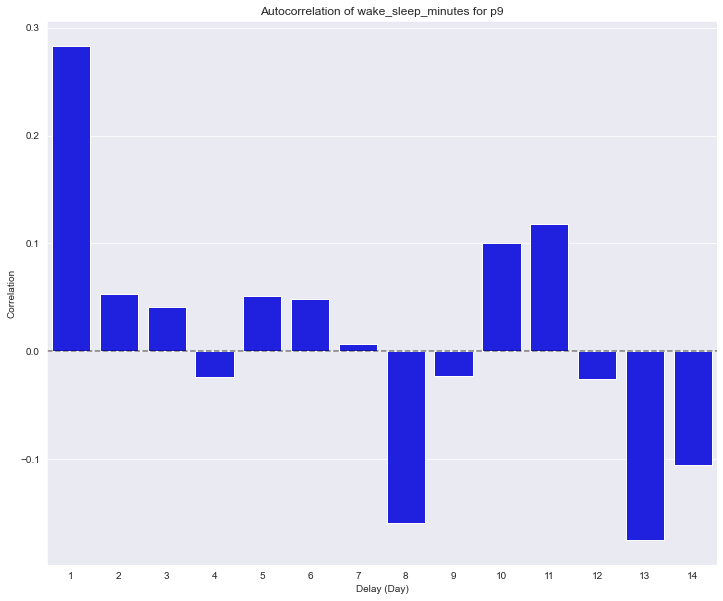

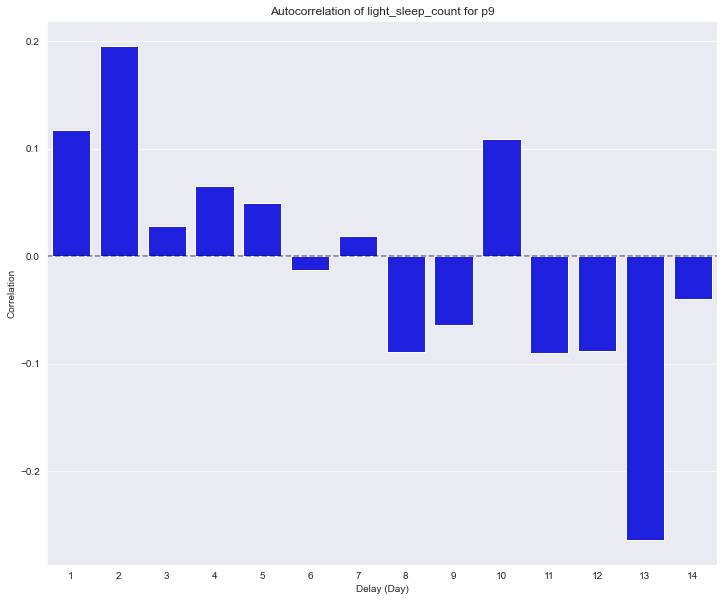

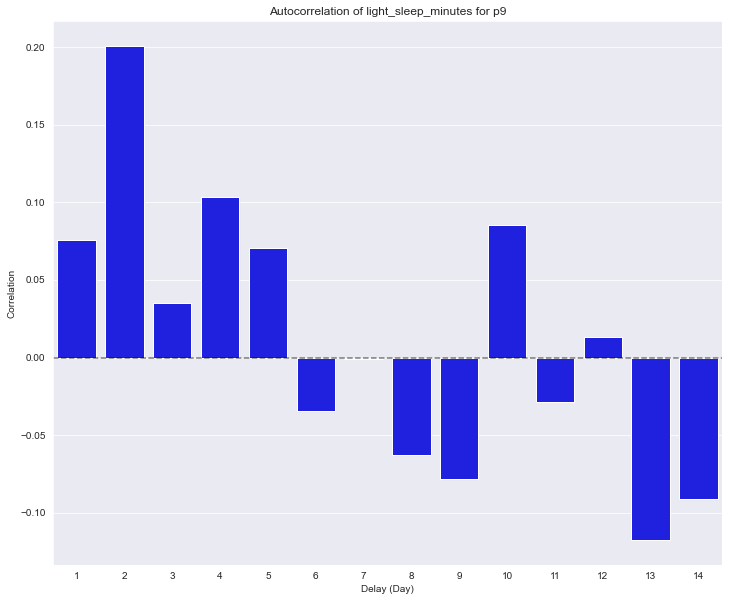

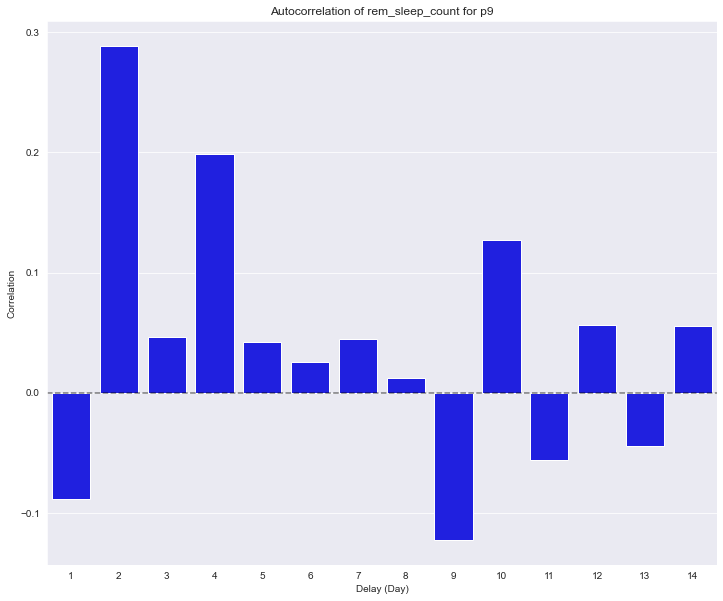

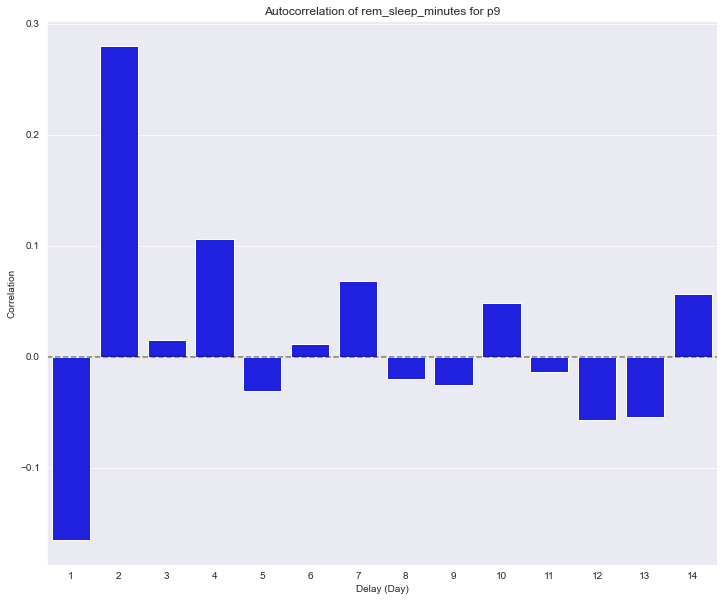

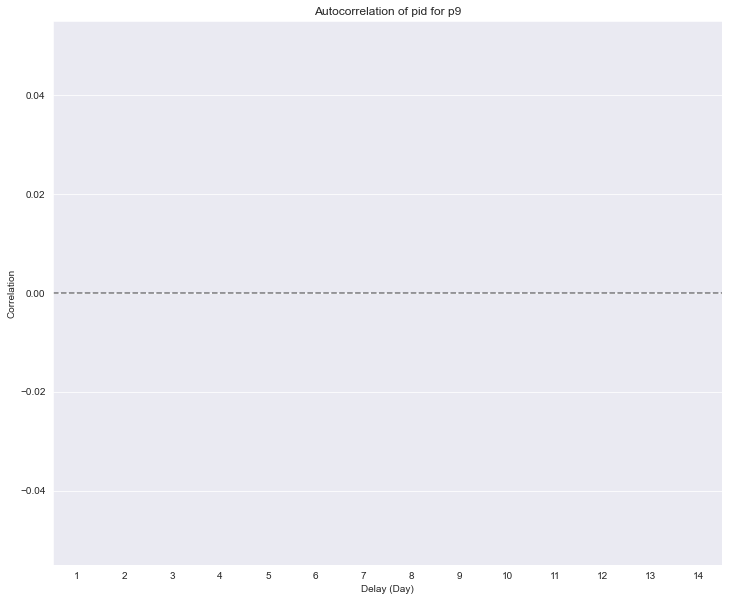

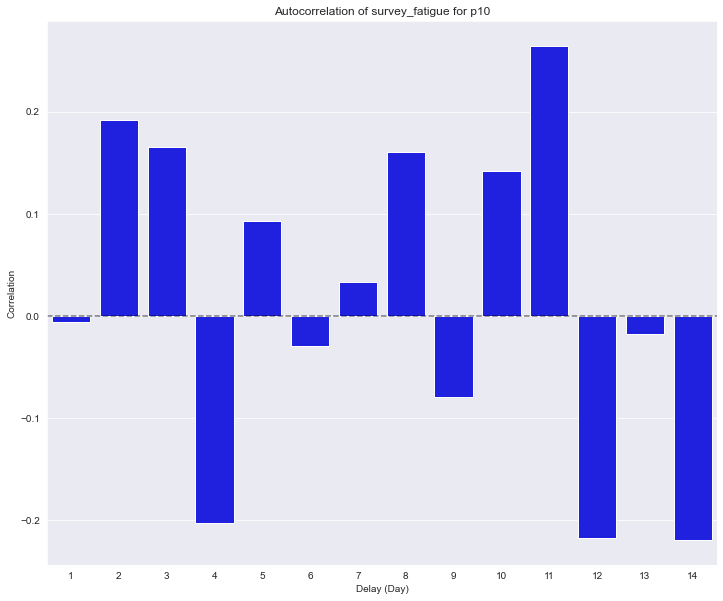

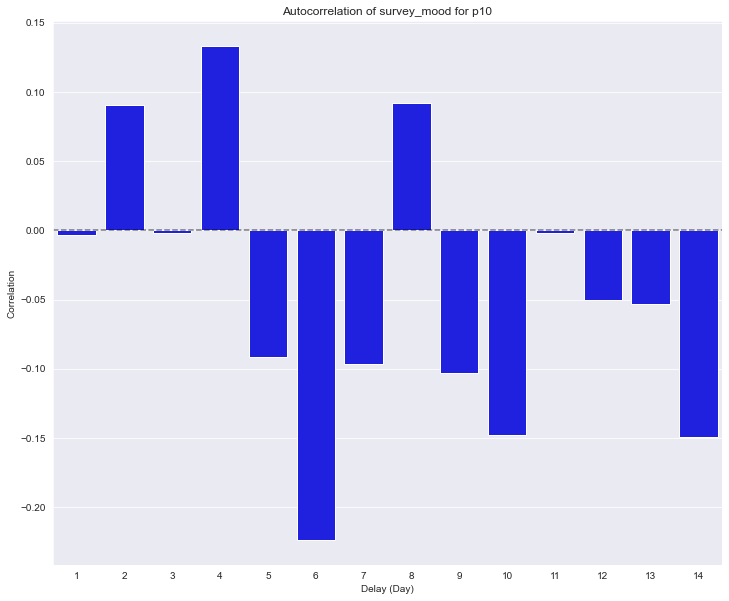

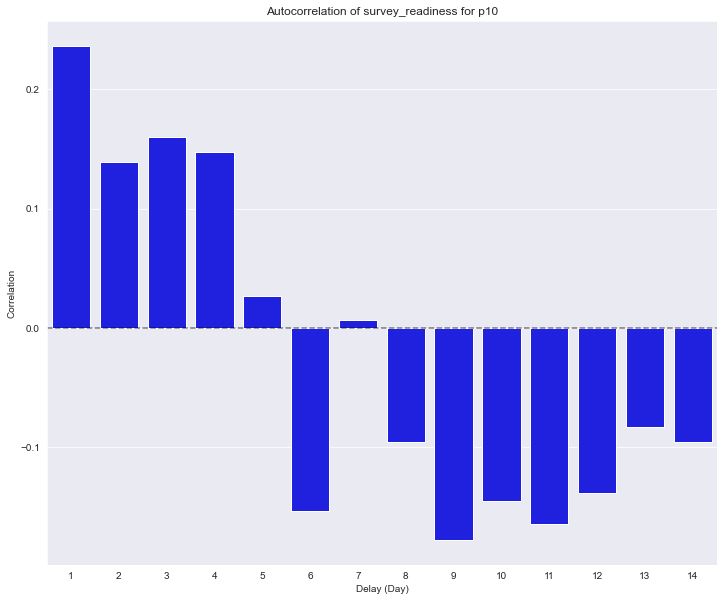

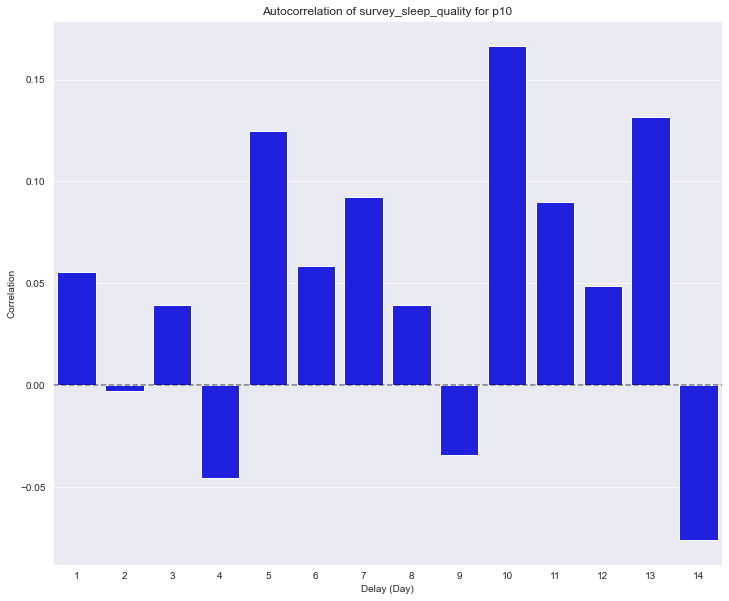

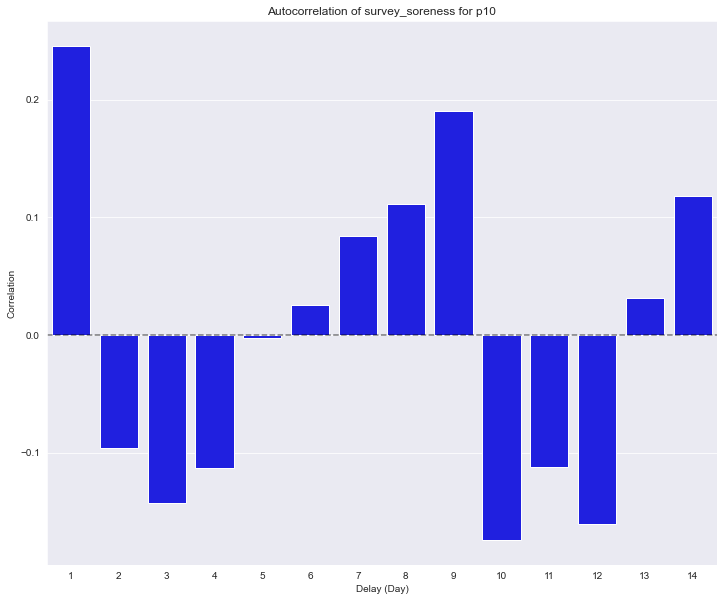

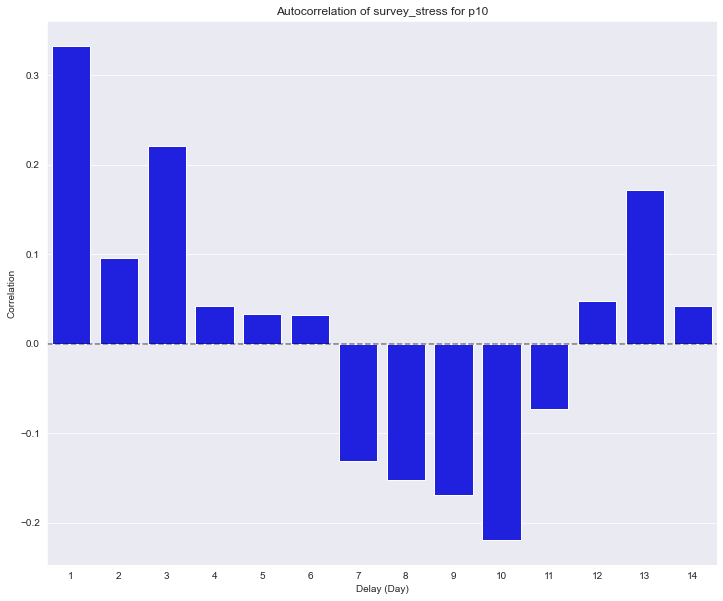

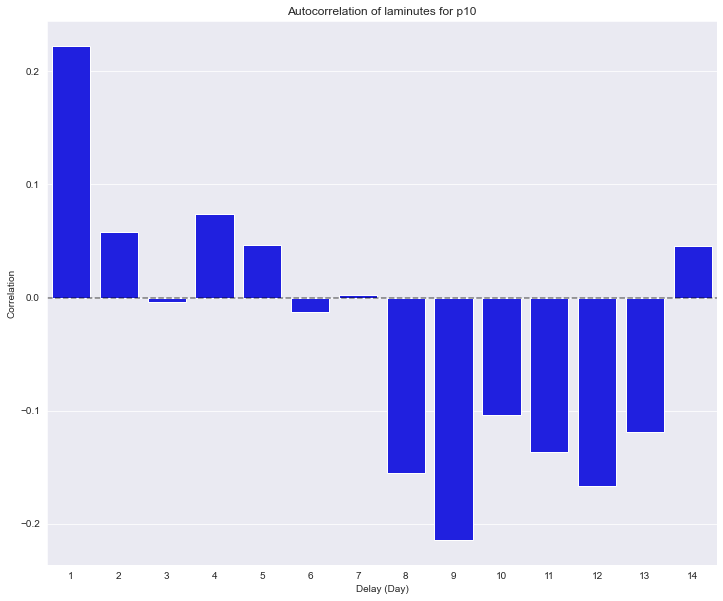

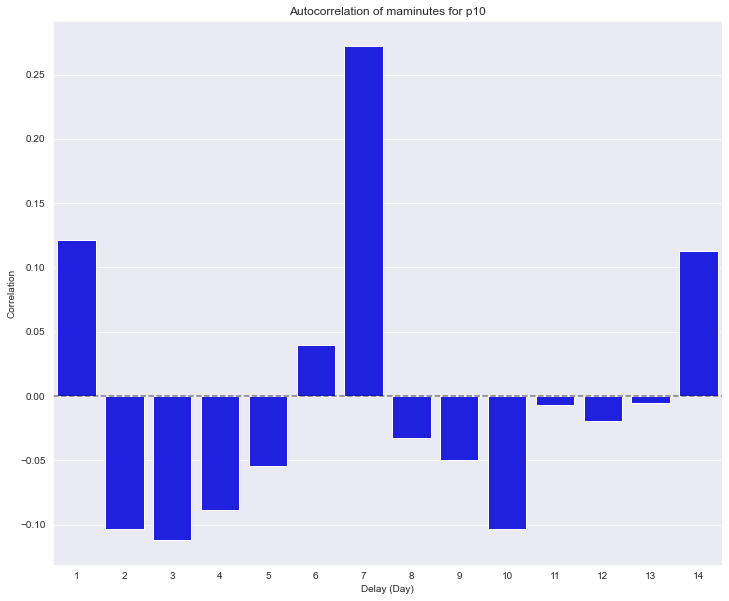

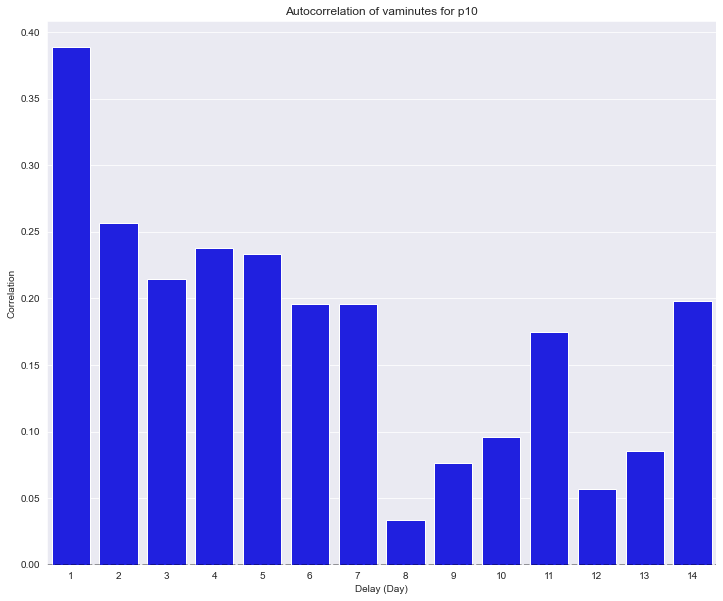

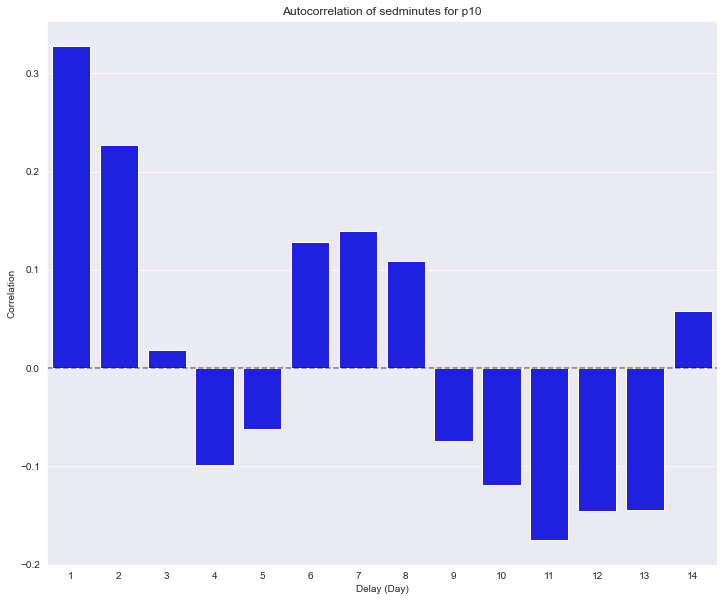

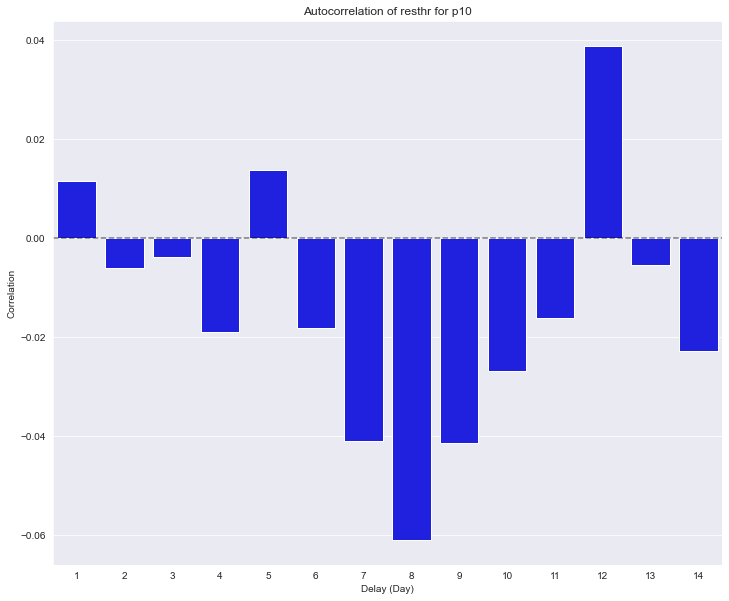

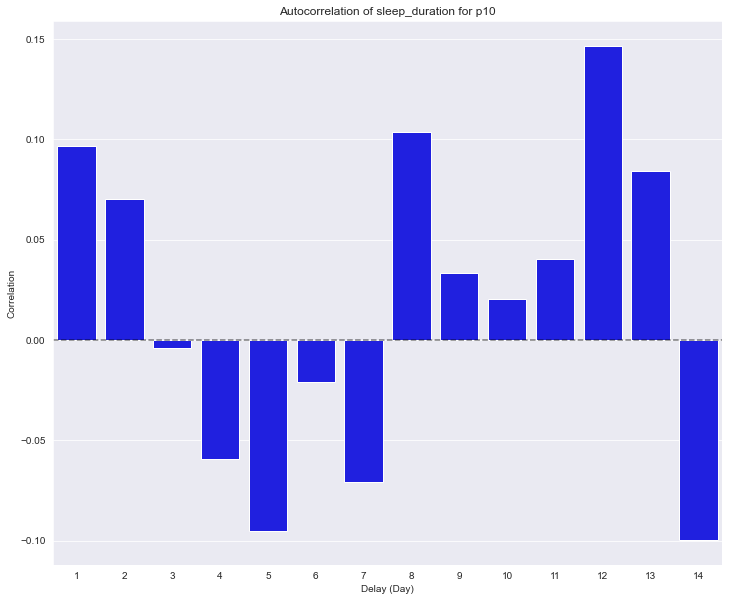

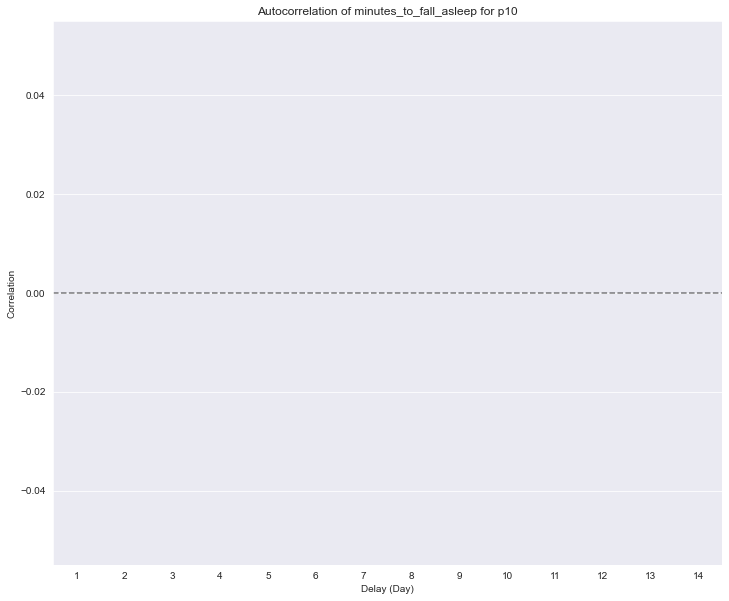

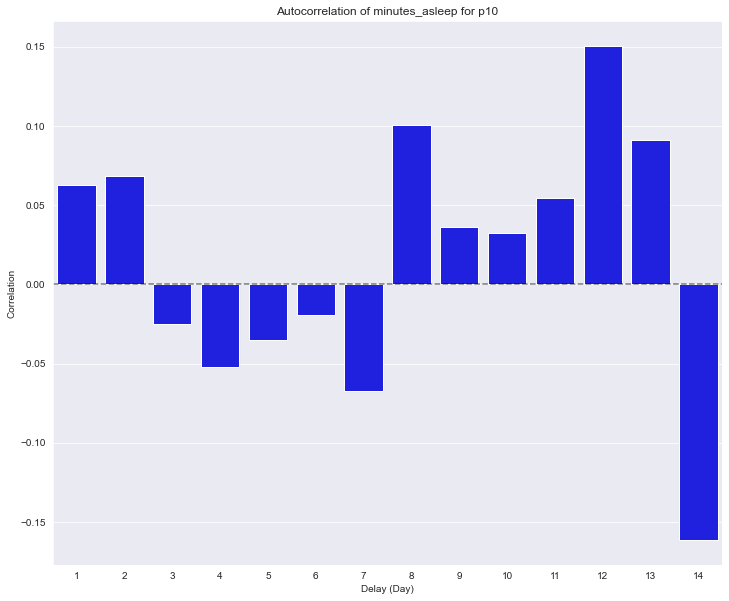

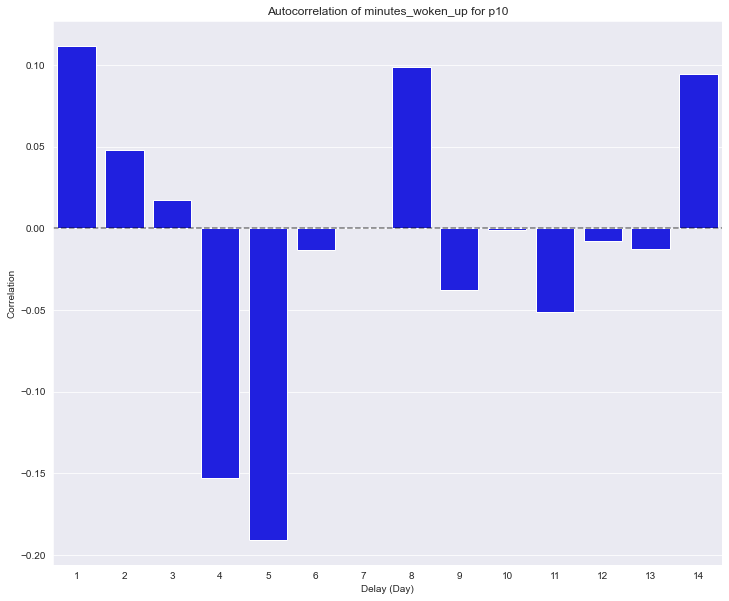

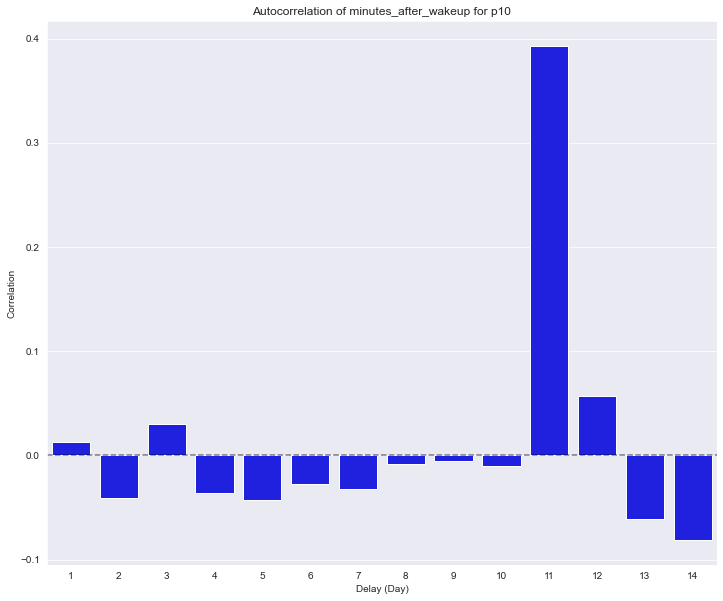

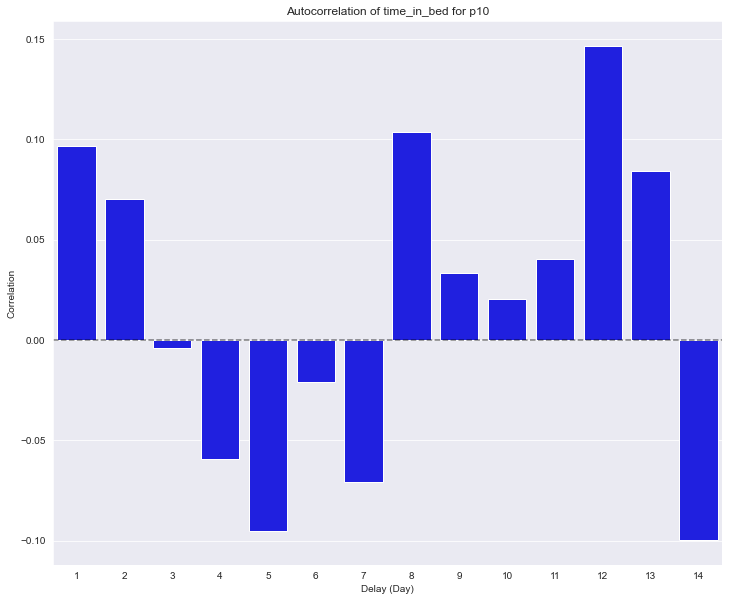

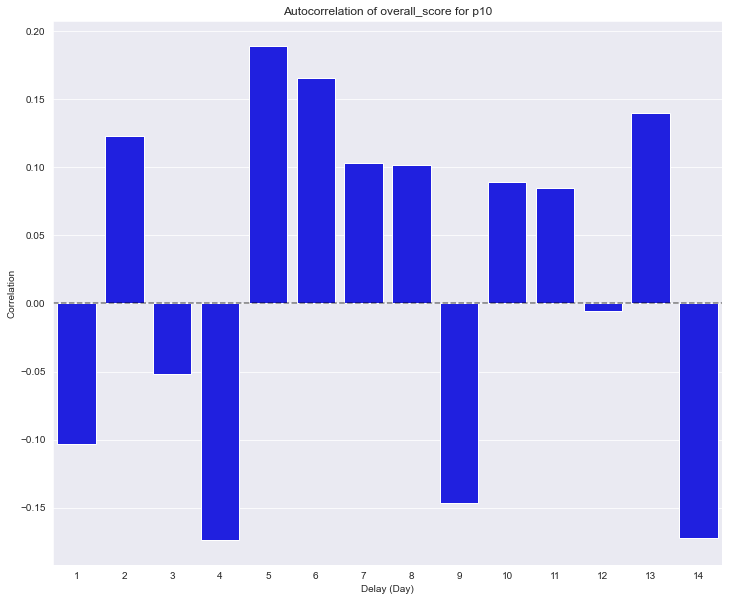

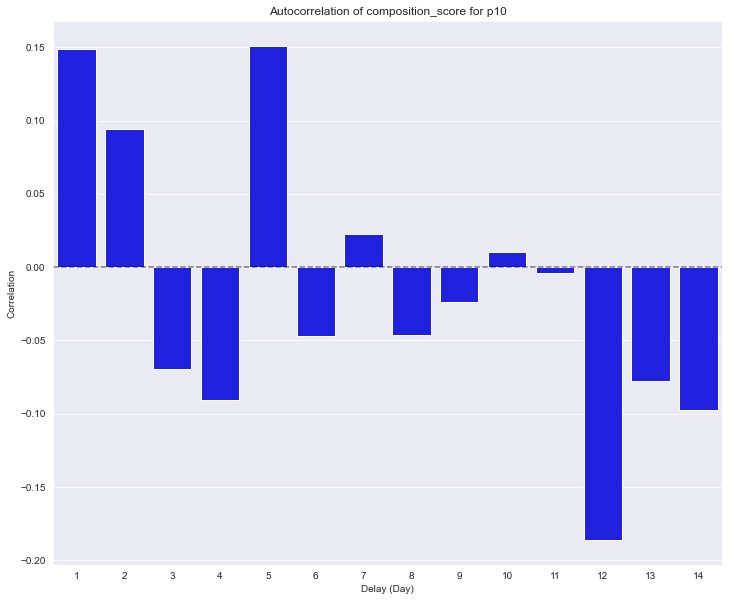

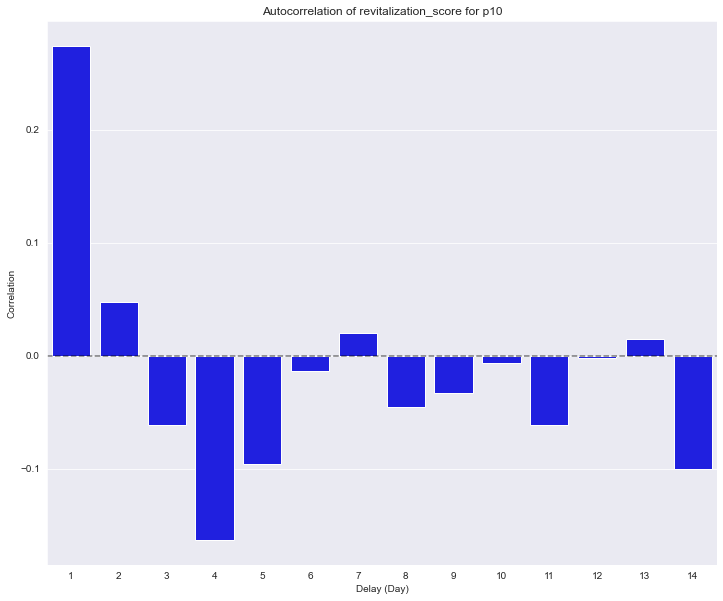

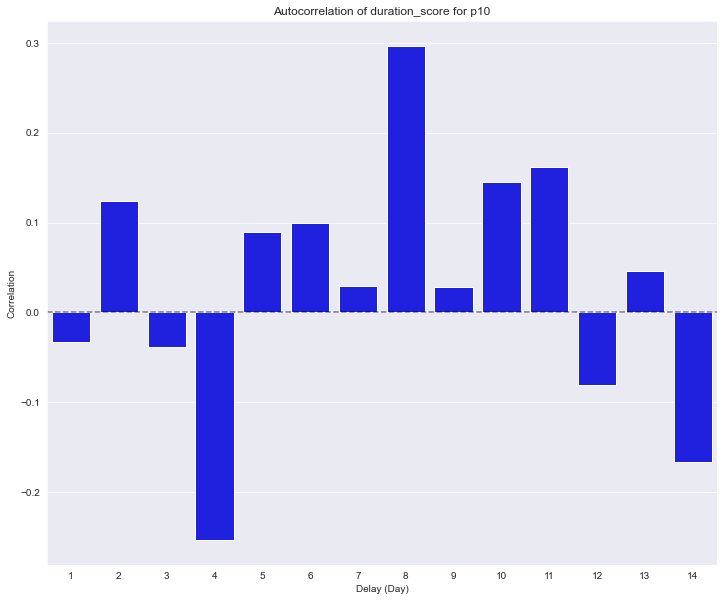

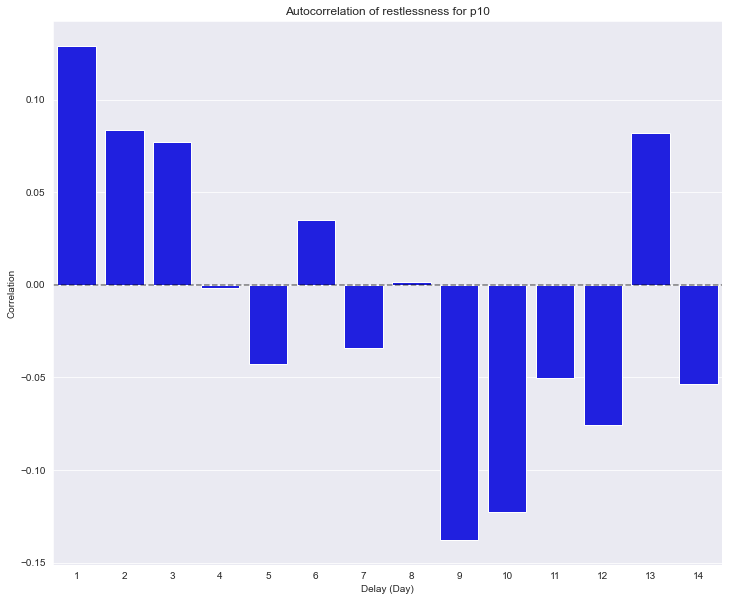

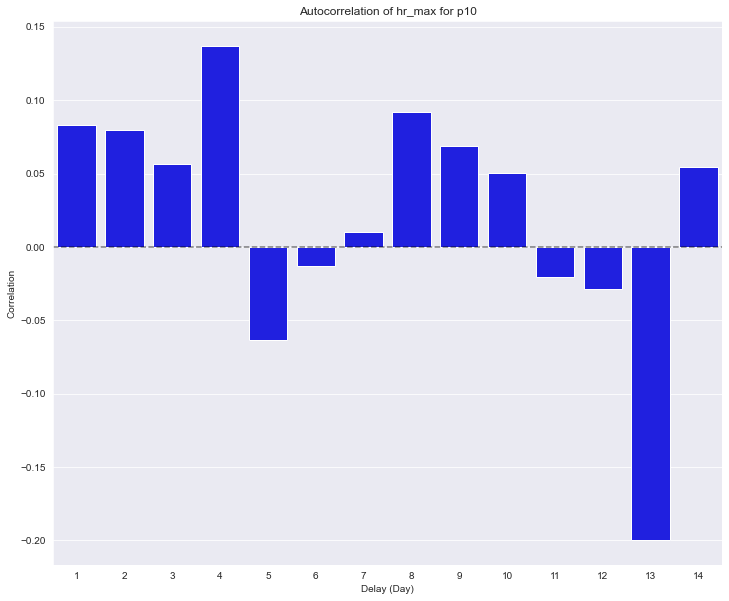

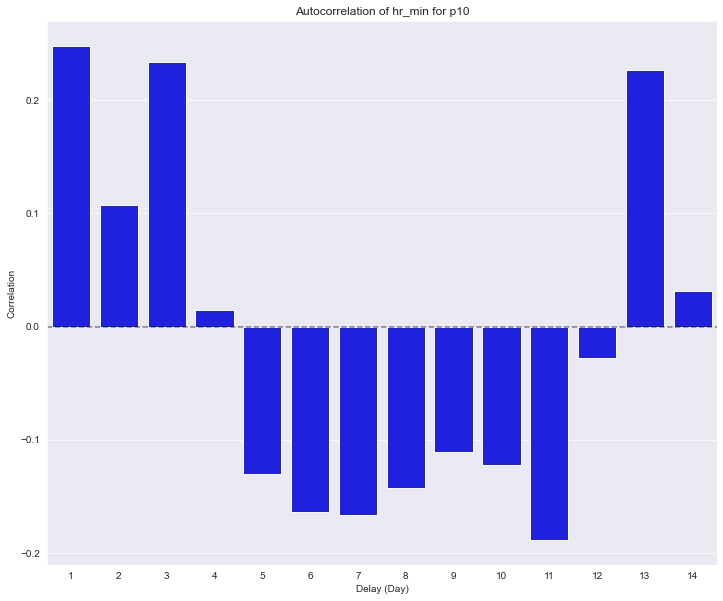

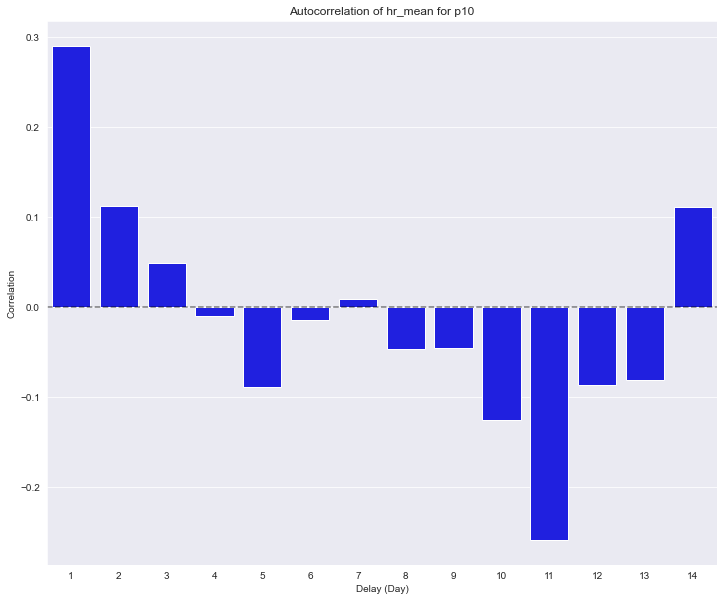

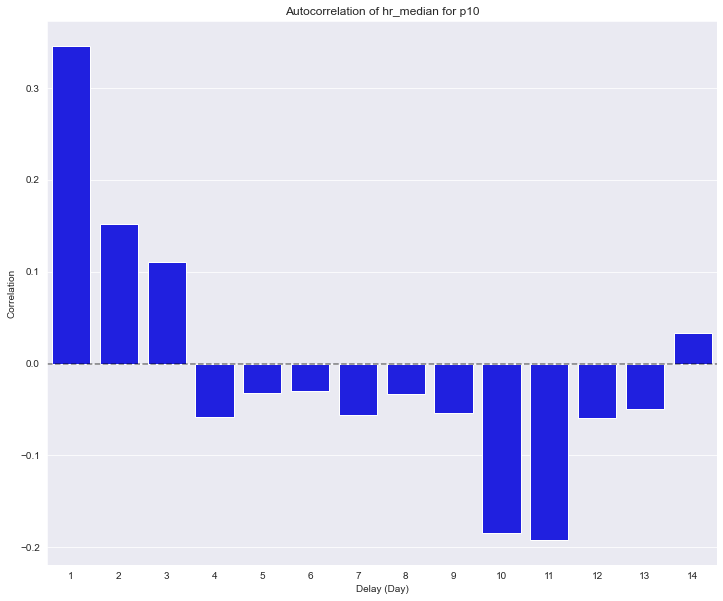

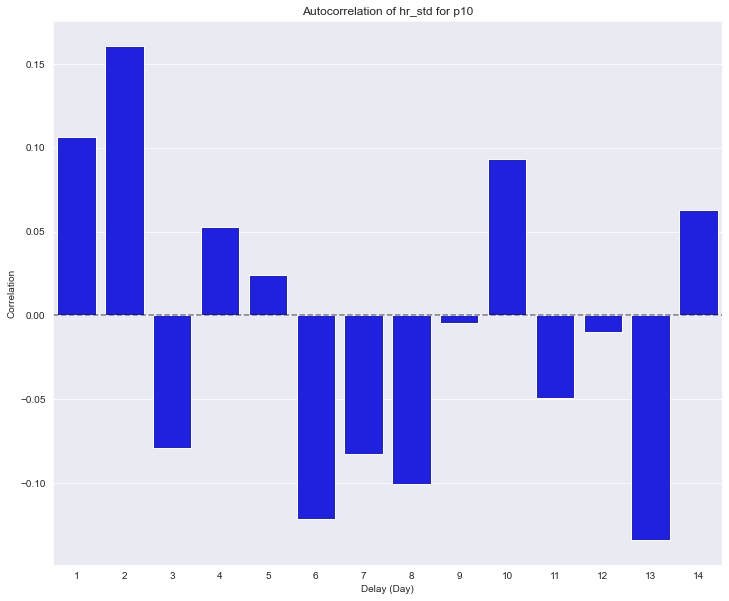

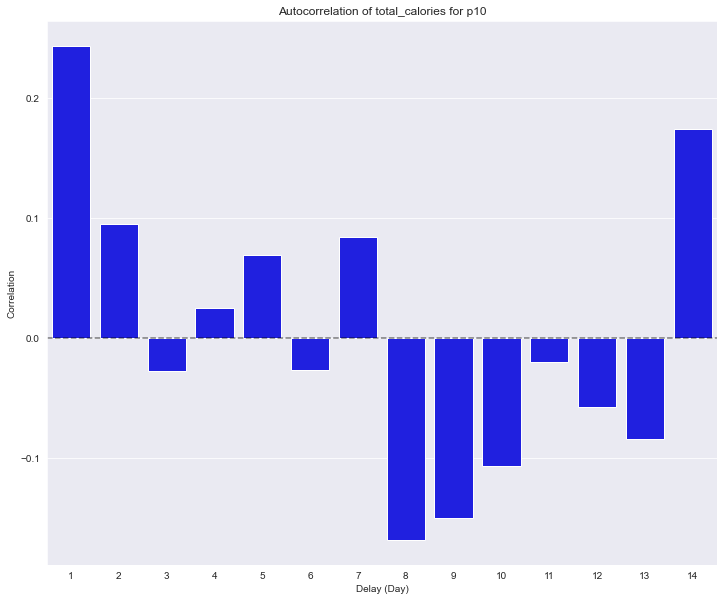

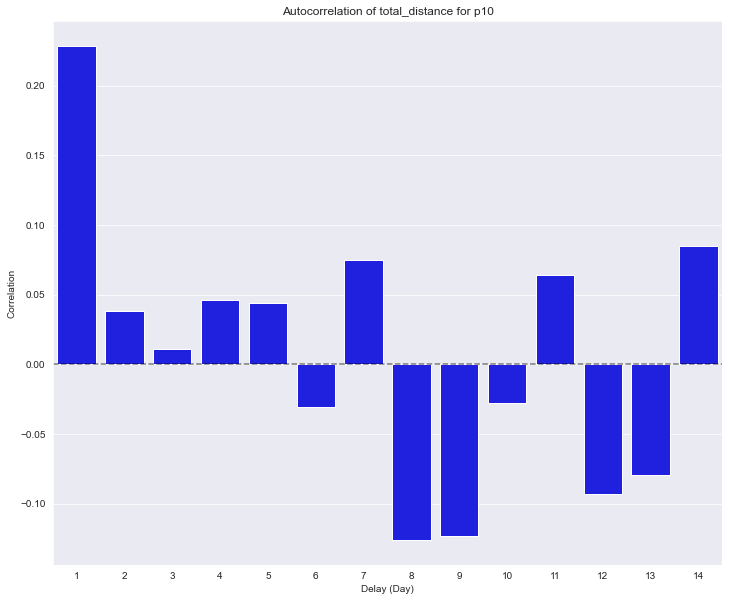

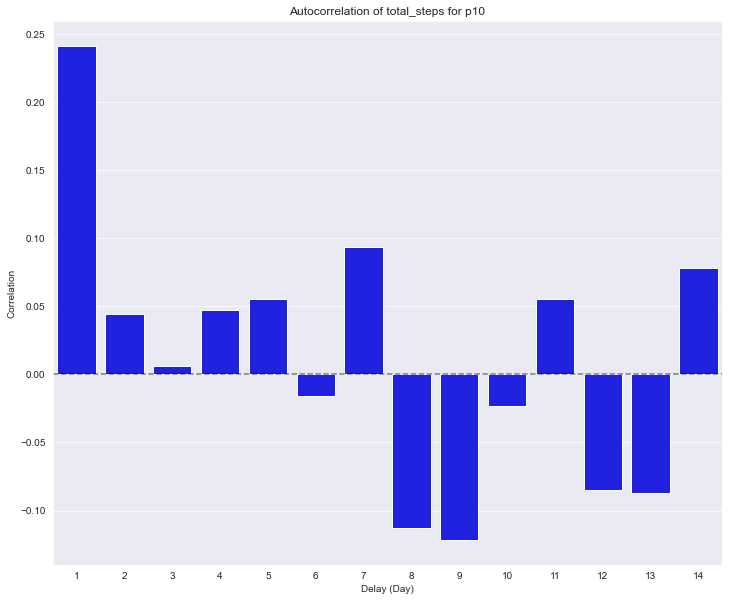

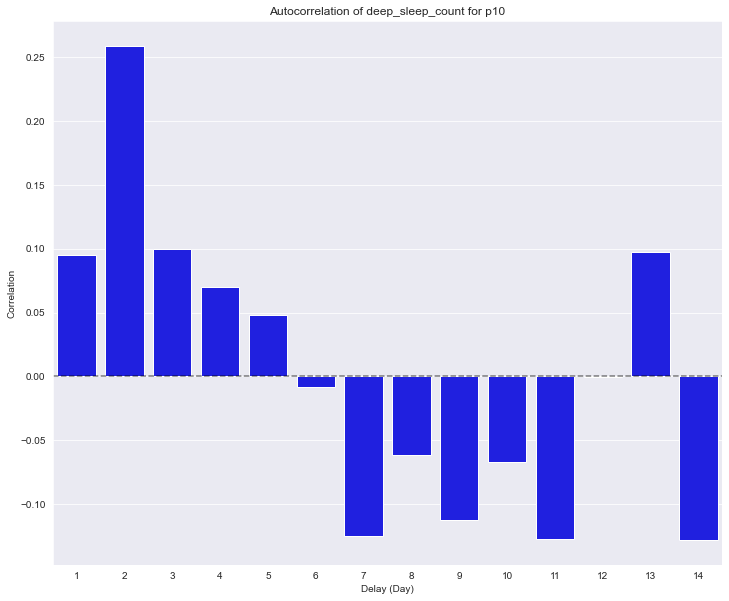

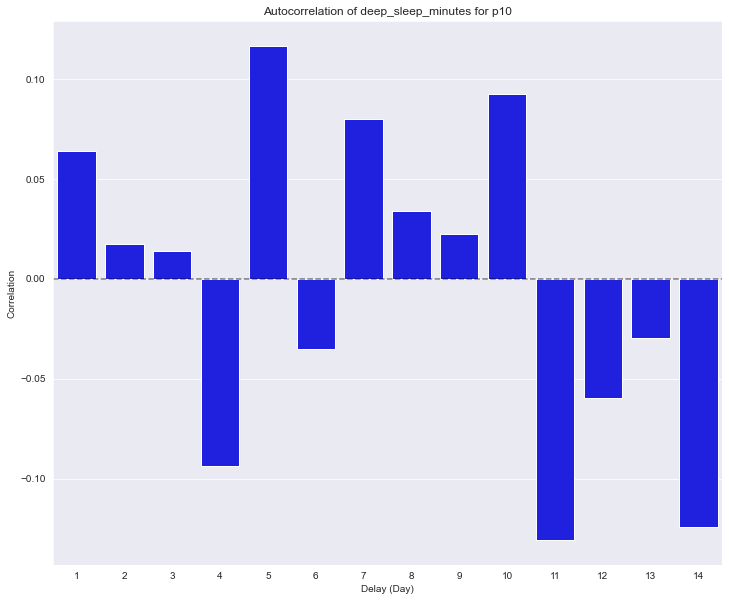

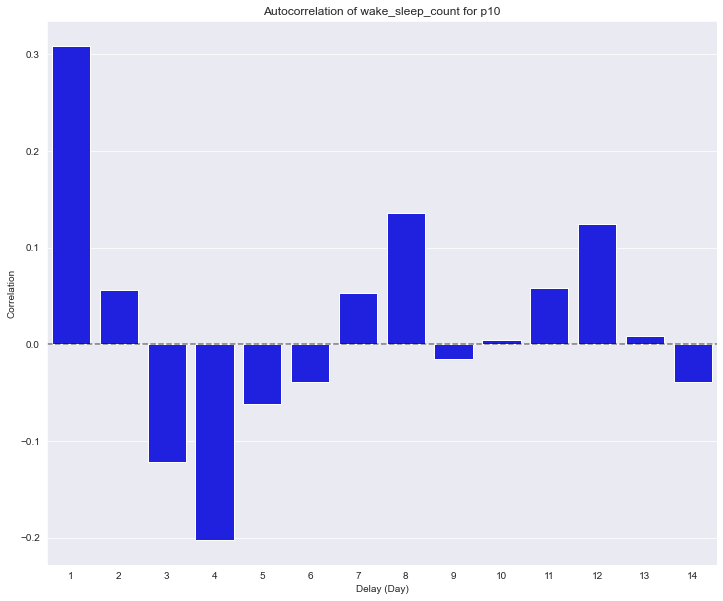

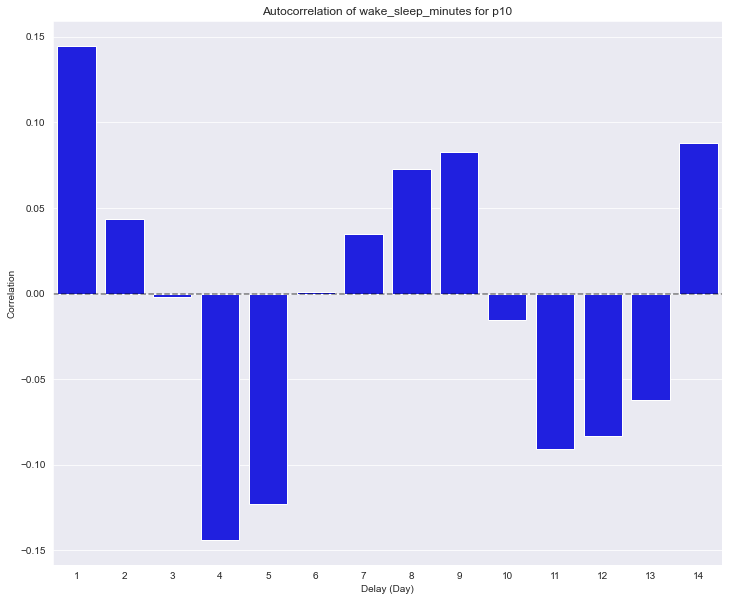

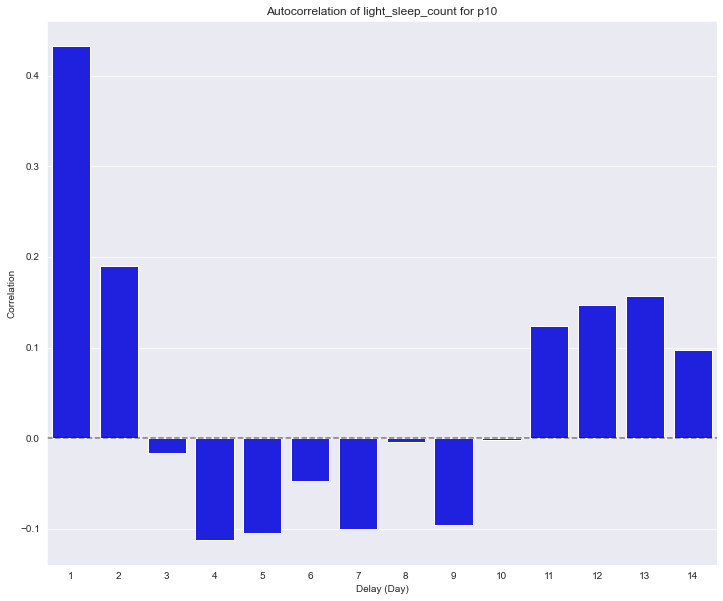

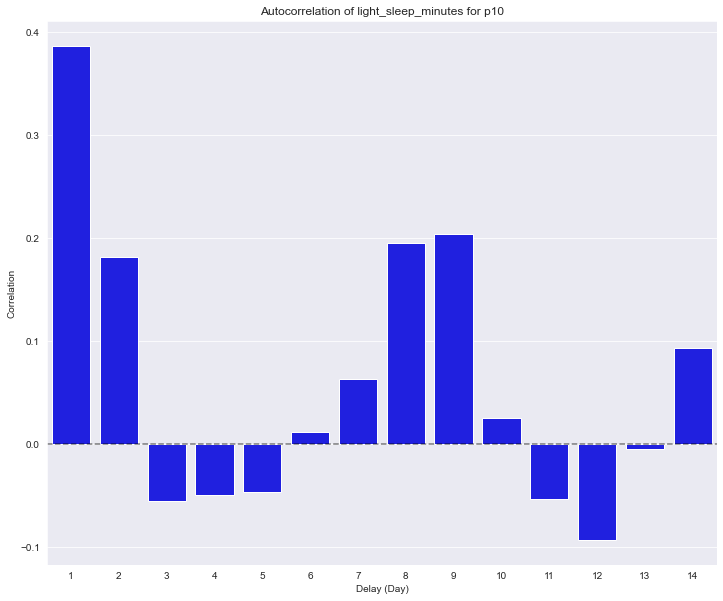

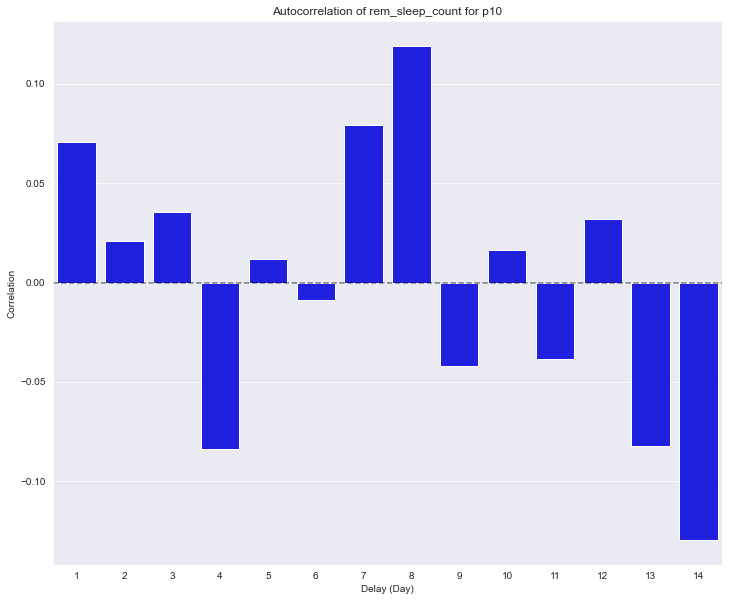

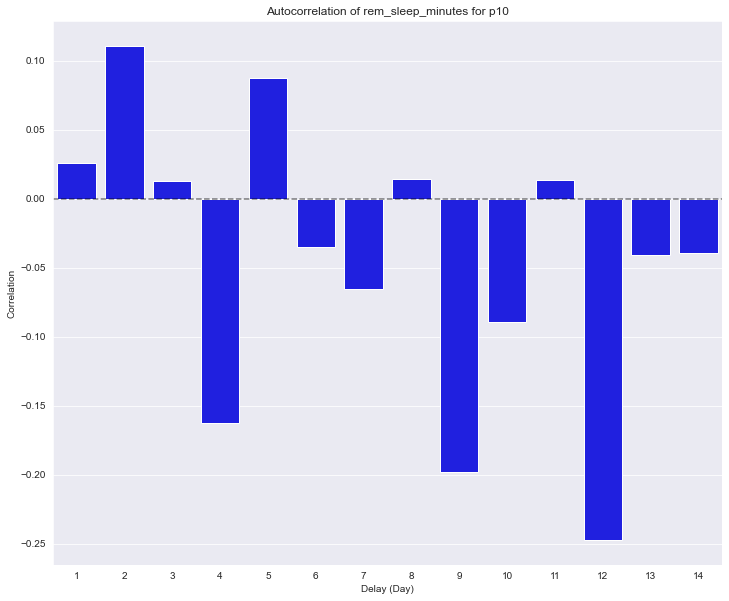

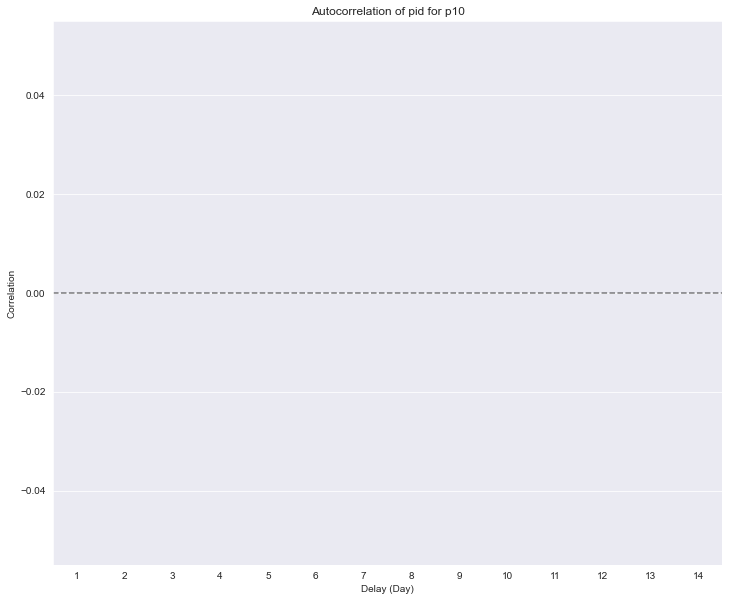

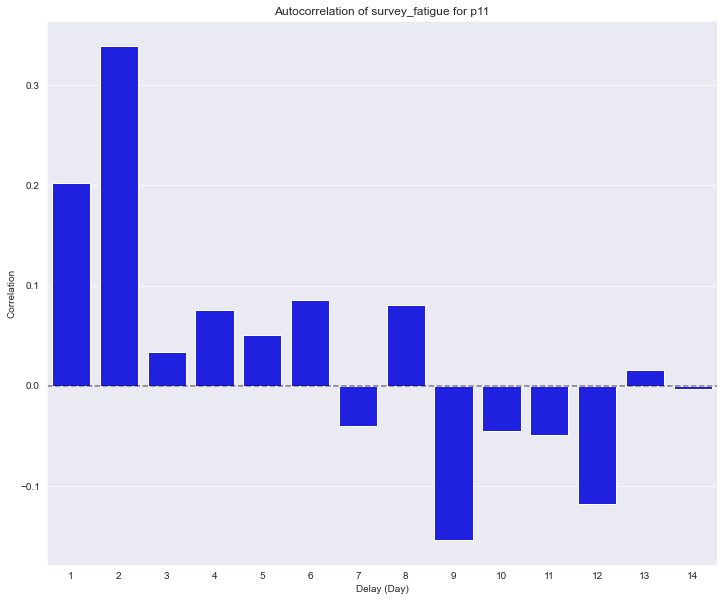

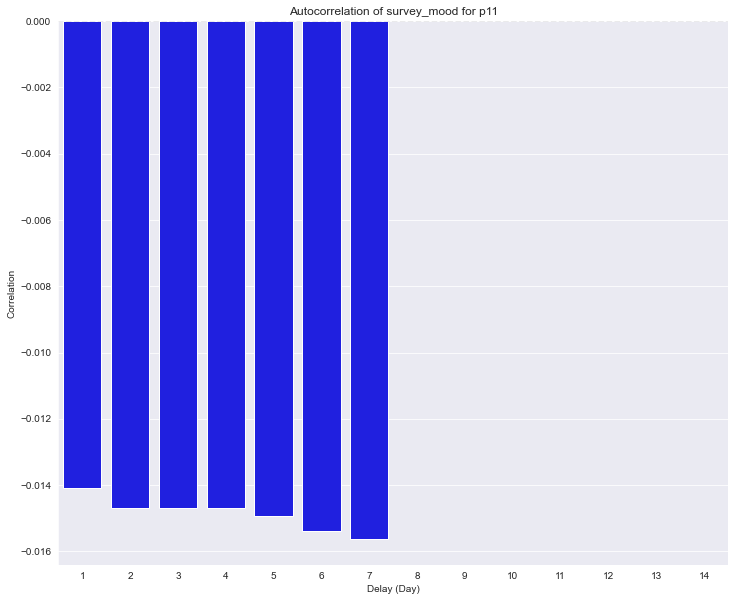

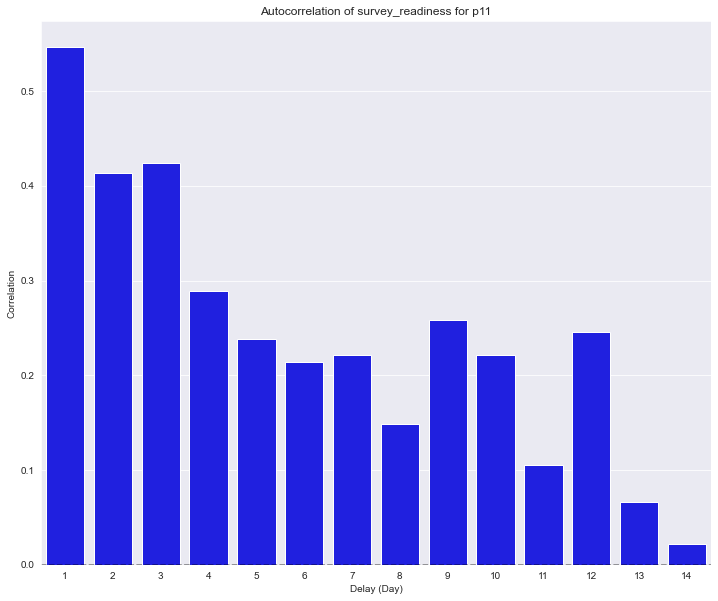

KeyboardInterrupt: 

In [4]:


for c in df.columns:
    for pid, pid_df in df.groupby('pid'):
        

for pid, pid_df in df.groupby('pid'):
    for c in pid_df.columns:
        
        if pid_df[c].dtype != object:
            plt.figure(figsize=(12,10))
            autocors = [pid_df[c].autocorr(i) for i in corr_range]
            sns.barplot(x=list(corr_range), y=autocors, color="blue")
            plt.title(f'Autocorrelation of {c} for p{pid}')
            plt.xlabel('Delay (Day)')
            plt.ylabel('Correlation')
            plt.axhline(0, color='black', linestyle='--', alpha=0.5)
            #plt.xticks(range(0,upper,7))
            plt.show()
            
            #plt.savefig(os.path.join(f'p{pid}/', f'{c}.png'), bbox_inches='tight')
            plt.clf()
            plt.close()
    
                

In [25]:
upper = 14
corr_range = list(range(1,upper+1,1))
for c in df.columns:
    if df[c].dtype == object or c == 'pid': continue
    
    autocors = []
    for i in corr_range:
        source_dfs = []
        other_dfs = []
        for pid, pid_df in df[[c,'pid']].groupby('pid'):
            source_dfs.append(pid_df)
            other_dfs.append(pid_df.shift(i))

        source_df = pd.concat(source_dfs, axis=0, ignore_index=True)
        other_df = pd.concat(other_dfs, axis=0, ignore_index=True)
        autocors.append(source_df[c].corr(other_df[c]))
    
    plt.figure(figsize=(12,10))
    ax = sns.barplot(x=corr_range, y=autocors, color='blue')
    plt.title(f'Autocorrelation of {c}', fontsize=20)
    plt.xlabel('\u03C4 (Day)', fontsize=20)
    plt.ylabel('Correlation Value', fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    
    ax.patches[6].set_color('red')
    ax.patches[13].set_color('red')
    
    #plt.show()
    
    plt.savefig(os.path.join(f'all/', f'v2_{c}.png'), bbox_inches='tight')
    plt.clf()
    plt.close()